In [1]:
#This notebook will preprocess the data and save it into a json file

Link to github where dataset is
https://github.com/mdeff/fma

In [ ]:
#!wget https://os.unil.cloud.switch.ch/fma/fma_small.zip

In [3]:
#!wget https://os.unil.cloud.switch.ch/fma/fma_metadata.zip

In [20]:
#This file is corrupted
#!unzip -p fma_small.zip 'fma_small/099/099134.mp3' > '099134.mp3'

In [5]:
#!unzip fma_metadata.zip

In [6]:
#!wget https://raw.githubusercontent.com/mdeff/fma/master/utils.py

In [7]:
# !pip install --user pydot
# !pip install --user python-dotenv
# !pip install --user librosa

In [13]:
import numpy as np
import pandas as pd
import librosa
import glob
from tqdm.auto import tqdm
import math
import json
import utils

In [18]:
tracks = utils.load('Data/fma_metadata/tracks.csv')
genres = utils.load('Data/fma_metadata/genres.csv')
features = utils.load('Data/fma_metadata/features.csv')
echonest = utils.load('Data/fma_metadata/echonest.csv')


tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

## Get Information for the Small Dataset

In [19]:
small = tracks[tracks['set', 'subset'] <= 'small']
small.shape

(8000, 52)

In [42]:
## Audio

audio_tracks=glob.glob("Data/fma_small_wav/*/*")
audio_tracks = sorted(audio_tracks)


#Label Encoder
from sklearn.preprocessing import LabelEncoder

#Selecting the top genres and getting rid of corrupt files
x = np.array(audio_tracks)
x_index = list(map(int, map(lambda x: x[23:-4], audio_tracks)))
top_genre = small['track']['genre_top'][x_index]

#Label Encoding 
label = LabelEncoder()
y = label.fit_transform(top_genre)

x.shape, y.shape

((7994,), (7994,))

In [43]:
label.classes_ 

array(['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental',
       'International', 'Pop', 'Rock'], dtype=object)

In [8]:
#saving the label encoder to use in model notebook

In [6]:
data = {
    "mapping": label.classes_.tolist(),
    "mfcc": [],
    "labels": [],
    "file_origin": [],
    "num_segments": 0
}

In [17]:
#varible declartion
SAMPLE_RATE = 22050
n_mfcc = 26
n_fft = 2048
hop_length = 512
num_segments = data['num_segments'] = 10

#num samples per segment = int(samples per track / num_segments)
DURATION = 29.8
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION
num_sam = int(SAMPLES_PER_TRACK / num_segments)

#we want uniform training data, some audio files might be a few miliseconds longer or shorter
#Because of that, we want to create an expected length and cut off anything extra
expected_num_mfcc_vectors_per_segment = math.ceil(num_sam / hop_length) #round up

#Output path
json_path = "data_" + str(num_segments) + ".json"

In [8]:
for i in tqdm(range(len(x))):
    
    f = x[i]
    #load data
    signal, sr = librosa.load(f, sr = SAMPLE_RATE)
    
    #signal = signal[:SAMPLES_PER_TRACK]
    
    #extract MFCCs
    for s in range(num_segments):
        start_sample = num_sam * s
        finish_sample = start_sample + num_sam
    
        mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample], 
                                    sr = sr,
                                    n_fft = n_fft,
                                    n_mfcc = n_mfcc,
                                    hop_length = hop_length)
        
        #I kinda forgot why you have to transpose but everybody says its the right thing to do
        mfcc = mfcc.T
        
        #print(len(mfcc))
        #Store mfcc for segment if it has the expected length
        if len(mfcc) == expected_num_mfcc_vectors_per_segment:
            data['mfcc'].append(mfcc.tolist())
            data['labels'].append(int(y[i]))
            data['file_origin'].append(str(f))
            print("{}, segment:{}".format(f,s + 1))
                

fma_small_wav/000/000002.wav, segment:1
fma_small_wav/000/000002.wav, segment:2
fma_small_wav/000/000002.wav, segment:3
fma_small_wav/000/000002.wav, segment:4
fma_small_wav/000/000002.wav, segment:5
fma_small_wav/000/000002.wav, segment:6
fma_small_wav/000/000002.wav, segment:7
fma_small_wav/000/000002.wav, segment:8
fma_small_wav/000/000002.wav, segment:9
fma_small_wav/000/000002.wav, segment:10
fma_small_wav/000/000005.wav, segment:1
fma_small_wav/000/000005.wav, segment:2
fma_small_wav/000/000005.wav, segment:3
fma_small_wav/000/000005.wav, segment:4
fma_small_wav/000/000005.wav, segment:5
fma_small_wav/000/000005.wav, segment:6
fma_small_wav/000/000005.wav, segment:7
fma_small_wav/000/000005.wav, segment:8
fma_small_wav/000/000005.wav, segment:9
fma_small_wav/000/000005.wav, segment:10
fma_small_wav/000/000010.wav, segment:1
fma_small_wav/000/000010.wav, segment:2
fma_small_wav/000/000010.wav, segment:3
fma_small_wav/000/000010.wav, segment:4
fma_small_wav/000/000010.wav, segment:

fma_small_wav/000/000368.wav, segment:1
fma_small_wav/000/000368.wav, segment:2
fma_small_wav/000/000368.wav, segment:3
fma_small_wav/000/000368.wav, segment:4
fma_small_wav/000/000368.wav, segment:5
fma_small_wav/000/000368.wav, segment:6
fma_small_wav/000/000368.wav, segment:7
fma_small_wav/000/000368.wav, segment:8
fma_small_wav/000/000368.wav, segment:9
fma_small_wav/000/000368.wav, segment:10
fma_small_wav/000/000424.wav, segment:1
fma_small_wav/000/000424.wav, segment:2
fma_small_wav/000/000424.wav, segment:3
fma_small_wav/000/000424.wav, segment:4
fma_small_wav/000/000424.wav, segment:5
fma_small_wav/000/000424.wav, segment:6
fma_small_wav/000/000424.wav, segment:7
fma_small_wav/000/000424.wav, segment:8
fma_small_wav/000/000424.wav, segment:9
fma_small_wav/000/000424.wav, segment:10
fma_small_wav/000/000459.wav, segment:1
fma_small_wav/000/000459.wav, segment:2
fma_small_wav/000/000459.wav, segment:3
fma_small_wav/000/000459.wav, segment:4
fma_small_wav/000/000459.wav, segment:

fma_small_wav/000/000707.wav, segment:1
fma_small_wav/000/000707.wav, segment:2
fma_small_wav/000/000707.wav, segment:3
fma_small_wav/000/000707.wav, segment:4
fma_small_wav/000/000707.wav, segment:5
fma_small_wav/000/000707.wav, segment:6
fma_small_wav/000/000707.wav, segment:7
fma_small_wav/000/000707.wav, segment:8
fma_small_wav/000/000707.wav, segment:9
fma_small_wav/000/000707.wav, segment:10
fma_small_wav/000/000708.wav, segment:1
fma_small_wav/000/000708.wav, segment:2
fma_small_wav/000/000708.wav, segment:3
fma_small_wav/000/000708.wav, segment:4
fma_small_wav/000/000708.wav, segment:5
fma_small_wav/000/000708.wav, segment:6
fma_small_wav/000/000708.wav, segment:7
fma_small_wav/000/000708.wav, segment:8
fma_small_wav/000/000708.wav, segment:9
fma_small_wav/000/000708.wav, segment:10
fma_small_wav/000/000709.wav, segment:1
fma_small_wav/000/000709.wav, segment:2
fma_small_wav/000/000709.wav, segment:3
fma_small_wav/000/000709.wav, segment:4
fma_small_wav/000/000709.wav, segment:

fma_small_wav/001/001040.wav, segment:1
fma_small_wav/001/001040.wav, segment:2
fma_small_wav/001/001040.wav, segment:3
fma_small_wav/001/001040.wav, segment:4
fma_small_wav/001/001040.wav, segment:5
fma_small_wav/001/001040.wav, segment:6
fma_small_wav/001/001040.wav, segment:7
fma_small_wav/001/001040.wav, segment:8
fma_small_wav/001/001040.wav, segment:9
fma_small_wav/001/001040.wav, segment:10
fma_small_wav/001/001066.wav, segment:1
fma_small_wav/001/001066.wav, segment:2
fma_small_wav/001/001066.wav, segment:3
fma_small_wav/001/001066.wav, segment:4
fma_small_wav/001/001066.wav, segment:5
fma_small_wav/001/001066.wav, segment:6
fma_small_wav/001/001066.wav, segment:7
fma_small_wav/001/001066.wav, segment:8
fma_small_wav/001/001066.wav, segment:9
fma_small_wav/001/001066.wav, segment:10
fma_small_wav/001/001069.wav, segment:1
fma_small_wav/001/001069.wav, segment:2
fma_small_wav/001/001069.wav, segment:3
fma_small_wav/001/001069.wav, segment:4
fma_small_wav/001/001069.wav, segment:

fma_small_wav/001/001443.wav, segment:1
fma_small_wav/001/001443.wav, segment:2
fma_small_wav/001/001443.wav, segment:3
fma_small_wav/001/001443.wav, segment:4
fma_small_wav/001/001443.wav, segment:5
fma_small_wav/001/001443.wav, segment:6
fma_small_wav/001/001443.wav, segment:7
fma_small_wav/001/001443.wav, segment:8
fma_small_wav/001/001443.wav, segment:9
fma_small_wav/001/001443.wav, segment:10
fma_small_wav/001/001482.wav, segment:1
fma_small_wav/001/001482.wav, segment:2
fma_small_wav/001/001482.wav, segment:3
fma_small_wav/001/001482.wav, segment:4
fma_small_wav/001/001482.wav, segment:5
fma_small_wav/001/001482.wav, segment:6
fma_small_wav/001/001482.wav, segment:7
fma_small_wav/001/001482.wav, segment:8
fma_small_wav/001/001482.wav, segment:9
fma_small_wav/001/001482.wav, segment:10
fma_small_wav/001/001510.wav, segment:1
fma_small_wav/001/001510.wav, segment:2
fma_small_wav/001/001510.wav, segment:3
fma_small_wav/001/001510.wav, segment:4
fma_small_wav/001/001510.wav, segment:

fma_small_wav/001/001701.wav, segment:1
fma_small_wav/001/001701.wav, segment:2
fma_small_wav/001/001701.wav, segment:3
fma_small_wav/001/001701.wav, segment:4
fma_small_wav/001/001701.wav, segment:5
fma_small_wav/001/001701.wav, segment:6
fma_small_wav/001/001701.wav, segment:7
fma_small_wav/001/001701.wav, segment:8
fma_small_wav/001/001701.wav, segment:9
fma_small_wav/001/001701.wav, segment:10
fma_small_wav/001/001702.wav, segment:1
fma_small_wav/001/001702.wav, segment:2
fma_small_wav/001/001702.wav, segment:3
fma_small_wav/001/001702.wav, segment:4
fma_small_wav/001/001702.wav, segment:5
fma_small_wav/001/001702.wav, segment:6
fma_small_wav/001/001702.wav, segment:7
fma_small_wav/001/001702.wav, segment:8
fma_small_wav/001/001702.wav, segment:9
fma_small_wav/001/001702.wav, segment:10
fma_small_wav/001/001703.wav, segment:1
fma_small_wav/001/001703.wav, segment:2
fma_small_wav/001/001703.wav, segment:3
fma_small_wav/001/001703.wav, segment:4
fma_small_wav/001/001703.wav, segment:

fma_small_wav/003/003263.wav, segment:1
fma_small_wav/003/003263.wav, segment:2
fma_small_wav/003/003263.wav, segment:3
fma_small_wav/003/003263.wav, segment:4
fma_small_wav/003/003263.wav, segment:5
fma_small_wav/003/003263.wav, segment:6
fma_small_wav/003/003263.wav, segment:7
fma_small_wav/003/003263.wav, segment:8
fma_small_wav/003/003263.wav, segment:9
fma_small_wav/003/003263.wav, segment:10
fma_small_wav/003/003264.wav, segment:1
fma_small_wav/003/003264.wav, segment:2
fma_small_wav/003/003264.wav, segment:3
fma_small_wav/003/003264.wav, segment:4
fma_small_wav/003/003264.wav, segment:5
fma_small_wav/003/003264.wav, segment:6
fma_small_wav/003/003264.wav, segment:7
fma_small_wav/003/003264.wav, segment:8
fma_small_wav/003/003264.wav, segment:9
fma_small_wav/003/003264.wav, segment:10
fma_small_wav/003/003265.wav, segment:1
fma_small_wav/003/003265.wav, segment:2
fma_small_wav/003/003265.wav, segment:3
fma_small_wav/003/003265.wav, segment:4
fma_small_wav/003/003265.wav, segment:

fma_small_wav/003/003720.wav, segment:1
fma_small_wav/003/003720.wav, segment:2
fma_small_wav/003/003720.wav, segment:3
fma_small_wav/003/003720.wav, segment:4
fma_small_wav/003/003720.wav, segment:5
fma_small_wav/003/003720.wav, segment:6
fma_small_wav/003/003720.wav, segment:7
fma_small_wav/003/003720.wav, segment:8
fma_small_wav/003/003720.wav, segment:9
fma_small_wav/003/003720.wav, segment:10
fma_small_wav/003/003721.wav, segment:1
fma_small_wav/003/003721.wav, segment:2
fma_small_wav/003/003721.wav, segment:3
fma_small_wav/003/003721.wav, segment:4
fma_small_wav/003/003721.wav, segment:5
fma_small_wav/003/003721.wav, segment:6
fma_small_wav/003/003721.wav, segment:7
fma_small_wav/003/003721.wav, segment:8
fma_small_wav/003/003721.wav, segment:9
fma_small_wav/003/003721.wav, segment:10
fma_small_wav/003/003722.wav, segment:1
fma_small_wav/003/003722.wav, segment:2
fma_small_wav/003/003722.wav, segment:3
fma_small_wav/003/003722.wav, segment:4
fma_small_wav/003/003722.wav, segment:

fma_small_wav/003/003904.wav, segment:1
fma_small_wav/003/003904.wav, segment:2
fma_small_wav/003/003904.wav, segment:3
fma_small_wav/003/003904.wav, segment:4
fma_small_wav/003/003904.wav, segment:5
fma_small_wav/003/003904.wav, segment:6
fma_small_wav/003/003904.wav, segment:7
fma_small_wav/003/003904.wav, segment:8
fma_small_wav/003/003904.wav, segment:9
fma_small_wav/003/003904.wav, segment:10
fma_small_wav/003/003905.wav, segment:1
fma_small_wav/003/003905.wav, segment:2
fma_small_wav/003/003905.wav, segment:3
fma_small_wav/003/003905.wav, segment:4
fma_small_wav/003/003905.wav, segment:5
fma_small_wav/003/003905.wav, segment:6
fma_small_wav/003/003905.wav, segment:7
fma_small_wav/003/003905.wav, segment:8
fma_small_wav/003/003905.wav, segment:9
fma_small_wav/003/003905.wav, segment:10
fma_small_wav/003/003906.wav, segment:1
fma_small_wav/003/003906.wav, segment:2
fma_small_wav/003/003906.wav, segment:3
fma_small_wav/003/003906.wav, segment:4
fma_small_wav/003/003906.wav, segment:

fma_small_wav/004/004071.wav, segment:1
fma_small_wav/004/004071.wav, segment:2
fma_small_wav/004/004071.wav, segment:3
fma_small_wav/004/004071.wav, segment:4
fma_small_wav/004/004071.wav, segment:5
fma_small_wav/004/004071.wav, segment:6
fma_small_wav/004/004071.wav, segment:7
fma_small_wav/004/004071.wav, segment:8
fma_small_wav/004/004071.wav, segment:9
fma_small_wav/004/004071.wav, segment:10
fma_small_wav/004/004072.wav, segment:1
fma_small_wav/004/004072.wav, segment:2
fma_small_wav/004/004072.wav, segment:3
fma_small_wav/004/004072.wav, segment:4
fma_small_wav/004/004072.wav, segment:5
fma_small_wav/004/004072.wav, segment:6
fma_small_wav/004/004072.wav, segment:7
fma_small_wav/004/004072.wav, segment:8
fma_small_wav/004/004072.wav, segment:9
fma_small_wav/004/004072.wav, segment:10
fma_small_wav/004/004073.wav, segment:1
fma_small_wav/004/004073.wav, segment:2
fma_small_wav/004/004073.wav, segment:3
fma_small_wav/004/004073.wav, segment:4
fma_small_wav/004/004073.wav, segment:

fma_small_wav/004/004102.wav, segment:1
fma_small_wav/004/004102.wav, segment:2
fma_small_wav/004/004102.wav, segment:3
fma_small_wav/004/004102.wav, segment:4
fma_small_wav/004/004102.wav, segment:5
fma_small_wav/004/004102.wav, segment:6
fma_small_wav/004/004102.wav, segment:7
fma_small_wav/004/004102.wav, segment:8
fma_small_wav/004/004102.wav, segment:9
fma_small_wav/004/004102.wav, segment:10
fma_small_wav/004/004103.wav, segment:1
fma_small_wav/004/004103.wav, segment:2
fma_small_wav/004/004103.wav, segment:3
fma_small_wav/004/004103.wav, segment:4
fma_small_wav/004/004103.wav, segment:5
fma_small_wav/004/004103.wav, segment:6
fma_small_wav/004/004103.wav, segment:7
fma_small_wav/004/004103.wav, segment:8
fma_small_wav/004/004103.wav, segment:9
fma_small_wav/004/004103.wav, segment:10
fma_small_wav/004/004108.wav, segment:1
fma_small_wav/004/004108.wav, segment:2
fma_small_wav/004/004108.wav, segment:3
fma_small_wav/004/004108.wav, segment:4
fma_small_wav/004/004108.wav, segment:

fma_small_wav/004/004685.wav, segment:1
fma_small_wav/004/004685.wav, segment:2
fma_small_wav/004/004685.wav, segment:3
fma_small_wav/004/004685.wav, segment:4
fma_small_wav/004/004685.wav, segment:5
fma_small_wav/004/004685.wav, segment:6
fma_small_wav/004/004685.wav, segment:7
fma_small_wav/004/004685.wav, segment:8
fma_small_wav/004/004685.wav, segment:9
fma_small_wav/004/004685.wav, segment:10
fma_small_wav/004/004688.wav, segment:1
fma_small_wav/004/004688.wav, segment:2
fma_small_wav/004/004688.wav, segment:3
fma_small_wav/004/004688.wav, segment:4
fma_small_wav/004/004688.wav, segment:5
fma_small_wav/004/004688.wav, segment:6
fma_small_wav/004/004688.wav, segment:7
fma_small_wav/004/004688.wav, segment:8
fma_small_wav/004/004688.wav, segment:9
fma_small_wav/004/004688.wav, segment:10
fma_small_wav/004/004777.wav, segment:1
fma_small_wav/004/004777.wav, segment:2
fma_small_wav/004/004777.wav, segment:3
fma_small_wav/004/004777.wav, segment:4
fma_small_wav/004/004777.wav, segment:

fma_small_wav/005/005156.wav, segment:1
fma_small_wav/005/005156.wav, segment:2
fma_small_wav/005/005156.wav, segment:3
fma_small_wav/005/005156.wav, segment:4
fma_small_wav/005/005156.wav, segment:5
fma_small_wav/005/005156.wav, segment:6
fma_small_wav/005/005156.wav, segment:7
fma_small_wav/005/005156.wav, segment:8
fma_small_wav/005/005156.wav, segment:9
fma_small_wav/005/005156.wav, segment:10
fma_small_wav/005/005157.wav, segment:1
fma_small_wav/005/005157.wav, segment:2
fma_small_wav/005/005157.wav, segment:3
fma_small_wav/005/005157.wav, segment:4
fma_small_wav/005/005157.wav, segment:5
fma_small_wav/005/005157.wav, segment:6
fma_small_wav/005/005157.wav, segment:7
fma_small_wav/005/005157.wav, segment:8
fma_small_wav/005/005157.wav, segment:9
fma_small_wav/005/005157.wav, segment:10
fma_small_wav/005/005158.wav, segment:1
fma_small_wav/005/005158.wav, segment:2
fma_small_wav/005/005158.wav, segment:3
fma_small_wav/005/005158.wav, segment:4
fma_small_wav/005/005158.wav, segment:

fma_small_wav/006/006342.wav, segment:1
fma_small_wav/006/006342.wav, segment:2
fma_small_wav/006/006342.wav, segment:3
fma_small_wav/006/006342.wav, segment:4
fma_small_wav/006/006342.wav, segment:5
fma_small_wav/006/006342.wav, segment:6
fma_small_wav/006/006342.wav, segment:7
fma_small_wav/006/006342.wav, segment:8
fma_small_wav/006/006342.wav, segment:9
fma_small_wav/006/006342.wav, segment:10
fma_small_wav/006/006354.wav, segment:1
fma_small_wav/006/006354.wav, segment:2
fma_small_wav/006/006354.wav, segment:3
fma_small_wav/006/006354.wav, segment:4
fma_small_wav/006/006354.wav, segment:5
fma_small_wav/006/006354.wav, segment:6
fma_small_wav/006/006354.wav, segment:7
fma_small_wav/006/006354.wav, segment:8
fma_small_wav/006/006354.wav, segment:9
fma_small_wav/006/006354.wav, segment:10
fma_small_wav/006/006357.wav, segment:1
fma_small_wav/006/006357.wav, segment:2
fma_small_wav/006/006357.wav, segment:3
fma_small_wav/006/006357.wav, segment:4
fma_small_wav/006/006357.wav, segment:

fma_small_wav/006/006390.wav, segment:1
fma_small_wav/006/006390.wav, segment:2
fma_small_wav/006/006390.wav, segment:3
fma_small_wav/006/006390.wav, segment:4
fma_small_wav/006/006390.wav, segment:5
fma_small_wav/006/006390.wav, segment:6
fma_small_wav/006/006390.wav, segment:7
fma_small_wav/006/006390.wav, segment:8
fma_small_wav/006/006390.wav, segment:9
fma_small_wav/006/006390.wav, segment:10
fma_small_wav/006/006393.wav, segment:1
fma_small_wav/006/006393.wav, segment:2
fma_small_wav/006/006393.wav, segment:3
fma_small_wav/006/006393.wav, segment:4
fma_small_wav/006/006393.wav, segment:5
fma_small_wav/006/006393.wav, segment:6
fma_small_wav/006/006393.wav, segment:7
fma_small_wav/006/006393.wav, segment:8
fma_small_wav/006/006393.wav, segment:9
fma_small_wav/006/006393.wav, segment:10
fma_small_wav/006/006394.wav, segment:1
fma_small_wav/006/006394.wav, segment:2
fma_small_wav/006/006394.wav, segment:3
fma_small_wav/006/006394.wav, segment:4
fma_small_wav/006/006394.wav, segment:

fma_small_wav/006/006607.wav, segment:1
fma_small_wav/006/006607.wav, segment:2
fma_small_wav/006/006607.wav, segment:3
fma_small_wav/006/006607.wav, segment:4
fma_small_wav/006/006607.wav, segment:5
fma_small_wav/006/006607.wav, segment:6
fma_small_wav/006/006607.wav, segment:7
fma_small_wav/006/006607.wav, segment:8
fma_small_wav/006/006607.wav, segment:9
fma_small_wav/006/006607.wav, segment:10
fma_small_wav/006/006608.wav, segment:1
fma_small_wav/006/006608.wav, segment:2
fma_small_wav/006/006608.wav, segment:3
fma_small_wav/006/006608.wav, segment:4
fma_small_wav/006/006608.wav, segment:5
fma_small_wav/006/006608.wav, segment:6
fma_small_wav/006/006608.wav, segment:7
fma_small_wav/006/006608.wav, segment:8
fma_small_wav/006/006608.wav, segment:9
fma_small_wav/006/006608.wav, segment:10
fma_small_wav/006/006609.wav, segment:1
fma_small_wav/006/006609.wav, segment:2
fma_small_wav/006/006609.wav, segment:3
fma_small_wav/006/006609.wav, segment:4
fma_small_wav/006/006609.wav, segment:

fma_small_wav/006/006855.wav, segment:1
fma_small_wav/006/006855.wav, segment:2
fma_small_wav/006/006855.wav, segment:3
fma_small_wav/006/006855.wav, segment:4
fma_small_wav/006/006855.wav, segment:5
fma_small_wav/006/006855.wav, segment:6
fma_small_wav/006/006855.wav, segment:7
fma_small_wav/006/006855.wav, segment:8
fma_small_wav/006/006855.wav, segment:9
fma_small_wav/006/006855.wav, segment:10
fma_small_wav/006/006856.wav, segment:1
fma_small_wav/006/006856.wav, segment:2
fma_small_wav/006/006856.wav, segment:3
fma_small_wav/006/006856.wav, segment:4
fma_small_wav/006/006856.wav, segment:5
fma_small_wav/006/006856.wav, segment:6
fma_small_wav/006/006856.wav, segment:7
fma_small_wav/006/006856.wav, segment:8
fma_small_wav/006/006856.wav, segment:9
fma_small_wav/006/006856.wav, segment:10
fma_small_wav/006/006857.wav, segment:1
fma_small_wav/006/006857.wav, segment:2
fma_small_wav/006/006857.wav, segment:3
fma_small_wav/006/006857.wav, segment:4
fma_small_wav/006/006857.wav, segment:

fma_small_wav/007/007487.wav, segment:1
fma_small_wav/007/007487.wav, segment:2
fma_small_wav/007/007487.wav, segment:3
fma_small_wav/007/007487.wav, segment:4
fma_small_wav/007/007487.wav, segment:5
fma_small_wav/007/007487.wav, segment:6
fma_small_wav/007/007487.wav, segment:7
fma_small_wav/007/007487.wav, segment:8
fma_small_wav/007/007487.wav, segment:9
fma_small_wav/007/007487.wav, segment:10
fma_small_wav/007/007488.wav, segment:1
fma_small_wav/007/007488.wav, segment:2
fma_small_wav/007/007488.wav, segment:3
fma_small_wav/007/007488.wav, segment:4
fma_small_wav/007/007488.wav, segment:5
fma_small_wav/007/007488.wav, segment:6
fma_small_wav/007/007488.wav, segment:7
fma_small_wav/007/007488.wav, segment:8
fma_small_wav/007/007488.wav, segment:9
fma_small_wav/007/007488.wav, segment:10
fma_small_wav/007/007489.wav, segment:1
fma_small_wav/007/007489.wav, segment:2
fma_small_wav/007/007489.wav, segment:3
fma_small_wav/007/007489.wav, segment:4
fma_small_wav/007/007489.wav, segment:

fma_small_wav/008/008256.wav, segment:1
fma_small_wav/008/008256.wav, segment:2
fma_small_wav/008/008256.wav, segment:3
fma_small_wav/008/008256.wav, segment:4
fma_small_wav/008/008256.wav, segment:5
fma_small_wav/008/008256.wav, segment:6
fma_small_wav/008/008256.wav, segment:7
fma_small_wav/008/008256.wav, segment:8
fma_small_wav/008/008256.wav, segment:9
fma_small_wav/008/008256.wav, segment:10
fma_small_wav/008/008259.wav, segment:1
fma_small_wav/008/008259.wav, segment:2
fma_small_wav/008/008259.wav, segment:3
fma_small_wav/008/008259.wav, segment:4
fma_small_wav/008/008259.wav, segment:5
fma_small_wav/008/008259.wav, segment:6
fma_small_wav/008/008259.wav, segment:7
fma_small_wav/008/008259.wav, segment:8
fma_small_wav/008/008259.wav, segment:9
fma_small_wav/008/008259.wav, segment:10
fma_small_wav/008/008261.wav, segment:1
fma_small_wav/008/008261.wav, segment:2
fma_small_wav/008/008261.wav, segment:3
fma_small_wav/008/008261.wav, segment:4
fma_small_wav/008/008261.wav, segment:

fma_small_wav/009/009557.wav, segment:1
fma_small_wav/009/009557.wav, segment:2
fma_small_wav/009/009557.wav, segment:3
fma_small_wav/009/009557.wav, segment:4
fma_small_wav/009/009557.wav, segment:5
fma_small_wav/009/009557.wav, segment:6
fma_small_wav/009/009557.wav, segment:7
fma_small_wav/009/009557.wav, segment:8
fma_small_wav/009/009557.wav, segment:9
fma_small_wav/009/009557.wav, segment:10
fma_small_wav/009/009559.wav, segment:1
fma_small_wav/009/009559.wav, segment:2
fma_small_wav/009/009559.wav, segment:3
fma_small_wav/009/009559.wav, segment:4
fma_small_wav/009/009559.wav, segment:5
fma_small_wav/009/009559.wav, segment:6
fma_small_wav/009/009559.wav, segment:7
fma_small_wav/009/009559.wav, segment:8
fma_small_wav/009/009559.wav, segment:9
fma_small_wav/009/009559.wav, segment:10
fma_small_wav/009/009560.wav, segment:1
fma_small_wav/009/009560.wav, segment:2
fma_small_wav/009/009560.wav, segment:3
fma_small_wav/009/009560.wav, segment:4
fma_small_wav/009/009560.wav, segment:

fma_small_wav/010/010385.wav, segment:1
fma_small_wav/010/010385.wav, segment:2
fma_small_wav/010/010385.wav, segment:3
fma_small_wav/010/010385.wav, segment:4
fma_small_wav/010/010385.wav, segment:5
fma_small_wav/010/010385.wav, segment:6
fma_small_wav/010/010385.wav, segment:7
fma_small_wav/010/010385.wav, segment:8
fma_small_wav/010/010385.wav, segment:9
fma_small_wav/010/010385.wav, segment:10
fma_small_wav/010/010386.wav, segment:1
fma_small_wav/010/010386.wav, segment:2
fma_small_wav/010/010386.wav, segment:3
fma_small_wav/010/010386.wav, segment:4
fma_small_wav/010/010386.wav, segment:5
fma_small_wav/010/010386.wav, segment:6
fma_small_wav/010/010386.wav, segment:7
fma_small_wav/010/010386.wav, segment:8
fma_small_wav/010/010386.wav, segment:9
fma_small_wav/010/010386.wav, segment:10
fma_small_wav/010/010387.wav, segment:1
fma_small_wav/010/010387.wav, segment:2
fma_small_wav/010/010387.wav, segment:3
fma_small_wav/010/010387.wav, segment:4
fma_small_wav/010/010387.wav, segment:

fma_small_wav/010/010541.wav, segment:1
fma_small_wav/010/010541.wav, segment:2
fma_small_wav/010/010541.wav, segment:3
fma_small_wav/010/010541.wav, segment:4
fma_small_wav/010/010541.wav, segment:5
fma_small_wav/010/010541.wav, segment:6
fma_small_wav/010/010541.wav, segment:7
fma_small_wav/010/010541.wav, segment:8
fma_small_wav/010/010541.wav, segment:9
fma_small_wav/010/010541.wav, segment:10
fma_small_wav/010/010575.wav, segment:1
fma_small_wav/010/010575.wav, segment:2
fma_small_wav/010/010575.wav, segment:3
fma_small_wav/010/010575.wav, segment:4
fma_small_wav/010/010575.wav, segment:5
fma_small_wav/010/010575.wav, segment:6
fma_small_wav/010/010575.wav, segment:7
fma_small_wav/010/010575.wav, segment:8
fma_small_wav/010/010575.wav, segment:9
fma_small_wav/010/010575.wav, segment:10
fma_small_wav/010/010577.wav, segment:1
fma_small_wav/010/010577.wav, segment:2
fma_small_wav/010/010577.wav, segment:3
fma_small_wav/010/010577.wav, segment:4
fma_small_wav/010/010577.wav, segment:

fma_small_wav/010/010697.wav, segment:1
fma_small_wav/010/010697.wav, segment:2
fma_small_wav/010/010697.wav, segment:3
fma_small_wav/010/010697.wav, segment:4
fma_small_wav/010/010697.wav, segment:5
fma_small_wav/010/010697.wav, segment:6
fma_small_wav/010/010697.wav, segment:7
fma_small_wav/010/010697.wav, segment:8
fma_small_wav/010/010697.wav, segment:9
fma_small_wav/010/010697.wav, segment:10
fma_small_wav/010/010698.wav, segment:1
fma_small_wav/010/010698.wav, segment:2
fma_small_wav/010/010698.wav, segment:3
fma_small_wav/010/010698.wav, segment:4
fma_small_wav/010/010698.wav, segment:5
fma_small_wav/010/010698.wav, segment:6
fma_small_wav/010/010698.wav, segment:7
fma_small_wav/010/010698.wav, segment:8
fma_small_wav/010/010698.wav, segment:9
fma_small_wav/010/010698.wav, segment:10
fma_small_wav/010/010699.wav, segment:1
fma_small_wav/010/010699.wav, segment:2
fma_small_wav/010/010699.wav, segment:3
fma_small_wav/010/010699.wav, segment:4
fma_small_wav/010/010699.wav, segment:

fma_small_wav/011/011237.wav, segment:1
fma_small_wav/011/011237.wav, segment:2
fma_small_wav/011/011237.wav, segment:3
fma_small_wav/011/011237.wav, segment:4
fma_small_wav/011/011237.wav, segment:5
fma_small_wav/011/011237.wav, segment:6
fma_small_wav/011/011237.wav, segment:7
fma_small_wav/011/011237.wav, segment:8
fma_small_wav/011/011237.wav, segment:9
fma_small_wav/011/011237.wav, segment:10
fma_small_wav/011/011239.wav, segment:1
fma_small_wav/011/011239.wav, segment:2
fma_small_wav/011/011239.wav, segment:3
fma_small_wav/011/011239.wav, segment:4
fma_small_wav/011/011239.wav, segment:5
fma_small_wav/011/011239.wav, segment:6
fma_small_wav/011/011239.wav, segment:7
fma_small_wav/011/011239.wav, segment:8
fma_small_wav/011/011239.wav, segment:9
fma_small_wav/011/011239.wav, segment:10
fma_small_wav/011/011242.wav, segment:1
fma_small_wav/011/011242.wav, segment:2
fma_small_wav/011/011242.wav, segment:3
fma_small_wav/011/011242.wav, segment:4
fma_small_wav/011/011242.wav, segment:

fma_small_wav/011/011674.wav, segment:1
fma_small_wav/011/011674.wav, segment:2
fma_small_wav/011/011674.wav, segment:3
fma_small_wav/011/011674.wav, segment:4
fma_small_wav/011/011674.wav, segment:5
fma_small_wav/011/011674.wav, segment:6
fma_small_wav/011/011674.wav, segment:7
fma_small_wav/011/011674.wav, segment:8
fma_small_wav/011/011674.wav, segment:9
fma_small_wav/011/011674.wav, segment:10
fma_small_wav/011/011675.wav, segment:1
fma_small_wav/011/011675.wav, segment:2
fma_small_wav/011/011675.wav, segment:3
fma_small_wav/011/011675.wav, segment:4
fma_small_wav/011/011675.wav, segment:5
fma_small_wav/011/011675.wav, segment:6
fma_small_wav/011/011675.wav, segment:7
fma_small_wav/011/011675.wav, segment:8
fma_small_wav/011/011675.wav, segment:9
fma_small_wav/011/011675.wav, segment:10
fma_small_wav/011/011677.wav, segment:1
fma_small_wav/011/011677.wav, segment:2
fma_small_wav/011/011677.wav, segment:3
fma_small_wav/011/011677.wav, segment:4
fma_small_wav/011/011677.wav, segment:

fma_small_wav/011/011777.wav, segment:1
fma_small_wav/011/011777.wav, segment:2
fma_small_wav/011/011777.wav, segment:3
fma_small_wav/011/011777.wav, segment:4
fma_small_wav/011/011777.wav, segment:5
fma_small_wav/011/011777.wav, segment:6
fma_small_wav/011/011777.wav, segment:7
fma_small_wav/011/011777.wav, segment:8
fma_small_wav/011/011777.wav, segment:9
fma_small_wav/011/011777.wav, segment:10
fma_small_wav/011/011778.wav, segment:1
fma_small_wav/011/011778.wav, segment:2
fma_small_wav/011/011778.wav, segment:3
fma_small_wav/011/011778.wav, segment:4
fma_small_wav/011/011778.wav, segment:5
fma_small_wav/011/011778.wav, segment:6
fma_small_wav/011/011778.wav, segment:7
fma_small_wav/011/011778.wav, segment:8
fma_small_wav/011/011778.wav, segment:9
fma_small_wav/011/011778.wav, segment:10
fma_small_wav/011/011779.wav, segment:1
fma_small_wav/011/011779.wav, segment:2
fma_small_wav/011/011779.wav, segment:3
fma_small_wav/011/011779.wav, segment:4
fma_small_wav/011/011779.wav, segment:

fma_small_wav/011/011839.wav, segment:1
fma_small_wav/011/011839.wav, segment:2
fma_small_wav/011/011839.wav, segment:3
fma_small_wav/011/011839.wav, segment:4
fma_small_wav/011/011839.wav, segment:5
fma_small_wav/011/011839.wav, segment:6
fma_small_wav/011/011839.wav, segment:7
fma_small_wav/011/011839.wav, segment:8
fma_small_wav/011/011839.wav, segment:9
fma_small_wav/011/011839.wav, segment:10
fma_small_wav/011/011861.wav, segment:1
fma_small_wav/011/011861.wav, segment:2
fma_small_wav/011/011861.wav, segment:3
fma_small_wav/011/011861.wav, segment:4
fma_small_wav/011/011861.wav, segment:5
fma_small_wav/011/011861.wav, segment:6
fma_small_wav/011/011861.wav, segment:7
fma_small_wav/011/011861.wav, segment:8
fma_small_wav/011/011861.wav, segment:9
fma_small_wav/011/011861.wav, segment:10
fma_small_wav/011/011862.wav, segment:1
fma_small_wav/011/011862.wav, segment:2
fma_small_wav/011/011862.wav, segment:3
fma_small_wav/011/011862.wav, segment:4
fma_small_wav/011/011862.wav, segment:

fma_small_wav/012/012048.wav, segment:1
fma_small_wav/012/012048.wav, segment:2
fma_small_wav/012/012048.wav, segment:3
fma_small_wav/012/012048.wav, segment:4
fma_small_wav/012/012048.wav, segment:5
fma_small_wav/012/012048.wav, segment:6
fma_small_wav/012/012048.wav, segment:7
fma_small_wav/012/012048.wav, segment:8
fma_small_wav/012/012048.wav, segment:9
fma_small_wav/012/012048.wav, segment:10
fma_small_wav/012/012049.wav, segment:1
fma_small_wav/012/012049.wav, segment:2
fma_small_wav/012/012049.wav, segment:3
fma_small_wav/012/012049.wav, segment:4
fma_small_wav/012/012049.wav, segment:5
fma_small_wav/012/012049.wav, segment:6
fma_small_wav/012/012049.wav, segment:7
fma_small_wav/012/012049.wav, segment:8
fma_small_wav/012/012049.wav, segment:9
fma_small_wav/012/012049.wav, segment:10
fma_small_wav/012/012050.wav, segment:1
fma_small_wav/012/012050.wav, segment:2
fma_small_wav/012/012050.wav, segment:3
fma_small_wav/012/012050.wav, segment:4
fma_small_wav/012/012050.wav, segment:

fma_small_wav/012/012188.wav, segment:1
fma_small_wav/012/012188.wav, segment:2
fma_small_wav/012/012188.wav, segment:3
fma_small_wav/012/012188.wav, segment:4
fma_small_wav/012/012188.wav, segment:5
fma_small_wav/012/012188.wav, segment:6
fma_small_wav/012/012188.wav, segment:7
fma_small_wav/012/012188.wav, segment:8
fma_small_wav/012/012188.wav, segment:9
fma_small_wav/012/012188.wav, segment:10
fma_small_wav/012/012189.wav, segment:1
fma_small_wav/012/012189.wav, segment:2
fma_small_wav/012/012189.wav, segment:3
fma_small_wav/012/012189.wav, segment:4
fma_small_wav/012/012189.wav, segment:5
fma_small_wav/012/012189.wav, segment:6
fma_small_wav/012/012189.wav, segment:7
fma_small_wav/012/012189.wav, segment:8
fma_small_wav/012/012189.wav, segment:9
fma_small_wav/012/012189.wav, segment:10
fma_small_wav/012/012346.wav, segment:1
fma_small_wav/012/012346.wav, segment:2
fma_small_wav/012/012346.wav, segment:3
fma_small_wav/012/012346.wav, segment:4
fma_small_wav/012/012346.wav, segment:

fma_small_wav/012/012489.wav, segment:1
fma_small_wav/012/012489.wav, segment:2
fma_small_wav/012/012489.wav, segment:3
fma_small_wav/012/012489.wav, segment:4
fma_small_wav/012/012489.wav, segment:5
fma_small_wav/012/012489.wav, segment:6
fma_small_wav/012/012489.wav, segment:7
fma_small_wav/012/012489.wav, segment:8
fma_small_wav/012/012489.wav, segment:9
fma_small_wav/012/012489.wav, segment:10
fma_small_wav/012/012490.wav, segment:1
fma_small_wav/012/012490.wav, segment:2
fma_small_wav/012/012490.wav, segment:3
fma_small_wav/012/012490.wav, segment:4
fma_small_wav/012/012490.wav, segment:5
fma_small_wav/012/012490.wav, segment:6
fma_small_wav/012/012490.wav, segment:7
fma_small_wav/012/012490.wav, segment:8
fma_small_wav/012/012490.wav, segment:9
fma_small_wav/012/012490.wav, segment:10
fma_small_wav/012/012508.wav, segment:1
fma_small_wav/012/012508.wav, segment:2
fma_small_wav/012/012508.wav, segment:3
fma_small_wav/012/012508.wav, segment:4
fma_small_wav/012/012508.wav, segment:

fma_small_wav/012/012986.wav, segment:1
fma_small_wav/012/012986.wav, segment:2
fma_small_wav/012/012986.wav, segment:3
fma_small_wav/012/012986.wav, segment:4
fma_small_wav/012/012986.wav, segment:5
fma_small_wav/012/012986.wav, segment:6
fma_small_wav/012/012986.wav, segment:7
fma_small_wav/012/012986.wav, segment:8
fma_small_wav/012/012986.wav, segment:9
fma_small_wav/012/012986.wav, segment:10
fma_small_wav/013/013191.wav, segment:1
fma_small_wav/013/013191.wav, segment:2
fma_small_wav/013/013191.wav, segment:3
fma_small_wav/013/013191.wav, segment:4
fma_small_wav/013/013191.wav, segment:5
fma_small_wav/013/013191.wav, segment:6
fma_small_wav/013/013191.wav, segment:7
fma_small_wav/013/013191.wav, segment:8
fma_small_wav/013/013191.wav, segment:9
fma_small_wav/013/013191.wav, segment:10
fma_small_wav/013/013197.wav, segment:1
fma_small_wav/013/013197.wav, segment:2
fma_small_wav/013/013197.wav, segment:3
fma_small_wav/013/013197.wav, segment:4
fma_small_wav/013/013197.wav, segment:

fma_small_wav/013/013578.wav, segment:1
fma_small_wav/013/013578.wav, segment:2
fma_small_wav/013/013578.wav, segment:3
fma_small_wav/013/013578.wav, segment:4
fma_small_wav/013/013578.wav, segment:5
fma_small_wav/013/013578.wav, segment:6
fma_small_wav/013/013578.wav, segment:7
fma_small_wav/013/013578.wav, segment:8
fma_small_wav/013/013578.wav, segment:9
fma_small_wav/013/013578.wav, segment:10
fma_small_wav/013/013591.wav, segment:1
fma_small_wav/013/013591.wav, segment:2
fma_small_wav/013/013591.wav, segment:3
fma_small_wav/013/013591.wav, segment:4
fma_small_wav/013/013591.wav, segment:5
fma_small_wav/013/013591.wav, segment:6
fma_small_wav/013/013591.wav, segment:7
fma_small_wav/013/013591.wav, segment:8
fma_small_wav/013/013591.wav, segment:9
fma_small_wav/013/013591.wav, segment:10
fma_small_wav/013/013596.wav, segment:1
fma_small_wav/013/013596.wav, segment:2
fma_small_wav/013/013596.wav, segment:3
fma_small_wav/013/013596.wav, segment:4
fma_small_wav/013/013596.wav, segment:

fma_small_wav/013/013929.wav, segment:1
fma_small_wav/013/013929.wav, segment:2
fma_small_wav/013/013929.wav, segment:3
fma_small_wav/013/013929.wav, segment:4
fma_small_wav/013/013929.wav, segment:5
fma_small_wav/013/013929.wav, segment:6
fma_small_wav/013/013929.wav, segment:7
fma_small_wav/013/013929.wav, segment:8
fma_small_wav/013/013929.wav, segment:9
fma_small_wav/013/013929.wav, segment:10
fma_small_wav/013/013930.wav, segment:1
fma_small_wav/013/013930.wav, segment:2
fma_small_wav/013/013930.wav, segment:3
fma_small_wav/013/013930.wav, segment:4
fma_small_wav/013/013930.wav, segment:5
fma_small_wav/013/013930.wav, segment:6
fma_small_wav/013/013930.wav, segment:7
fma_small_wav/013/013930.wav, segment:8
fma_small_wav/013/013930.wav, segment:9
fma_small_wav/013/013930.wav, segment:10
fma_small_wav/014/014063.wav, segment:1
fma_small_wav/014/014063.wav, segment:2
fma_small_wav/014/014063.wav, segment:3
fma_small_wav/014/014063.wav, segment:4
fma_small_wav/014/014063.wav, segment:

fma_small_wav/014/014569.wav, segment:1
fma_small_wav/014/014569.wav, segment:2
fma_small_wav/014/014569.wav, segment:3
fma_small_wav/014/014569.wav, segment:4
fma_small_wav/014/014569.wav, segment:5
fma_small_wav/014/014569.wav, segment:6
fma_small_wav/014/014569.wav, segment:7
fma_small_wav/014/014569.wav, segment:8
fma_small_wav/014/014569.wav, segment:9
fma_small_wav/014/014569.wav, segment:10
fma_small_wav/014/014570.wav, segment:1
fma_small_wav/014/014570.wav, segment:2
fma_small_wav/014/014570.wav, segment:3
fma_small_wav/014/014570.wav, segment:4
fma_small_wav/014/014570.wav, segment:5
fma_small_wav/014/014570.wav, segment:6
fma_small_wav/014/014570.wav, segment:7
fma_small_wav/014/014570.wav, segment:8
fma_small_wav/014/014570.wav, segment:9
fma_small_wav/014/014570.wav, segment:10
fma_small_wav/014/014571.wav, segment:1
fma_small_wav/014/014571.wav, segment:2
fma_small_wav/014/014571.wav, segment:3
fma_small_wav/014/014571.wav, segment:4
fma_small_wav/014/014571.wav, segment:

fma_small_wav/014/014653.wav, segment:1
fma_small_wav/014/014653.wav, segment:2
fma_small_wav/014/014653.wav, segment:3
fma_small_wav/014/014653.wav, segment:4
fma_small_wav/014/014653.wav, segment:5
fma_small_wav/014/014653.wav, segment:6
fma_small_wav/014/014653.wav, segment:7
fma_small_wav/014/014653.wav, segment:8
fma_small_wav/014/014653.wav, segment:9
fma_small_wav/014/014653.wav, segment:10
fma_small_wav/014/014661.wav, segment:1
fma_small_wav/014/014661.wav, segment:2
fma_small_wav/014/014661.wav, segment:3
fma_small_wav/014/014661.wav, segment:4
fma_small_wav/014/014661.wav, segment:5
fma_small_wav/014/014661.wav, segment:6
fma_small_wav/014/014661.wav, segment:7
fma_small_wav/014/014661.wav, segment:8
fma_small_wav/014/014661.wav, segment:9
fma_small_wav/014/014661.wav, segment:10
fma_small_wav/014/014663.wav, segment:1
fma_small_wav/014/014663.wav, segment:2
fma_small_wav/014/014663.wav, segment:3
fma_small_wav/014/014663.wav, segment:4
fma_small_wav/014/014663.wav, segment:

fma_small_wav/015/015094.wav, segment:1
fma_small_wav/015/015094.wav, segment:2
fma_small_wav/015/015094.wav, segment:3
fma_small_wav/015/015094.wav, segment:4
fma_small_wav/015/015094.wav, segment:5
fma_small_wav/015/015094.wav, segment:6
fma_small_wav/015/015094.wav, segment:7
fma_small_wav/015/015094.wav, segment:8
fma_small_wav/015/015094.wav, segment:9
fma_small_wav/015/015094.wav, segment:10
fma_small_wav/015/015210.wav, segment:1
fma_small_wav/015/015210.wav, segment:2
fma_small_wav/015/015210.wav, segment:3
fma_small_wav/015/015210.wav, segment:4
fma_small_wav/015/015210.wav, segment:5
fma_small_wav/015/015210.wav, segment:6
fma_small_wav/015/015210.wav, segment:7
fma_small_wav/015/015210.wav, segment:8
fma_small_wav/015/015210.wav, segment:9
fma_small_wav/015/015210.wav, segment:10
fma_small_wav/015/015464.wav, segment:1
fma_small_wav/015/015464.wav, segment:2
fma_small_wav/015/015464.wav, segment:3
fma_small_wav/015/015464.wav, segment:4
fma_small_wav/015/015464.wav, segment:

fma_small_wav/016/016155.wav, segment:1
fma_small_wav/016/016155.wav, segment:2
fma_small_wav/016/016155.wav, segment:3
fma_small_wav/016/016155.wav, segment:4
fma_small_wav/016/016155.wav, segment:5
fma_small_wav/016/016155.wav, segment:6
fma_small_wav/016/016155.wav, segment:7
fma_small_wav/016/016155.wav, segment:8
fma_small_wav/016/016155.wav, segment:9
fma_small_wav/016/016155.wav, segment:10
fma_small_wav/016/016158.wav, segment:1
fma_small_wav/016/016158.wav, segment:2
fma_small_wav/016/016158.wav, segment:3
fma_small_wav/016/016158.wav, segment:4
fma_small_wav/016/016158.wav, segment:5
fma_small_wav/016/016158.wav, segment:6
fma_small_wav/016/016158.wav, segment:7
fma_small_wav/016/016158.wav, segment:8
fma_small_wav/016/016158.wav, segment:9
fma_small_wav/016/016158.wav, segment:10
fma_small_wav/016/016162.wav, segment:1
fma_small_wav/016/016162.wav, segment:2
fma_small_wav/016/016162.wav, segment:3
fma_small_wav/016/016162.wav, segment:4
fma_small_wav/016/016162.wav, segment:

fma_small_wav/016/016895.wav, segment:1
fma_small_wav/016/016895.wav, segment:2
fma_small_wav/016/016895.wav, segment:3
fma_small_wav/016/016895.wav, segment:4
fma_small_wav/016/016895.wav, segment:5
fma_small_wav/016/016895.wav, segment:6
fma_small_wav/016/016895.wav, segment:7
fma_small_wav/016/016895.wav, segment:8
fma_small_wav/016/016895.wav, segment:9
fma_small_wav/016/016895.wav, segment:10
fma_small_wav/016/016994.wav, segment:1
fma_small_wav/016/016994.wav, segment:2
fma_small_wav/016/016994.wav, segment:3
fma_small_wav/016/016994.wav, segment:4
fma_small_wav/016/016994.wav, segment:5
fma_small_wav/016/016994.wav, segment:6
fma_small_wav/016/016994.wav, segment:7
fma_small_wav/016/016994.wav, segment:8
fma_small_wav/016/016994.wav, segment:9
fma_small_wav/016/016994.wav, segment:10
fma_small_wav/016/016995.wav, segment:1
fma_small_wav/016/016995.wav, segment:2
fma_small_wav/016/016995.wav, segment:3
fma_small_wav/016/016995.wav, segment:4
fma_small_wav/016/016995.wav, segment:

fma_small_wav/017/017631.wav, segment:10
fma_small_wav/017/017632.wav, segment:1
fma_small_wav/017/017632.wav, segment:2
fma_small_wav/017/017632.wav, segment:3
fma_small_wav/017/017632.wav, segment:4
fma_small_wav/017/017632.wav, segment:5
fma_small_wav/017/017632.wav, segment:6
fma_small_wav/017/017632.wav, segment:7
fma_small_wav/017/017632.wav, segment:8
fma_small_wav/017/017632.wav, segment:9
fma_small_wav/017/017632.wav, segment:10
fma_small_wav/017/017633.wav, segment:1
fma_small_wav/017/017633.wav, segment:2
fma_small_wav/017/017633.wav, segment:3
fma_small_wav/017/017633.wav, segment:4
fma_small_wav/017/017633.wav, segment:5
fma_small_wav/017/017633.wav, segment:6
fma_small_wav/017/017633.wav, segment:7
fma_small_wav/017/017633.wav, segment:8
fma_small_wav/017/017633.wav, segment:9
fma_small_wav/017/017633.wav, segment:10
fma_small_wav/017/017634.wav, segment:1
fma_small_wav/017/017634.wav, segment:2
fma_small_wav/017/017634.wav, segment:3
fma_small_wav/017/017634.wav, segment

fma_small_wav/018/018124.wav, segment:1
fma_small_wav/018/018124.wav, segment:2
fma_small_wav/018/018124.wav, segment:3
fma_small_wav/018/018124.wav, segment:4
fma_small_wav/018/018124.wav, segment:5
fma_small_wav/018/018124.wav, segment:6
fma_small_wav/018/018124.wav, segment:7
fma_small_wav/018/018124.wav, segment:8
fma_small_wav/018/018124.wav, segment:9
fma_small_wav/018/018124.wav, segment:10
fma_small_wav/018/018144.wav, segment:1
fma_small_wav/018/018144.wav, segment:2
fma_small_wav/018/018144.wav, segment:3
fma_small_wav/018/018144.wav, segment:4
fma_small_wav/018/018144.wav, segment:5
fma_small_wav/018/018144.wav, segment:6
fma_small_wav/018/018144.wav, segment:7
fma_small_wav/018/018144.wav, segment:8
fma_small_wav/018/018144.wav, segment:9
fma_small_wav/018/018144.wav, segment:10
fma_small_wav/018/018145.wav, segment:1
fma_small_wav/018/018145.wav, segment:2
fma_small_wav/018/018145.wav, segment:3
fma_small_wav/018/018145.wav, segment:4
fma_small_wav/018/018145.wav, segment:

fma_small_wav/019/019416.wav, segment:1
fma_small_wav/019/019416.wav, segment:2
fma_small_wav/019/019416.wav, segment:3
fma_small_wav/019/019416.wav, segment:4
fma_small_wav/019/019416.wav, segment:5
fma_small_wav/019/019416.wav, segment:6
fma_small_wav/019/019416.wav, segment:7
fma_small_wav/019/019416.wav, segment:8
fma_small_wav/019/019416.wav, segment:9
fma_small_wav/019/019416.wav, segment:10
fma_small_wav/019/019417.wav, segment:1
fma_small_wav/019/019417.wav, segment:2
fma_small_wav/019/019417.wav, segment:3
fma_small_wav/019/019417.wav, segment:4
fma_small_wav/019/019417.wav, segment:5
fma_small_wav/019/019417.wav, segment:6
fma_small_wav/019/019417.wav, segment:7
fma_small_wav/019/019417.wav, segment:8
fma_small_wav/019/019417.wav, segment:9
fma_small_wav/019/019417.wav, segment:10
fma_small_wav/019/019418.wav, segment:1
fma_small_wav/019/019418.wav, segment:2
fma_small_wav/019/019418.wav, segment:3
fma_small_wav/019/019418.wav, segment:4
fma_small_wav/019/019418.wav, segment:

fma_small_wav/019/019760.wav, segment:1
fma_small_wav/019/019760.wav, segment:2
fma_small_wav/019/019760.wav, segment:3
fma_small_wav/019/019760.wav, segment:4
fma_small_wav/019/019760.wav, segment:5
fma_small_wav/019/019760.wav, segment:6
fma_small_wav/019/019760.wav, segment:7
fma_small_wav/019/019760.wav, segment:8
fma_small_wav/019/019760.wav, segment:9
fma_small_wav/019/019760.wav, segment:10
fma_small_wav/019/019889.wav, segment:1
fma_small_wav/019/019889.wav, segment:2
fma_small_wav/019/019889.wav, segment:3
fma_small_wav/019/019889.wav, segment:4
fma_small_wav/019/019889.wav, segment:5
fma_small_wav/019/019889.wav, segment:6
fma_small_wav/019/019889.wav, segment:7
fma_small_wav/019/019889.wav, segment:8
fma_small_wav/019/019889.wav, segment:9
fma_small_wav/019/019889.wav, segment:10
fma_small_wav/019/019890.wav, segment:1
fma_small_wav/019/019890.wav, segment:2
fma_small_wav/019/019890.wav, segment:3
fma_small_wav/019/019890.wav, segment:4
fma_small_wav/019/019890.wav, segment:

fma_small_wav/020/020704.wav, segment:1
fma_small_wav/020/020704.wav, segment:2
fma_small_wav/020/020704.wav, segment:3
fma_small_wav/020/020704.wav, segment:4
fma_small_wav/020/020704.wav, segment:5
fma_small_wav/020/020704.wav, segment:6
fma_small_wav/020/020704.wav, segment:7
fma_small_wav/020/020704.wav, segment:8
fma_small_wav/020/020704.wav, segment:9
fma_small_wav/020/020704.wav, segment:10
fma_small_wav/020/020818.wav, segment:1
fma_small_wav/020/020818.wav, segment:2
fma_small_wav/020/020818.wav, segment:3
fma_small_wav/020/020818.wav, segment:4
fma_small_wav/020/020818.wav, segment:5
fma_small_wav/020/020818.wav, segment:6
fma_small_wav/020/020818.wav, segment:7
fma_small_wav/020/020818.wav, segment:8
fma_small_wav/020/020818.wav, segment:9
fma_small_wav/020/020818.wav, segment:10
fma_small_wav/021/021058.wav, segment:1
fma_small_wav/021/021058.wav, segment:2
fma_small_wav/021/021058.wav, segment:3
fma_small_wav/021/021058.wav, segment:4
fma_small_wav/021/021058.wav, segment:

fma_small_wav/021/021677.wav, segment:1
fma_small_wav/021/021677.wav, segment:2
fma_small_wav/021/021677.wav, segment:3
fma_small_wav/021/021677.wav, segment:4
fma_small_wav/021/021677.wav, segment:5
fma_small_wav/021/021677.wav, segment:6
fma_small_wav/021/021677.wav, segment:7
fma_small_wav/021/021677.wav, segment:8
fma_small_wav/021/021677.wav, segment:9
fma_small_wav/021/021677.wav, segment:10
fma_small_wav/021/021707.wav, segment:1
fma_small_wav/021/021707.wav, segment:2
fma_small_wav/021/021707.wav, segment:3
fma_small_wav/021/021707.wav, segment:4
fma_small_wav/021/021707.wav, segment:5
fma_small_wav/021/021707.wav, segment:6
fma_small_wav/021/021707.wav, segment:7
fma_small_wav/021/021707.wav, segment:8
fma_small_wav/021/021707.wav, segment:9
fma_small_wav/021/021707.wav, segment:10
fma_small_wav/021/021774.wav, segment:1
fma_small_wav/021/021774.wav, segment:2
fma_small_wav/021/021774.wav, segment:3
fma_small_wav/021/021774.wav, segment:4
fma_small_wav/021/021774.wav, segment:

fma_small_wav/022/022150.wav, segment:1
fma_small_wav/022/022150.wav, segment:2
fma_small_wav/022/022150.wav, segment:3
fma_small_wav/022/022150.wav, segment:4
fma_small_wav/022/022150.wav, segment:5
fma_small_wav/022/022150.wav, segment:6
fma_small_wav/022/022150.wav, segment:7
fma_small_wav/022/022150.wav, segment:8
fma_small_wav/022/022150.wav, segment:9
fma_small_wav/022/022150.wav, segment:10
fma_small_wav/022/022295.wav, segment:1
fma_small_wav/022/022295.wav, segment:2
fma_small_wav/022/022295.wav, segment:3
fma_small_wav/022/022295.wav, segment:4
fma_small_wav/022/022295.wav, segment:5
fma_small_wav/022/022295.wav, segment:6
fma_small_wav/022/022295.wav, segment:7
fma_small_wav/022/022295.wav, segment:8
fma_small_wav/022/022295.wav, segment:9
fma_small_wav/022/022295.wav, segment:10
fma_small_wav/022/022296.wav, segment:1
fma_small_wav/022/022296.wav, segment:2
fma_small_wav/022/022296.wav, segment:3
fma_small_wav/022/022296.wav, segment:4
fma_small_wav/022/022296.wav, segment:

fma_small_wav/023/023039.wav, segment:1
fma_small_wav/023/023039.wav, segment:2
fma_small_wav/023/023039.wav, segment:3
fma_small_wav/023/023039.wav, segment:4
fma_small_wav/023/023039.wav, segment:5
fma_small_wav/023/023039.wav, segment:6
fma_small_wav/023/023039.wav, segment:7
fma_small_wav/023/023039.wav, segment:8
fma_small_wav/023/023039.wav, segment:9
fma_small_wav/023/023039.wav, segment:10
fma_small_wav/023/023041.wav, segment:1
fma_small_wav/023/023041.wav, segment:2
fma_small_wav/023/023041.wav, segment:3
fma_small_wav/023/023041.wav, segment:4
fma_small_wav/023/023041.wav, segment:5
fma_small_wav/023/023041.wav, segment:6
fma_small_wav/023/023041.wav, segment:7
fma_small_wav/023/023041.wav, segment:8
fma_small_wav/023/023041.wav, segment:9
fma_small_wav/023/023041.wav, segment:10
fma_small_wav/023/023063.wav, segment:1
fma_small_wav/023/023063.wav, segment:2
fma_small_wav/023/023063.wav, segment:3
fma_small_wav/023/023063.wav, segment:4
fma_small_wav/023/023063.wav, segment:

fma_small_wav/024/024367.wav, segment:1
fma_small_wav/024/024367.wav, segment:2
fma_small_wav/024/024367.wav, segment:3
fma_small_wav/024/024367.wav, segment:4
fma_small_wav/024/024367.wav, segment:5
fma_small_wav/024/024367.wav, segment:6
fma_small_wav/024/024367.wav, segment:7
fma_small_wav/024/024367.wav, segment:8
fma_small_wav/024/024367.wav, segment:9
fma_small_wav/024/024367.wav, segment:10
fma_small_wav/024/024368.wav, segment:1
fma_small_wav/024/024368.wav, segment:2
fma_small_wav/024/024368.wav, segment:3
fma_small_wav/024/024368.wav, segment:4
fma_small_wav/024/024368.wav, segment:5
fma_small_wav/024/024368.wav, segment:6
fma_small_wav/024/024368.wav, segment:7
fma_small_wav/024/024368.wav, segment:8
fma_small_wav/024/024368.wav, segment:9
fma_small_wav/024/024368.wav, segment:10
fma_small_wav/024/024369.wav, segment:1
fma_small_wav/024/024369.wav, segment:2
fma_small_wav/024/024369.wav, segment:3
fma_small_wav/024/024369.wav, segment:4
fma_small_wav/024/024369.wav, segment:

fma_small_wav/024/024515.wav, segment:7
fma_small_wav/024/024515.wav, segment:8
fma_small_wav/024/024515.wav, segment:9
fma_small_wav/024/024515.wav, segment:10
fma_small_wav/024/024521.wav, segment:1
fma_small_wav/024/024521.wav, segment:2
fma_small_wav/024/024521.wav, segment:3
fma_small_wav/024/024521.wav, segment:4
fma_small_wav/024/024521.wav, segment:5
fma_small_wav/024/024521.wav, segment:6
fma_small_wav/024/024521.wav, segment:7
fma_small_wav/024/024521.wav, segment:8
fma_small_wav/024/024521.wav, segment:9
fma_small_wav/024/024521.wav, segment:10
fma_small_wav/024/024524.wav, segment:1
fma_small_wav/024/024524.wav, segment:2
fma_small_wav/024/024524.wav, segment:3
fma_small_wav/024/024524.wav, segment:4
fma_small_wav/024/024524.wav, segment:5
fma_small_wav/024/024524.wav, segment:6
fma_small_wav/024/024524.wav, segment:7
fma_small_wav/024/024524.wav, segment:8
fma_small_wav/024/024524.wav, segment:9
fma_small_wav/024/024524.wav, segment:10
fma_small_wav/024/024698.wav, segment

fma_small_wav/024/024912.wav, segment:1
fma_small_wav/024/024912.wav, segment:2
fma_small_wav/024/024912.wav, segment:3
fma_small_wav/024/024912.wav, segment:4
fma_small_wav/024/024912.wav, segment:5
fma_small_wav/024/024912.wav, segment:6
fma_small_wav/024/024912.wav, segment:7
fma_small_wav/024/024912.wav, segment:8
fma_small_wav/024/024912.wav, segment:9
fma_small_wav/024/024912.wav, segment:10
fma_small_wav/024/024915.wav, segment:1
fma_small_wav/024/024915.wav, segment:2
fma_small_wav/024/024915.wav, segment:3
fma_small_wav/024/024915.wav, segment:4
fma_small_wav/024/024915.wav, segment:5
fma_small_wav/024/024915.wav, segment:6
fma_small_wav/024/024915.wav, segment:7
fma_small_wav/024/024915.wav, segment:8
fma_small_wav/024/024915.wav, segment:9
fma_small_wav/024/024915.wav, segment:10
fma_small_wav/024/024917.wav, segment:1
fma_small_wav/024/024917.wav, segment:2
fma_small_wav/024/024917.wav, segment:3
fma_small_wav/024/024917.wav, segment:4
fma_small_wav/024/024917.wav, segment:

fma_small_wav/025/025233.wav, segment:1
fma_small_wav/025/025233.wav, segment:2
fma_small_wav/025/025233.wav, segment:3
fma_small_wav/025/025233.wav, segment:4
fma_small_wav/025/025233.wav, segment:5
fma_small_wav/025/025233.wav, segment:6
fma_small_wav/025/025233.wav, segment:7
fma_small_wav/025/025233.wav, segment:8
fma_small_wav/025/025233.wav, segment:9
fma_small_wav/025/025233.wav, segment:10
fma_small_wav/025/025234.wav, segment:1
fma_small_wav/025/025234.wav, segment:2
fma_small_wav/025/025234.wav, segment:3
fma_small_wav/025/025234.wav, segment:4
fma_small_wav/025/025234.wav, segment:5
fma_small_wav/025/025234.wav, segment:6
fma_small_wav/025/025234.wav, segment:7
fma_small_wav/025/025234.wav, segment:8
fma_small_wav/025/025234.wav, segment:9
fma_small_wav/025/025234.wav, segment:10
fma_small_wav/025/025235.wav, segment:1
fma_small_wav/025/025235.wav, segment:2
fma_small_wav/025/025235.wav, segment:3
fma_small_wav/025/025235.wav, segment:4
fma_small_wav/025/025235.wav, segment:

fma_small_wav/026/026010.wav, segment:1
fma_small_wav/026/026010.wav, segment:2
fma_small_wav/026/026010.wav, segment:3
fma_small_wav/026/026010.wav, segment:4
fma_small_wav/026/026010.wav, segment:5
fma_small_wav/026/026010.wav, segment:6
fma_small_wav/026/026010.wav, segment:7
fma_small_wav/026/026010.wav, segment:8
fma_small_wav/026/026010.wav, segment:9
fma_small_wav/026/026010.wav, segment:10
fma_small_wav/026/026011.wav, segment:1
fma_small_wav/026/026011.wav, segment:2
fma_small_wav/026/026011.wav, segment:3
fma_small_wav/026/026011.wav, segment:4
fma_small_wav/026/026011.wav, segment:5
fma_small_wav/026/026011.wav, segment:6
fma_small_wav/026/026011.wav, segment:7
fma_small_wav/026/026011.wav, segment:8
fma_small_wav/026/026011.wav, segment:9
fma_small_wav/026/026011.wav, segment:10
fma_small_wav/026/026012.wav, segment:1
fma_small_wav/026/026012.wav, segment:2
fma_small_wav/026/026012.wav, segment:3
fma_small_wav/026/026012.wav, segment:4
fma_small_wav/026/026012.wav, segment:

fma_small_wav/026/026322.wav, segment:1
fma_small_wav/026/026322.wav, segment:2
fma_small_wav/026/026322.wav, segment:3
fma_small_wav/026/026322.wav, segment:4
fma_small_wav/026/026322.wav, segment:5
fma_small_wav/026/026322.wav, segment:6
fma_small_wav/026/026322.wav, segment:7
fma_small_wav/026/026322.wav, segment:8
fma_small_wav/026/026322.wav, segment:9
fma_small_wav/026/026322.wav, segment:10
fma_small_wav/026/026464.wav, segment:1
fma_small_wav/026/026464.wav, segment:2
fma_small_wav/026/026464.wav, segment:3
fma_small_wav/026/026464.wav, segment:4
fma_small_wav/026/026464.wav, segment:5
fma_small_wav/026/026464.wav, segment:6
fma_small_wav/026/026464.wav, segment:7
fma_small_wav/026/026464.wav, segment:8
fma_small_wav/026/026464.wav, segment:9
fma_small_wav/026/026464.wav, segment:10
fma_small_wav/026/026465.wav, segment:1
fma_small_wav/026/026465.wav, segment:2
fma_small_wav/026/026465.wav, segment:3
fma_small_wav/026/026465.wav, segment:4
fma_small_wav/026/026465.wav, segment:

fma_small_wav/026/026658.wav, segment:1
fma_small_wav/026/026658.wav, segment:2
fma_small_wav/026/026658.wav, segment:3
fma_small_wav/026/026658.wav, segment:4
fma_small_wav/026/026658.wav, segment:5
fma_small_wav/026/026658.wav, segment:6
fma_small_wav/026/026658.wav, segment:7
fma_small_wav/026/026658.wav, segment:8
fma_small_wav/026/026658.wav, segment:9
fma_small_wav/026/026658.wav, segment:10
fma_small_wav/026/026659.wav, segment:1
fma_small_wav/026/026659.wav, segment:2
fma_small_wav/026/026659.wav, segment:3
fma_small_wav/026/026659.wav, segment:4
fma_small_wav/026/026659.wav, segment:5
fma_small_wav/026/026659.wav, segment:6
fma_small_wav/026/026659.wav, segment:7
fma_small_wav/026/026659.wav, segment:8
fma_small_wav/026/026659.wav, segment:9
fma_small_wav/026/026659.wav, segment:10
fma_small_wav/026/026674.wav, segment:1
fma_small_wav/026/026674.wav, segment:2
fma_small_wav/026/026674.wav, segment:3
fma_small_wav/026/026674.wav, segment:4
fma_small_wav/026/026674.wav, segment:

fma_small_wav/027/027455.wav, segment:1
fma_small_wav/027/027455.wav, segment:2
fma_small_wav/027/027455.wav, segment:3
fma_small_wav/027/027455.wav, segment:4
fma_small_wav/027/027455.wav, segment:5
fma_small_wav/027/027455.wav, segment:6
fma_small_wav/027/027455.wav, segment:7
fma_small_wav/027/027455.wav, segment:8
fma_small_wav/027/027455.wav, segment:9
fma_small_wav/027/027455.wav, segment:10
fma_small_wav/027/027456.wav, segment:1
fma_small_wav/027/027456.wav, segment:2
fma_small_wav/027/027456.wav, segment:3
fma_small_wav/027/027456.wav, segment:4
fma_small_wav/027/027456.wav, segment:5
fma_small_wav/027/027456.wav, segment:6
fma_small_wav/027/027456.wav, segment:7
fma_small_wav/027/027456.wav, segment:8
fma_small_wav/027/027456.wav, segment:9
fma_small_wav/027/027456.wav, segment:10
fma_small_wav/027/027547.wav, segment:1
fma_small_wav/027/027547.wav, segment:2
fma_small_wav/027/027547.wav, segment:3
fma_small_wav/027/027547.wav, segment:4
fma_small_wav/027/027547.wav, segment:

fma_small_wav/027/027805.wav, segment:1
fma_small_wav/027/027805.wav, segment:2
fma_small_wav/027/027805.wav, segment:3
fma_small_wav/027/027805.wav, segment:4
fma_small_wav/027/027805.wav, segment:5
fma_small_wav/027/027805.wav, segment:6
fma_small_wav/027/027805.wav, segment:7
fma_small_wav/027/027805.wav, segment:8
fma_small_wav/027/027805.wav, segment:9
fma_small_wav/027/027805.wav, segment:10
fma_small_wav/027/027855.wav, segment:1
fma_small_wav/027/027855.wav, segment:2
fma_small_wav/027/027855.wav, segment:3
fma_small_wav/027/027855.wav, segment:4
fma_small_wav/027/027855.wav, segment:5
fma_small_wav/027/027855.wav, segment:6
fma_small_wav/027/027855.wav, segment:7
fma_small_wav/027/027855.wav, segment:8
fma_small_wav/027/027855.wav, segment:9
fma_small_wav/027/027855.wav, segment:10
fma_small_wav/027/027856.wav, segment:1
fma_small_wav/027/027856.wav, segment:2
fma_small_wav/027/027856.wav, segment:3
fma_small_wav/027/027856.wav, segment:4
fma_small_wav/027/027856.wav, segment:

fma_small_wav/028/028479.wav, segment:1
fma_small_wav/028/028479.wav, segment:2
fma_small_wav/028/028479.wav, segment:3
fma_small_wav/028/028479.wav, segment:4
fma_small_wav/028/028479.wav, segment:5
fma_small_wav/028/028479.wav, segment:6
fma_small_wav/028/028479.wav, segment:7
fma_small_wav/028/028479.wav, segment:8
fma_small_wav/028/028479.wav, segment:9
fma_small_wav/028/028479.wav, segment:10
fma_small_wav/028/028480.wav, segment:1
fma_small_wav/028/028480.wav, segment:2
fma_small_wav/028/028480.wav, segment:3
fma_small_wav/028/028480.wav, segment:4
fma_small_wav/028/028480.wav, segment:5
fma_small_wav/028/028480.wav, segment:6
fma_small_wav/028/028480.wav, segment:7
fma_small_wav/028/028480.wav, segment:8
fma_small_wav/028/028480.wav, segment:9
fma_small_wav/028/028480.wav, segment:10
fma_small_wav/028/028481.wav, segment:1
fma_small_wav/028/028481.wav, segment:2
fma_small_wav/028/028481.wav, segment:3
fma_small_wav/028/028481.wav, segment:4
fma_small_wav/028/028481.wav, segment:

fma_small_wav/029/029045.wav, segment:1
fma_small_wav/029/029045.wav, segment:2
fma_small_wav/029/029045.wav, segment:3
fma_small_wav/029/029045.wav, segment:4
fma_small_wav/029/029045.wav, segment:5
fma_small_wav/029/029045.wav, segment:6
fma_small_wav/029/029045.wav, segment:7
fma_small_wav/029/029045.wav, segment:8
fma_small_wav/029/029045.wav, segment:9
fma_small_wav/029/029045.wav, segment:10
fma_small_wav/029/029128.wav, segment:1
fma_small_wav/029/029128.wav, segment:2
fma_small_wav/029/029128.wav, segment:3
fma_small_wav/029/029128.wav, segment:4
fma_small_wav/029/029128.wav, segment:5
fma_small_wav/029/029128.wav, segment:6
fma_small_wav/029/029128.wav, segment:7
fma_small_wav/029/029128.wav, segment:8
fma_small_wav/029/029128.wav, segment:9
fma_small_wav/029/029128.wav, segment:10
fma_small_wav/029/029180.wav, segment:1
fma_small_wav/029/029180.wav, segment:2
fma_small_wav/029/029180.wav, segment:3
fma_small_wav/029/029180.wav, segment:4
fma_small_wav/029/029180.wav, segment:

fma_small_wav/029/029720.wav, segment:1
fma_small_wav/029/029720.wav, segment:2
fma_small_wav/029/029720.wav, segment:3
fma_small_wav/029/029720.wav, segment:4
fma_small_wav/029/029720.wav, segment:5
fma_small_wav/029/029720.wav, segment:6
fma_small_wav/029/029720.wav, segment:7
fma_small_wav/029/029720.wav, segment:8
fma_small_wav/029/029720.wav, segment:9
fma_small_wav/029/029720.wav, segment:10
fma_small_wav/029/029721.wav, segment:1
fma_small_wav/029/029721.wav, segment:2
fma_small_wav/029/029721.wav, segment:3
fma_small_wav/029/029721.wav, segment:4
fma_small_wav/029/029721.wav, segment:5
fma_small_wav/029/029721.wav, segment:6
fma_small_wav/029/029721.wav, segment:7
fma_small_wav/029/029721.wav, segment:8
fma_small_wav/029/029721.wav, segment:9
fma_small_wav/029/029721.wav, segment:10
fma_small_wav/029/029738.wav, segment:1
fma_small_wav/029/029738.wav, segment:2
fma_small_wav/029/029738.wav, segment:3
fma_small_wav/029/029738.wav, segment:4
fma_small_wav/029/029738.wav, segment:

fma_small_wav/030/030056.wav, segment:1
fma_small_wav/030/030056.wav, segment:2
fma_small_wav/030/030056.wav, segment:3
fma_small_wav/030/030056.wav, segment:4
fma_small_wav/030/030056.wav, segment:5
fma_small_wav/030/030056.wav, segment:6
fma_small_wav/030/030056.wav, segment:7
fma_small_wav/030/030056.wav, segment:8
fma_small_wav/030/030056.wav, segment:9
fma_small_wav/030/030056.wav, segment:10
fma_small_wav/030/030058.wav, segment:1
fma_small_wav/030/030058.wav, segment:2
fma_small_wav/030/030058.wav, segment:3
fma_small_wav/030/030058.wav, segment:4
fma_small_wav/030/030058.wav, segment:5
fma_small_wav/030/030058.wav, segment:6
fma_small_wav/030/030058.wav, segment:7
fma_small_wav/030/030058.wav, segment:8
fma_small_wav/030/030058.wav, segment:9
fma_small_wav/030/030058.wav, segment:10
fma_small_wav/030/030059.wav, segment:1
fma_small_wav/030/030059.wav, segment:2
fma_small_wav/030/030059.wav, segment:3
fma_small_wav/030/030059.wav, segment:4
fma_small_wav/030/030059.wav, segment:

fma_small_wav/030/030740.wav, segment:1
fma_small_wav/030/030740.wav, segment:2
fma_small_wav/030/030740.wav, segment:3
fma_small_wav/030/030740.wav, segment:4
fma_small_wav/030/030740.wav, segment:5
fma_small_wav/030/030740.wav, segment:6
fma_small_wav/030/030740.wav, segment:7
fma_small_wav/030/030740.wav, segment:8
fma_small_wav/030/030740.wav, segment:9
fma_small_wav/030/030740.wav, segment:10
fma_small_wav/030/030895.wav, segment:1
fma_small_wav/030/030895.wav, segment:2
fma_small_wav/030/030895.wav, segment:3
fma_small_wav/030/030895.wav, segment:4
fma_small_wav/030/030895.wav, segment:5
fma_small_wav/030/030895.wav, segment:6
fma_small_wav/030/030895.wav, segment:7
fma_small_wav/030/030895.wav, segment:8
fma_small_wav/030/030895.wav, segment:9
fma_small_wav/030/030895.wav, segment:10
fma_small_wav/031/031040.wav, segment:1
fma_small_wav/031/031040.wav, segment:2
fma_small_wav/031/031040.wav, segment:3
fma_small_wav/031/031040.wav, segment:4
fma_small_wav/031/031040.wav, segment:

fma_small_wav/032/032075.wav, segment:1
fma_small_wav/032/032075.wav, segment:2
fma_small_wav/032/032075.wav, segment:3
fma_small_wav/032/032075.wav, segment:4
fma_small_wav/032/032075.wav, segment:5
fma_small_wav/032/032075.wav, segment:6
fma_small_wav/032/032075.wav, segment:7
fma_small_wav/032/032075.wav, segment:8
fma_small_wav/032/032075.wav, segment:9
fma_small_wav/032/032075.wav, segment:10
fma_small_wav/032/032081.wav, segment:1
fma_small_wav/032/032081.wav, segment:2
fma_small_wav/032/032081.wav, segment:3
fma_small_wav/032/032081.wav, segment:4
fma_small_wav/032/032081.wav, segment:5
fma_small_wav/032/032081.wav, segment:6
fma_small_wav/032/032081.wav, segment:7
fma_small_wav/032/032081.wav, segment:8
fma_small_wav/032/032081.wav, segment:9
fma_small_wav/032/032081.wav, segment:10
fma_small_wav/032/032218.wav, segment:1
fma_small_wav/032/032218.wav, segment:2
fma_small_wav/032/032218.wav, segment:3
fma_small_wav/032/032218.wav, segment:4
fma_small_wav/032/032218.wav, segment:

fma_small_wav/032/032437.wav, segment:1
fma_small_wav/032/032437.wav, segment:2
fma_small_wav/032/032437.wav, segment:3
fma_small_wav/032/032437.wav, segment:4
fma_small_wav/032/032437.wav, segment:5
fma_small_wav/032/032437.wav, segment:6
fma_small_wav/032/032437.wav, segment:7
fma_small_wav/032/032437.wav, segment:8
fma_small_wav/032/032437.wav, segment:9
fma_small_wav/032/032437.wav, segment:10
fma_small_wav/032/032438.wav, segment:1
fma_small_wav/032/032438.wav, segment:2
fma_small_wav/032/032438.wav, segment:3
fma_small_wav/032/032438.wav, segment:4
fma_small_wav/032/032438.wav, segment:5
fma_small_wav/032/032438.wav, segment:6
fma_small_wav/032/032438.wav, segment:7
fma_small_wav/032/032438.wav, segment:8
fma_small_wav/032/032438.wav, segment:9
fma_small_wav/032/032438.wav, segment:10
fma_small_wav/032/032439.wav, segment:1
fma_small_wav/032/032439.wav, segment:2
fma_small_wav/032/032439.wav, segment:3
fma_small_wav/032/032439.wav, segment:4
fma_small_wav/032/032439.wav, segment:

fma_small_wav/033/033068.wav, segment:1
fma_small_wav/033/033068.wav, segment:2
fma_small_wav/033/033068.wav, segment:3
fma_small_wav/033/033068.wav, segment:4
fma_small_wav/033/033068.wav, segment:5
fma_small_wav/033/033068.wav, segment:6
fma_small_wav/033/033068.wav, segment:7
fma_small_wav/033/033068.wav, segment:8
fma_small_wav/033/033068.wav, segment:9
fma_small_wav/033/033068.wav, segment:10
fma_small_wav/033/033069.wav, segment:1
fma_small_wav/033/033069.wav, segment:2
fma_small_wav/033/033069.wav, segment:3
fma_small_wav/033/033069.wav, segment:4
fma_small_wav/033/033069.wav, segment:5
fma_small_wav/033/033069.wav, segment:6
fma_small_wav/033/033069.wav, segment:7
fma_small_wav/033/033069.wav, segment:8
fma_small_wav/033/033069.wav, segment:9
fma_small_wav/033/033069.wav, segment:10
fma_small_wav/033/033070.wav, segment:1
fma_small_wav/033/033070.wav, segment:2
fma_small_wav/033/033070.wav, segment:3
fma_small_wav/033/033070.wav, segment:4
fma_small_wav/033/033070.wav, segment:

fma_small_wav/033/033486.wav, segment:1
fma_small_wav/033/033486.wav, segment:2
fma_small_wav/033/033486.wav, segment:3
fma_small_wav/033/033486.wav, segment:4
fma_small_wav/033/033486.wav, segment:5
fma_small_wav/033/033486.wav, segment:6
fma_small_wav/033/033486.wav, segment:7
fma_small_wav/033/033486.wav, segment:8
fma_small_wav/033/033486.wav, segment:9
fma_small_wav/033/033486.wav, segment:10
fma_small_wav/033/033538.wav, segment:1
fma_small_wav/033/033538.wav, segment:2
fma_small_wav/033/033538.wav, segment:3
fma_small_wav/033/033538.wav, segment:4
fma_small_wav/033/033538.wav, segment:5
fma_small_wav/033/033538.wav, segment:6
fma_small_wav/033/033538.wav, segment:7
fma_small_wav/033/033538.wav, segment:8
fma_small_wav/033/033538.wav, segment:9
fma_small_wav/033/033538.wav, segment:10
fma_small_wav/033/033992.wav, segment:1
fma_small_wav/033/033992.wav, segment:2
fma_small_wav/033/033992.wav, segment:3
fma_small_wav/033/033992.wav, segment:4
fma_small_wav/033/033992.wav, segment:

fma_small_wav/035/035296.wav, segment:1
fma_small_wav/035/035296.wav, segment:2
fma_small_wav/035/035296.wav, segment:3
fma_small_wav/035/035296.wav, segment:4
fma_small_wav/035/035296.wav, segment:5
fma_small_wav/035/035296.wav, segment:6
fma_small_wav/035/035296.wav, segment:7
fma_small_wav/035/035296.wav, segment:8
fma_small_wav/035/035296.wav, segment:9
fma_small_wav/035/035296.wav, segment:10
fma_small_wav/035/035299.wav, segment:1
fma_small_wav/035/035299.wav, segment:2
fma_small_wav/035/035299.wav, segment:3
fma_small_wav/035/035299.wav, segment:4
fma_small_wav/035/035299.wav, segment:5
fma_small_wav/035/035299.wav, segment:6
fma_small_wav/035/035299.wav, segment:7
fma_small_wav/035/035299.wav, segment:8
fma_small_wav/035/035299.wav, segment:9
fma_small_wav/035/035299.wav, segment:10
fma_small_wav/035/035443.wav, segment:1
fma_small_wav/035/035443.wav, segment:2
fma_small_wav/035/035443.wav, segment:3
fma_small_wav/035/035443.wav, segment:4
fma_small_wav/035/035443.wav, segment:

fma_small_wav/036/036097.wav, segment:1
fma_small_wav/036/036097.wav, segment:2
fma_small_wav/036/036097.wav, segment:3
fma_small_wav/036/036097.wav, segment:4
fma_small_wav/036/036097.wav, segment:5
fma_small_wav/036/036097.wav, segment:6
fma_small_wav/036/036097.wav, segment:7
fma_small_wav/036/036097.wav, segment:8
fma_small_wav/036/036097.wav, segment:9
fma_small_wav/036/036097.wav, segment:10
fma_small_wav/036/036099.wav, segment:1
fma_small_wav/036/036099.wav, segment:2
fma_small_wav/036/036099.wav, segment:3
fma_small_wav/036/036099.wav, segment:4
fma_small_wav/036/036099.wav, segment:5
fma_small_wav/036/036099.wav, segment:6
fma_small_wav/036/036099.wav, segment:7
fma_small_wav/036/036099.wav, segment:8
fma_small_wav/036/036099.wav, segment:9
fma_small_wav/036/036099.wav, segment:10
fma_small_wav/036/036143.wav, segment:1
fma_small_wav/036/036143.wav, segment:2
fma_small_wav/036/036143.wav, segment:3
fma_small_wav/036/036143.wav, segment:4
fma_small_wav/036/036143.wav, segment:

fma_small_wav/036/036388.wav, segment:1
fma_small_wav/036/036388.wav, segment:2
fma_small_wav/036/036388.wav, segment:3
fma_small_wav/036/036388.wav, segment:4
fma_small_wav/036/036388.wav, segment:5
fma_small_wav/036/036388.wav, segment:6
fma_small_wav/036/036388.wav, segment:7
fma_small_wav/036/036388.wav, segment:8
fma_small_wav/036/036388.wav, segment:9
fma_small_wav/036/036388.wav, segment:10
fma_small_wav/036/036428.wav, segment:1
fma_small_wav/036/036428.wav, segment:2
fma_small_wav/036/036428.wav, segment:3
fma_small_wav/036/036428.wav, segment:4
fma_small_wav/036/036428.wav, segment:5
fma_small_wav/036/036428.wav, segment:6
fma_small_wav/036/036428.wav, segment:7
fma_small_wav/036/036428.wav, segment:8
fma_small_wav/036/036428.wav, segment:9
fma_small_wav/036/036428.wav, segment:10
fma_small_wav/036/036435.wav, segment:1
fma_small_wav/036/036435.wav, segment:2
fma_small_wav/036/036435.wav, segment:3
fma_small_wav/036/036435.wav, segment:4
fma_small_wav/036/036435.wav, segment:

fma_small_wav/036/036986.wav, segment:1
fma_small_wav/036/036986.wav, segment:2
fma_small_wav/036/036986.wav, segment:3
fma_small_wav/036/036986.wav, segment:4
fma_small_wav/036/036986.wav, segment:5
fma_small_wav/036/036986.wav, segment:6
fma_small_wav/036/036986.wav, segment:7
fma_small_wav/036/036986.wav, segment:8
fma_small_wav/036/036986.wav, segment:9
fma_small_wav/036/036986.wav, segment:10
fma_small_wav/036/036987.wav, segment:1
fma_small_wav/036/036987.wav, segment:2
fma_small_wav/036/036987.wav, segment:3
fma_small_wav/036/036987.wav, segment:4
fma_small_wav/036/036987.wav, segment:5
fma_small_wav/036/036987.wav, segment:6
fma_small_wav/036/036987.wav, segment:7
fma_small_wav/036/036987.wav, segment:8
fma_small_wav/036/036987.wav, segment:9
fma_small_wav/036/036987.wav, segment:10
fma_small_wav/036/036988.wav, segment:1
fma_small_wav/036/036988.wav, segment:2
fma_small_wav/036/036988.wav, segment:3
fma_small_wav/036/036988.wav, segment:4
fma_small_wav/036/036988.wav, segment:

fma_small_wav/037/037369.wav, segment:1
fma_small_wav/037/037369.wav, segment:2
fma_small_wav/037/037369.wav, segment:3
fma_small_wav/037/037369.wav, segment:4
fma_small_wav/037/037369.wav, segment:5
fma_small_wav/037/037369.wav, segment:6
fma_small_wav/037/037369.wav, segment:7
fma_small_wav/037/037369.wav, segment:8
fma_small_wav/037/037369.wav, segment:9
fma_small_wav/037/037369.wav, segment:10
fma_small_wav/037/037416.wav, segment:1
fma_small_wav/037/037416.wav, segment:2
fma_small_wav/037/037416.wav, segment:3
fma_small_wav/037/037416.wav, segment:4
fma_small_wav/037/037416.wav, segment:5
fma_small_wav/037/037416.wav, segment:6
fma_small_wav/037/037416.wav, segment:7
fma_small_wav/037/037416.wav, segment:8
fma_small_wav/037/037416.wav, segment:9
fma_small_wav/037/037416.wav, segment:10
fma_small_wav/037/037417.wav, segment:1
fma_small_wav/037/037417.wav, segment:2
fma_small_wav/037/037417.wav, segment:3
fma_small_wav/037/037417.wav, segment:4
fma_small_wav/037/037417.wav, segment:

fma_small_wav/038/038352.wav, segment:1
fma_small_wav/038/038352.wav, segment:2
fma_small_wav/038/038352.wav, segment:3
fma_small_wav/038/038352.wav, segment:4
fma_small_wav/038/038352.wav, segment:5
fma_small_wav/038/038352.wav, segment:6
fma_small_wav/038/038352.wav, segment:7
fma_small_wav/038/038352.wav, segment:8
fma_small_wav/038/038352.wav, segment:9
fma_small_wav/038/038352.wav, segment:10
fma_small_wav/038/038353.wav, segment:1
fma_small_wav/038/038353.wav, segment:2
fma_small_wav/038/038353.wav, segment:3
fma_small_wav/038/038353.wav, segment:4
fma_small_wav/038/038353.wav, segment:5
fma_small_wav/038/038353.wav, segment:6
fma_small_wav/038/038353.wav, segment:7
fma_small_wav/038/038353.wav, segment:8
fma_small_wav/038/038353.wav, segment:9
fma_small_wav/038/038353.wav, segment:10
fma_small_wav/038/038354.wav, segment:1
fma_small_wav/038/038354.wav, segment:2
fma_small_wav/038/038354.wav, segment:3
fma_small_wav/038/038354.wav, segment:4
fma_small_wav/038/038354.wav, segment:

fma_small_wav/038/038783.wav, segment:1
fma_small_wav/038/038783.wav, segment:2
fma_small_wav/038/038783.wav, segment:3
fma_small_wav/038/038783.wav, segment:4
fma_small_wav/038/038783.wav, segment:5
fma_small_wav/038/038783.wav, segment:6
fma_small_wav/038/038783.wav, segment:7
fma_small_wav/038/038783.wav, segment:8
fma_small_wav/038/038783.wav, segment:9
fma_small_wav/038/038783.wav, segment:10
fma_small_wav/038/038784.wav, segment:1
fma_small_wav/038/038784.wav, segment:2
fma_small_wav/038/038784.wav, segment:3
fma_small_wav/038/038784.wav, segment:4
fma_small_wav/038/038784.wav, segment:5
fma_small_wav/038/038784.wav, segment:6
fma_small_wav/038/038784.wav, segment:7
fma_small_wav/038/038784.wav, segment:8
fma_small_wav/038/038784.wav, segment:9
fma_small_wav/038/038784.wav, segment:10
fma_small_wav/038/038785.wav, segment:1
fma_small_wav/038/038785.wav, segment:2
fma_small_wav/038/038785.wav, segment:3
fma_small_wav/038/038785.wav, segment:4
fma_small_wav/038/038785.wav, segment:

fma_small_wav/038/038878.wav, segment:1
fma_small_wav/038/038878.wav, segment:2
fma_small_wav/038/038878.wav, segment:3
fma_small_wav/038/038878.wav, segment:4
fma_small_wav/038/038878.wav, segment:5
fma_small_wav/038/038878.wav, segment:6
fma_small_wav/038/038878.wav, segment:7
fma_small_wav/038/038878.wav, segment:8
fma_small_wav/038/038878.wav, segment:9
fma_small_wav/038/038878.wav, segment:10
fma_small_wav/038/038879.wav, segment:1
fma_small_wav/038/038879.wav, segment:2
fma_small_wav/038/038879.wav, segment:3
fma_small_wav/038/038879.wav, segment:4
fma_small_wav/038/038879.wav, segment:5
fma_small_wav/038/038879.wav, segment:6
fma_small_wav/038/038879.wav, segment:7
fma_small_wav/038/038879.wav, segment:8
fma_small_wav/038/038879.wav, segment:9
fma_small_wav/038/038879.wav, segment:10
fma_small_wav/038/038880.wav, segment:1
fma_small_wav/038/038880.wav, segment:2
fma_small_wav/038/038880.wav, segment:3
fma_small_wav/038/038880.wav, segment:4
fma_small_wav/038/038880.wav, segment:

fma_small_wav/038/038904.wav, segment:1
fma_small_wav/038/038904.wav, segment:2
fma_small_wav/038/038904.wav, segment:3
fma_small_wav/038/038904.wav, segment:4
fma_small_wav/038/038904.wav, segment:5
fma_small_wav/038/038904.wav, segment:6
fma_small_wav/038/038904.wav, segment:7
fma_small_wav/038/038904.wav, segment:8
fma_small_wav/038/038904.wav, segment:9
fma_small_wav/038/038904.wav, segment:10
fma_small_wav/038/038905.wav, segment:1
fma_small_wav/038/038905.wav, segment:2
fma_small_wav/038/038905.wav, segment:3
fma_small_wav/038/038905.wav, segment:4
fma_small_wav/038/038905.wav, segment:5
fma_small_wav/038/038905.wav, segment:6
fma_small_wav/038/038905.wav, segment:7
fma_small_wav/038/038905.wav, segment:8
fma_small_wav/038/038905.wav, segment:9
fma_small_wav/038/038905.wav, segment:10
fma_small_wav/038/038906.wav, segment:1
fma_small_wav/038/038906.wav, segment:2
fma_small_wav/038/038906.wav, segment:3
fma_small_wav/038/038906.wav, segment:4
fma_small_wav/038/038906.wav, segment:

fma_small_wav/039/039317.wav, segment:1
fma_small_wav/039/039317.wav, segment:2
fma_small_wav/039/039317.wav, segment:3
fma_small_wav/039/039317.wav, segment:4
fma_small_wav/039/039317.wav, segment:5
fma_small_wav/039/039317.wav, segment:6
fma_small_wav/039/039317.wav, segment:7
fma_small_wav/039/039317.wav, segment:8
fma_small_wav/039/039317.wav, segment:9
fma_small_wav/039/039317.wav, segment:10
fma_small_wav/039/039318.wav, segment:1
fma_small_wav/039/039318.wav, segment:2
fma_small_wav/039/039318.wav, segment:3
fma_small_wav/039/039318.wav, segment:4
fma_small_wav/039/039318.wav, segment:5
fma_small_wav/039/039318.wav, segment:6
fma_small_wav/039/039318.wav, segment:7
fma_small_wav/039/039318.wav, segment:8
fma_small_wav/039/039318.wav, segment:9
fma_small_wav/039/039318.wav, segment:10
fma_small_wav/039/039357.wav, segment:1
fma_small_wav/039/039357.wav, segment:2
fma_small_wav/039/039357.wav, segment:3
fma_small_wav/039/039357.wav, segment:4
fma_small_wav/039/039357.wav, segment:

fma_small_wav/039/039900.wav, segment:1
fma_small_wav/039/039900.wav, segment:2
fma_small_wav/039/039900.wav, segment:3
fma_small_wav/039/039900.wav, segment:4
fma_small_wav/039/039900.wav, segment:5
fma_small_wav/039/039900.wav, segment:6
fma_small_wav/039/039900.wav, segment:7
fma_small_wav/039/039900.wav, segment:8
fma_small_wav/039/039900.wav, segment:9
fma_small_wav/039/039900.wav, segment:10
fma_small_wav/039/039904.wav, segment:1
fma_small_wav/039/039904.wav, segment:2
fma_small_wav/039/039904.wav, segment:3
fma_small_wav/039/039904.wav, segment:4
fma_small_wav/039/039904.wav, segment:5
fma_small_wav/039/039904.wav, segment:6
fma_small_wav/039/039904.wav, segment:7
fma_small_wav/039/039904.wav, segment:8
fma_small_wav/039/039904.wav, segment:9
fma_small_wav/039/039904.wav, segment:10
fma_small_wav/040/040121.wav, segment:1
fma_small_wav/040/040121.wav, segment:2
fma_small_wav/040/040121.wav, segment:3
fma_small_wav/040/040121.wav, segment:4
fma_small_wav/040/040121.wav, segment:

fma_small_wav/040/040237.wav, segment:1
fma_small_wav/040/040237.wav, segment:2
fma_small_wav/040/040237.wav, segment:3
fma_small_wav/040/040237.wav, segment:4
fma_small_wav/040/040237.wav, segment:5
fma_small_wav/040/040237.wav, segment:6
fma_small_wav/040/040237.wav, segment:7
fma_small_wav/040/040237.wav, segment:8
fma_small_wav/040/040237.wav, segment:9
fma_small_wav/040/040237.wav, segment:10
fma_small_wav/040/040238.wav, segment:1
fma_small_wav/040/040238.wav, segment:2
fma_small_wav/040/040238.wav, segment:3
fma_small_wav/040/040238.wav, segment:4
fma_small_wav/040/040238.wav, segment:5
fma_small_wav/040/040238.wav, segment:6
fma_small_wav/040/040238.wav, segment:7
fma_small_wav/040/040238.wav, segment:8
fma_small_wav/040/040238.wav, segment:9
fma_small_wav/040/040238.wav, segment:10
fma_small_wav/040/040239.wav, segment:1
fma_small_wav/040/040239.wav, segment:2
fma_small_wav/040/040239.wav, segment:3
fma_small_wav/040/040239.wav, segment:4
fma_small_wav/040/040239.wav, segment:

fma_small_wav/040/040660.wav, segment:1
fma_small_wav/040/040660.wav, segment:2
fma_small_wav/040/040660.wav, segment:3
fma_small_wav/040/040660.wav, segment:4
fma_small_wav/040/040660.wav, segment:5
fma_small_wav/040/040660.wav, segment:6
fma_small_wav/040/040660.wav, segment:7
fma_small_wav/040/040660.wav, segment:8
fma_small_wav/040/040660.wav, segment:9
fma_small_wav/040/040660.wav, segment:10
fma_small_wav/040/040683.wav, segment:1
fma_small_wav/040/040683.wav, segment:2
fma_small_wav/040/040683.wav, segment:3
fma_small_wav/040/040683.wav, segment:4
fma_small_wav/040/040683.wav, segment:5
fma_small_wav/040/040683.wav, segment:6
fma_small_wav/040/040683.wav, segment:7
fma_small_wav/040/040683.wav, segment:8
fma_small_wav/040/040683.wav, segment:9
fma_small_wav/040/040683.wav, segment:10
fma_small_wav/040/040725.wav, segment:1
fma_small_wav/040/040725.wav, segment:2
fma_small_wav/040/040725.wav, segment:3
fma_small_wav/040/040725.wav, segment:4
fma_small_wav/040/040725.wav, segment:

fma_small_wav/041/041147.wav, segment:1
fma_small_wav/041/041147.wav, segment:2
fma_small_wav/041/041147.wav, segment:3
fma_small_wav/041/041147.wav, segment:4
fma_small_wav/041/041147.wav, segment:5
fma_small_wav/041/041147.wav, segment:6
fma_small_wav/041/041147.wav, segment:7
fma_small_wav/041/041147.wav, segment:8
fma_small_wav/041/041147.wav, segment:9
fma_small_wav/041/041147.wav, segment:10
fma_small_wav/041/041191.wav, segment:1
fma_small_wav/041/041191.wav, segment:2
fma_small_wav/041/041191.wav, segment:3
fma_small_wav/041/041191.wav, segment:4
fma_small_wav/041/041191.wav, segment:5
fma_small_wav/041/041191.wav, segment:6
fma_small_wav/041/041191.wav, segment:7
fma_small_wav/041/041191.wav, segment:8
fma_small_wav/041/041191.wav, segment:9
fma_small_wav/041/041191.wav, segment:10
fma_small_wav/041/041192.wav, segment:1
fma_small_wav/041/041192.wav, segment:2
fma_small_wav/041/041192.wav, segment:3
fma_small_wav/041/041192.wav, segment:4
fma_small_wav/041/041192.wav, segment:

fma_small_wav/042/042016.wav, segment:1
fma_small_wav/042/042016.wav, segment:2
fma_small_wav/042/042016.wav, segment:3
fma_small_wav/042/042016.wav, segment:4
fma_small_wav/042/042016.wav, segment:5
fma_small_wav/042/042016.wav, segment:6
fma_small_wav/042/042016.wav, segment:7
fma_small_wav/042/042016.wav, segment:8
fma_small_wav/042/042016.wav, segment:9
fma_small_wav/042/042016.wav, segment:10
fma_small_wav/042/042017.wav, segment:1
fma_small_wav/042/042017.wav, segment:2
fma_small_wav/042/042017.wav, segment:3
fma_small_wav/042/042017.wav, segment:4
fma_small_wav/042/042017.wav, segment:5
fma_small_wav/042/042017.wav, segment:6
fma_small_wav/042/042017.wav, segment:7
fma_small_wav/042/042017.wav, segment:8
fma_small_wav/042/042017.wav, segment:9
fma_small_wav/042/042017.wav, segment:10
fma_small_wav/042/042018.wav, segment:1
fma_small_wav/042/042018.wav, segment:2
fma_small_wav/042/042018.wav, segment:3
fma_small_wav/042/042018.wav, segment:4
fma_small_wav/042/042018.wav, segment:

fma_small_wav/042/042141.wav, segment:1
fma_small_wav/042/042141.wav, segment:2
fma_small_wav/042/042141.wav, segment:3
fma_small_wav/042/042141.wav, segment:4
fma_small_wav/042/042141.wav, segment:5
fma_small_wav/042/042141.wav, segment:6
fma_small_wav/042/042141.wav, segment:7
fma_small_wav/042/042141.wav, segment:8
fma_small_wav/042/042141.wav, segment:9
fma_small_wav/042/042141.wav, segment:10
fma_small_wav/042/042146.wav, segment:1
fma_small_wav/042/042146.wav, segment:2
fma_small_wav/042/042146.wav, segment:3
fma_small_wav/042/042146.wav, segment:4
fma_small_wav/042/042146.wav, segment:5
fma_small_wav/042/042146.wav, segment:6
fma_small_wav/042/042146.wav, segment:7
fma_small_wav/042/042146.wav, segment:8
fma_small_wav/042/042146.wav, segment:9
fma_small_wav/042/042146.wav, segment:10
fma_small_wav/042/042234.wav, segment:1
fma_small_wav/042/042234.wav, segment:2
fma_small_wav/042/042234.wav, segment:3
fma_small_wav/042/042234.wav, segment:4
fma_small_wav/042/042234.wav, segment:

fma_small_wav/042/042648.wav, segment:1
fma_small_wav/042/042648.wav, segment:2
fma_small_wav/042/042648.wav, segment:3
fma_small_wav/042/042648.wav, segment:4
fma_small_wav/042/042648.wav, segment:5
fma_small_wav/042/042648.wav, segment:6
fma_small_wav/042/042648.wav, segment:7
fma_small_wav/042/042648.wav, segment:8
fma_small_wav/042/042648.wav, segment:9
fma_small_wav/042/042648.wav, segment:10
fma_small_wav/042/042659.wav, segment:1
fma_small_wav/042/042659.wav, segment:2
fma_small_wav/042/042659.wav, segment:3
fma_small_wav/042/042659.wav, segment:4
fma_small_wav/042/042659.wav, segment:5
fma_small_wav/042/042659.wav, segment:6
fma_small_wav/042/042659.wav, segment:7
fma_small_wav/042/042659.wav, segment:8
fma_small_wav/042/042659.wav, segment:9
fma_small_wav/042/042659.wav, segment:10
fma_small_wav/042/042751.wav, segment:1
fma_small_wav/042/042751.wav, segment:2
fma_small_wav/042/042751.wav, segment:3
fma_small_wav/042/042751.wav, segment:4
fma_small_wav/042/042751.wav, segment:

fma_small_wav/043/043026.wav, segment:1
fma_small_wav/043/043026.wav, segment:2
fma_small_wav/043/043026.wav, segment:3
fma_small_wav/043/043026.wav, segment:4
fma_small_wav/043/043026.wav, segment:5
fma_small_wav/043/043026.wav, segment:6
fma_small_wav/043/043026.wav, segment:7
fma_small_wav/043/043026.wav, segment:8
fma_small_wav/043/043026.wav, segment:9
fma_small_wav/043/043026.wav, segment:10
fma_small_wav/043/043027.wav, segment:1
fma_small_wav/043/043027.wav, segment:2
fma_small_wav/043/043027.wav, segment:3
fma_small_wav/043/043027.wav, segment:4
fma_small_wav/043/043027.wav, segment:5
fma_small_wav/043/043027.wav, segment:6
fma_small_wav/043/043027.wav, segment:7
fma_small_wav/043/043027.wav, segment:8
fma_small_wav/043/043027.wav, segment:9
fma_small_wav/043/043027.wav, segment:10
fma_small_wav/043/043028.wav, segment:1
fma_small_wav/043/043028.wav, segment:2
fma_small_wav/043/043028.wav, segment:3
fma_small_wav/043/043028.wav, segment:4
fma_small_wav/043/043028.wav, segment:

fma_small_wav/043/043588.wav, segment:1
fma_small_wav/043/043588.wav, segment:2
fma_small_wav/043/043588.wav, segment:3
fma_small_wav/043/043588.wav, segment:4
fma_small_wav/043/043588.wav, segment:5
fma_small_wav/043/043588.wav, segment:6
fma_small_wav/043/043588.wav, segment:7
fma_small_wav/043/043588.wav, segment:8
fma_small_wav/043/043588.wav, segment:9
fma_small_wav/043/043588.wav, segment:10
fma_small_wav/043/043589.wav, segment:1
fma_small_wav/043/043589.wav, segment:2
fma_small_wav/043/043589.wav, segment:3
fma_small_wav/043/043589.wav, segment:4
fma_small_wav/043/043589.wav, segment:5
fma_small_wav/043/043589.wav, segment:6
fma_small_wav/043/043589.wav, segment:7
fma_small_wav/043/043589.wav, segment:8
fma_small_wav/043/043589.wav, segment:9
fma_small_wav/043/043589.wav, segment:10
fma_small_wav/043/043590.wav, segment:1
fma_small_wav/043/043590.wav, segment:2
fma_small_wav/043/043590.wav, segment:3
fma_small_wav/043/043590.wav, segment:4
fma_small_wav/043/043590.wav, segment:

fma_small_wav/043/043765.wav, segment:1
fma_small_wav/043/043765.wav, segment:2
fma_small_wav/043/043765.wav, segment:3
fma_small_wav/043/043765.wav, segment:4
fma_small_wav/043/043765.wav, segment:5
fma_small_wav/043/043765.wav, segment:6
fma_small_wav/043/043765.wav, segment:7
fma_small_wav/043/043765.wav, segment:8
fma_small_wav/043/043765.wav, segment:9
fma_small_wav/043/043765.wav, segment:10
fma_small_wav/043/043766.wav, segment:1
fma_small_wav/043/043766.wav, segment:2
fma_small_wav/043/043766.wav, segment:3
fma_small_wav/043/043766.wav, segment:4
fma_small_wav/043/043766.wav, segment:5
fma_small_wav/043/043766.wav, segment:6
fma_small_wav/043/043766.wav, segment:7
fma_small_wav/043/043766.wav, segment:8
fma_small_wav/043/043766.wav, segment:9
fma_small_wav/043/043766.wav, segment:10
fma_small_wav/043/043767.wav, segment:1
fma_small_wav/043/043767.wav, segment:2
fma_small_wav/043/043767.wav, segment:3
fma_small_wav/043/043767.wav, segment:4
fma_small_wav/043/043767.wav, segment:

fma_small_wav/043/043883.wav, segment:1
fma_small_wav/043/043883.wav, segment:2
fma_small_wav/043/043883.wav, segment:3
fma_small_wav/043/043883.wav, segment:4
fma_small_wav/043/043883.wav, segment:5
fma_small_wav/043/043883.wav, segment:6
fma_small_wav/043/043883.wav, segment:7
fma_small_wav/043/043883.wav, segment:8
fma_small_wav/043/043883.wav, segment:9
fma_small_wav/043/043883.wav, segment:10
fma_small_wav/043/043886.wav, segment:1
fma_small_wav/043/043886.wav, segment:2
fma_small_wav/043/043886.wav, segment:3
fma_small_wav/043/043886.wav, segment:4
fma_small_wav/043/043886.wav, segment:5
fma_small_wav/043/043886.wav, segment:6
fma_small_wav/043/043886.wav, segment:7
fma_small_wav/043/043886.wav, segment:8
fma_small_wav/043/043886.wav, segment:9
fma_small_wav/043/043886.wav, segment:10
fma_small_wav/043/043899.wav, segment:1
fma_small_wav/043/043899.wav, segment:2
fma_small_wav/043/043899.wav, segment:3
fma_small_wav/043/043899.wav, segment:4
fma_small_wav/043/043899.wav, segment:

fma_small_wav/044/044792.wav, segment:1
fma_small_wav/044/044792.wav, segment:2
fma_small_wav/044/044792.wav, segment:3
fma_small_wav/044/044792.wav, segment:4
fma_small_wav/044/044792.wav, segment:5
fma_small_wav/044/044792.wav, segment:6
fma_small_wav/044/044792.wav, segment:7
fma_small_wav/044/044792.wav, segment:8
fma_small_wav/044/044792.wav, segment:9
fma_small_wav/044/044792.wav, segment:10
fma_small_wav/044/044793.wav, segment:1
fma_small_wav/044/044793.wav, segment:2
fma_small_wav/044/044793.wav, segment:3
fma_small_wav/044/044793.wav, segment:4
fma_small_wav/044/044793.wav, segment:5
fma_small_wav/044/044793.wav, segment:6
fma_small_wav/044/044793.wav, segment:7
fma_small_wav/044/044793.wav, segment:8
fma_small_wav/044/044793.wav, segment:9
fma_small_wav/044/044793.wav, segment:10
fma_small_wav/044/044794.wav, segment:1
fma_small_wav/044/044794.wav, segment:2
fma_small_wav/044/044794.wav, segment:3
fma_small_wav/044/044794.wav, segment:4
fma_small_wav/044/044794.wav, segment:

fma_small_wav/044/044849.wav, segment:1
fma_small_wav/044/044849.wav, segment:2
fma_small_wav/044/044849.wav, segment:3
fma_small_wav/044/044849.wav, segment:4
fma_small_wav/044/044849.wav, segment:5
fma_small_wav/044/044849.wav, segment:6
fma_small_wav/044/044849.wav, segment:7
fma_small_wav/044/044849.wav, segment:8
fma_small_wav/044/044849.wav, segment:9
fma_small_wav/044/044849.wav, segment:10
fma_small_wav/044/044850.wav, segment:1
fma_small_wav/044/044850.wav, segment:2
fma_small_wav/044/044850.wav, segment:3
fma_small_wav/044/044850.wav, segment:4
fma_small_wav/044/044850.wav, segment:5
fma_small_wav/044/044850.wav, segment:6
fma_small_wav/044/044850.wav, segment:7
fma_small_wav/044/044850.wav, segment:8
fma_small_wav/044/044850.wav, segment:9
fma_small_wav/044/044850.wav, segment:10
fma_small_wav/044/044851.wav, segment:1
fma_small_wav/044/044851.wav, segment:2
fma_small_wav/044/044851.wav, segment:3
fma_small_wav/044/044851.wav, segment:4
fma_small_wav/044/044851.wav, segment:

fma_small_wav/045/045122.wav, segment:1
fma_small_wav/045/045122.wav, segment:2
fma_small_wav/045/045122.wav, segment:3
fma_small_wav/045/045122.wav, segment:4
fma_small_wav/045/045122.wav, segment:5
fma_small_wav/045/045122.wav, segment:6
fma_small_wav/045/045122.wav, segment:7
fma_small_wav/045/045122.wav, segment:8
fma_small_wav/045/045122.wav, segment:9
fma_small_wav/045/045122.wav, segment:10
fma_small_wav/045/045125.wav, segment:1
fma_small_wav/045/045125.wav, segment:2
fma_small_wav/045/045125.wav, segment:3
fma_small_wav/045/045125.wav, segment:4
fma_small_wav/045/045125.wav, segment:5
fma_small_wav/045/045125.wav, segment:6
fma_small_wav/045/045125.wav, segment:7
fma_small_wav/045/045125.wav, segment:8
fma_small_wav/045/045125.wav, segment:9
fma_small_wav/045/045125.wav, segment:10
fma_small_wav/045/045126.wav, segment:1
fma_small_wav/045/045126.wav, segment:2
fma_small_wav/045/045126.wav, segment:3
fma_small_wav/045/045126.wav, segment:4
fma_small_wav/045/045126.wav, segment:

fma_small_wav/045/045508.wav, segment:1
fma_small_wav/045/045508.wav, segment:2
fma_small_wav/045/045508.wav, segment:3
fma_small_wav/045/045508.wav, segment:4
fma_small_wav/045/045508.wav, segment:5
fma_small_wav/045/045508.wav, segment:6
fma_small_wav/045/045508.wav, segment:7
fma_small_wav/045/045508.wav, segment:8
fma_small_wav/045/045508.wav, segment:9
fma_small_wav/045/045508.wav, segment:10
fma_small_wav/045/045513.wav, segment:1
fma_small_wav/045/045513.wav, segment:2
fma_small_wav/045/045513.wav, segment:3
fma_small_wav/045/045513.wav, segment:4
fma_small_wav/045/045513.wav, segment:5
fma_small_wav/045/045513.wav, segment:6
fma_small_wav/045/045513.wav, segment:7
fma_small_wav/045/045513.wav, segment:8
fma_small_wav/045/045513.wav, segment:9
fma_small_wav/045/045513.wav, segment:10
fma_small_wav/045/045514.wav, segment:1
fma_small_wav/045/045514.wav, segment:2
fma_small_wav/045/045514.wav, segment:3
fma_small_wav/045/045514.wav, segment:4
fma_small_wav/045/045514.wav, segment:

fma_small_wav/046/046158.wav, segment:1
fma_small_wav/046/046158.wav, segment:2
fma_small_wav/046/046158.wav, segment:3
fma_small_wav/046/046158.wav, segment:4
fma_small_wav/046/046158.wav, segment:5
fma_small_wav/046/046158.wav, segment:6
fma_small_wav/046/046158.wav, segment:7
fma_small_wav/046/046158.wav, segment:8
fma_small_wav/046/046158.wav, segment:9
fma_small_wav/046/046158.wav, segment:10
fma_small_wav/046/046159.wav, segment:1
fma_small_wav/046/046159.wav, segment:2
fma_small_wav/046/046159.wav, segment:3
fma_small_wav/046/046159.wav, segment:4
fma_small_wav/046/046159.wav, segment:5
fma_small_wav/046/046159.wav, segment:6
fma_small_wav/046/046159.wav, segment:7
fma_small_wav/046/046159.wav, segment:8
fma_small_wav/046/046159.wav, segment:9
fma_small_wav/046/046159.wav, segment:10
fma_small_wav/046/046160.wav, segment:1
fma_small_wav/046/046160.wav, segment:2
fma_small_wav/046/046160.wav, segment:3
fma_small_wav/046/046160.wav, segment:4
fma_small_wav/046/046160.wav, segment:

fma_small_wav/046/046844.wav, segment:1
fma_small_wav/046/046844.wav, segment:2
fma_small_wav/046/046844.wav, segment:3
fma_small_wav/046/046844.wav, segment:4
fma_small_wav/046/046844.wav, segment:5
fma_small_wav/046/046844.wav, segment:6
fma_small_wav/046/046844.wav, segment:7
fma_small_wav/046/046844.wav, segment:8
fma_small_wav/046/046844.wav, segment:9
fma_small_wav/046/046844.wav, segment:10
fma_small_wav/046/046846.wav, segment:1
fma_small_wav/046/046846.wav, segment:2
fma_small_wav/046/046846.wav, segment:3
fma_small_wav/046/046846.wav, segment:4
fma_small_wav/046/046846.wav, segment:5
fma_small_wav/046/046846.wav, segment:6
fma_small_wav/046/046846.wav, segment:7
fma_small_wav/046/046846.wav, segment:8
fma_small_wav/046/046846.wav, segment:9
fma_small_wav/046/046846.wav, segment:10
fma_small_wav/046/046854.wav, segment:1
fma_small_wav/046/046854.wav, segment:2
fma_small_wav/046/046854.wav, segment:3
fma_small_wav/046/046854.wav, segment:4
fma_small_wav/046/046854.wav, segment:

fma_small_wav/047/047195.wav, segment:1
fma_small_wav/047/047195.wav, segment:2
fma_small_wav/047/047195.wav, segment:3
fma_small_wav/047/047195.wav, segment:4
fma_small_wav/047/047195.wav, segment:5
fma_small_wav/047/047195.wav, segment:6
fma_small_wav/047/047195.wav, segment:7
fma_small_wav/047/047195.wav, segment:8
fma_small_wav/047/047195.wav, segment:9
fma_small_wav/047/047195.wav, segment:10
fma_small_wav/047/047196.wav, segment:1
fma_small_wav/047/047196.wav, segment:2
fma_small_wav/047/047196.wav, segment:3
fma_small_wav/047/047196.wav, segment:4
fma_small_wav/047/047196.wav, segment:5
fma_small_wav/047/047196.wav, segment:6
fma_small_wav/047/047196.wav, segment:7
fma_small_wav/047/047196.wav, segment:8
fma_small_wav/047/047196.wav, segment:9
fma_small_wav/047/047196.wav, segment:10
fma_small_wav/047/047197.wav, segment:1
fma_small_wav/047/047197.wav, segment:2
fma_small_wav/047/047197.wav, segment:3
fma_small_wav/047/047197.wav, segment:4
fma_small_wav/047/047197.wav, segment:

fma_small_wav/047/047665.wav, segment:1
fma_small_wav/047/047665.wav, segment:2
fma_small_wav/047/047665.wav, segment:3
fma_small_wav/047/047665.wav, segment:4
fma_small_wav/047/047665.wav, segment:5
fma_small_wav/047/047665.wav, segment:6
fma_small_wav/047/047665.wav, segment:7
fma_small_wav/047/047665.wav, segment:8
fma_small_wav/047/047665.wav, segment:9
fma_small_wav/047/047665.wav, segment:10
fma_small_wav/047/047666.wav, segment:1
fma_small_wav/047/047666.wav, segment:2
fma_small_wav/047/047666.wav, segment:3
fma_small_wav/047/047666.wav, segment:4
fma_small_wav/047/047666.wav, segment:5
fma_small_wav/047/047666.wav, segment:6
fma_small_wav/047/047666.wav, segment:7
fma_small_wav/047/047666.wav, segment:8
fma_small_wav/047/047666.wav, segment:9
fma_small_wav/047/047666.wav, segment:10
fma_small_wav/047/047670.wav, segment:1
fma_small_wav/047/047670.wav, segment:2
fma_small_wav/047/047670.wav, segment:3
fma_small_wav/047/047670.wav, segment:4
fma_small_wav/047/047670.wav, segment:

fma_small_wav/048/048293.wav, segment:1
fma_small_wav/048/048293.wav, segment:2
fma_small_wav/048/048293.wav, segment:3
fma_small_wav/048/048293.wav, segment:4
fma_small_wav/048/048293.wav, segment:5
fma_small_wav/048/048293.wav, segment:6
fma_small_wav/048/048293.wav, segment:7
fma_small_wav/048/048293.wav, segment:8
fma_small_wav/048/048293.wav, segment:9
fma_small_wav/048/048293.wav, segment:10
fma_small_wav/048/048307.wav, segment:1
fma_small_wav/048/048307.wav, segment:2
fma_small_wav/048/048307.wav, segment:3
fma_small_wav/048/048307.wav, segment:4
fma_small_wav/048/048307.wav, segment:5
fma_small_wav/048/048307.wav, segment:6
fma_small_wav/048/048307.wav, segment:7
fma_small_wav/048/048307.wav, segment:8
fma_small_wav/048/048307.wav, segment:9
fma_small_wav/048/048307.wav, segment:10
fma_small_wav/048/048317.wav, segment:1
fma_small_wav/048/048317.wav, segment:2
fma_small_wav/048/048317.wav, segment:3
fma_small_wav/048/048317.wav, segment:4
fma_small_wav/048/048317.wav, segment:

fma_small_wav/048/048464.wav, segment:1
fma_small_wav/048/048464.wav, segment:2
fma_small_wav/048/048464.wav, segment:3
fma_small_wav/048/048464.wav, segment:4
fma_small_wav/048/048464.wav, segment:5
fma_small_wav/048/048464.wav, segment:6
fma_small_wav/048/048464.wav, segment:7
fma_small_wav/048/048464.wav, segment:8
fma_small_wav/048/048464.wav, segment:9
fma_small_wav/048/048464.wav, segment:10
fma_small_wav/048/048465.wav, segment:1
fma_small_wav/048/048465.wav, segment:2
fma_small_wav/048/048465.wav, segment:3
fma_small_wav/048/048465.wav, segment:4
fma_small_wav/048/048465.wav, segment:5
fma_small_wav/048/048465.wav, segment:6
fma_small_wav/048/048465.wav, segment:7
fma_small_wav/048/048465.wav, segment:8
fma_small_wav/048/048465.wav, segment:9
fma_small_wav/048/048465.wav, segment:10
fma_small_wav/048/048466.wav, segment:1
fma_small_wav/048/048466.wav, segment:2
fma_small_wav/048/048466.wav, segment:3
fma_small_wav/048/048466.wav, segment:4
fma_small_wav/048/048466.wav, segment:

fma_small_wav/049/049030.wav, segment:1
fma_small_wav/049/049030.wav, segment:2
fma_small_wav/049/049030.wav, segment:3
fma_small_wav/049/049030.wav, segment:4
fma_small_wav/049/049030.wav, segment:5
fma_small_wav/049/049030.wav, segment:6
fma_small_wav/049/049030.wav, segment:7
fma_small_wav/049/049030.wav, segment:8
fma_small_wav/049/049030.wav, segment:9
fma_small_wav/049/049030.wav, segment:10
fma_small_wav/049/049039.wav, segment:1
fma_small_wav/049/049039.wav, segment:2
fma_small_wav/049/049039.wav, segment:3
fma_small_wav/049/049039.wav, segment:4
fma_small_wav/049/049039.wav, segment:5
fma_small_wav/049/049039.wav, segment:6
fma_small_wav/049/049039.wav, segment:7
fma_small_wav/049/049039.wav, segment:8
fma_small_wav/049/049039.wav, segment:9
fma_small_wav/049/049039.wav, segment:10
fma_small_wav/049/049061.wav, segment:1
fma_small_wav/049/049061.wav, segment:2
fma_small_wav/049/049061.wav, segment:3
fma_small_wav/049/049061.wav, segment:4
fma_small_wav/049/049061.wav, segment:

fma_small_wav/049/049479.wav, segment:1
fma_small_wav/049/049479.wav, segment:2
fma_small_wav/049/049479.wav, segment:3
fma_small_wav/049/049479.wav, segment:4
fma_small_wav/049/049479.wav, segment:5
fma_small_wav/049/049479.wav, segment:6
fma_small_wav/049/049479.wav, segment:7
fma_small_wav/049/049479.wav, segment:8
fma_small_wav/049/049479.wav, segment:9
fma_small_wav/049/049479.wav, segment:10
fma_small_wav/049/049812.wav, segment:1
fma_small_wav/049/049812.wav, segment:2
fma_small_wav/049/049812.wav, segment:3
fma_small_wav/049/049812.wav, segment:4
fma_small_wav/049/049812.wav, segment:5
fma_small_wav/049/049812.wav, segment:6
fma_small_wav/049/049812.wav, segment:7
fma_small_wav/049/049812.wav, segment:8
fma_small_wav/049/049812.wav, segment:9
fma_small_wav/049/049812.wav, segment:10
fma_small_wav/049/049817.wav, segment:1
fma_small_wav/049/049817.wav, segment:2
fma_small_wav/049/049817.wav, segment:3
fma_small_wav/049/049817.wav, segment:4
fma_small_wav/049/049817.wav, segment:

fma_small_wav/050/050447.wav, segment:1
fma_small_wav/050/050447.wav, segment:2
fma_small_wav/050/050447.wav, segment:3
fma_small_wav/050/050447.wav, segment:4
fma_small_wav/050/050447.wav, segment:5
fma_small_wav/050/050447.wav, segment:6
fma_small_wav/050/050447.wav, segment:7
fma_small_wav/050/050447.wav, segment:8
fma_small_wav/050/050447.wav, segment:9
fma_small_wav/050/050447.wav, segment:10
fma_small_wav/050/050448.wav, segment:1
fma_small_wav/050/050448.wav, segment:2
fma_small_wav/050/050448.wav, segment:3
fma_small_wav/050/050448.wav, segment:4
fma_small_wav/050/050448.wav, segment:5
fma_small_wav/050/050448.wav, segment:6
fma_small_wav/050/050448.wav, segment:7
fma_small_wav/050/050448.wav, segment:8
fma_small_wav/050/050448.wav, segment:9
fma_small_wav/050/050448.wav, segment:10
fma_small_wav/050/050449.wav, segment:1
fma_small_wav/050/050449.wav, segment:2
fma_small_wav/050/050449.wav, segment:3
fma_small_wav/050/050449.wav, segment:4
fma_small_wav/050/050449.wav, segment:

fma_small_wav/051/051118.wav, segment:1
fma_small_wav/051/051118.wav, segment:2
fma_small_wav/051/051118.wav, segment:3
fma_small_wav/051/051118.wav, segment:4
fma_small_wav/051/051118.wav, segment:5
fma_small_wav/051/051118.wav, segment:6
fma_small_wav/051/051118.wav, segment:7
fma_small_wav/051/051118.wav, segment:8
fma_small_wav/051/051118.wav, segment:9
fma_small_wav/051/051118.wav, segment:10
fma_small_wav/051/051120.wav, segment:1
fma_small_wav/051/051120.wav, segment:2
fma_small_wav/051/051120.wav, segment:3
fma_small_wav/051/051120.wav, segment:4
fma_small_wav/051/051120.wav, segment:5
fma_small_wav/051/051120.wav, segment:6
fma_small_wav/051/051120.wav, segment:7
fma_small_wav/051/051120.wav, segment:8
fma_small_wav/051/051120.wav, segment:9
fma_small_wav/051/051120.wav, segment:10
fma_small_wav/051/051157.wav, segment:1
fma_small_wav/051/051157.wav, segment:2
fma_small_wav/051/051157.wav, segment:3
fma_small_wav/051/051157.wav, segment:4
fma_small_wav/051/051157.wav, segment:

fma_small_wav/051/051292.wav, segment:1
fma_small_wav/051/051292.wav, segment:2
fma_small_wav/051/051292.wav, segment:3
fma_small_wav/051/051292.wav, segment:4
fma_small_wav/051/051292.wav, segment:5
fma_small_wav/051/051292.wav, segment:6
fma_small_wav/051/051292.wav, segment:7
fma_small_wav/051/051292.wav, segment:8
fma_small_wav/051/051292.wav, segment:9
fma_small_wav/051/051292.wav, segment:10
fma_small_wav/051/051301.wav, segment:1
fma_small_wav/051/051301.wav, segment:2
fma_small_wav/051/051301.wav, segment:3
fma_small_wav/051/051301.wav, segment:4
fma_small_wav/051/051301.wav, segment:5
fma_small_wav/051/051301.wav, segment:6
fma_small_wav/051/051301.wav, segment:7
fma_small_wav/051/051301.wav, segment:8
fma_small_wav/051/051301.wav, segment:9
fma_small_wav/051/051301.wav, segment:10
fma_small_wav/051/051305.wav, segment:1
fma_small_wav/051/051305.wav, segment:2
fma_small_wav/051/051305.wav, segment:3
fma_small_wav/051/051305.wav, segment:4
fma_small_wav/051/051305.wav, segment:

fma_small_wav/052/052034.wav, segment:1
fma_small_wav/052/052034.wav, segment:2
fma_small_wav/052/052034.wav, segment:3
fma_small_wav/052/052034.wav, segment:4
fma_small_wav/052/052034.wav, segment:5
fma_small_wav/052/052034.wav, segment:6
fma_small_wav/052/052034.wav, segment:7
fma_small_wav/052/052034.wav, segment:8
fma_small_wav/052/052034.wav, segment:9
fma_small_wav/052/052034.wav, segment:10
fma_small_wav/052/052035.wav, segment:1
fma_small_wav/052/052035.wav, segment:2
fma_small_wav/052/052035.wav, segment:3
fma_small_wav/052/052035.wav, segment:4
fma_small_wav/052/052035.wav, segment:5
fma_small_wav/052/052035.wav, segment:6
fma_small_wav/052/052035.wav, segment:7
fma_small_wav/052/052035.wav, segment:8
fma_small_wav/052/052035.wav, segment:9
fma_small_wav/052/052035.wav, segment:10
fma_small_wav/052/052036.wav, segment:1
fma_small_wav/052/052036.wav, segment:2
fma_small_wav/052/052036.wav, segment:3
fma_small_wav/052/052036.wav, segment:4
fma_small_wav/052/052036.wav, segment:

fma_small_wav/052/052129.wav, segment:1
fma_small_wav/052/052129.wav, segment:2
fma_small_wav/052/052129.wav, segment:3
fma_small_wav/052/052129.wav, segment:4
fma_small_wav/052/052129.wav, segment:5
fma_small_wav/052/052129.wav, segment:6
fma_small_wav/052/052129.wav, segment:7
fma_small_wav/052/052129.wav, segment:8
fma_small_wav/052/052129.wav, segment:9
fma_small_wav/052/052129.wav, segment:10
fma_small_wav/052/052141.wav, segment:1
fma_small_wav/052/052141.wav, segment:2
fma_small_wav/052/052141.wav, segment:3
fma_small_wav/052/052141.wav, segment:4
fma_small_wav/052/052141.wav, segment:5
fma_small_wav/052/052141.wav, segment:6
fma_small_wav/052/052141.wav, segment:7
fma_small_wav/052/052141.wav, segment:8
fma_small_wav/052/052141.wav, segment:9
fma_small_wav/052/052141.wav, segment:10
fma_small_wav/052/052375.wav, segment:1
fma_small_wav/052/052375.wav, segment:2
fma_small_wav/052/052375.wav, segment:3
fma_small_wav/052/052375.wav, segment:4
fma_small_wav/052/052375.wav, segment:

fma_small_wav/052/052630.wav, segment:1
fma_small_wav/052/052630.wav, segment:2
fma_small_wav/052/052630.wav, segment:3
fma_small_wav/052/052630.wav, segment:4
fma_small_wav/052/052630.wav, segment:5
fma_small_wav/052/052630.wav, segment:6
fma_small_wav/052/052630.wav, segment:7
fma_small_wav/052/052630.wav, segment:8
fma_small_wav/052/052630.wav, segment:9
fma_small_wav/052/052630.wav, segment:10
fma_small_wav/052/052631.wav, segment:1
fma_small_wav/052/052631.wav, segment:2
fma_small_wav/052/052631.wav, segment:3
fma_small_wav/052/052631.wav, segment:4
fma_small_wav/052/052631.wav, segment:5
fma_small_wav/052/052631.wav, segment:6
fma_small_wav/052/052631.wav, segment:7
fma_small_wav/052/052631.wav, segment:8
fma_small_wav/052/052631.wav, segment:9
fma_small_wav/052/052631.wav, segment:10
fma_small_wav/052/052632.wav, segment:1
fma_small_wav/052/052632.wav, segment:2
fma_small_wav/052/052632.wav, segment:3
fma_small_wav/052/052632.wav, segment:4
fma_small_wav/052/052632.wav, segment:

fma_small_wav/052/052861.wav, segment:1
fma_small_wav/052/052861.wav, segment:2
fma_small_wav/052/052861.wav, segment:3
fma_small_wav/052/052861.wav, segment:4
fma_small_wav/052/052861.wav, segment:5
fma_small_wav/052/052861.wav, segment:6
fma_small_wav/052/052861.wav, segment:7
fma_small_wav/052/052861.wav, segment:8
fma_small_wav/052/052861.wav, segment:9
fma_small_wav/052/052861.wav, segment:10
fma_small_wav/052/052862.wav, segment:1
fma_small_wav/052/052862.wav, segment:2
fma_small_wav/052/052862.wav, segment:3
fma_small_wav/052/052862.wav, segment:4
fma_small_wav/052/052862.wav, segment:5
fma_small_wav/052/052862.wav, segment:6
fma_small_wav/052/052862.wav, segment:7
fma_small_wav/052/052862.wav, segment:8
fma_small_wav/052/052862.wav, segment:9
fma_small_wav/052/052862.wav, segment:10
fma_small_wav/052/052945.wav, segment:1
fma_small_wav/052/052945.wav, segment:2
fma_small_wav/052/052945.wav, segment:3
fma_small_wav/052/052945.wav, segment:4
fma_small_wav/052/052945.wav, segment:

fma_small_wav/053/053300.wav, segment:1
fma_small_wav/053/053300.wav, segment:2
fma_small_wav/053/053300.wav, segment:3
fma_small_wav/053/053300.wav, segment:4
fma_small_wav/053/053300.wav, segment:5
fma_small_wav/053/053300.wav, segment:6
fma_small_wav/053/053300.wav, segment:7
fma_small_wav/053/053300.wav, segment:8
fma_small_wav/053/053300.wav, segment:9
fma_small_wav/053/053300.wav, segment:10
fma_small_wav/053/053301.wav, segment:1
fma_small_wav/053/053301.wav, segment:2
fma_small_wav/053/053301.wav, segment:3
fma_small_wav/053/053301.wav, segment:4
fma_small_wav/053/053301.wav, segment:5
fma_small_wav/053/053301.wav, segment:6
fma_small_wav/053/053301.wav, segment:7
fma_small_wav/053/053301.wav, segment:8
fma_small_wav/053/053301.wav, segment:9
fma_small_wav/053/053301.wav, segment:10
fma_small_wav/053/053302.wav, segment:1
fma_small_wav/053/053302.wav, segment:2
fma_small_wav/053/053302.wav, segment:3
fma_small_wav/053/053302.wav, segment:4
fma_small_wav/053/053302.wav, segment:

fma_small_wav/053/053728.wav, segment:1
fma_small_wav/053/053728.wav, segment:2
fma_small_wav/053/053728.wav, segment:3
fma_small_wav/053/053728.wav, segment:4
fma_small_wav/053/053728.wav, segment:5
fma_small_wav/053/053728.wav, segment:6
fma_small_wav/053/053728.wav, segment:7
fma_small_wav/053/053728.wav, segment:8
fma_small_wav/053/053728.wav, segment:9
fma_small_wav/053/053728.wav, segment:10
fma_small_wav/053/053729.wav, segment:1
fma_small_wav/053/053729.wav, segment:2
fma_small_wav/053/053729.wav, segment:3
fma_small_wav/053/053729.wav, segment:4
fma_small_wav/053/053729.wav, segment:5
fma_small_wav/053/053729.wav, segment:6
fma_small_wav/053/053729.wav, segment:7
fma_small_wav/053/053729.wav, segment:8
fma_small_wav/053/053729.wav, segment:9
fma_small_wav/053/053729.wav, segment:10
fma_small_wav/053/053807.wav, segment:1
fma_small_wav/053/053807.wav, segment:2
fma_small_wav/053/053807.wav, segment:3
fma_small_wav/053/053807.wav, segment:4
fma_small_wav/053/053807.wav, segment:

fma_small_wav/054/054153.wav, segment:1
fma_small_wav/054/054153.wav, segment:2
fma_small_wav/054/054153.wav, segment:3
fma_small_wav/054/054153.wav, segment:4
fma_small_wav/054/054153.wav, segment:5
fma_small_wav/054/054153.wav, segment:6
fma_small_wav/054/054153.wav, segment:7
fma_small_wav/054/054153.wav, segment:8
fma_small_wav/054/054153.wav, segment:9
fma_small_wav/054/054153.wav, segment:10
fma_small_wav/054/054154.wav, segment:1
fma_small_wav/054/054154.wav, segment:2
fma_small_wav/054/054154.wav, segment:3
fma_small_wav/054/054154.wav, segment:4
fma_small_wav/054/054154.wav, segment:5
fma_small_wav/054/054154.wav, segment:6
fma_small_wav/054/054154.wav, segment:7
fma_small_wav/054/054154.wav, segment:8
fma_small_wav/054/054154.wav, segment:9
fma_small_wav/054/054154.wav, segment:10
fma_small_wav/054/054155.wav, segment:1
fma_small_wav/054/054155.wav, segment:2
fma_small_wav/054/054155.wav, segment:3
fma_small_wav/054/054155.wav, segment:4
fma_small_wav/054/054155.wav, segment:

fma_small_wav/054/054443.wav, segment:1
fma_small_wav/054/054443.wav, segment:2
fma_small_wav/054/054443.wav, segment:3
fma_small_wav/054/054443.wav, segment:4
fma_small_wav/054/054443.wav, segment:5
fma_small_wav/054/054443.wav, segment:6
fma_small_wav/054/054443.wav, segment:7
fma_small_wav/054/054443.wav, segment:8
fma_small_wav/054/054443.wav, segment:9
fma_small_wav/054/054443.wav, segment:10
fma_small_wav/054/054463.wav, segment:1
fma_small_wav/054/054463.wav, segment:2
fma_small_wav/054/054463.wav, segment:3
fma_small_wav/054/054463.wav, segment:4
fma_small_wav/054/054463.wav, segment:5
fma_small_wav/054/054463.wav, segment:6
fma_small_wav/054/054463.wav, segment:7
fma_small_wav/054/054463.wav, segment:8
fma_small_wav/054/054463.wav, segment:9
fma_small_wav/054/054463.wav, segment:10
fma_small_wav/054/054464.wav, segment:1
fma_small_wav/054/054464.wav, segment:2
fma_small_wav/054/054464.wav, segment:3
fma_small_wav/054/054464.wav, segment:4
fma_small_wav/054/054464.wav, segment:

fma_small_wav/054/054580.wav, segment:1
fma_small_wav/054/054580.wav, segment:2
fma_small_wav/054/054580.wav, segment:3
fma_small_wav/054/054580.wav, segment:4
fma_small_wav/054/054580.wav, segment:5
fma_small_wav/054/054580.wav, segment:6
fma_small_wav/054/054580.wav, segment:7
fma_small_wav/054/054580.wav, segment:8
fma_small_wav/054/054580.wav, segment:9
fma_small_wav/054/054580.wav, segment:10
fma_small_wav/054/054621.wav, segment:1
fma_small_wav/054/054621.wav, segment:2
fma_small_wav/054/054621.wav, segment:3
fma_small_wav/054/054621.wav, segment:4
fma_small_wav/054/054621.wav, segment:5
fma_small_wav/054/054621.wav, segment:6
fma_small_wav/054/054621.wav, segment:7
fma_small_wav/054/054621.wav, segment:8
fma_small_wav/054/054621.wav, segment:9
fma_small_wav/054/054621.wav, segment:10
fma_small_wav/054/054623.wav, segment:1
fma_small_wav/054/054623.wav, segment:2
fma_small_wav/054/054623.wav, segment:3
fma_small_wav/054/054623.wav, segment:4
fma_small_wav/054/054623.wav, segment:

fma_small_wav/055/055102.wav, segment:1
fma_small_wav/055/055102.wav, segment:2
fma_small_wav/055/055102.wav, segment:3
fma_small_wav/055/055102.wav, segment:4
fma_small_wav/055/055102.wav, segment:5
fma_small_wav/055/055102.wav, segment:6
fma_small_wav/055/055102.wav, segment:7
fma_small_wav/055/055102.wav, segment:8
fma_small_wav/055/055102.wav, segment:9
fma_small_wav/055/055102.wav, segment:10
fma_small_wav/055/055113.wav, segment:1
fma_small_wav/055/055113.wav, segment:2
fma_small_wav/055/055113.wav, segment:3
fma_small_wav/055/055113.wav, segment:4
fma_small_wav/055/055113.wav, segment:5
fma_small_wav/055/055113.wav, segment:6
fma_small_wav/055/055113.wav, segment:7
fma_small_wav/055/055113.wav, segment:8
fma_small_wav/055/055113.wav, segment:9
fma_small_wav/055/055113.wav, segment:10
fma_small_wav/055/055119.wav, segment:1
fma_small_wav/055/055119.wav, segment:2
fma_small_wav/055/055119.wav, segment:3
fma_small_wav/055/055119.wav, segment:4
fma_small_wav/055/055119.wav, segment:

fma_small_wav/055/055242.wav, segment:1
fma_small_wav/055/055242.wav, segment:2
fma_small_wav/055/055242.wav, segment:3
fma_small_wav/055/055242.wav, segment:4
fma_small_wav/055/055242.wav, segment:5
fma_small_wav/055/055242.wav, segment:6
fma_small_wav/055/055242.wav, segment:7
fma_small_wav/055/055242.wav, segment:8
fma_small_wav/055/055242.wav, segment:9
fma_small_wav/055/055242.wav, segment:10
fma_small_wav/055/055285.wav, segment:1
fma_small_wav/055/055285.wav, segment:2
fma_small_wav/055/055285.wav, segment:3
fma_small_wav/055/055285.wav, segment:4
fma_small_wav/055/055285.wav, segment:5
fma_small_wav/055/055285.wav, segment:6
fma_small_wav/055/055285.wav, segment:7
fma_small_wav/055/055285.wav, segment:8
fma_small_wav/055/055285.wav, segment:9
fma_small_wav/055/055285.wav, segment:10
fma_small_wav/055/055286.wav, segment:1
fma_small_wav/055/055286.wav, segment:2
fma_small_wav/055/055286.wav, segment:3
fma_small_wav/055/055286.wav, segment:4
fma_small_wav/055/055286.wav, segment:

fma_small_wav/055/055710.wav, segment:1
fma_small_wav/055/055710.wav, segment:2
fma_small_wav/055/055710.wav, segment:3
fma_small_wav/055/055710.wav, segment:4
fma_small_wav/055/055710.wav, segment:5
fma_small_wav/055/055710.wav, segment:6
fma_small_wav/055/055710.wav, segment:7
fma_small_wav/055/055710.wav, segment:8
fma_small_wav/055/055710.wav, segment:9
fma_small_wav/055/055710.wav, segment:10
fma_small_wav/055/055711.wav, segment:1
fma_small_wav/055/055711.wav, segment:2
fma_small_wav/055/055711.wav, segment:3
fma_small_wav/055/055711.wav, segment:4
fma_small_wav/055/055711.wav, segment:5
fma_small_wav/055/055711.wav, segment:6
fma_small_wav/055/055711.wav, segment:7
fma_small_wav/055/055711.wav, segment:8
fma_small_wav/055/055711.wav, segment:9
fma_small_wav/055/055711.wav, segment:10
fma_small_wav/055/055712.wav, segment:1
fma_small_wav/055/055712.wav, segment:2
fma_small_wav/055/055712.wav, segment:3
fma_small_wav/055/055712.wav, segment:4
fma_small_wav/055/055712.wav, segment:

fma_small_wav/055/055830.wav, segment:1
fma_small_wav/055/055830.wav, segment:2
fma_small_wav/055/055830.wav, segment:3
fma_small_wav/055/055830.wav, segment:4
fma_small_wav/055/055830.wav, segment:5
fma_small_wav/055/055830.wav, segment:6
fma_small_wav/055/055830.wav, segment:7
fma_small_wav/055/055830.wav, segment:8
fma_small_wav/055/055830.wav, segment:9
fma_small_wav/055/055830.wav, segment:10
fma_small_wav/055/055831.wav, segment:1
fma_small_wav/055/055831.wav, segment:2
fma_small_wav/055/055831.wav, segment:3
fma_small_wav/055/055831.wav, segment:4
fma_small_wav/055/055831.wav, segment:5
fma_small_wav/055/055831.wav, segment:6
fma_small_wav/055/055831.wav, segment:7
fma_small_wav/055/055831.wav, segment:8
fma_small_wav/055/055831.wav, segment:9
fma_small_wav/055/055831.wav, segment:10
fma_small_wav/055/055832.wav, segment:1
fma_small_wav/055/055832.wav, segment:2
fma_small_wav/055/055832.wav, segment:3
fma_small_wav/055/055832.wav, segment:4
fma_small_wav/055/055832.wav, segment:

fma_small_wav/056/056460.wav, segment:1
fma_small_wav/056/056460.wav, segment:2
fma_small_wav/056/056460.wav, segment:3
fma_small_wav/056/056460.wav, segment:4
fma_small_wav/056/056460.wav, segment:5
fma_small_wav/056/056460.wav, segment:6
fma_small_wav/056/056460.wav, segment:7
fma_small_wav/056/056460.wav, segment:8
fma_small_wav/056/056460.wav, segment:9
fma_small_wav/056/056460.wav, segment:10
fma_small_wav/056/056465.wav, segment:1
fma_small_wav/056/056465.wav, segment:2
fma_small_wav/056/056465.wav, segment:3
fma_small_wav/056/056465.wav, segment:4
fma_small_wav/056/056465.wav, segment:5
fma_small_wav/056/056465.wav, segment:6
fma_small_wav/056/056465.wav, segment:7
fma_small_wav/056/056465.wav, segment:8
fma_small_wav/056/056465.wav, segment:9
fma_small_wav/056/056465.wav, segment:10
fma_small_wav/056/056466.wav, segment:1
fma_small_wav/056/056466.wav, segment:2
fma_small_wav/056/056466.wav, segment:3
fma_small_wav/056/056466.wav, segment:4
fma_small_wav/056/056466.wav, segment:

fma_small_wav/056/056521.wav, segment:1
fma_small_wav/056/056521.wav, segment:2
fma_small_wav/056/056521.wav, segment:3
fma_small_wav/056/056521.wav, segment:4
fma_small_wav/056/056521.wav, segment:5
fma_small_wav/056/056521.wav, segment:6
fma_small_wav/056/056521.wav, segment:7
fma_small_wav/056/056521.wav, segment:8
fma_small_wav/056/056521.wav, segment:9
fma_small_wav/056/056521.wav, segment:10
fma_small_wav/056/056523.wav, segment:1
fma_small_wav/056/056523.wav, segment:2
fma_small_wav/056/056523.wav, segment:3
fma_small_wav/056/056523.wav, segment:4
fma_small_wav/056/056523.wav, segment:5
fma_small_wav/056/056523.wav, segment:6
fma_small_wav/056/056523.wav, segment:7
fma_small_wav/056/056523.wav, segment:8
fma_small_wav/056/056523.wav, segment:9
fma_small_wav/056/056523.wav, segment:10
fma_small_wav/056/056552.wav, segment:1
fma_small_wav/056/056552.wav, segment:2
fma_small_wav/056/056552.wav, segment:3
fma_small_wav/056/056552.wav, segment:4
fma_small_wav/056/056552.wav, segment:

fma_small_wav/056/056694.wav, segment:1
fma_small_wav/056/056694.wav, segment:2
fma_small_wav/056/056694.wav, segment:3
fma_small_wav/056/056694.wav, segment:4
fma_small_wav/056/056694.wav, segment:5
fma_small_wav/056/056694.wav, segment:6
fma_small_wav/056/056694.wav, segment:7
fma_small_wav/056/056694.wav, segment:8
fma_small_wav/056/056694.wav, segment:9
fma_small_wav/056/056694.wav, segment:10
fma_small_wav/056/056695.wav, segment:1
fma_small_wav/056/056695.wav, segment:2
fma_small_wav/056/056695.wav, segment:3
fma_small_wav/056/056695.wav, segment:4
fma_small_wav/056/056695.wav, segment:5
fma_small_wav/056/056695.wav, segment:6
fma_small_wav/056/056695.wav, segment:7
fma_small_wav/056/056695.wav, segment:8
fma_small_wav/056/056695.wav, segment:9
fma_small_wav/056/056695.wav, segment:10
fma_small_wav/056/056696.wav, segment:1
fma_small_wav/056/056696.wav, segment:2
fma_small_wav/056/056696.wav, segment:3
fma_small_wav/056/056696.wav, segment:4
fma_small_wav/056/056696.wav, segment:

fma_small_wav/057/057176.wav, segment:1
fma_small_wav/057/057176.wav, segment:2
fma_small_wav/057/057176.wav, segment:3
fma_small_wav/057/057176.wav, segment:4
fma_small_wav/057/057176.wav, segment:5
fma_small_wav/057/057176.wav, segment:6
fma_small_wav/057/057176.wav, segment:7
fma_small_wav/057/057176.wav, segment:8
fma_small_wav/057/057176.wav, segment:9
fma_small_wav/057/057176.wav, segment:10
fma_small_wav/057/057177.wav, segment:1
fma_small_wav/057/057177.wav, segment:2
fma_small_wav/057/057177.wav, segment:3
fma_small_wav/057/057177.wav, segment:4
fma_small_wav/057/057177.wav, segment:5
fma_small_wav/057/057177.wav, segment:6
fma_small_wav/057/057177.wav, segment:7
fma_small_wav/057/057177.wav, segment:8
fma_small_wav/057/057177.wav, segment:9
fma_small_wav/057/057177.wav, segment:10
fma_small_wav/057/057178.wav, segment:1
fma_small_wav/057/057178.wav, segment:2
fma_small_wav/057/057178.wav, segment:3
fma_small_wav/057/057178.wav, segment:4
fma_small_wav/057/057178.wav, segment:

fma_small_wav/057/057569.wav, segment:1
fma_small_wav/057/057569.wav, segment:2
fma_small_wav/057/057569.wav, segment:3
fma_small_wav/057/057569.wav, segment:4
fma_small_wav/057/057569.wav, segment:5
fma_small_wav/057/057569.wav, segment:6
fma_small_wav/057/057569.wav, segment:7
fma_small_wav/057/057569.wav, segment:8
fma_small_wav/057/057569.wav, segment:9
fma_small_wav/057/057569.wav, segment:10
fma_small_wav/057/057626.wav, segment:1
fma_small_wav/057/057626.wav, segment:2
fma_small_wav/057/057626.wav, segment:3
fma_small_wav/057/057626.wav, segment:4
fma_small_wav/057/057626.wav, segment:5
fma_small_wav/057/057626.wav, segment:6
fma_small_wav/057/057626.wav, segment:7
fma_small_wav/057/057626.wav, segment:8
fma_small_wav/057/057626.wav, segment:9
fma_small_wav/057/057626.wav, segment:10
fma_small_wav/057/057627.wav, segment:1
fma_small_wav/057/057627.wav, segment:2
fma_small_wav/057/057627.wav, segment:3
fma_small_wav/057/057627.wav, segment:4
fma_small_wav/057/057627.wav, segment:

fma_small_wav/057/057891.wav, segment:1
fma_small_wav/057/057891.wav, segment:2
fma_small_wav/057/057891.wav, segment:3
fma_small_wav/057/057891.wav, segment:4
fma_small_wav/057/057891.wav, segment:5
fma_small_wav/057/057891.wav, segment:6
fma_small_wav/057/057891.wav, segment:7
fma_small_wav/057/057891.wav, segment:8
fma_small_wav/057/057891.wav, segment:9
fma_small_wav/057/057891.wav, segment:10
fma_small_wav/057/057892.wav, segment:1
fma_small_wav/057/057892.wav, segment:2
fma_small_wav/057/057892.wav, segment:3
fma_small_wav/057/057892.wav, segment:4
fma_small_wav/057/057892.wav, segment:5
fma_small_wav/057/057892.wav, segment:6
fma_small_wav/057/057892.wav, segment:7
fma_small_wav/057/057892.wav, segment:8
fma_small_wav/057/057892.wav, segment:9
fma_small_wav/057/057892.wav, segment:10
fma_small_wav/057/057936.wav, segment:1
fma_small_wav/057/057936.wav, segment:2
fma_small_wav/057/057936.wav, segment:3
fma_small_wav/057/057936.wav, segment:4
fma_small_wav/057/057936.wav, segment:

fma_small_wav/058/058161.wav, segment:1
fma_small_wav/058/058161.wav, segment:2
fma_small_wav/058/058161.wav, segment:3
fma_small_wav/058/058161.wav, segment:4
fma_small_wav/058/058161.wav, segment:5
fma_small_wav/058/058161.wav, segment:6
fma_small_wav/058/058161.wav, segment:7
fma_small_wav/058/058161.wav, segment:8
fma_small_wav/058/058161.wav, segment:9
fma_small_wav/058/058161.wav, segment:10
fma_small_wav/058/058162.wav, segment:1
fma_small_wav/058/058162.wav, segment:2
fma_small_wav/058/058162.wav, segment:3
fma_small_wav/058/058162.wav, segment:4
fma_small_wav/058/058162.wav, segment:5
fma_small_wav/058/058162.wav, segment:6
fma_small_wav/058/058162.wav, segment:7
fma_small_wav/058/058162.wav, segment:8
fma_small_wav/058/058162.wav, segment:9
fma_small_wav/058/058162.wav, segment:10
fma_small_wav/058/058164.wav, segment:1
fma_small_wav/058/058164.wav, segment:2
fma_small_wav/058/058164.wav, segment:3
fma_small_wav/058/058164.wav, segment:4
fma_small_wav/058/058164.wav, segment:

fma_small_wav/058/058542.wav, segment:1
fma_small_wav/058/058542.wav, segment:2
fma_small_wav/058/058542.wav, segment:3
fma_small_wav/058/058542.wav, segment:4
fma_small_wav/058/058542.wav, segment:5
fma_small_wav/058/058542.wav, segment:6
fma_small_wav/058/058542.wav, segment:7
fma_small_wav/058/058542.wav, segment:8
fma_small_wav/058/058542.wav, segment:9
fma_small_wav/058/058542.wav, segment:10
fma_small_wav/058/058543.wav, segment:1
fma_small_wav/058/058543.wav, segment:2
fma_small_wav/058/058543.wav, segment:3
fma_small_wav/058/058543.wav, segment:4
fma_small_wav/058/058543.wav, segment:5
fma_small_wav/058/058543.wav, segment:6
fma_small_wav/058/058543.wav, segment:7
fma_small_wav/058/058543.wav, segment:8
fma_small_wav/058/058543.wav, segment:9
fma_small_wav/058/058543.wav, segment:10
fma_small_wav/059/059078.wav, segment:1
fma_small_wav/059/059078.wav, segment:2
fma_small_wav/059/059078.wav, segment:3
fma_small_wav/059/059078.wav, segment:4
fma_small_wav/059/059078.wav, segment:

fma_small_wav/059/059660.wav, segment:1
fma_small_wav/059/059660.wav, segment:2
fma_small_wav/059/059660.wav, segment:3
fma_small_wav/059/059660.wav, segment:4
fma_small_wav/059/059660.wav, segment:5
fma_small_wav/059/059660.wav, segment:6
fma_small_wav/059/059660.wav, segment:7
fma_small_wav/059/059660.wav, segment:8
fma_small_wav/059/059660.wav, segment:9
fma_small_wav/059/059660.wav, segment:10
fma_small_wav/059/059663.wav, segment:1
fma_small_wav/059/059663.wav, segment:2
fma_small_wav/059/059663.wav, segment:3
fma_small_wav/059/059663.wav, segment:4
fma_small_wav/059/059663.wav, segment:5
fma_small_wav/059/059663.wav, segment:6
fma_small_wav/059/059663.wav, segment:7
fma_small_wav/059/059663.wav, segment:8
fma_small_wav/059/059663.wav, segment:9
fma_small_wav/059/059663.wav, segment:10
fma_small_wav/059/059664.wav, segment:1
fma_small_wav/059/059664.wav, segment:2
fma_small_wav/059/059664.wav, segment:3
fma_small_wav/059/059664.wav, segment:4
fma_small_wav/059/059664.wav, segment:

fma_small_wav/059/059688.wav, segment:1
fma_small_wav/059/059688.wav, segment:2
fma_small_wav/059/059688.wav, segment:3
fma_small_wav/059/059688.wav, segment:4
fma_small_wav/059/059688.wav, segment:5
fma_small_wav/059/059688.wav, segment:6
fma_small_wav/059/059688.wav, segment:7
fma_small_wav/059/059688.wav, segment:8
fma_small_wav/059/059688.wav, segment:9
fma_small_wav/059/059688.wav, segment:10
fma_small_wav/059/059695.wav, segment:1
fma_small_wav/059/059695.wav, segment:2
fma_small_wav/059/059695.wav, segment:3
fma_small_wav/059/059695.wav, segment:4
fma_small_wav/059/059695.wav, segment:5
fma_small_wav/059/059695.wav, segment:6
fma_small_wav/059/059695.wav, segment:7
fma_small_wav/059/059695.wav, segment:8
fma_small_wav/059/059695.wav, segment:9
fma_small_wav/059/059695.wav, segment:10
fma_small_wav/059/059702.wav, segment:1
fma_small_wav/059/059702.wav, segment:2
fma_small_wav/059/059702.wav, segment:3
fma_small_wav/059/059702.wav, segment:4
fma_small_wav/059/059702.wav, segment:

fma_small_wav/060/060037.wav, segment:1
fma_small_wav/060/060037.wav, segment:2
fma_small_wav/060/060037.wav, segment:3
fma_small_wav/060/060037.wav, segment:4
fma_small_wav/060/060037.wav, segment:5
fma_small_wav/060/060037.wav, segment:6
fma_small_wav/060/060037.wav, segment:7
fma_small_wav/060/060037.wav, segment:8
fma_small_wav/060/060037.wav, segment:9
fma_small_wav/060/060037.wav, segment:10
fma_small_wav/060/060038.wav, segment:1
fma_small_wav/060/060038.wav, segment:2
fma_small_wav/060/060038.wav, segment:3
fma_small_wav/060/060038.wav, segment:4
fma_small_wav/060/060038.wav, segment:5
fma_small_wav/060/060038.wav, segment:6
fma_small_wav/060/060038.wav, segment:7
fma_small_wav/060/060038.wav, segment:8
fma_small_wav/060/060038.wav, segment:9
fma_small_wav/060/060038.wav, segment:10
fma_small_wav/060/060041.wav, segment:1
fma_small_wav/060/060041.wav, segment:2
fma_small_wav/060/060041.wav, segment:3
fma_small_wav/060/060041.wav, segment:4
fma_small_wav/060/060041.wav, segment:

fma_small_wav/060/060534.wav, segment:1
fma_small_wav/060/060534.wav, segment:2
fma_small_wav/060/060534.wav, segment:3
fma_small_wav/060/060534.wav, segment:4
fma_small_wav/060/060534.wav, segment:5
fma_small_wav/060/060534.wav, segment:6
fma_small_wav/060/060534.wav, segment:7
fma_small_wav/060/060534.wav, segment:8
fma_small_wav/060/060534.wav, segment:9
fma_small_wav/060/060534.wav, segment:10
fma_small_wav/060/060535.wav, segment:1
fma_small_wav/060/060535.wav, segment:2
fma_small_wav/060/060535.wav, segment:3
fma_small_wav/060/060535.wav, segment:4
fma_small_wav/060/060535.wav, segment:5
fma_small_wav/060/060535.wav, segment:6
fma_small_wav/060/060535.wav, segment:7
fma_small_wav/060/060535.wav, segment:8
fma_small_wav/060/060535.wav, segment:9
fma_small_wav/060/060535.wav, segment:10
fma_small_wav/060/060536.wav, segment:1
fma_small_wav/060/060536.wav, segment:2
fma_small_wav/060/060536.wav, segment:3
fma_small_wav/060/060536.wav, segment:4
fma_small_wav/060/060536.wav, segment:

fma_small_wav/060/060871.wav, segment:1
fma_small_wav/060/060871.wav, segment:2
fma_small_wav/060/060871.wav, segment:3
fma_small_wav/060/060871.wav, segment:4
fma_small_wav/060/060871.wav, segment:5
fma_small_wav/060/060871.wav, segment:6
fma_small_wav/060/060871.wav, segment:7
fma_small_wav/060/060871.wav, segment:8
fma_small_wav/060/060871.wav, segment:9
fma_small_wav/060/060871.wav, segment:10
fma_small_wav/060/060872.wav, segment:1
fma_small_wav/060/060872.wav, segment:2
fma_small_wav/060/060872.wav, segment:3
fma_small_wav/060/060872.wav, segment:4
fma_small_wav/060/060872.wav, segment:5
fma_small_wav/060/060872.wav, segment:6
fma_small_wav/060/060872.wav, segment:7
fma_small_wav/060/060872.wav, segment:8
fma_small_wav/060/060872.wav, segment:9
fma_small_wav/060/060872.wav, segment:10
fma_small_wav/060/060873.wav, segment:1
fma_small_wav/060/060873.wav, segment:2
fma_small_wav/060/060873.wav, segment:3
fma_small_wav/060/060873.wav, segment:4
fma_small_wav/060/060873.wav, segment:

fma_small_wav/061/061491.wav, segment:1
fma_small_wav/061/061491.wav, segment:2
fma_small_wav/061/061491.wav, segment:3
fma_small_wav/061/061491.wav, segment:4
fma_small_wav/061/061491.wav, segment:5
fma_small_wav/061/061491.wav, segment:6
fma_small_wav/061/061491.wav, segment:7
fma_small_wav/061/061491.wav, segment:8
fma_small_wav/061/061491.wav, segment:9
fma_small_wav/061/061491.wav, segment:10
fma_small_wav/061/061492.wav, segment:1
fma_small_wav/061/061492.wav, segment:2
fma_small_wav/061/061492.wav, segment:3
fma_small_wav/061/061492.wav, segment:4
fma_small_wav/061/061492.wav, segment:5
fma_small_wav/061/061492.wav, segment:6
fma_small_wav/061/061492.wav, segment:7
fma_small_wav/061/061492.wav, segment:8
fma_small_wav/061/061492.wav, segment:9
fma_small_wav/061/061492.wav, segment:10
fma_small_wav/061/061493.wav, segment:1
fma_small_wav/061/061493.wav, segment:2
fma_small_wav/061/061493.wav, segment:3
fma_small_wav/061/061493.wav, segment:4
fma_small_wav/061/061493.wav, segment:

fma_small_wav/062/062163.wav, segment:1
fma_small_wav/062/062163.wav, segment:2
fma_small_wav/062/062163.wav, segment:3
fma_small_wav/062/062163.wav, segment:4
fma_small_wav/062/062163.wav, segment:5
fma_small_wav/062/062163.wav, segment:6
fma_small_wav/062/062163.wav, segment:7
fma_small_wav/062/062163.wav, segment:8
fma_small_wav/062/062163.wav, segment:9
fma_small_wav/062/062163.wav, segment:10
fma_small_wav/062/062164.wav, segment:1
fma_small_wav/062/062164.wav, segment:2
fma_small_wav/062/062164.wav, segment:3
fma_small_wav/062/062164.wav, segment:4
fma_small_wav/062/062164.wav, segment:5
fma_small_wav/062/062164.wav, segment:6
fma_small_wav/062/062164.wav, segment:7
fma_small_wav/062/062164.wav, segment:8
fma_small_wav/062/062164.wav, segment:9
fma_small_wav/062/062164.wav, segment:10
fma_small_wav/062/062165.wav, segment:1
fma_small_wav/062/062165.wav, segment:2
fma_small_wav/062/062165.wav, segment:3
fma_small_wav/062/062165.wav, segment:4
fma_small_wav/062/062165.wav, segment:

fma_small_wav/062/062445.wav, segment:1
fma_small_wav/062/062445.wav, segment:2
fma_small_wav/062/062445.wav, segment:3
fma_small_wav/062/062445.wav, segment:4
fma_small_wav/062/062445.wav, segment:5
fma_small_wav/062/062445.wav, segment:6
fma_small_wav/062/062445.wav, segment:7
fma_small_wav/062/062445.wav, segment:8
fma_small_wav/062/062445.wav, segment:9
fma_small_wav/062/062445.wav, segment:10
fma_small_wav/062/062446.wav, segment:1
fma_small_wav/062/062446.wav, segment:2
fma_small_wav/062/062446.wav, segment:3
fma_small_wav/062/062446.wav, segment:4
fma_small_wav/062/062446.wav, segment:5
fma_small_wav/062/062446.wav, segment:6
fma_small_wav/062/062446.wav, segment:7
fma_small_wav/062/062446.wav, segment:8
fma_small_wav/062/062446.wav, segment:9
fma_small_wav/062/062446.wav, segment:10
fma_small_wav/062/062448.wav, segment:1
fma_small_wav/062/062448.wav, segment:2
fma_small_wav/062/062448.wav, segment:3
fma_small_wav/062/062448.wav, segment:4
fma_small_wav/062/062448.wav, segment:

fma_small_wav/062/062595.wav, segment:1
fma_small_wav/062/062595.wav, segment:2
fma_small_wav/062/062595.wav, segment:3
fma_small_wav/062/062595.wav, segment:4
fma_small_wav/062/062595.wav, segment:5
fma_small_wav/062/062595.wav, segment:6
fma_small_wav/062/062595.wav, segment:7
fma_small_wav/062/062595.wav, segment:8
fma_small_wav/062/062595.wav, segment:9
fma_small_wav/062/062595.wav, segment:10
fma_small_wav/062/062596.wav, segment:1
fma_small_wav/062/062596.wav, segment:2
fma_small_wav/062/062596.wav, segment:3
fma_small_wav/062/062596.wav, segment:4
fma_small_wav/062/062596.wav, segment:5
fma_small_wav/062/062596.wav, segment:6
fma_small_wav/062/062596.wav, segment:7
fma_small_wav/062/062596.wav, segment:8
fma_small_wav/062/062596.wav, segment:9
fma_small_wav/062/062596.wav, segment:10
fma_small_wav/062/062655.wav, segment:1
fma_small_wav/062/062655.wav, segment:2
fma_small_wav/062/062655.wav, segment:3
fma_small_wav/062/062655.wav, segment:4
fma_small_wav/062/062655.wav, segment:

fma_small_wav/063/063224.wav, segment:1
fma_small_wav/063/063224.wav, segment:2
fma_small_wav/063/063224.wav, segment:3
fma_small_wav/063/063224.wav, segment:4
fma_small_wav/063/063224.wav, segment:5
fma_small_wav/063/063224.wav, segment:6
fma_small_wav/063/063224.wav, segment:7
fma_small_wav/063/063224.wav, segment:8
fma_small_wav/063/063224.wav, segment:9
fma_small_wav/063/063224.wav, segment:10
fma_small_wav/063/063226.wav, segment:1
fma_small_wav/063/063226.wav, segment:2
fma_small_wav/063/063226.wav, segment:3
fma_small_wav/063/063226.wav, segment:4
fma_small_wav/063/063226.wav, segment:5
fma_small_wav/063/063226.wav, segment:6
fma_small_wav/063/063226.wav, segment:7
fma_small_wav/063/063226.wav, segment:8
fma_small_wav/063/063226.wav, segment:9
fma_small_wav/063/063226.wav, segment:10
fma_small_wav/063/063250.wav, segment:1
fma_small_wav/063/063250.wav, segment:2
fma_small_wav/063/063250.wav, segment:3
fma_small_wav/063/063250.wav, segment:4
fma_small_wav/063/063250.wav, segment:

fma_small_wav/063/063733.wav, segment:1
fma_small_wav/063/063733.wav, segment:2
fma_small_wav/063/063733.wav, segment:3
fma_small_wav/063/063733.wav, segment:4
fma_small_wav/063/063733.wav, segment:5
fma_small_wav/063/063733.wav, segment:6
fma_small_wav/063/063733.wav, segment:7
fma_small_wav/063/063733.wav, segment:8
fma_small_wav/063/063733.wav, segment:9
fma_small_wav/063/063733.wav, segment:10
fma_small_wav/063/063747.wav, segment:1
fma_small_wav/063/063747.wav, segment:2
fma_small_wav/063/063747.wav, segment:3
fma_small_wav/063/063747.wav, segment:4
fma_small_wav/063/063747.wav, segment:5
fma_small_wav/063/063747.wav, segment:6
fma_small_wav/063/063747.wav, segment:7
fma_small_wav/063/063747.wav, segment:8
fma_small_wav/063/063747.wav, segment:9
fma_small_wav/063/063747.wav, segment:10
fma_small_wav/063/063755.wav, segment:1
fma_small_wav/063/063755.wav, segment:2
fma_small_wav/063/063755.wav, segment:3
fma_small_wav/063/063755.wav, segment:4
fma_small_wav/063/063755.wav, segment:

fma_small_wav/064/064078.wav, segment:1
fma_small_wav/064/064078.wav, segment:2
fma_small_wav/064/064078.wav, segment:3
fma_small_wav/064/064078.wav, segment:4
fma_small_wav/064/064078.wav, segment:5
fma_small_wav/064/064078.wav, segment:6
fma_small_wav/064/064078.wav, segment:7
fma_small_wav/064/064078.wav, segment:8
fma_small_wav/064/064078.wav, segment:9
fma_small_wav/064/064078.wav, segment:10
fma_small_wav/064/064079.wav, segment:1
fma_small_wav/064/064079.wav, segment:2
fma_small_wav/064/064079.wav, segment:3
fma_small_wav/064/064079.wav, segment:4
fma_small_wav/064/064079.wav, segment:5
fma_small_wav/064/064079.wav, segment:6
fma_small_wav/064/064079.wav, segment:7
fma_small_wav/064/064079.wav, segment:8
fma_small_wav/064/064079.wav, segment:9
fma_small_wav/064/064079.wav, segment:10
fma_small_wav/064/064091.wav, segment:1
fma_small_wav/064/064091.wav, segment:2
fma_small_wav/064/064091.wav, segment:3
fma_small_wav/064/064091.wav, segment:4
fma_small_wav/064/064091.wav, segment:

fma_small_wav/064/064515.wav, segment:1
fma_small_wav/064/064515.wav, segment:2
fma_small_wav/064/064515.wav, segment:3
fma_small_wav/064/064515.wav, segment:4
fma_small_wav/064/064515.wav, segment:5
fma_small_wav/064/064515.wav, segment:6
fma_small_wav/064/064515.wav, segment:7
fma_small_wav/064/064515.wav, segment:8
fma_small_wav/064/064515.wav, segment:9
fma_small_wav/064/064515.wav, segment:10
fma_small_wav/064/064516.wav, segment:1
fma_small_wav/064/064516.wav, segment:2
fma_small_wav/064/064516.wav, segment:3
fma_small_wav/064/064516.wav, segment:4
fma_small_wav/064/064516.wav, segment:5
fma_small_wav/064/064516.wav, segment:6
fma_small_wav/064/064516.wav, segment:7
fma_small_wav/064/064516.wav, segment:8
fma_small_wav/064/064516.wav, segment:9
fma_small_wav/064/064516.wav, segment:10
fma_small_wav/064/064517.wav, segment:1
fma_small_wav/064/064517.wav, segment:2
fma_small_wav/064/064517.wav, segment:3
fma_small_wav/064/064517.wav, segment:4
fma_small_wav/064/064517.wav, segment:

fma_small_wav/064/064601.wav, segment:1
fma_small_wav/064/064601.wav, segment:2
fma_small_wav/064/064601.wav, segment:3
fma_small_wav/064/064601.wav, segment:4
fma_small_wav/064/064601.wav, segment:5
fma_small_wav/064/064601.wav, segment:6
fma_small_wav/064/064601.wav, segment:7
fma_small_wav/064/064601.wav, segment:8
fma_small_wav/064/064601.wav, segment:9
fma_small_wav/064/064601.wav, segment:10
fma_small_wav/064/064604.wav, segment:1
fma_small_wav/064/064604.wav, segment:2
fma_small_wav/064/064604.wav, segment:3
fma_small_wav/064/064604.wav, segment:4
fma_small_wav/064/064604.wav, segment:5
fma_small_wav/064/064604.wav, segment:6
fma_small_wav/064/064604.wav, segment:7
fma_small_wav/064/064604.wav, segment:8
fma_small_wav/064/064604.wav, segment:9
fma_small_wav/064/064604.wav, segment:10
fma_small_wav/064/064618.wav, segment:1
fma_small_wav/064/064618.wav, segment:2
fma_small_wav/064/064618.wav, segment:3
fma_small_wav/064/064618.wav, segment:4
fma_small_wav/064/064618.wav, segment:

fma_small_wav/064/064856.wav, segment:1
fma_small_wav/064/064856.wav, segment:2
fma_small_wav/064/064856.wav, segment:3
fma_small_wav/064/064856.wav, segment:4
fma_small_wav/064/064856.wav, segment:5
fma_small_wav/064/064856.wav, segment:6
fma_small_wav/064/064856.wav, segment:7
fma_small_wav/064/064856.wav, segment:8
fma_small_wav/064/064856.wav, segment:9
fma_small_wav/064/064856.wav, segment:10
fma_small_wav/064/064857.wav, segment:1
fma_small_wav/064/064857.wav, segment:2
fma_small_wav/064/064857.wav, segment:3
fma_small_wav/064/064857.wav, segment:4
fma_small_wav/064/064857.wav, segment:5
fma_small_wav/064/064857.wav, segment:6
fma_small_wav/064/064857.wav, segment:7
fma_small_wav/064/064857.wav, segment:8
fma_small_wav/064/064857.wav, segment:9
fma_small_wav/064/064857.wav, segment:10
fma_small_wav/064/064858.wav, segment:1
fma_small_wav/064/064858.wav, segment:2
fma_small_wav/064/064858.wav, segment:3
fma_small_wav/064/064858.wav, segment:4
fma_small_wav/064/064858.wav, segment:

fma_small_wav/064/064993.wav, segment:1
fma_small_wav/064/064993.wav, segment:2
fma_small_wav/064/064993.wav, segment:3
fma_small_wav/064/064993.wav, segment:4
fma_small_wav/064/064993.wav, segment:5
fma_small_wav/064/064993.wav, segment:6
fma_small_wav/064/064993.wav, segment:7
fma_small_wav/064/064993.wav, segment:8
fma_small_wav/064/064993.wav, segment:9
fma_small_wav/064/064993.wav, segment:10
fma_small_wav/064/064994.wav, segment:1
fma_small_wav/064/064994.wav, segment:2
fma_small_wav/064/064994.wav, segment:3
fma_small_wav/064/064994.wav, segment:4
fma_small_wav/064/064994.wav, segment:5
fma_small_wav/064/064994.wav, segment:6
fma_small_wav/064/064994.wav, segment:7
fma_small_wav/064/064994.wav, segment:8
fma_small_wav/064/064994.wav, segment:9
fma_small_wav/064/064994.wav, segment:10
fma_small_wav/064/064995.wav, segment:1
fma_small_wav/064/064995.wav, segment:2
fma_small_wav/064/064995.wav, segment:3
fma_small_wav/064/064995.wav, segment:4
fma_small_wav/064/064995.wav, segment:

fma_small_wav/065/065755.wav, segment:1
fma_small_wav/065/065755.wav, segment:2
fma_small_wav/065/065755.wav, segment:3
fma_small_wav/065/065755.wav, segment:4
fma_small_wav/065/065755.wav, segment:5
fma_small_wav/065/065755.wav, segment:6
fma_small_wav/065/065755.wav, segment:7
fma_small_wav/065/065755.wav, segment:8
fma_small_wav/065/065755.wav, segment:9
fma_small_wav/065/065755.wav, segment:10
fma_small_wav/065/065756.wav, segment:1
fma_small_wav/065/065756.wav, segment:2
fma_small_wav/065/065756.wav, segment:3
fma_small_wav/065/065756.wav, segment:4
fma_small_wav/065/065756.wav, segment:5
fma_small_wav/065/065756.wav, segment:6
fma_small_wav/065/065756.wav, segment:7
fma_small_wav/065/065756.wav, segment:8
fma_small_wav/065/065756.wav, segment:9
fma_small_wav/065/065756.wav, segment:10
fma_small_wav/065/065777.wav, segment:1
fma_small_wav/065/065777.wav, segment:2
fma_small_wav/065/065777.wav, segment:3
fma_small_wav/065/065777.wav, segment:4
fma_small_wav/065/065777.wav, segment:

fma_small_wav/066/066535.wav, segment:1
fma_small_wav/066/066535.wav, segment:2
fma_small_wav/066/066535.wav, segment:3
fma_small_wav/066/066535.wav, segment:4
fma_small_wav/066/066535.wav, segment:5
fma_small_wav/066/066535.wav, segment:6
fma_small_wav/066/066535.wav, segment:7
fma_small_wav/066/066535.wav, segment:8
fma_small_wav/066/066535.wav, segment:9
fma_small_wav/066/066535.wav, segment:10
fma_small_wav/066/066536.wav, segment:1
fma_small_wav/066/066536.wav, segment:2
fma_small_wav/066/066536.wav, segment:3
fma_small_wav/066/066536.wav, segment:4
fma_small_wav/066/066536.wav, segment:5
fma_small_wav/066/066536.wav, segment:6
fma_small_wav/066/066536.wav, segment:7
fma_small_wav/066/066536.wav, segment:8
fma_small_wav/066/066536.wav, segment:9
fma_small_wav/066/066536.wav, segment:10
fma_small_wav/066/066537.wav, segment:1
fma_small_wav/066/066537.wav, segment:2
fma_small_wav/066/066537.wav, segment:3
fma_small_wav/066/066537.wav, segment:4
fma_small_wav/066/066537.wav, segment:

fma_small_wav/067/067007.wav, segment:1
fma_small_wav/067/067007.wav, segment:2
fma_small_wav/067/067007.wav, segment:3
fma_small_wav/067/067007.wav, segment:4
fma_small_wav/067/067007.wav, segment:5
fma_small_wav/067/067007.wav, segment:6
fma_small_wav/067/067007.wav, segment:7
fma_small_wav/067/067007.wav, segment:8
fma_small_wav/067/067007.wav, segment:9
fma_small_wav/067/067007.wav, segment:10
fma_small_wav/067/067010.wav, segment:1
fma_small_wav/067/067010.wav, segment:2
fma_small_wav/067/067010.wav, segment:3
fma_small_wav/067/067010.wav, segment:4
fma_small_wav/067/067010.wav, segment:5
fma_small_wav/067/067010.wav, segment:6
fma_small_wav/067/067010.wav, segment:7
fma_small_wav/067/067010.wav, segment:8
fma_small_wav/067/067010.wav, segment:9
fma_small_wav/067/067010.wav, segment:10
fma_small_wav/067/067011.wav, segment:1
fma_small_wav/067/067011.wav, segment:2
fma_small_wav/067/067011.wav, segment:3
fma_small_wav/067/067011.wav, segment:4
fma_small_wav/067/067011.wav, segment:

fma_small_wav/067/067360.wav, segment:1
fma_small_wav/067/067360.wav, segment:2
fma_small_wav/067/067360.wav, segment:3
fma_small_wav/067/067360.wav, segment:4
fma_small_wav/067/067360.wav, segment:5
fma_small_wav/067/067360.wav, segment:6
fma_small_wav/067/067360.wav, segment:7
fma_small_wav/067/067360.wav, segment:8
fma_small_wav/067/067360.wav, segment:9
fma_small_wav/067/067360.wav, segment:10
fma_small_wav/067/067361.wav, segment:1
fma_small_wav/067/067361.wav, segment:2
fma_small_wav/067/067361.wav, segment:3
fma_small_wav/067/067361.wav, segment:4
fma_small_wav/067/067361.wav, segment:5
fma_small_wav/067/067361.wav, segment:6
fma_small_wav/067/067361.wav, segment:7
fma_small_wav/067/067361.wav, segment:8
fma_small_wav/067/067361.wav, segment:9
fma_small_wav/067/067361.wav, segment:10
fma_small_wav/067/067362.wav, segment:1
fma_small_wav/067/067362.wav, segment:2
fma_small_wav/067/067362.wav, segment:3
fma_small_wav/067/067362.wav, segment:4
fma_small_wav/067/067362.wav, segment:

fma_small_wav/067/067638.wav, segment:1
fma_small_wav/067/067638.wav, segment:2
fma_small_wav/067/067638.wav, segment:3
fma_small_wav/067/067638.wav, segment:4
fma_small_wav/067/067638.wav, segment:5
fma_small_wav/067/067638.wav, segment:6
fma_small_wav/067/067638.wav, segment:7
fma_small_wav/067/067638.wav, segment:8
fma_small_wav/067/067638.wav, segment:9
fma_small_wav/067/067638.wav, segment:10
fma_small_wav/067/067639.wav, segment:1
fma_small_wav/067/067639.wav, segment:2
fma_small_wav/067/067639.wav, segment:3
fma_small_wav/067/067639.wav, segment:4
fma_small_wav/067/067639.wav, segment:5
fma_small_wav/067/067639.wav, segment:6
fma_small_wav/067/067639.wav, segment:7
fma_small_wav/067/067639.wav, segment:8
fma_small_wav/067/067639.wav, segment:9
fma_small_wav/067/067639.wav, segment:10
fma_small_wav/067/067640.wav, segment:1
fma_small_wav/067/067640.wav, segment:2
fma_small_wav/067/067640.wav, segment:3
fma_small_wav/067/067640.wav, segment:4
fma_small_wav/067/067640.wav, segment:

fma_small_wav/068/068410.wav, segment:1
fma_small_wav/068/068410.wav, segment:2
fma_small_wav/068/068410.wav, segment:3
fma_small_wav/068/068410.wav, segment:4
fma_small_wav/068/068410.wav, segment:5
fma_small_wav/068/068410.wav, segment:6
fma_small_wav/068/068410.wav, segment:7
fma_small_wav/068/068410.wav, segment:8
fma_small_wav/068/068410.wav, segment:9
fma_small_wav/068/068410.wav, segment:10
fma_small_wav/068/068444.wav, segment:1
fma_small_wav/068/068444.wav, segment:2
fma_small_wav/068/068444.wav, segment:3
fma_small_wav/068/068444.wav, segment:4
fma_small_wav/068/068444.wav, segment:5
fma_small_wav/068/068444.wav, segment:6
fma_small_wav/068/068444.wav, segment:7
fma_small_wav/068/068444.wav, segment:8
fma_small_wav/068/068444.wav, segment:9
fma_small_wav/068/068444.wav, segment:10
fma_small_wav/068/068531.wav, segment:1
fma_small_wav/068/068531.wav, segment:2
fma_small_wav/068/068531.wav, segment:3
fma_small_wav/068/068531.wav, segment:4
fma_small_wav/068/068531.wav, segment:

fma_small_wav/068/068683.wav, segment:1
fma_small_wav/068/068683.wav, segment:2
fma_small_wav/068/068683.wav, segment:3
fma_small_wav/068/068683.wav, segment:4
fma_small_wav/068/068683.wav, segment:5
fma_small_wav/068/068683.wav, segment:6
fma_small_wav/068/068683.wav, segment:7
fma_small_wav/068/068683.wav, segment:8
fma_small_wav/068/068683.wav, segment:9
fma_small_wav/068/068683.wav, segment:10
fma_small_wav/068/068820.wav, segment:1
fma_small_wav/068/068820.wav, segment:2
fma_small_wav/068/068820.wav, segment:3
fma_small_wav/068/068820.wav, segment:4
fma_small_wav/068/068820.wav, segment:5
fma_small_wav/068/068820.wav, segment:6
fma_small_wav/068/068820.wav, segment:7
fma_small_wav/068/068820.wav, segment:8
fma_small_wav/068/068820.wav, segment:9
fma_small_wav/068/068820.wav, segment:10
fma_small_wav/068/068821.wav, segment:1
fma_small_wav/068/068821.wav, segment:2
fma_small_wav/068/068821.wav, segment:3
fma_small_wav/068/068821.wav, segment:4
fma_small_wav/068/068821.wav, segment:

fma_small_wav/068/068891.wav, segment:1
fma_small_wav/068/068891.wav, segment:2
fma_small_wav/068/068891.wav, segment:3
fma_small_wav/068/068891.wav, segment:4
fma_small_wav/068/068891.wav, segment:5
fma_small_wav/068/068891.wav, segment:6
fma_small_wav/068/068891.wav, segment:7
fma_small_wav/068/068891.wav, segment:8
fma_small_wav/068/068891.wav, segment:9
fma_small_wav/068/068891.wav, segment:10
fma_small_wav/068/068892.wav, segment:1
fma_small_wav/068/068892.wav, segment:2
fma_small_wav/068/068892.wav, segment:3
fma_small_wav/068/068892.wav, segment:4
fma_small_wav/068/068892.wav, segment:5
fma_small_wav/068/068892.wav, segment:6
fma_small_wav/068/068892.wav, segment:7
fma_small_wav/068/068892.wav, segment:8
fma_small_wav/068/068892.wav, segment:9
fma_small_wav/068/068892.wav, segment:10
fma_small_wav/068/068893.wav, segment:1
fma_small_wav/068/068893.wav, segment:2
fma_small_wav/068/068893.wav, segment:3
fma_small_wav/068/068893.wav, segment:4
fma_small_wav/068/068893.wav, segment:

fma_small_wav/069/069198.wav, segment:1
fma_small_wav/069/069198.wav, segment:2
fma_small_wav/069/069198.wav, segment:3
fma_small_wav/069/069198.wav, segment:4
fma_small_wav/069/069198.wav, segment:5
fma_small_wav/069/069198.wav, segment:6
fma_small_wav/069/069198.wav, segment:7
fma_small_wav/069/069198.wav, segment:8
fma_small_wav/069/069198.wav, segment:9
fma_small_wav/069/069198.wav, segment:10
fma_small_wav/069/069199.wav, segment:1
fma_small_wav/069/069199.wav, segment:2
fma_small_wav/069/069199.wav, segment:3
fma_small_wav/069/069199.wav, segment:4
fma_small_wav/069/069199.wav, segment:5
fma_small_wav/069/069199.wav, segment:6
fma_small_wav/069/069199.wav, segment:7
fma_small_wav/069/069199.wav, segment:8
fma_small_wav/069/069199.wav, segment:9
fma_small_wav/069/069199.wav, segment:10
fma_small_wav/069/069200.wav, segment:1
fma_small_wav/069/069200.wav, segment:2
fma_small_wav/069/069200.wav, segment:3
fma_small_wav/069/069200.wav, segment:4
fma_small_wav/069/069200.wav, segment:

fma_small_wav/069/069563.wav, segment:1
fma_small_wav/069/069563.wav, segment:2
fma_small_wav/069/069563.wav, segment:3
fma_small_wav/069/069563.wav, segment:4
fma_small_wav/069/069563.wav, segment:5
fma_small_wav/069/069563.wav, segment:6
fma_small_wav/069/069563.wav, segment:7
fma_small_wav/069/069563.wav, segment:8
fma_small_wav/069/069563.wav, segment:9
fma_small_wav/069/069563.wav, segment:10
fma_small_wav/069/069564.wav, segment:1
fma_small_wav/069/069564.wav, segment:2
fma_small_wav/069/069564.wav, segment:3
fma_small_wav/069/069564.wav, segment:4
fma_small_wav/069/069564.wav, segment:5
fma_small_wav/069/069564.wav, segment:6
fma_small_wav/069/069564.wav, segment:7
fma_small_wav/069/069564.wav, segment:8
fma_small_wav/069/069564.wav, segment:9
fma_small_wav/069/069564.wav, segment:10
fma_small_wav/069/069567.wav, segment:1
fma_small_wav/069/069567.wav, segment:2
fma_small_wav/069/069567.wav, segment:3
fma_small_wav/069/069567.wav, segment:4
fma_small_wav/069/069567.wav, segment:

fma_small_wav/069/069784.wav, segment:1
fma_small_wav/069/069784.wav, segment:2
fma_small_wav/069/069784.wav, segment:3
fma_small_wav/069/069784.wav, segment:4
fma_small_wav/069/069784.wav, segment:5
fma_small_wav/069/069784.wav, segment:6
fma_small_wav/069/069784.wav, segment:7
fma_small_wav/069/069784.wav, segment:8
fma_small_wav/069/069784.wav, segment:9
fma_small_wav/069/069784.wav, segment:10
fma_small_wav/069/069785.wav, segment:1
fma_small_wav/069/069785.wav, segment:2
fma_small_wav/069/069785.wav, segment:3
fma_small_wav/069/069785.wav, segment:4
fma_small_wav/069/069785.wav, segment:5
fma_small_wav/069/069785.wav, segment:6
fma_small_wav/069/069785.wav, segment:7
fma_small_wav/069/069785.wav, segment:8
fma_small_wav/069/069785.wav, segment:9
fma_small_wav/069/069785.wav, segment:10
fma_small_wav/069/069787.wav, segment:1
fma_small_wav/069/069787.wav, segment:2
fma_small_wav/069/069787.wav, segment:3
fma_small_wav/069/069787.wav, segment:4
fma_small_wav/069/069787.wav, segment:

fma_small_wav/069/069985.wav, segment:1
fma_small_wav/069/069985.wav, segment:2
fma_small_wav/069/069985.wav, segment:3
fma_small_wav/069/069985.wav, segment:4
fma_small_wav/069/069985.wav, segment:5
fma_small_wav/069/069985.wav, segment:6
fma_small_wav/069/069985.wav, segment:7
fma_small_wav/069/069985.wav, segment:8
fma_small_wav/069/069985.wav, segment:9
fma_small_wav/069/069985.wav, segment:10
fma_small_wav/070/070002.wav, segment:1
fma_small_wav/070/070002.wav, segment:2
fma_small_wav/070/070002.wav, segment:3
fma_small_wav/070/070002.wav, segment:4
fma_small_wav/070/070002.wav, segment:5
fma_small_wav/070/070002.wav, segment:6
fma_small_wav/070/070002.wav, segment:7
fma_small_wav/070/070002.wav, segment:8
fma_small_wav/070/070002.wav, segment:9
fma_small_wav/070/070002.wav, segment:10
fma_small_wav/070/070005.wav, segment:1
fma_small_wav/070/070005.wav, segment:2
fma_small_wav/070/070005.wav, segment:3
fma_small_wav/070/070005.wav, segment:4
fma_small_wav/070/070005.wav, segment:

fma_small_wav/070/070657.wav, segment:1
fma_small_wav/070/070657.wav, segment:2
fma_small_wav/070/070657.wav, segment:3
fma_small_wav/070/070657.wav, segment:4
fma_small_wav/070/070657.wav, segment:5
fma_small_wav/070/070657.wav, segment:6
fma_small_wav/070/070657.wav, segment:7
fma_small_wav/070/070657.wav, segment:8
fma_small_wav/070/070657.wav, segment:9
fma_small_wav/070/070657.wav, segment:10
fma_small_wav/070/070660.wav, segment:1
fma_small_wav/070/070660.wav, segment:2
fma_small_wav/070/070660.wav, segment:3
fma_small_wav/070/070660.wav, segment:4
fma_small_wav/070/070660.wav, segment:5
fma_small_wav/070/070660.wav, segment:6
fma_small_wav/070/070660.wav, segment:7
fma_small_wav/070/070660.wav, segment:8
fma_small_wav/070/070660.wav, segment:9
fma_small_wav/070/070660.wav, segment:10
fma_small_wav/070/070768.wav, segment:1
fma_small_wav/070/070768.wav, segment:2
fma_small_wav/070/070768.wav, segment:3
fma_small_wav/070/070768.wav, segment:4
fma_small_wav/070/070768.wav, segment:

fma_small_wav/071/071216.wav, segment:1
fma_small_wav/071/071216.wav, segment:2
fma_small_wav/071/071216.wav, segment:3
fma_small_wav/071/071216.wav, segment:4
fma_small_wav/071/071216.wav, segment:5
fma_small_wav/071/071216.wav, segment:6
fma_small_wav/071/071216.wav, segment:7
fma_small_wav/071/071216.wav, segment:8
fma_small_wav/071/071216.wav, segment:9
fma_small_wav/071/071216.wav, segment:10
fma_small_wav/071/071225.wav, segment:1
fma_small_wav/071/071225.wav, segment:2
fma_small_wav/071/071225.wav, segment:3
fma_small_wav/071/071225.wav, segment:4
fma_small_wav/071/071225.wav, segment:5
fma_small_wav/071/071225.wav, segment:6
fma_small_wav/071/071225.wav, segment:7
fma_small_wav/071/071225.wav, segment:8
fma_small_wav/071/071225.wav, segment:9
fma_small_wav/071/071225.wav, segment:10
fma_small_wav/071/071228.wav, segment:1
fma_small_wav/071/071228.wav, segment:2
fma_small_wav/071/071228.wav, segment:3
fma_small_wav/071/071228.wav, segment:4
fma_small_wav/071/071228.wav, segment:

fma_small_wav/071/071276.wav, segment:1
fma_small_wav/071/071276.wav, segment:2
fma_small_wav/071/071276.wav, segment:3
fma_small_wav/071/071276.wav, segment:4
fma_small_wav/071/071276.wav, segment:5
fma_small_wav/071/071276.wav, segment:6
fma_small_wav/071/071276.wav, segment:7
fma_small_wav/071/071276.wav, segment:8
fma_small_wav/071/071276.wav, segment:9
fma_small_wav/071/071276.wav, segment:10
fma_small_wav/071/071303.wav, segment:1
fma_small_wav/071/071303.wav, segment:2
fma_small_wav/071/071303.wav, segment:3
fma_small_wav/071/071303.wav, segment:4
fma_small_wav/071/071303.wav, segment:5
fma_small_wav/071/071303.wav, segment:6
fma_small_wav/071/071303.wav, segment:7
fma_small_wav/071/071303.wav, segment:8
fma_small_wav/071/071303.wav, segment:9
fma_small_wav/071/071303.wav, segment:10
fma_small_wav/071/071304.wav, segment:1
fma_small_wav/071/071304.wav, segment:2
fma_small_wav/071/071304.wav, segment:3
fma_small_wav/071/071304.wav, segment:4
fma_small_wav/071/071304.wav, segment:

fma_small_wav/071/071690.wav, segment:1
fma_small_wav/071/071690.wav, segment:2
fma_small_wav/071/071690.wav, segment:3
fma_small_wav/071/071690.wav, segment:4
fma_small_wav/071/071690.wav, segment:5
fma_small_wav/071/071690.wav, segment:6
fma_small_wav/071/071690.wav, segment:7
fma_small_wav/071/071690.wav, segment:8
fma_small_wav/071/071690.wav, segment:9
fma_small_wav/071/071690.wav, segment:10
fma_small_wav/071/071691.wav, segment:1
fma_small_wav/071/071691.wav, segment:2
fma_small_wav/071/071691.wav, segment:3
fma_small_wav/071/071691.wav, segment:4
fma_small_wav/071/071691.wav, segment:5
fma_small_wav/071/071691.wav, segment:6
fma_small_wav/071/071691.wav, segment:7
fma_small_wav/071/071691.wav, segment:8
fma_small_wav/071/071691.wav, segment:9
fma_small_wav/071/071691.wav, segment:10
fma_small_wav/071/071692.wav, segment:1
fma_small_wav/071/071692.wav, segment:2
fma_small_wav/071/071692.wav, segment:3
fma_small_wav/071/071692.wav, segment:4
fma_small_wav/071/071692.wav, segment:

fma_small_wav/072/072056.wav, segment:1
fma_small_wav/072/072056.wav, segment:2
fma_small_wav/072/072056.wav, segment:3
fma_small_wav/072/072056.wav, segment:4
fma_small_wav/072/072056.wav, segment:5
fma_small_wav/072/072056.wav, segment:6
fma_small_wav/072/072056.wav, segment:7
fma_small_wav/072/072056.wav, segment:8
fma_small_wav/072/072056.wav, segment:9
fma_small_wav/072/072056.wav, segment:10
fma_small_wav/072/072058.wav, segment:1
fma_small_wav/072/072058.wav, segment:2
fma_small_wav/072/072058.wav, segment:3
fma_small_wav/072/072058.wav, segment:4
fma_small_wav/072/072058.wav, segment:5
fma_small_wav/072/072058.wav, segment:6
fma_small_wav/072/072058.wav, segment:7
fma_small_wav/072/072058.wav, segment:8
fma_small_wav/072/072058.wav, segment:9
fma_small_wav/072/072058.wav, segment:10
fma_small_wav/072/072059.wav, segment:1
fma_small_wav/072/072059.wav, segment:2
fma_small_wav/072/072059.wav, segment:3
fma_small_wav/072/072059.wav, segment:4
fma_small_wav/072/072059.wav, segment:

fma_small_wav/072/072149.wav, segment:1
fma_small_wav/072/072149.wav, segment:2
fma_small_wav/072/072149.wav, segment:3
fma_small_wav/072/072149.wav, segment:4
fma_small_wav/072/072149.wav, segment:5
fma_small_wav/072/072149.wav, segment:6
fma_small_wav/072/072149.wav, segment:7
fma_small_wav/072/072149.wav, segment:8
fma_small_wav/072/072149.wav, segment:9
fma_small_wav/072/072149.wav, segment:10
fma_small_wav/072/072200.wav, segment:1
fma_small_wav/072/072200.wav, segment:2
fma_small_wav/072/072200.wav, segment:3
fma_small_wav/072/072200.wav, segment:4
fma_small_wav/072/072200.wav, segment:5
fma_small_wav/072/072200.wav, segment:6
fma_small_wav/072/072200.wav, segment:7
fma_small_wav/072/072200.wav, segment:8
fma_small_wav/072/072200.wav, segment:9
fma_small_wav/072/072200.wav, segment:10
fma_small_wav/072/072206.wav, segment:1
fma_small_wav/072/072206.wav, segment:2
fma_small_wav/072/072206.wav, segment:3
fma_small_wav/072/072206.wav, segment:4
fma_small_wav/072/072206.wav, segment:

fma_small_wav/072/072604.wav, segment:1
fma_small_wav/072/072604.wav, segment:2
fma_small_wav/072/072604.wav, segment:3
fma_small_wav/072/072604.wav, segment:4
fma_small_wav/072/072604.wav, segment:5
fma_small_wav/072/072604.wav, segment:6
fma_small_wav/072/072604.wav, segment:7
fma_small_wav/072/072604.wav, segment:8
fma_small_wav/072/072604.wav, segment:9
fma_small_wav/072/072604.wav, segment:10
fma_small_wav/072/072605.wav, segment:1
fma_small_wav/072/072605.wav, segment:2
fma_small_wav/072/072605.wav, segment:3
fma_small_wav/072/072605.wav, segment:4
fma_small_wav/072/072605.wav, segment:5
fma_small_wav/072/072605.wav, segment:6
fma_small_wav/072/072605.wav, segment:7
fma_small_wav/072/072605.wav, segment:8
fma_small_wav/072/072605.wav, segment:9
fma_small_wav/072/072605.wav, segment:10
fma_small_wav/072/072607.wav, segment:1
fma_small_wav/072/072607.wav, segment:2
fma_small_wav/072/072607.wav, segment:3
fma_small_wav/072/072607.wav, segment:4
fma_small_wav/072/072607.wav, segment:

fma_small_wav/073/073100.wav, segment:1
fma_small_wav/073/073100.wav, segment:2
fma_small_wav/073/073100.wav, segment:3
fma_small_wav/073/073100.wav, segment:4
fma_small_wav/073/073100.wav, segment:5
fma_small_wav/073/073100.wav, segment:6
fma_small_wav/073/073100.wav, segment:7
fma_small_wav/073/073100.wav, segment:8
fma_small_wav/073/073100.wav, segment:9
fma_small_wav/073/073100.wav, segment:10
fma_small_wav/073/073123.wav, segment:1
fma_small_wav/073/073123.wav, segment:2
fma_small_wav/073/073123.wav, segment:3
fma_small_wav/073/073123.wav, segment:4
fma_small_wav/073/073123.wav, segment:5
fma_small_wav/073/073123.wav, segment:6
fma_small_wav/073/073123.wav, segment:7
fma_small_wav/073/073123.wav, segment:8
fma_small_wav/073/073123.wav, segment:9
fma_small_wav/073/073123.wav, segment:10
fma_small_wav/073/073124.wav, segment:1
fma_small_wav/073/073124.wav, segment:2
fma_small_wav/073/073124.wav, segment:3
fma_small_wav/073/073124.wav, segment:4
fma_small_wav/073/073124.wav, segment:

fma_small_wav/073/073363.wav, segment:1
fma_small_wav/073/073363.wav, segment:2
fma_small_wav/073/073363.wav, segment:3
fma_small_wav/073/073363.wav, segment:4
fma_small_wav/073/073363.wav, segment:5
fma_small_wav/073/073363.wav, segment:6
fma_small_wav/073/073363.wav, segment:7
fma_small_wav/073/073363.wav, segment:8
fma_small_wav/073/073363.wav, segment:9
fma_small_wav/073/073363.wav, segment:10
fma_small_wav/073/073365.wav, segment:1
fma_small_wav/073/073365.wav, segment:2
fma_small_wav/073/073365.wav, segment:3
fma_small_wav/073/073365.wav, segment:4
fma_small_wav/073/073365.wav, segment:5
fma_small_wav/073/073365.wav, segment:6
fma_small_wav/073/073365.wav, segment:7
fma_small_wav/073/073365.wav, segment:8
fma_small_wav/073/073365.wav, segment:9
fma_small_wav/073/073365.wav, segment:10
fma_small_wav/073/073366.wav, segment:1
fma_small_wav/073/073366.wav, segment:2
fma_small_wav/073/073366.wav, segment:3
fma_small_wav/073/073366.wav, segment:4
fma_small_wav/073/073366.wav, segment:

fma_small_wav/073/073550.wav, segment:1
fma_small_wav/073/073550.wav, segment:2
fma_small_wav/073/073550.wav, segment:3
fma_small_wav/073/073550.wav, segment:4
fma_small_wav/073/073550.wav, segment:5
fma_small_wav/073/073550.wav, segment:6
fma_small_wav/073/073550.wav, segment:7
fma_small_wav/073/073550.wav, segment:8
fma_small_wav/073/073550.wav, segment:9
fma_small_wav/073/073550.wav, segment:10
fma_small_wav/073/073551.wav, segment:1
fma_small_wav/073/073551.wav, segment:2
fma_small_wav/073/073551.wav, segment:3
fma_small_wav/073/073551.wav, segment:4
fma_small_wav/073/073551.wav, segment:5
fma_small_wav/073/073551.wav, segment:6
fma_small_wav/073/073551.wav, segment:7
fma_small_wav/073/073551.wav, segment:8
fma_small_wav/073/073551.wav, segment:9
fma_small_wav/073/073551.wav, segment:10
fma_small_wav/073/073560.wav, segment:1
fma_small_wav/073/073560.wav, segment:2
fma_small_wav/073/073560.wav, segment:3
fma_small_wav/073/073560.wav, segment:4
fma_small_wav/073/073560.wav, segment:

fma_small_wav/073/073765.wav, segment:1
fma_small_wav/073/073765.wav, segment:2
fma_small_wav/073/073765.wav, segment:3
fma_small_wav/073/073765.wav, segment:4
fma_small_wav/073/073765.wav, segment:5
fma_small_wav/073/073765.wav, segment:6
fma_small_wav/073/073765.wav, segment:7
fma_small_wav/073/073765.wav, segment:8
fma_small_wav/073/073765.wav, segment:9
fma_small_wav/073/073765.wav, segment:10
fma_small_wav/073/073766.wav, segment:1
fma_small_wav/073/073766.wav, segment:2
fma_small_wav/073/073766.wav, segment:3
fma_small_wav/073/073766.wav, segment:4
fma_small_wav/073/073766.wav, segment:5
fma_small_wav/073/073766.wav, segment:6
fma_small_wav/073/073766.wav, segment:7
fma_small_wav/073/073766.wav, segment:8
fma_small_wav/073/073766.wav, segment:9
fma_small_wav/073/073766.wav, segment:10
fma_small_wav/073/073767.wav, segment:1
fma_small_wav/073/073767.wav, segment:2
fma_small_wav/073/073767.wav, segment:3
fma_small_wav/073/073767.wav, segment:4
fma_small_wav/073/073767.wav, segment:

fma_small_wav/073/073921.wav, segment:1
fma_small_wav/073/073921.wav, segment:2
fma_small_wav/073/073921.wav, segment:3
fma_small_wav/073/073921.wav, segment:4
fma_small_wav/073/073921.wav, segment:5
fma_small_wav/073/073921.wav, segment:6
fma_small_wav/073/073921.wav, segment:7
fma_small_wav/073/073921.wav, segment:8
fma_small_wav/073/073921.wav, segment:9
fma_small_wav/073/073921.wav, segment:10
fma_small_wav/074/074002.wav, segment:1
fma_small_wav/074/074002.wav, segment:2
fma_small_wav/074/074002.wav, segment:3
fma_small_wav/074/074002.wav, segment:4
fma_small_wav/074/074002.wav, segment:5
fma_small_wav/074/074002.wav, segment:6
fma_small_wav/074/074002.wav, segment:7
fma_small_wav/074/074002.wav, segment:8
fma_small_wav/074/074002.wav, segment:9
fma_small_wav/074/074002.wav, segment:10
fma_small_wav/074/074302.wav, segment:1
fma_small_wav/074/074302.wav, segment:2
fma_small_wav/074/074302.wav, segment:3
fma_small_wav/074/074302.wav, segment:4
fma_small_wav/074/074302.wav, segment:

fma_small_wav/074/074385.wav, segment:1
fma_small_wav/074/074385.wav, segment:2
fma_small_wav/074/074385.wav, segment:3
fma_small_wav/074/074385.wav, segment:4
fma_small_wav/074/074385.wav, segment:5
fma_small_wav/074/074385.wav, segment:6
fma_small_wav/074/074385.wav, segment:7
fma_small_wav/074/074385.wav, segment:8
fma_small_wav/074/074385.wav, segment:9
fma_small_wav/074/074385.wav, segment:10
fma_small_wav/074/074386.wav, segment:1
fma_small_wav/074/074386.wav, segment:2
fma_small_wav/074/074386.wav, segment:3
fma_small_wav/074/074386.wav, segment:4
fma_small_wav/074/074386.wav, segment:5
fma_small_wav/074/074386.wav, segment:6
fma_small_wav/074/074386.wav, segment:7
fma_small_wav/074/074386.wav, segment:8
fma_small_wav/074/074386.wav, segment:9
fma_small_wav/074/074386.wav, segment:10
fma_small_wav/074/074387.wav, segment:1
fma_small_wav/074/074387.wav, segment:2
fma_small_wav/074/074387.wav, segment:3
fma_small_wav/074/074387.wav, segment:4
fma_small_wav/074/074387.wav, segment:

fma_small_wav/074/074959.wav, segment:1
fma_small_wav/074/074959.wav, segment:2
fma_small_wav/074/074959.wav, segment:3
fma_small_wav/074/074959.wav, segment:4
fma_small_wav/074/074959.wav, segment:5
fma_small_wav/074/074959.wav, segment:6
fma_small_wav/074/074959.wav, segment:7
fma_small_wav/074/074959.wav, segment:8
fma_small_wav/074/074959.wav, segment:9
fma_small_wav/074/074959.wav, segment:10
fma_small_wav/074/074960.wav, segment:1
fma_small_wav/074/074960.wav, segment:2
fma_small_wav/074/074960.wav, segment:3
fma_small_wav/074/074960.wav, segment:4
fma_small_wav/074/074960.wav, segment:5
fma_small_wav/074/074960.wav, segment:6
fma_small_wav/074/074960.wav, segment:7
fma_small_wav/074/074960.wav, segment:8
fma_small_wav/074/074960.wav, segment:9
fma_small_wav/074/074960.wav, segment:10
fma_small_wav/075/075194.wav, segment:1
fma_small_wav/075/075194.wav, segment:2
fma_small_wav/075/075194.wav, segment:3
fma_small_wav/075/075194.wav, segment:4
fma_small_wav/075/075194.wav, segment:

fma_small_wav/075/075383.wav, segment:1
fma_small_wav/075/075383.wav, segment:2
fma_small_wav/075/075383.wav, segment:3
fma_small_wav/075/075383.wav, segment:4
fma_small_wav/075/075383.wav, segment:5
fma_small_wav/075/075383.wav, segment:6
fma_small_wav/075/075383.wav, segment:7
fma_small_wav/075/075383.wav, segment:8
fma_small_wav/075/075383.wav, segment:9
fma_small_wav/075/075383.wav, segment:10
fma_small_wav/075/075386.wav, segment:1
fma_small_wav/075/075386.wav, segment:2
fma_small_wav/075/075386.wav, segment:3
fma_small_wav/075/075386.wav, segment:4
fma_small_wav/075/075386.wav, segment:5
fma_small_wav/075/075386.wav, segment:6
fma_small_wav/075/075386.wav, segment:7
fma_small_wav/075/075386.wav, segment:8
fma_small_wav/075/075386.wav, segment:9
fma_small_wav/075/075386.wav, segment:10
fma_small_wav/075/075389.wav, segment:1
fma_small_wav/075/075389.wav, segment:2
fma_small_wav/075/075389.wav, segment:3
fma_small_wav/075/075389.wav, segment:4
fma_small_wav/075/075389.wav, segment:

fma_small_wav/075/075429.wav, segment:1
fma_small_wav/075/075429.wav, segment:2
fma_small_wav/075/075429.wav, segment:3
fma_small_wav/075/075429.wav, segment:4
fma_small_wav/075/075429.wav, segment:5
fma_small_wav/075/075429.wav, segment:6
fma_small_wav/075/075429.wav, segment:7
fma_small_wav/075/075429.wav, segment:8
fma_small_wav/075/075429.wav, segment:9
fma_small_wav/075/075429.wav, segment:10
fma_small_wav/075/075430.wav, segment:1
fma_small_wav/075/075430.wav, segment:2
fma_small_wav/075/075430.wav, segment:3
fma_small_wav/075/075430.wav, segment:4
fma_small_wav/075/075430.wav, segment:5
fma_small_wav/075/075430.wav, segment:6
fma_small_wav/075/075430.wav, segment:7
fma_small_wav/075/075430.wav, segment:8
fma_small_wav/075/075430.wav, segment:9
fma_small_wav/075/075430.wav, segment:10
fma_small_wav/075/075431.wav, segment:1
fma_small_wav/075/075431.wav, segment:2
fma_small_wav/075/075431.wav, segment:3
fma_small_wav/075/075431.wav, segment:4
fma_small_wav/075/075431.wav, segment:

fma_small_wav/075/075748.wav, segment:1
fma_small_wav/075/075748.wav, segment:2
fma_small_wav/075/075748.wav, segment:3
fma_small_wav/075/075748.wav, segment:4
fma_small_wav/075/075748.wav, segment:5
fma_small_wav/075/075748.wav, segment:6
fma_small_wav/075/075748.wav, segment:7
fma_small_wav/075/075748.wav, segment:8
fma_small_wav/075/075748.wav, segment:9
fma_small_wav/075/075748.wav, segment:10
fma_small_wav/075/075749.wav, segment:1
fma_small_wav/075/075749.wav, segment:2
fma_small_wav/075/075749.wav, segment:3
fma_small_wav/075/075749.wav, segment:4
fma_small_wav/075/075749.wav, segment:5
fma_small_wav/075/075749.wav, segment:6
fma_small_wav/075/075749.wav, segment:7
fma_small_wav/075/075749.wav, segment:8
fma_small_wav/075/075749.wav, segment:9
fma_small_wav/075/075749.wav, segment:10
fma_small_wav/075/075750.wav, segment:1
fma_small_wav/075/075750.wav, segment:2
fma_small_wav/075/075750.wav, segment:3
fma_small_wav/075/075750.wav, segment:4
fma_small_wav/075/075750.wav, segment:

fma_small_wav/075/075883.wav, segment:1
fma_small_wav/075/075883.wav, segment:2
fma_small_wav/075/075883.wav, segment:3
fma_small_wav/075/075883.wav, segment:4
fma_small_wav/075/075883.wav, segment:5
fma_small_wav/075/075883.wav, segment:6
fma_small_wav/075/075883.wav, segment:7
fma_small_wav/075/075883.wav, segment:8
fma_small_wav/075/075883.wav, segment:9
fma_small_wav/075/075883.wav, segment:10
fma_small_wav/075/075903.wav, segment:1
fma_small_wav/075/075903.wav, segment:2
fma_small_wav/075/075903.wav, segment:3
fma_small_wav/075/075903.wav, segment:4
fma_small_wav/075/075903.wav, segment:5
fma_small_wav/075/075903.wav, segment:6
fma_small_wav/075/075903.wav, segment:7
fma_small_wav/075/075903.wav, segment:8
fma_small_wav/075/075903.wav, segment:9
fma_small_wav/075/075903.wav, segment:10
fma_small_wav/075/075908.wav, segment:1
fma_small_wav/075/075908.wav, segment:2
fma_small_wav/075/075908.wav, segment:3
fma_small_wav/075/075908.wav, segment:4
fma_small_wav/075/075908.wav, segment:

fma_small_wav/076/076074.wav, segment:1
fma_small_wav/076/076074.wav, segment:2
fma_small_wav/076/076074.wav, segment:3
fma_small_wav/076/076074.wav, segment:4
fma_small_wav/076/076074.wav, segment:5
fma_small_wav/076/076074.wav, segment:6
fma_small_wav/076/076074.wav, segment:7
fma_small_wav/076/076074.wav, segment:8
fma_small_wav/076/076074.wav, segment:9
fma_small_wav/076/076074.wav, segment:10
fma_small_wav/076/076075.wav, segment:1
fma_small_wav/076/076075.wav, segment:2
fma_small_wav/076/076075.wav, segment:3
fma_small_wav/076/076075.wav, segment:4
fma_small_wav/076/076075.wav, segment:5
fma_small_wav/076/076075.wav, segment:6
fma_small_wav/076/076075.wav, segment:7
fma_small_wav/076/076075.wav, segment:8
fma_small_wav/076/076075.wav, segment:9
fma_small_wav/076/076075.wav, segment:10
fma_small_wav/076/076076.wav, segment:1
fma_small_wav/076/076076.wav, segment:2
fma_small_wav/076/076076.wav, segment:3
fma_small_wav/076/076076.wav, segment:4
fma_small_wav/076/076076.wav, segment:

fma_small_wav/077/077522.wav, segment:1
fma_small_wav/077/077522.wav, segment:2
fma_small_wav/077/077522.wav, segment:3
fma_small_wav/077/077522.wav, segment:4
fma_small_wav/077/077522.wav, segment:5
fma_small_wav/077/077522.wav, segment:6
fma_small_wav/077/077522.wav, segment:7
fma_small_wav/077/077522.wav, segment:8
fma_small_wav/077/077522.wav, segment:9
fma_small_wav/077/077522.wav, segment:10
fma_small_wav/077/077523.wav, segment:1
fma_small_wav/077/077523.wav, segment:2
fma_small_wav/077/077523.wav, segment:3
fma_small_wav/077/077523.wav, segment:4
fma_small_wav/077/077523.wav, segment:5
fma_small_wav/077/077523.wav, segment:6
fma_small_wav/077/077523.wav, segment:7
fma_small_wav/077/077523.wav, segment:8
fma_small_wav/077/077523.wav, segment:9
fma_small_wav/077/077523.wav, segment:10
fma_small_wav/077/077564.wav, segment:1
fma_small_wav/077/077564.wav, segment:2
fma_small_wav/077/077564.wav, segment:3
fma_small_wav/077/077564.wav, segment:4
fma_small_wav/077/077564.wav, segment:

fma_small_wav/078/078852.wav, segment:1
fma_small_wav/078/078852.wav, segment:2
fma_small_wav/078/078852.wav, segment:3
fma_small_wav/078/078852.wav, segment:4
fma_small_wav/078/078852.wav, segment:5
fma_small_wav/078/078852.wav, segment:6
fma_small_wav/078/078852.wav, segment:7
fma_small_wav/078/078852.wav, segment:8
fma_small_wav/078/078852.wav, segment:9
fma_small_wav/078/078852.wav, segment:10
fma_small_wav/078/078984.wav, segment:1
fma_small_wav/078/078984.wav, segment:2
fma_small_wav/078/078984.wav, segment:3
fma_small_wav/078/078984.wav, segment:4
fma_small_wav/078/078984.wav, segment:5
fma_small_wav/078/078984.wav, segment:6
fma_small_wav/078/078984.wav, segment:7
fma_small_wav/078/078984.wav, segment:8
fma_small_wav/078/078984.wav, segment:9
fma_small_wav/078/078984.wav, segment:10
fma_small_wav/078/078998.wav, segment:1
fma_small_wav/078/078998.wav, segment:2
fma_small_wav/078/078998.wav, segment:3
fma_small_wav/078/078998.wav, segment:4
fma_small_wav/078/078998.wav, segment:

fma_small_wav/080/080001.wav, segment:1
fma_small_wav/080/080001.wav, segment:2
fma_small_wav/080/080001.wav, segment:3
fma_small_wav/080/080001.wav, segment:4
fma_small_wav/080/080001.wav, segment:5
fma_small_wav/080/080001.wav, segment:6
fma_small_wav/080/080001.wav, segment:7
fma_small_wav/080/080001.wav, segment:8
fma_small_wav/080/080001.wav, segment:9
fma_small_wav/080/080001.wav, segment:10
fma_small_wav/080/080002.wav, segment:1
fma_small_wav/080/080002.wav, segment:2
fma_small_wav/080/080002.wav, segment:3
fma_small_wav/080/080002.wav, segment:4
fma_small_wav/080/080002.wav, segment:5
fma_small_wav/080/080002.wav, segment:6
fma_small_wav/080/080002.wav, segment:7
fma_small_wav/080/080002.wav, segment:8
fma_small_wav/080/080002.wav, segment:9
fma_small_wav/080/080002.wav, segment:10
fma_small_wav/080/080003.wav, segment:1
fma_small_wav/080/080003.wav, segment:2
fma_small_wav/080/080003.wav, segment:3
fma_small_wav/080/080003.wav, segment:4
fma_small_wav/080/080003.wav, segment:

fma_small_wav/080/080693.wav, segment:1
fma_small_wav/080/080693.wav, segment:2
fma_small_wav/080/080693.wav, segment:3
fma_small_wav/080/080693.wav, segment:4
fma_small_wav/080/080693.wav, segment:5
fma_small_wav/080/080693.wav, segment:6
fma_small_wav/080/080693.wav, segment:7
fma_small_wav/080/080693.wav, segment:8
fma_small_wav/080/080693.wav, segment:9
fma_small_wav/080/080693.wav, segment:10
fma_small_wav/080/080694.wav, segment:1
fma_small_wav/080/080694.wav, segment:2
fma_small_wav/080/080694.wav, segment:3
fma_small_wav/080/080694.wav, segment:4
fma_small_wav/080/080694.wav, segment:5
fma_small_wav/080/080694.wav, segment:6
fma_small_wav/080/080694.wav, segment:7
fma_small_wav/080/080694.wav, segment:8
fma_small_wav/080/080694.wav, segment:9
fma_small_wav/080/080694.wav, segment:10
fma_small_wav/080/080695.wav, segment:1
fma_small_wav/080/080695.wav, segment:2
fma_small_wav/080/080695.wav, segment:3
fma_small_wav/080/080695.wav, segment:4
fma_small_wav/080/080695.wav, segment:

fma_small_wav/080/080835.wav, segment:1
fma_small_wav/080/080835.wav, segment:2
fma_small_wav/080/080835.wav, segment:3
fma_small_wav/080/080835.wav, segment:4
fma_small_wav/080/080835.wav, segment:5
fma_small_wav/080/080835.wav, segment:6
fma_small_wav/080/080835.wav, segment:7
fma_small_wav/080/080835.wav, segment:8
fma_small_wav/080/080835.wav, segment:9
fma_small_wav/080/080835.wav, segment:10
fma_small_wav/080/080836.wav, segment:1
fma_small_wav/080/080836.wav, segment:2
fma_small_wav/080/080836.wav, segment:3
fma_small_wav/080/080836.wav, segment:4
fma_small_wav/080/080836.wav, segment:5
fma_small_wav/080/080836.wav, segment:6
fma_small_wav/080/080836.wav, segment:7
fma_small_wav/080/080836.wav, segment:8
fma_small_wav/080/080836.wav, segment:9
fma_small_wav/080/080836.wav, segment:10
fma_small_wav/081/081033.wav, segment:1
fma_small_wav/081/081033.wav, segment:2
fma_small_wav/081/081033.wav, segment:3
fma_small_wav/081/081033.wav, segment:4
fma_small_wav/081/081033.wav, segment:

fma_small_wav/081/081543.wav, segment:1
fma_small_wav/081/081543.wav, segment:2
fma_small_wav/081/081543.wav, segment:3
fma_small_wav/081/081543.wav, segment:4
fma_small_wav/081/081543.wav, segment:5
fma_small_wav/081/081543.wav, segment:6
fma_small_wav/081/081543.wav, segment:7
fma_small_wav/081/081543.wav, segment:8
fma_small_wav/081/081543.wav, segment:9
fma_small_wav/081/081543.wav, segment:10
fma_small_wav/081/081554.wav, segment:1
fma_small_wav/081/081554.wav, segment:2
fma_small_wav/081/081554.wav, segment:3
fma_small_wav/081/081554.wav, segment:4
fma_small_wav/081/081554.wav, segment:5
fma_small_wav/081/081554.wav, segment:6
fma_small_wav/081/081554.wav, segment:7
fma_small_wav/081/081554.wav, segment:8
fma_small_wav/081/081554.wav, segment:9
fma_small_wav/081/081554.wav, segment:10
fma_small_wav/081/081555.wav, segment:1
fma_small_wav/081/081555.wav, segment:2
fma_small_wav/081/081555.wav, segment:3
fma_small_wav/081/081555.wav, segment:4
fma_small_wav/081/081555.wav, segment:

fma_small_wav/081/081938.wav, segment:1
fma_small_wav/081/081938.wav, segment:2
fma_small_wav/081/081938.wav, segment:3
fma_small_wav/081/081938.wav, segment:4
fma_small_wav/081/081938.wav, segment:5
fma_small_wav/081/081938.wav, segment:6
fma_small_wav/081/081938.wav, segment:7
fma_small_wav/081/081938.wav, segment:8
fma_small_wav/081/081938.wav, segment:9
fma_small_wav/081/081938.wav, segment:10
fma_small_wav/081/081945.wav, segment:1
fma_small_wav/081/081945.wav, segment:2
fma_small_wav/081/081945.wav, segment:3
fma_small_wav/081/081945.wav, segment:4
fma_small_wav/081/081945.wav, segment:5
fma_small_wav/081/081945.wav, segment:6
fma_small_wav/081/081945.wav, segment:7
fma_small_wav/081/081945.wav, segment:8
fma_small_wav/081/081945.wav, segment:9
fma_small_wav/081/081945.wav, segment:10
fma_small_wav/081/081946.wav, segment:1
fma_small_wav/081/081946.wav, segment:2
fma_small_wav/081/081946.wav, segment:3
fma_small_wav/081/081946.wav, segment:4
fma_small_wav/081/081946.wav, segment:

fma_small_wav/082/082881.wav, segment:1
fma_small_wav/082/082881.wav, segment:2
fma_small_wav/082/082881.wav, segment:3
fma_small_wav/082/082881.wav, segment:4
fma_small_wav/082/082881.wav, segment:5
fma_small_wav/082/082881.wav, segment:6
fma_small_wav/082/082881.wav, segment:7
fma_small_wav/082/082881.wav, segment:8
fma_small_wav/082/082881.wav, segment:9
fma_small_wav/082/082881.wav, segment:10
fma_small_wav/082/082886.wav, segment:1
fma_small_wav/082/082886.wav, segment:2
fma_small_wav/082/082886.wav, segment:3
fma_small_wav/082/082886.wav, segment:4
fma_small_wav/082/082886.wav, segment:5
fma_small_wav/082/082886.wav, segment:6
fma_small_wav/082/082886.wav, segment:7
fma_small_wav/082/082886.wav, segment:8
fma_small_wav/082/082886.wav, segment:9
fma_small_wav/082/082886.wav, segment:10
fma_small_wav/082/082890.wav, segment:1
fma_small_wav/082/082890.wav, segment:2
fma_small_wav/082/082890.wav, segment:3
fma_small_wav/082/082890.wav, segment:4
fma_small_wav/082/082890.wav, segment:

fma_small_wav/083/083440.wav, segment:1
fma_small_wav/083/083440.wav, segment:2
fma_small_wav/083/083440.wav, segment:3
fma_small_wav/083/083440.wav, segment:4
fma_small_wav/083/083440.wav, segment:5
fma_small_wav/083/083440.wav, segment:6
fma_small_wav/083/083440.wav, segment:7
fma_small_wav/083/083440.wav, segment:8
fma_small_wav/083/083440.wav, segment:9
fma_small_wav/083/083440.wav, segment:10
fma_small_wav/083/083507.wav, segment:1
fma_small_wav/083/083507.wav, segment:2
fma_small_wav/083/083507.wav, segment:3
fma_small_wav/083/083507.wav, segment:4
fma_small_wav/083/083507.wav, segment:5
fma_small_wav/083/083507.wav, segment:6
fma_small_wav/083/083507.wav, segment:7
fma_small_wav/083/083507.wav, segment:8
fma_small_wav/083/083507.wav, segment:9
fma_small_wav/083/083507.wav, segment:10
fma_small_wav/083/083509.wav, segment:1
fma_small_wav/083/083509.wav, segment:2
fma_small_wav/083/083509.wav, segment:3
fma_small_wav/083/083509.wav, segment:4
fma_small_wav/083/083509.wav, segment:

fma_small_wav/083/083913.wav, segment:1
fma_small_wav/083/083913.wav, segment:2
fma_small_wav/083/083913.wav, segment:3
fma_small_wav/083/083913.wav, segment:4
fma_small_wav/083/083913.wav, segment:5
fma_small_wav/083/083913.wav, segment:6
fma_small_wav/083/083913.wav, segment:7
fma_small_wav/083/083913.wav, segment:8
fma_small_wav/083/083913.wav, segment:9
fma_small_wav/083/083913.wav, segment:10
fma_small_wav/083/083954.wav, segment:1
fma_small_wav/083/083954.wav, segment:2
fma_small_wav/083/083954.wav, segment:3
fma_small_wav/083/083954.wav, segment:4
fma_small_wav/083/083954.wav, segment:5
fma_small_wav/083/083954.wav, segment:6
fma_small_wav/083/083954.wav, segment:7
fma_small_wav/083/083954.wav, segment:8
fma_small_wav/083/083954.wav, segment:9
fma_small_wav/083/083954.wav, segment:10
fma_small_wav/083/083960.wav, segment:1
fma_small_wav/083/083960.wav, segment:2
fma_small_wav/083/083960.wav, segment:3
fma_small_wav/083/083960.wav, segment:4
fma_small_wav/083/083960.wav, segment:

fma_small_wav/084/084152.wav, segment:1
fma_small_wav/084/084152.wav, segment:2
fma_small_wav/084/084152.wav, segment:3
fma_small_wav/084/084152.wav, segment:4
fma_small_wav/084/084152.wav, segment:5
fma_small_wav/084/084152.wav, segment:6
fma_small_wav/084/084152.wav, segment:7
fma_small_wav/084/084152.wav, segment:8
fma_small_wav/084/084152.wav, segment:9
fma_small_wav/084/084152.wav, segment:10
fma_small_wav/084/084154.wav, segment:1
fma_small_wav/084/084154.wav, segment:2
fma_small_wav/084/084154.wav, segment:3
fma_small_wav/084/084154.wav, segment:4
fma_small_wav/084/084154.wav, segment:5
fma_small_wav/084/084154.wav, segment:6
fma_small_wav/084/084154.wav, segment:7
fma_small_wav/084/084154.wav, segment:8
fma_small_wav/084/084154.wav, segment:9
fma_small_wav/084/084154.wav, segment:10
fma_small_wav/084/084155.wav, segment:1
fma_small_wav/084/084155.wav, segment:2
fma_small_wav/084/084155.wav, segment:3
fma_small_wav/084/084155.wav, segment:4
fma_small_wav/084/084155.wav, segment:

fma_small_wav/084/084486.wav, segment:1
fma_small_wav/084/084486.wav, segment:2
fma_small_wav/084/084486.wav, segment:3
fma_small_wav/084/084486.wav, segment:4
fma_small_wav/084/084486.wav, segment:5
fma_small_wav/084/084486.wav, segment:6
fma_small_wav/084/084486.wav, segment:7
fma_small_wav/084/084486.wav, segment:8
fma_small_wav/084/084486.wav, segment:9
fma_small_wav/084/084486.wav, segment:10
fma_small_wav/084/084605.wav, segment:1
fma_small_wav/084/084605.wav, segment:2
fma_small_wav/084/084605.wav, segment:3
fma_small_wav/084/084605.wav, segment:4
fma_small_wav/084/084605.wav, segment:5
fma_small_wav/084/084605.wav, segment:6
fma_small_wav/084/084605.wav, segment:7
fma_small_wav/084/084605.wav, segment:8
fma_small_wav/084/084605.wav, segment:9
fma_small_wav/084/084605.wav, segment:10
fma_small_wav/084/084736.wav, segment:1
fma_small_wav/084/084736.wav, segment:2
fma_small_wav/084/084736.wav, segment:3
fma_small_wav/084/084736.wav, segment:4
fma_small_wav/084/084736.wav, segment:

fma_small_wav/085/085317.wav, segment:1
fma_small_wav/085/085317.wav, segment:2
fma_small_wav/085/085317.wav, segment:3
fma_small_wav/085/085317.wav, segment:4
fma_small_wav/085/085317.wav, segment:5
fma_small_wav/085/085317.wav, segment:6
fma_small_wav/085/085317.wav, segment:7
fma_small_wav/085/085317.wav, segment:8
fma_small_wav/085/085317.wav, segment:9
fma_small_wav/085/085317.wav, segment:10
fma_small_wav/085/085318.wav, segment:1
fma_small_wav/085/085318.wav, segment:2
fma_small_wav/085/085318.wav, segment:3
fma_small_wav/085/085318.wav, segment:4
fma_small_wav/085/085318.wav, segment:5
fma_small_wav/085/085318.wav, segment:6
fma_small_wav/085/085318.wav, segment:7
fma_small_wav/085/085318.wav, segment:8
fma_small_wav/085/085318.wav, segment:9
fma_small_wav/085/085318.wav, segment:10
fma_small_wav/085/085343.wav, segment:1
fma_small_wav/085/085343.wav, segment:2
fma_small_wav/085/085343.wav, segment:3
fma_small_wav/085/085343.wav, segment:4
fma_small_wav/085/085343.wav, segment:

fma_small_wav/085/085486.wav, segment:1
fma_small_wav/085/085486.wav, segment:2
fma_small_wav/085/085486.wav, segment:3
fma_small_wav/085/085486.wav, segment:4
fma_small_wav/085/085486.wav, segment:5
fma_small_wav/085/085486.wav, segment:6
fma_small_wav/085/085486.wav, segment:7
fma_small_wav/085/085486.wav, segment:8
fma_small_wav/085/085486.wav, segment:9
fma_small_wav/085/085486.wav, segment:10
fma_small_wav/085/085487.wav, segment:1
fma_small_wav/085/085487.wav, segment:2
fma_small_wav/085/085487.wav, segment:3
fma_small_wav/085/085487.wav, segment:4
fma_small_wav/085/085487.wav, segment:5
fma_small_wav/085/085487.wav, segment:6
fma_small_wav/085/085487.wav, segment:7
fma_small_wav/085/085487.wav, segment:8
fma_small_wav/085/085487.wav, segment:9
fma_small_wav/085/085487.wav, segment:10
fma_small_wav/085/085488.wav, segment:1
fma_small_wav/085/085488.wav, segment:2
fma_small_wav/085/085488.wav, segment:3
fma_small_wav/085/085488.wav, segment:4
fma_small_wav/085/085488.wav, segment:

fma_small_wav/085/085791.wav, segment:1
fma_small_wav/085/085791.wav, segment:2
fma_small_wav/085/085791.wav, segment:3
fma_small_wav/085/085791.wav, segment:4
fma_small_wav/085/085791.wav, segment:5
fma_small_wav/085/085791.wav, segment:6
fma_small_wav/085/085791.wav, segment:7
fma_small_wav/085/085791.wav, segment:8
fma_small_wav/085/085791.wav, segment:9
fma_small_wav/085/085791.wav, segment:10
fma_small_wav/085/085792.wav, segment:1
fma_small_wav/085/085792.wav, segment:2
fma_small_wav/085/085792.wav, segment:3
fma_small_wav/085/085792.wav, segment:4
fma_small_wav/085/085792.wav, segment:5
fma_small_wav/085/085792.wav, segment:6
fma_small_wav/085/085792.wav, segment:7
fma_small_wav/085/085792.wav, segment:8
fma_small_wav/085/085792.wav, segment:9
fma_small_wav/085/085792.wav, segment:10
fma_small_wav/085/085816.wav, segment:1
fma_small_wav/085/085816.wav, segment:2
fma_small_wav/085/085816.wav, segment:3
fma_small_wav/085/085816.wav, segment:4
fma_small_wav/085/085816.wav, segment:

fma_small_wav/085/085954.wav, segment:1
fma_small_wav/085/085954.wav, segment:2
fma_small_wav/085/085954.wav, segment:3
fma_small_wav/085/085954.wav, segment:4
fma_small_wav/085/085954.wav, segment:5
fma_small_wav/085/085954.wav, segment:6
fma_small_wav/085/085954.wav, segment:7
fma_small_wav/085/085954.wav, segment:8
fma_small_wav/085/085954.wav, segment:9
fma_small_wav/085/085954.wav, segment:10
fma_small_wav/085/085955.wav, segment:1
fma_small_wav/085/085955.wav, segment:2
fma_small_wav/085/085955.wav, segment:3
fma_small_wav/085/085955.wav, segment:4
fma_small_wav/085/085955.wav, segment:5
fma_small_wav/085/085955.wav, segment:6
fma_small_wav/085/085955.wav, segment:7
fma_small_wav/085/085955.wav, segment:8
fma_small_wav/085/085955.wav, segment:9
fma_small_wav/085/085955.wav, segment:10
fma_small_wav/085/085956.wav, segment:1
fma_small_wav/085/085956.wav, segment:2
fma_small_wav/085/085956.wav, segment:3
fma_small_wav/085/085956.wav, segment:4
fma_small_wav/085/085956.wav, segment:

fma_small_wav/086/086256.wav, segment:1
fma_small_wav/086/086256.wav, segment:2
fma_small_wav/086/086256.wav, segment:3
fma_small_wav/086/086256.wav, segment:4
fma_small_wav/086/086256.wav, segment:5
fma_small_wav/086/086256.wav, segment:6
fma_small_wav/086/086256.wav, segment:7
fma_small_wav/086/086256.wav, segment:8
fma_small_wav/086/086256.wav, segment:9
fma_small_wav/086/086256.wav, segment:10
fma_small_wav/086/086259.wav, segment:1
fma_small_wav/086/086259.wav, segment:2
fma_small_wav/086/086259.wav, segment:3
fma_small_wav/086/086259.wav, segment:4
fma_small_wav/086/086259.wav, segment:5
fma_small_wav/086/086259.wav, segment:6
fma_small_wav/086/086259.wav, segment:7
fma_small_wav/086/086259.wav, segment:8
fma_small_wav/086/086259.wav, segment:9
fma_small_wav/086/086259.wav, segment:10
fma_small_wav/086/086262.wav, segment:1
fma_small_wav/086/086262.wav, segment:2
fma_small_wav/086/086262.wav, segment:3
fma_small_wav/086/086262.wav, segment:4
fma_small_wav/086/086262.wav, segment:

fma_small_wav/086/086678.wav, segment:1
fma_small_wav/086/086678.wav, segment:2
fma_small_wav/086/086678.wav, segment:3
fma_small_wav/086/086678.wav, segment:4
fma_small_wav/086/086678.wav, segment:5
fma_small_wav/086/086678.wav, segment:6
fma_small_wav/086/086678.wav, segment:7
fma_small_wav/086/086678.wav, segment:8
fma_small_wav/086/086678.wav, segment:9
fma_small_wav/086/086678.wav, segment:10
fma_small_wav/086/086679.wav, segment:1
fma_small_wav/086/086679.wav, segment:2
fma_small_wav/086/086679.wav, segment:3
fma_small_wav/086/086679.wav, segment:4
fma_small_wav/086/086679.wav, segment:5
fma_small_wav/086/086679.wav, segment:6
fma_small_wav/086/086679.wav, segment:7
fma_small_wav/086/086679.wav, segment:8
fma_small_wav/086/086679.wav, segment:9
fma_small_wav/086/086679.wav, segment:10
fma_small_wav/086/086680.wav, segment:1
fma_small_wav/086/086680.wav, segment:2
fma_small_wav/086/086680.wav, segment:3
fma_small_wav/086/086680.wav, segment:4
fma_small_wav/086/086680.wav, segment:

fma_small_wav/087/087098.wav, segment:1
fma_small_wav/087/087098.wav, segment:2
fma_small_wav/087/087098.wav, segment:3
fma_small_wav/087/087098.wav, segment:4
fma_small_wav/087/087098.wav, segment:5
fma_small_wav/087/087098.wav, segment:6
fma_small_wav/087/087098.wav, segment:7
fma_small_wav/087/087098.wav, segment:8
fma_small_wav/087/087098.wav, segment:9
fma_small_wav/087/087098.wav, segment:10
fma_small_wav/087/087099.wav, segment:1
fma_small_wav/087/087099.wav, segment:2
fma_small_wav/087/087099.wav, segment:3
fma_small_wav/087/087099.wav, segment:4
fma_small_wav/087/087099.wav, segment:5
fma_small_wav/087/087099.wav, segment:6
fma_small_wav/087/087099.wav, segment:7
fma_small_wav/087/087099.wav, segment:8
fma_small_wav/087/087099.wav, segment:9
fma_small_wav/087/087099.wav, segment:10
fma_small_wav/087/087100.wav, segment:1
fma_small_wav/087/087100.wav, segment:2
fma_small_wav/087/087100.wav, segment:3
fma_small_wav/087/087100.wav, segment:4
fma_small_wav/087/087100.wav, segment:

fma_small_wav/087/087161.wav, segment:1
fma_small_wav/087/087161.wav, segment:2
fma_small_wav/087/087161.wav, segment:3
fma_small_wav/087/087161.wav, segment:4
fma_small_wav/087/087161.wav, segment:5
fma_small_wav/087/087161.wav, segment:6
fma_small_wav/087/087161.wav, segment:7
fma_small_wav/087/087161.wav, segment:8
fma_small_wav/087/087161.wav, segment:9
fma_small_wav/087/087161.wav, segment:10
fma_small_wav/087/087185.wav, segment:1
fma_small_wav/087/087185.wav, segment:2
fma_small_wav/087/087185.wav, segment:3
fma_small_wav/087/087185.wav, segment:4
fma_small_wav/087/087185.wav, segment:5
fma_small_wav/087/087185.wav, segment:6
fma_small_wav/087/087185.wav, segment:7
fma_small_wav/087/087185.wav, segment:8
fma_small_wav/087/087185.wav, segment:9
fma_small_wav/087/087185.wav, segment:10
fma_small_wav/087/087186.wav, segment:1
fma_small_wav/087/087186.wav, segment:2
fma_small_wav/087/087186.wav, segment:3
fma_small_wav/087/087186.wav, segment:4
fma_small_wav/087/087186.wav, segment:

fma_small_wav/087/087431.wav, segment:1
fma_small_wav/087/087431.wav, segment:2
fma_small_wav/087/087431.wav, segment:3
fma_small_wav/087/087431.wav, segment:4
fma_small_wav/087/087431.wav, segment:5
fma_small_wav/087/087431.wav, segment:6
fma_small_wav/087/087431.wav, segment:7
fma_small_wav/087/087431.wav, segment:8
fma_small_wav/087/087431.wav, segment:9
fma_small_wav/087/087431.wav, segment:10
fma_small_wav/087/087490.wav, segment:1
fma_small_wav/087/087490.wav, segment:2
fma_small_wav/087/087490.wav, segment:3
fma_small_wav/087/087490.wav, segment:4
fma_small_wav/087/087490.wav, segment:5
fma_small_wav/087/087490.wav, segment:6
fma_small_wav/087/087490.wav, segment:7
fma_small_wav/087/087490.wav, segment:8
fma_small_wav/087/087490.wav, segment:9
fma_small_wav/087/087490.wav, segment:10
fma_small_wav/087/087639.wav, segment:1
fma_small_wav/087/087639.wav, segment:2
fma_small_wav/087/087639.wav, segment:3
fma_small_wav/087/087639.wav, segment:4
fma_small_wav/087/087639.wav, segment:

fma_small_wav/088/088856.wav, segment:1
fma_small_wav/088/088856.wav, segment:2
fma_small_wav/088/088856.wav, segment:3
fma_small_wav/088/088856.wav, segment:4
fma_small_wav/088/088856.wav, segment:5
fma_small_wav/088/088856.wav, segment:6
fma_small_wav/088/088856.wav, segment:7
fma_small_wav/088/088856.wav, segment:8
fma_small_wav/088/088856.wav, segment:9
fma_small_wav/088/088856.wav, segment:10
fma_small_wav/088/088858.wav, segment:1
fma_small_wav/088/088858.wav, segment:2
fma_small_wav/088/088858.wav, segment:3
fma_small_wav/088/088858.wav, segment:4
fma_small_wav/088/088858.wav, segment:5
fma_small_wav/088/088858.wav, segment:6
fma_small_wav/088/088858.wav, segment:7
fma_small_wav/088/088858.wav, segment:8
fma_small_wav/088/088858.wav, segment:9
fma_small_wav/088/088858.wav, segment:10
fma_small_wav/088/088860.wav, segment:1
fma_small_wav/088/088860.wav, segment:2
fma_small_wav/088/088860.wav, segment:3
fma_small_wav/088/088860.wav, segment:4
fma_small_wav/088/088860.wav, segment:

fma_small_wav/088/088900.wav, segment:1
fma_small_wav/088/088900.wav, segment:2
fma_small_wav/088/088900.wav, segment:3
fma_small_wav/088/088900.wav, segment:4
fma_small_wav/088/088900.wav, segment:5
fma_small_wav/088/088900.wav, segment:6
fma_small_wav/088/088900.wav, segment:7
fma_small_wav/088/088900.wav, segment:8
fma_small_wav/088/088900.wav, segment:9
fma_small_wav/088/088900.wav, segment:10
fma_small_wav/088/088959.wav, segment:1
fma_small_wav/088/088959.wav, segment:2
fma_small_wav/088/088959.wav, segment:3
fma_small_wav/088/088959.wav, segment:4
fma_small_wav/088/088959.wav, segment:5
fma_small_wav/088/088959.wav, segment:6
fma_small_wav/088/088959.wav, segment:7
fma_small_wav/088/088959.wav, segment:8
fma_small_wav/088/088959.wav, segment:9
fma_small_wav/088/088959.wav, segment:10
fma_small_wav/088/088960.wav, segment:1
fma_small_wav/088/088960.wav, segment:2
fma_small_wav/088/088960.wav, segment:3
fma_small_wav/088/088960.wav, segment:4
fma_small_wav/088/088960.wav, segment:

fma_small_wav/089/089486.wav, segment:1
fma_small_wav/089/089486.wav, segment:2
fma_small_wav/089/089486.wav, segment:3
fma_small_wav/089/089486.wav, segment:4
fma_small_wav/089/089486.wav, segment:5
fma_small_wav/089/089486.wav, segment:6
fma_small_wav/089/089486.wav, segment:7
fma_small_wav/089/089486.wav, segment:8
fma_small_wav/089/089486.wav, segment:9
fma_small_wav/089/089486.wav, segment:10
fma_small_wav/089/089639.wav, segment:1
fma_small_wav/089/089639.wav, segment:2
fma_small_wav/089/089639.wav, segment:3
fma_small_wav/089/089639.wav, segment:4
fma_small_wav/089/089639.wav, segment:5
fma_small_wav/089/089639.wav, segment:6
fma_small_wav/089/089639.wav, segment:7
fma_small_wav/089/089639.wav, segment:8
fma_small_wav/089/089639.wav, segment:9
fma_small_wav/089/089639.wav, segment:10
fma_small_wav/089/089704.wav, segment:1
fma_small_wav/089/089704.wav, segment:2
fma_small_wav/089/089704.wav, segment:3
fma_small_wav/089/089704.wav, segment:4
fma_small_wav/089/089704.wav, segment:

fma_small_wav/090/090527.wav, segment:1
fma_small_wav/090/090527.wav, segment:2
fma_small_wav/090/090527.wav, segment:3
fma_small_wav/090/090527.wav, segment:4
fma_small_wav/090/090527.wav, segment:5
fma_small_wav/090/090527.wav, segment:6
fma_small_wav/090/090527.wav, segment:7
fma_small_wav/090/090527.wav, segment:8
fma_small_wav/090/090527.wav, segment:9
fma_small_wav/090/090527.wav, segment:10
fma_small_wav/090/090529.wav, segment:1
fma_small_wav/090/090529.wav, segment:2
fma_small_wav/090/090529.wav, segment:3
fma_small_wav/090/090529.wav, segment:4
fma_small_wav/090/090529.wav, segment:5
fma_small_wav/090/090529.wav, segment:6
fma_small_wav/090/090529.wav, segment:7
fma_small_wav/090/090529.wav, segment:8
fma_small_wav/090/090529.wav, segment:9
fma_small_wav/090/090529.wav, segment:10
fma_small_wav/090/090530.wav, segment:1
fma_small_wav/090/090530.wav, segment:2
fma_small_wav/090/090530.wav, segment:3
fma_small_wav/090/090530.wav, segment:4
fma_small_wav/090/090530.wav, segment:

fma_small_wav/090/090826.wav, segment:1
fma_small_wav/090/090826.wav, segment:2
fma_small_wav/090/090826.wav, segment:3
fma_small_wav/090/090826.wav, segment:4
fma_small_wav/090/090826.wav, segment:5
fma_small_wav/090/090826.wav, segment:6
fma_small_wav/090/090826.wav, segment:7
fma_small_wav/090/090826.wav, segment:8
fma_small_wav/090/090826.wav, segment:9
fma_small_wav/090/090826.wav, segment:10
fma_small_wav/090/090828.wav, segment:1
fma_small_wav/090/090828.wav, segment:2
fma_small_wav/090/090828.wav, segment:3
fma_small_wav/090/090828.wav, segment:4
fma_small_wav/090/090828.wav, segment:5
fma_small_wav/090/090828.wav, segment:6
fma_small_wav/090/090828.wav, segment:7
fma_small_wav/090/090828.wav, segment:8
fma_small_wav/090/090828.wav, segment:9
fma_small_wav/090/090828.wav, segment:10
fma_small_wav/090/090982.wav, segment:1
fma_small_wav/090/090982.wav, segment:2
fma_small_wav/090/090982.wav, segment:3
fma_small_wav/090/090982.wav, segment:4
fma_small_wav/090/090982.wav, segment:

fma_small_wav/091/091159.wav, segment:1
fma_small_wav/091/091159.wav, segment:2
fma_small_wav/091/091159.wav, segment:3
fma_small_wav/091/091159.wav, segment:4
fma_small_wav/091/091159.wav, segment:5
fma_small_wav/091/091159.wav, segment:6
fma_small_wav/091/091159.wav, segment:7
fma_small_wav/091/091159.wav, segment:8
fma_small_wav/091/091159.wav, segment:9
fma_small_wav/091/091159.wav, segment:10
fma_small_wav/091/091160.wav, segment:1
fma_small_wav/091/091160.wav, segment:2
fma_small_wav/091/091160.wav, segment:3
fma_small_wav/091/091160.wav, segment:4
fma_small_wav/091/091160.wav, segment:5
fma_small_wav/091/091160.wav, segment:6
fma_small_wav/091/091160.wav, segment:7
fma_small_wav/091/091160.wav, segment:8
fma_small_wav/091/091160.wav, segment:9
fma_small_wav/091/091160.wav, segment:10
fma_small_wav/091/091161.wav, segment:1
fma_small_wav/091/091161.wav, segment:2
fma_small_wav/091/091161.wav, segment:3
fma_small_wav/091/091161.wav, segment:4
fma_small_wav/091/091161.wav, segment:

fma_small_wav/091/091309.wav, segment:1
fma_small_wav/091/091309.wav, segment:2
fma_small_wav/091/091309.wav, segment:3
fma_small_wav/091/091309.wav, segment:4
fma_small_wav/091/091309.wav, segment:5
fma_small_wav/091/091309.wav, segment:6
fma_small_wav/091/091309.wav, segment:7
fma_small_wav/091/091309.wav, segment:8
fma_small_wav/091/091309.wav, segment:9
fma_small_wav/091/091309.wav, segment:10
fma_small_wav/091/091312.wav, segment:1
fma_small_wav/091/091312.wav, segment:2
fma_small_wav/091/091312.wav, segment:3
fma_small_wav/091/091312.wav, segment:4
fma_small_wav/091/091312.wav, segment:5
fma_small_wav/091/091312.wav, segment:6
fma_small_wav/091/091312.wav, segment:7
fma_small_wav/091/091312.wav, segment:8
fma_small_wav/091/091312.wav, segment:9
fma_small_wav/091/091312.wav, segment:10
fma_small_wav/091/091315.wav, segment:1
fma_small_wav/091/091315.wav, segment:2
fma_small_wav/091/091315.wav, segment:3
fma_small_wav/091/091315.wav, segment:4
fma_small_wav/091/091315.wav, segment:

fma_small_wav/091/091755.wav, segment:1
fma_small_wav/091/091755.wav, segment:2
fma_small_wav/091/091755.wav, segment:3
fma_small_wav/091/091755.wav, segment:4
fma_small_wav/091/091755.wav, segment:5
fma_small_wav/091/091755.wav, segment:6
fma_small_wav/091/091755.wav, segment:7
fma_small_wav/091/091755.wav, segment:8
fma_small_wav/091/091755.wav, segment:9
fma_small_wav/091/091755.wav, segment:10
fma_small_wav/091/091788.wav, segment:1
fma_small_wav/091/091788.wav, segment:2
fma_small_wav/091/091788.wav, segment:3
fma_small_wav/091/091788.wav, segment:4
fma_small_wav/091/091788.wav, segment:5
fma_small_wav/091/091788.wav, segment:6
fma_small_wav/091/091788.wav, segment:7
fma_small_wav/091/091788.wav, segment:8
fma_small_wav/091/091788.wav, segment:9
fma_small_wav/091/091788.wav, segment:10
fma_small_wav/091/091790.wav, segment:1
fma_small_wav/091/091790.wav, segment:2
fma_small_wav/091/091790.wav, segment:3
fma_small_wav/091/091790.wav, segment:4
fma_small_wav/091/091790.wav, segment:

fma_small_wav/092/092124.wav, segment:1
fma_small_wav/092/092124.wav, segment:2
fma_small_wav/092/092124.wav, segment:3
fma_small_wav/092/092124.wav, segment:4
fma_small_wav/092/092124.wav, segment:5
fma_small_wav/092/092124.wav, segment:6
fma_small_wav/092/092124.wav, segment:7
fma_small_wav/092/092124.wav, segment:8
fma_small_wav/092/092124.wav, segment:9
fma_small_wav/092/092124.wav, segment:10
fma_small_wav/092/092125.wav, segment:1
fma_small_wav/092/092125.wav, segment:2
fma_small_wav/092/092125.wav, segment:3
fma_small_wav/092/092125.wav, segment:4
fma_small_wav/092/092125.wav, segment:5
fma_small_wav/092/092125.wav, segment:6
fma_small_wav/092/092125.wav, segment:7
fma_small_wav/092/092125.wav, segment:8
fma_small_wav/092/092125.wav, segment:9
fma_small_wav/092/092125.wav, segment:10
fma_small_wav/092/092129.wav, segment:1
fma_small_wav/092/092129.wav, segment:2
fma_small_wav/092/092129.wav, segment:3
fma_small_wav/092/092129.wav, segment:4
fma_small_wav/092/092129.wav, segment:

fma_small_wav/092/092549.wav, segment:1
fma_small_wav/092/092549.wav, segment:2
fma_small_wav/092/092549.wav, segment:3
fma_small_wav/092/092549.wav, segment:4
fma_small_wav/092/092549.wav, segment:5
fma_small_wav/092/092549.wav, segment:6
fma_small_wav/092/092549.wav, segment:7
fma_small_wav/092/092549.wav, segment:8
fma_small_wav/092/092549.wav, segment:9
fma_small_wav/092/092549.wav, segment:10
fma_small_wav/092/092551.wav, segment:1
fma_small_wav/092/092551.wav, segment:2
fma_small_wav/092/092551.wav, segment:3
fma_small_wav/092/092551.wav, segment:4
fma_small_wav/092/092551.wav, segment:5
fma_small_wav/092/092551.wav, segment:6
fma_small_wav/092/092551.wav, segment:7
fma_small_wav/092/092551.wav, segment:8
fma_small_wav/092/092551.wav, segment:9
fma_small_wav/092/092551.wav, segment:10
fma_small_wav/092/092554.wav, segment:1
fma_small_wav/092/092554.wav, segment:2
fma_small_wav/092/092554.wav, segment:3
fma_small_wav/092/092554.wav, segment:4
fma_small_wav/092/092554.wav, segment:

fma_small_wav/092/092947.wav, segment:1
fma_small_wav/092/092947.wav, segment:2
fma_small_wav/092/092947.wav, segment:3
fma_small_wav/092/092947.wav, segment:4
fma_small_wav/092/092947.wav, segment:5
fma_small_wav/092/092947.wav, segment:6
fma_small_wav/092/092947.wav, segment:7
fma_small_wav/092/092947.wav, segment:8
fma_small_wav/092/092947.wav, segment:9
fma_small_wav/092/092947.wav, segment:10
fma_small_wav/092/092948.wav, segment:1
fma_small_wav/092/092948.wav, segment:2
fma_small_wav/092/092948.wav, segment:3
fma_small_wav/092/092948.wav, segment:4
fma_small_wav/092/092948.wav, segment:5
fma_small_wav/092/092948.wav, segment:6
fma_small_wav/092/092948.wav, segment:7
fma_small_wav/092/092948.wav, segment:8
fma_small_wav/092/092948.wav, segment:9
fma_small_wav/092/092948.wav, segment:10
fma_small_wav/092/092949.wav, segment:1
fma_small_wav/092/092949.wav, segment:2
fma_small_wav/092/092949.wav, segment:3
fma_small_wav/092/092949.wav, segment:4
fma_small_wav/092/092949.wav, segment:

fma_small_wav/093/093710.wav, segment:1
fma_small_wav/093/093710.wav, segment:2
fma_small_wav/093/093710.wav, segment:3
fma_small_wav/093/093710.wav, segment:4
fma_small_wav/093/093710.wav, segment:5
fma_small_wav/093/093710.wav, segment:6
fma_small_wav/093/093710.wav, segment:7
fma_small_wav/093/093710.wav, segment:8
fma_small_wav/093/093710.wav, segment:9
fma_small_wav/093/093710.wav, segment:10
fma_small_wav/093/093712.wav, segment:1
fma_small_wav/093/093712.wav, segment:2
fma_small_wav/093/093712.wav, segment:3
fma_small_wav/093/093712.wav, segment:4
fma_small_wav/093/093712.wav, segment:5
fma_small_wav/093/093712.wav, segment:6
fma_small_wav/093/093712.wav, segment:7
fma_small_wav/093/093712.wav, segment:8
fma_small_wav/093/093712.wav, segment:9
fma_small_wav/093/093712.wav, segment:10
fma_small_wav/093/093716.wav, segment:1
fma_small_wav/093/093716.wav, segment:2
fma_small_wav/093/093716.wav, segment:3
fma_small_wav/093/093716.wav, segment:4
fma_small_wav/093/093716.wav, segment:

fma_small_wav/093/093985.wav, segment:1
fma_small_wav/093/093985.wav, segment:2
fma_small_wav/093/093985.wav, segment:3
fma_small_wav/093/093985.wav, segment:4
fma_small_wav/093/093985.wav, segment:5
fma_small_wav/093/093985.wav, segment:6
fma_small_wav/093/093985.wav, segment:7
fma_small_wav/093/093985.wav, segment:8
fma_small_wav/093/093985.wav, segment:9
fma_small_wav/093/093985.wav, segment:10
fma_small_wav/093/093986.wav, segment:1
fma_small_wav/093/093986.wav, segment:2
fma_small_wav/093/093986.wav, segment:3
fma_small_wav/093/093986.wav, segment:4
fma_small_wav/093/093986.wav, segment:5
fma_small_wav/093/093986.wav, segment:6
fma_small_wav/093/093986.wav, segment:7
fma_small_wav/093/093986.wav, segment:8
fma_small_wav/093/093986.wav, segment:9
fma_small_wav/093/093986.wav, segment:10
fma_small_wav/094/094026.wav, segment:1
fma_small_wav/094/094026.wav, segment:2
fma_small_wav/094/094026.wav, segment:3
fma_small_wav/094/094026.wav, segment:4
fma_small_wav/094/094026.wav, segment:

fma_small_wav/094/094423.wav, segment:1
fma_small_wav/094/094423.wav, segment:2
fma_small_wav/094/094423.wav, segment:3
fma_small_wav/094/094423.wav, segment:4
fma_small_wav/094/094423.wav, segment:5
fma_small_wav/094/094423.wav, segment:6
fma_small_wav/094/094423.wav, segment:7
fma_small_wav/094/094423.wav, segment:8
fma_small_wav/094/094423.wav, segment:9
fma_small_wav/094/094423.wav, segment:10
fma_small_wav/094/094426.wav, segment:1
fma_small_wav/094/094426.wav, segment:2
fma_small_wav/094/094426.wav, segment:3
fma_small_wav/094/094426.wav, segment:4
fma_small_wav/094/094426.wav, segment:5
fma_small_wav/094/094426.wav, segment:6
fma_small_wav/094/094426.wav, segment:7
fma_small_wav/094/094426.wav, segment:8
fma_small_wav/094/094426.wav, segment:9
fma_small_wav/094/094426.wav, segment:10
fma_small_wav/094/094449.wav, segment:1
fma_small_wav/094/094449.wav, segment:2
fma_small_wav/094/094449.wav, segment:3
fma_small_wav/094/094449.wav, segment:4
fma_small_wav/094/094449.wav, segment:

fma_small_wav/095/095309.wav, segment:1
fma_small_wav/095/095309.wav, segment:2
fma_small_wav/095/095309.wav, segment:3
fma_small_wav/095/095309.wav, segment:4
fma_small_wav/095/095309.wav, segment:5
fma_small_wav/095/095309.wav, segment:6
fma_small_wav/095/095309.wav, segment:7
fma_small_wav/095/095309.wav, segment:8
fma_small_wav/095/095309.wav, segment:9
fma_small_wav/095/095309.wav, segment:10
fma_small_wav/095/095310.wav, segment:1
fma_small_wav/095/095310.wav, segment:2
fma_small_wav/095/095310.wav, segment:3
fma_small_wav/095/095310.wav, segment:4
fma_small_wav/095/095310.wav, segment:5
fma_small_wav/095/095310.wav, segment:6
fma_small_wav/095/095310.wav, segment:7
fma_small_wav/095/095310.wav, segment:8
fma_small_wav/095/095310.wav, segment:9
fma_small_wav/095/095310.wav, segment:10
fma_small_wav/095/095452.wav, segment:1
fma_small_wav/095/095452.wav, segment:2
fma_small_wav/095/095452.wav, segment:3
fma_small_wav/095/095452.wav, segment:4
fma_small_wav/095/095452.wav, segment:

fma_small_wav/096/096169.wav, segment:1
fma_small_wav/096/096169.wav, segment:2
fma_small_wav/096/096169.wav, segment:3
fma_small_wav/096/096169.wav, segment:4
fma_small_wav/096/096169.wav, segment:5
fma_small_wav/096/096169.wav, segment:6
fma_small_wav/096/096169.wav, segment:7
fma_small_wav/096/096169.wav, segment:8
fma_small_wav/096/096169.wav, segment:9
fma_small_wav/096/096169.wav, segment:10
fma_small_wav/096/096399.wav, segment:1
fma_small_wav/096/096399.wav, segment:2
fma_small_wav/096/096399.wav, segment:3
fma_small_wav/096/096399.wav, segment:4
fma_small_wav/096/096399.wav, segment:5
fma_small_wav/096/096399.wav, segment:6
fma_small_wav/096/096399.wav, segment:7
fma_small_wav/096/096399.wav, segment:8
fma_small_wav/096/096399.wav, segment:9
fma_small_wav/096/096399.wav, segment:10
fma_small_wav/096/096400.wav, segment:1
fma_small_wav/096/096400.wav, segment:2
fma_small_wav/096/096400.wav, segment:3
fma_small_wav/096/096400.wav, segment:4
fma_small_wav/096/096400.wav, segment:

fma_small_wav/096/096726.wav, segment:1
fma_small_wav/096/096726.wav, segment:2
fma_small_wav/096/096726.wav, segment:3
fma_small_wav/096/096726.wav, segment:4
fma_small_wav/096/096726.wav, segment:5
fma_small_wav/096/096726.wav, segment:6
fma_small_wav/096/096726.wav, segment:7
fma_small_wav/096/096726.wav, segment:8
fma_small_wav/096/096726.wav, segment:9
fma_small_wav/096/096726.wav, segment:10
fma_small_wav/096/096728.wav, segment:1
fma_small_wav/096/096728.wav, segment:2
fma_small_wav/096/096728.wav, segment:3
fma_small_wav/096/096728.wav, segment:4
fma_small_wav/096/096728.wav, segment:5
fma_small_wav/096/096728.wav, segment:6
fma_small_wav/096/096728.wav, segment:7
fma_small_wav/096/096728.wav, segment:8
fma_small_wav/096/096728.wav, segment:9
fma_small_wav/096/096728.wav, segment:10
fma_small_wav/096/096729.wav, segment:1
fma_small_wav/096/096729.wav, segment:2
fma_small_wav/096/096729.wav, segment:3
fma_small_wav/096/096729.wav, segment:4
fma_small_wav/096/096729.wav, segment:

fma_small_wav/097/097211.wav, segment:1
fma_small_wav/097/097211.wav, segment:2
fma_small_wav/097/097211.wav, segment:3
fma_small_wav/097/097211.wav, segment:4
fma_small_wav/097/097211.wav, segment:5
fma_small_wav/097/097211.wav, segment:6
fma_small_wav/097/097211.wav, segment:7
fma_small_wav/097/097211.wav, segment:8
fma_small_wav/097/097211.wav, segment:9
fma_small_wav/097/097211.wav, segment:10
fma_small_wav/097/097215.wav, segment:1
fma_small_wav/097/097215.wav, segment:2
fma_small_wav/097/097215.wav, segment:3
fma_small_wav/097/097215.wav, segment:4
fma_small_wav/097/097215.wav, segment:5
fma_small_wav/097/097215.wav, segment:6
fma_small_wav/097/097215.wav, segment:7
fma_small_wav/097/097215.wav, segment:8
fma_small_wav/097/097215.wav, segment:9
fma_small_wav/097/097215.wav, segment:10
fma_small_wav/097/097216.wav, segment:1
fma_small_wav/097/097216.wav, segment:2
fma_small_wav/097/097216.wav, segment:3
fma_small_wav/097/097216.wav, segment:4
fma_small_wav/097/097216.wav, segment:

fma_small_wav/097/097569.wav, segment:1
fma_small_wav/097/097569.wav, segment:2
fma_small_wav/097/097569.wav, segment:3
fma_small_wav/097/097569.wav, segment:4
fma_small_wav/097/097569.wav, segment:5
fma_small_wav/097/097569.wav, segment:6
fma_small_wav/097/097569.wav, segment:7
fma_small_wav/097/097569.wav, segment:8
fma_small_wav/097/097569.wav, segment:9
fma_small_wav/097/097569.wav, segment:10
fma_small_wav/097/097570.wav, segment:1
fma_small_wav/097/097570.wav, segment:2
fma_small_wav/097/097570.wav, segment:3
fma_small_wav/097/097570.wav, segment:4
fma_small_wav/097/097570.wav, segment:5
fma_small_wav/097/097570.wav, segment:6
fma_small_wav/097/097570.wav, segment:7
fma_small_wav/097/097570.wav, segment:8
fma_small_wav/097/097570.wav, segment:9
fma_small_wav/097/097570.wav, segment:10
fma_small_wav/097/097585.wav, segment:1
fma_small_wav/097/097585.wav, segment:2
fma_small_wav/097/097585.wav, segment:3
fma_small_wav/097/097585.wav, segment:4
fma_small_wav/097/097585.wav, segment:

fma_small_wav/097/097848.wav, segment:1
fma_small_wav/097/097848.wav, segment:2
fma_small_wav/097/097848.wav, segment:3
fma_small_wav/097/097848.wav, segment:4
fma_small_wav/097/097848.wav, segment:5
fma_small_wav/097/097848.wav, segment:6
fma_small_wav/097/097848.wav, segment:7
fma_small_wav/097/097848.wav, segment:8
fma_small_wav/097/097848.wav, segment:9
fma_small_wav/097/097848.wav, segment:10
fma_small_wav/097/097886.wav, segment:1
fma_small_wav/097/097886.wav, segment:2
fma_small_wav/097/097886.wav, segment:3
fma_small_wav/097/097886.wav, segment:4
fma_small_wav/097/097886.wav, segment:5
fma_small_wav/097/097886.wav, segment:6
fma_small_wav/097/097886.wav, segment:7
fma_small_wav/097/097886.wav, segment:8
fma_small_wav/097/097886.wav, segment:9
fma_small_wav/097/097886.wav, segment:10
fma_small_wav/097/097887.wav, segment:1
fma_small_wav/097/097887.wav, segment:2
fma_small_wav/097/097887.wav, segment:3
fma_small_wav/097/097887.wav, segment:4
fma_small_wav/097/097887.wav, segment:

fma_small_wav/098/098203.wav, segment:1
fma_small_wav/098/098203.wav, segment:2
fma_small_wav/098/098203.wav, segment:3
fma_small_wav/098/098203.wav, segment:4
fma_small_wav/098/098203.wav, segment:5
fma_small_wav/098/098203.wav, segment:6
fma_small_wav/098/098203.wav, segment:7
fma_small_wav/098/098203.wav, segment:8
fma_small_wav/098/098203.wav, segment:9
fma_small_wav/098/098203.wav, segment:10
fma_small_wav/098/098204.wav, segment:1
fma_small_wav/098/098204.wav, segment:2
fma_small_wav/098/098204.wav, segment:3
fma_small_wav/098/098204.wav, segment:4
fma_small_wav/098/098204.wav, segment:5
fma_small_wav/098/098204.wav, segment:6
fma_small_wav/098/098204.wav, segment:7
fma_small_wav/098/098204.wav, segment:8
fma_small_wav/098/098204.wav, segment:9
fma_small_wav/098/098204.wav, segment:10
fma_small_wav/098/098205.wav, segment:1
fma_small_wav/098/098205.wav, segment:2
fma_small_wav/098/098205.wav, segment:3
fma_small_wav/098/098205.wav, segment:4
fma_small_wav/098/098205.wav, segment:

fma_small_wav/098/098349.wav, segment:1
fma_small_wav/098/098349.wav, segment:2
fma_small_wav/098/098349.wav, segment:3
fma_small_wav/098/098349.wav, segment:4
fma_small_wav/098/098349.wav, segment:5
fma_small_wav/098/098349.wav, segment:6
fma_small_wav/098/098349.wav, segment:7
fma_small_wav/098/098349.wav, segment:8
fma_small_wav/098/098349.wav, segment:9
fma_small_wav/098/098349.wav, segment:10
fma_small_wav/098/098547.wav, segment:1
fma_small_wav/098/098547.wav, segment:2
fma_small_wav/098/098547.wav, segment:3
fma_small_wav/098/098547.wav, segment:4
fma_small_wav/098/098547.wav, segment:5
fma_small_wav/098/098547.wav, segment:6
fma_small_wav/098/098547.wav, segment:7
fma_small_wav/098/098547.wav, segment:8
fma_small_wav/098/098547.wav, segment:9
fma_small_wav/098/098547.wav, segment:10
fma_small_wav/098/098548.wav, segment:1
fma_small_wav/098/098548.wav, segment:2
fma_small_wav/098/098548.wav, segment:3
fma_small_wav/098/098548.wav, segment:4
fma_small_wav/098/098548.wav, segment:

fma_small_wav/098/098582.wav, segment:1
fma_small_wav/098/098582.wav, segment:2
fma_small_wav/098/098582.wav, segment:3
fma_small_wav/098/098582.wav, segment:4
fma_small_wav/098/098582.wav, segment:5
fma_small_wav/098/098582.wav, segment:6
fma_small_wav/098/098582.wav, segment:7
fma_small_wav/098/098582.wav, segment:8
fma_small_wav/098/098582.wav, segment:9
fma_small_wav/098/098582.wav, segment:10
fma_small_wav/098/098583.wav, segment:1
fma_small_wav/098/098583.wav, segment:2
fma_small_wav/098/098583.wav, segment:3
fma_small_wav/098/098583.wav, segment:4
fma_small_wav/098/098583.wav, segment:5
fma_small_wav/098/098583.wav, segment:6
fma_small_wav/098/098583.wav, segment:7
fma_small_wav/098/098583.wav, segment:8
fma_small_wav/098/098583.wav, segment:9
fma_small_wav/098/098583.wav, segment:10
fma_small_wav/098/098584.wav, segment:1
fma_small_wav/098/098584.wav, segment:2
fma_small_wav/098/098584.wav, segment:3
fma_small_wav/098/098584.wav, segment:4
fma_small_wav/098/098584.wav, segment:

fma_small_wav/098/098667.wav, segment:1
fma_small_wav/098/098667.wav, segment:2
fma_small_wav/098/098667.wav, segment:3
fma_small_wav/098/098667.wav, segment:4
fma_small_wav/098/098667.wav, segment:5
fma_small_wav/098/098667.wav, segment:6
fma_small_wav/098/098667.wav, segment:7
fma_small_wav/098/098667.wav, segment:8
fma_small_wav/098/098667.wav, segment:9
fma_small_wav/098/098667.wav, segment:10
fma_small_wav/098/098668.wav, segment:1
fma_small_wav/098/098668.wav, segment:2
fma_small_wav/098/098668.wav, segment:3
fma_small_wav/098/098668.wav, segment:4
fma_small_wav/098/098668.wav, segment:5
fma_small_wav/098/098668.wav, segment:6
fma_small_wav/098/098668.wav, segment:7
fma_small_wav/098/098668.wav, segment:8
fma_small_wav/098/098668.wav, segment:9
fma_small_wav/098/098668.wav, segment:10
fma_small_wav/098/098669.wav, segment:1
fma_small_wav/098/098669.wav, segment:2
fma_small_wav/098/098669.wav, segment:3
fma_small_wav/098/098669.wav, segment:4
fma_small_wav/098/098669.wav, segment:

fma_small_wav/099/099345.wav, segment:1
fma_small_wav/099/099345.wav, segment:2
fma_small_wav/099/099345.wav, segment:3
fma_small_wav/099/099345.wav, segment:4
fma_small_wav/099/099345.wav, segment:5
fma_small_wav/099/099345.wav, segment:6
fma_small_wav/099/099345.wav, segment:7
fma_small_wav/099/099345.wav, segment:8
fma_small_wav/099/099345.wav, segment:9
fma_small_wav/099/099345.wav, segment:10
fma_small_wav/099/099361.wav, segment:1
fma_small_wav/099/099361.wav, segment:2
fma_small_wav/099/099361.wav, segment:3
fma_small_wav/099/099361.wav, segment:4
fma_small_wav/099/099361.wav, segment:5
fma_small_wav/099/099361.wav, segment:6
fma_small_wav/099/099361.wav, segment:7
fma_small_wav/099/099361.wav, segment:8
fma_small_wav/099/099361.wav, segment:9
fma_small_wav/099/099361.wav, segment:10
fma_small_wav/099/099362.wav, segment:1
fma_small_wav/099/099362.wav, segment:2
fma_small_wav/099/099362.wav, segment:3
fma_small_wav/099/099362.wav, segment:4
fma_small_wav/099/099362.wav, segment:

fma_small_wav/099/099419.wav, segment:1
fma_small_wav/099/099419.wav, segment:2
fma_small_wav/099/099419.wav, segment:3
fma_small_wav/099/099419.wav, segment:4
fma_small_wav/099/099419.wav, segment:5
fma_small_wav/099/099419.wav, segment:6
fma_small_wav/099/099419.wav, segment:7
fma_small_wav/099/099419.wav, segment:8
fma_small_wav/099/099419.wav, segment:9
fma_small_wav/099/099419.wav, segment:10
fma_small_wav/099/099436.wav, segment:1
fma_small_wav/099/099436.wav, segment:2
fma_small_wav/099/099436.wav, segment:3
fma_small_wav/099/099436.wav, segment:4
fma_small_wav/099/099436.wav, segment:5
fma_small_wav/099/099436.wav, segment:6
fma_small_wav/099/099436.wav, segment:7
fma_small_wav/099/099436.wav, segment:8
fma_small_wav/099/099436.wav, segment:9
fma_small_wav/099/099436.wav, segment:10
fma_small_wav/099/099437.wav, segment:1
fma_small_wav/099/099437.wav, segment:2
fma_small_wav/099/099437.wav, segment:3
fma_small_wav/099/099437.wav, segment:4
fma_small_wav/099/099437.wav, segment:

fma_small_wav/100/100550.wav, segment:1
fma_small_wav/100/100550.wav, segment:2
fma_small_wav/100/100550.wav, segment:3
fma_small_wav/100/100550.wav, segment:4
fma_small_wav/100/100550.wav, segment:5
fma_small_wav/100/100550.wav, segment:6
fma_small_wav/100/100550.wav, segment:7
fma_small_wav/100/100550.wav, segment:8
fma_small_wav/100/100550.wav, segment:9
fma_small_wav/100/100550.wav, segment:10
fma_small_wav/100/100552.wav, segment:1
fma_small_wav/100/100552.wav, segment:2
fma_small_wav/100/100552.wav, segment:3
fma_small_wav/100/100552.wav, segment:4
fma_small_wav/100/100552.wav, segment:5
fma_small_wav/100/100552.wav, segment:6
fma_small_wav/100/100552.wav, segment:7
fma_small_wav/100/100552.wav, segment:8
fma_small_wav/100/100552.wav, segment:9
fma_small_wav/100/100552.wav, segment:10
fma_small_wav/100/100745.wav, segment:1
fma_small_wav/100/100745.wav, segment:2
fma_small_wav/100/100745.wav, segment:3
fma_small_wav/100/100745.wav, segment:4
fma_small_wav/100/100745.wav, segment:

fma_small_wav/101/101893.wav, segment:1
fma_small_wav/101/101893.wav, segment:2
fma_small_wav/101/101893.wav, segment:3
fma_small_wav/101/101893.wav, segment:4
fma_small_wav/101/101893.wav, segment:5
fma_small_wav/101/101893.wav, segment:6
fma_small_wav/101/101893.wav, segment:7
fma_small_wav/101/101893.wav, segment:8
fma_small_wav/101/101893.wav, segment:9
fma_small_wav/101/101893.wav, segment:10
fma_small_wav/101/101951.wav, segment:1
fma_small_wav/101/101951.wav, segment:2
fma_small_wav/101/101951.wav, segment:3
fma_small_wav/101/101951.wav, segment:4
fma_small_wav/101/101951.wav, segment:5
fma_small_wav/101/101951.wav, segment:6
fma_small_wav/101/101951.wav, segment:7
fma_small_wav/101/101951.wav, segment:8
fma_small_wav/101/101951.wav, segment:9
fma_small_wav/101/101951.wav, segment:10
fma_small_wav/102/102092.wav, segment:1
fma_small_wav/102/102092.wav, segment:2
fma_small_wav/102/102092.wav, segment:3
fma_small_wav/102/102092.wav, segment:4
fma_small_wav/102/102092.wav, segment:

fma_small_wav/104/104065.wav, segment:1
fma_small_wav/104/104065.wav, segment:2
fma_small_wav/104/104065.wav, segment:3
fma_small_wav/104/104065.wav, segment:4
fma_small_wav/104/104065.wav, segment:5
fma_small_wav/104/104065.wav, segment:6
fma_small_wav/104/104065.wav, segment:7
fma_small_wav/104/104065.wav, segment:8
fma_small_wav/104/104065.wav, segment:9
fma_small_wav/104/104065.wav, segment:10
fma_small_wav/104/104066.wav, segment:1
fma_small_wav/104/104066.wav, segment:2
fma_small_wav/104/104066.wav, segment:3
fma_small_wav/104/104066.wav, segment:4
fma_small_wav/104/104066.wav, segment:5
fma_small_wav/104/104066.wav, segment:6
fma_small_wav/104/104066.wav, segment:7
fma_small_wav/104/104066.wav, segment:8
fma_small_wav/104/104066.wav, segment:9
fma_small_wav/104/104066.wav, segment:10
fma_small_wav/104/104067.wav, segment:1
fma_small_wav/104/104067.wav, segment:2
fma_small_wav/104/104067.wav, segment:3
fma_small_wav/104/104067.wav, segment:4
fma_small_wav/104/104067.wav, segment:

fma_small_wav/104/104780.wav, segment:1
fma_small_wav/104/104780.wav, segment:2
fma_small_wav/104/104780.wav, segment:3
fma_small_wav/104/104780.wav, segment:4
fma_small_wav/104/104780.wav, segment:5
fma_small_wav/104/104780.wav, segment:6
fma_small_wav/104/104780.wav, segment:7
fma_small_wav/104/104780.wav, segment:8
fma_small_wav/104/104780.wav, segment:9
fma_small_wav/104/104780.wav, segment:10
fma_small_wav/105/105022.wav, segment:1
fma_small_wav/105/105022.wav, segment:2
fma_small_wav/105/105022.wav, segment:3
fma_small_wav/105/105022.wav, segment:4
fma_small_wav/105/105022.wav, segment:5
fma_small_wav/105/105022.wav, segment:6
fma_small_wav/105/105022.wav, segment:7
fma_small_wav/105/105022.wav, segment:8
fma_small_wav/105/105022.wav, segment:9
fma_small_wav/105/105022.wav, segment:10
fma_small_wav/105/105119.wav, segment:1
fma_small_wav/105/105119.wav, segment:2
fma_small_wav/105/105119.wav, segment:3
fma_small_wav/105/105119.wav, segment:4
fma_small_wav/105/105119.wav, segment:

fma_small_wav/105/105673.wav, segment:1
fma_small_wav/105/105673.wav, segment:2
fma_small_wav/105/105673.wav, segment:3
fma_small_wav/105/105673.wav, segment:4
fma_small_wav/105/105673.wav, segment:5
fma_small_wav/105/105673.wav, segment:6
fma_small_wav/105/105673.wav, segment:7
fma_small_wav/105/105673.wav, segment:8
fma_small_wav/105/105673.wav, segment:9
fma_small_wav/105/105673.wav, segment:10
fma_small_wav/105/105674.wav, segment:1
fma_small_wav/105/105674.wav, segment:2
fma_small_wav/105/105674.wav, segment:3
fma_small_wav/105/105674.wav, segment:4
fma_small_wav/105/105674.wav, segment:5
fma_small_wav/105/105674.wav, segment:6
fma_small_wav/105/105674.wav, segment:7
fma_small_wav/105/105674.wav, segment:8
fma_small_wav/105/105674.wav, segment:9
fma_small_wav/105/105674.wav, segment:10
fma_small_wav/105/105682.wav, segment:1
fma_small_wav/105/105682.wav, segment:2
fma_small_wav/105/105682.wav, segment:3
fma_small_wav/105/105682.wav, segment:4
fma_small_wav/105/105682.wav, segment:

fma_small_wav/105/105912.wav, segment:1
fma_small_wav/105/105912.wav, segment:2
fma_small_wav/105/105912.wav, segment:3
fma_small_wav/105/105912.wav, segment:4
fma_small_wav/105/105912.wav, segment:5
fma_small_wav/105/105912.wav, segment:6
fma_small_wav/105/105912.wav, segment:7
fma_small_wav/105/105912.wav, segment:8
fma_small_wav/105/105912.wav, segment:9
fma_small_wav/105/105912.wav, segment:10
fma_small_wav/105/105914.wav, segment:1
fma_small_wav/105/105914.wav, segment:2
fma_small_wav/105/105914.wav, segment:3
fma_small_wav/105/105914.wav, segment:4
fma_small_wav/105/105914.wav, segment:5
fma_small_wav/105/105914.wav, segment:6
fma_small_wav/105/105914.wav, segment:7
fma_small_wav/105/105914.wav, segment:8
fma_small_wav/105/105914.wav, segment:9
fma_small_wav/105/105914.wav, segment:10
fma_small_wav/105/105915.wav, segment:1
fma_small_wav/105/105915.wav, segment:2
fma_small_wav/105/105915.wav, segment:3
fma_small_wav/105/105915.wav, segment:4
fma_small_wav/105/105915.wav, segment:

fma_small_wav/106/106563.wav, segment:1
fma_small_wav/106/106563.wav, segment:2
fma_small_wav/106/106563.wav, segment:3
fma_small_wav/106/106563.wav, segment:4
fma_small_wav/106/106563.wav, segment:5
fma_small_wav/106/106563.wav, segment:6
fma_small_wav/106/106563.wav, segment:7
fma_small_wav/106/106563.wav, segment:8
fma_small_wav/106/106563.wav, segment:9
fma_small_wav/106/106563.wav, segment:10
fma_small_wav/106/106564.wav, segment:1
fma_small_wav/106/106564.wav, segment:2
fma_small_wav/106/106564.wav, segment:3
fma_small_wav/106/106564.wav, segment:4
fma_small_wav/106/106564.wav, segment:5
fma_small_wav/106/106564.wav, segment:6
fma_small_wav/106/106564.wav, segment:7
fma_small_wav/106/106564.wav, segment:8
fma_small_wav/106/106564.wav, segment:9
fma_small_wav/106/106564.wav, segment:10
fma_small_wav/106/106566.wav, segment:1
fma_small_wav/106/106566.wav, segment:2
fma_small_wav/106/106566.wav, segment:3
fma_small_wav/106/106566.wav, segment:4
fma_small_wav/106/106566.wav, segment:

fma_small_wav/107/107021.wav, segment:1
fma_small_wav/107/107021.wav, segment:2
fma_small_wav/107/107021.wav, segment:3
fma_small_wav/107/107021.wav, segment:4
fma_small_wav/107/107021.wav, segment:5
fma_small_wav/107/107021.wav, segment:6
fma_small_wav/107/107021.wav, segment:7
fma_small_wav/107/107021.wav, segment:8
fma_small_wav/107/107021.wav, segment:9
fma_small_wav/107/107021.wav, segment:10
fma_small_wav/107/107025.wav, segment:1
fma_small_wav/107/107025.wav, segment:2
fma_small_wav/107/107025.wav, segment:3
fma_small_wav/107/107025.wav, segment:4
fma_small_wav/107/107025.wav, segment:5
fma_small_wav/107/107025.wav, segment:6
fma_small_wav/107/107025.wav, segment:7
fma_small_wav/107/107025.wav, segment:8
fma_small_wav/107/107025.wav, segment:9
fma_small_wav/107/107025.wav, segment:10
fma_small_wav/107/107027.wav, segment:1
fma_small_wav/107/107027.wav, segment:2
fma_small_wav/107/107027.wav, segment:3
fma_small_wav/107/107027.wav, segment:4
fma_small_wav/107/107027.wav, segment:

fma_small_wav/107/107181.wav, segment:1
fma_small_wav/107/107181.wav, segment:2
fma_small_wav/107/107181.wav, segment:3
fma_small_wav/107/107181.wav, segment:4
fma_small_wav/107/107181.wav, segment:5
fma_small_wav/107/107181.wav, segment:6
fma_small_wav/107/107181.wav, segment:7
fma_small_wav/107/107181.wav, segment:8
fma_small_wav/107/107181.wav, segment:9
fma_small_wav/107/107181.wav, segment:10
fma_small_wav/107/107182.wav, segment:1
fma_small_wav/107/107182.wav, segment:2
fma_small_wav/107/107182.wav, segment:3
fma_small_wav/107/107182.wav, segment:4
fma_small_wav/107/107182.wav, segment:5
fma_small_wav/107/107182.wav, segment:6
fma_small_wav/107/107182.wav, segment:7
fma_small_wav/107/107182.wav, segment:8
fma_small_wav/107/107182.wav, segment:9
fma_small_wav/107/107182.wav, segment:10
fma_small_wav/107/107183.wav, segment:1
fma_small_wav/107/107183.wav, segment:2
fma_small_wav/107/107183.wav, segment:3
fma_small_wav/107/107183.wav, segment:4
fma_small_wav/107/107183.wav, segment:

fma_small_wav/107/107427.wav, segment:1
fma_small_wav/107/107427.wav, segment:2
fma_small_wav/107/107427.wav, segment:3
fma_small_wav/107/107427.wav, segment:4
fma_small_wav/107/107427.wav, segment:5
fma_small_wav/107/107427.wav, segment:6
fma_small_wav/107/107427.wav, segment:7
fma_small_wav/107/107427.wav, segment:8
fma_small_wav/107/107427.wav, segment:9
fma_small_wav/107/107427.wav, segment:10
fma_small_wav/107/107429.wav, segment:1
fma_small_wav/107/107429.wav, segment:2
fma_small_wav/107/107429.wav, segment:3
fma_small_wav/107/107429.wav, segment:4
fma_small_wav/107/107429.wav, segment:5
fma_small_wav/107/107429.wav, segment:6
fma_small_wav/107/107429.wav, segment:7
fma_small_wav/107/107429.wav, segment:8
fma_small_wav/107/107429.wav, segment:9
fma_small_wav/107/107429.wav, segment:10
fma_small_wav/107/107432.wav, segment:1
fma_small_wav/107/107432.wav, segment:2
fma_small_wav/107/107432.wav, segment:3
fma_small_wav/107/107432.wav, segment:4
fma_small_wav/107/107432.wav, segment:

fma_small_wav/107/107584.wav, segment:1
fma_small_wav/107/107584.wav, segment:2
fma_small_wav/107/107584.wav, segment:3
fma_small_wav/107/107584.wav, segment:4
fma_small_wav/107/107584.wav, segment:5
fma_small_wav/107/107584.wav, segment:6
fma_small_wav/107/107584.wav, segment:7
fma_small_wav/107/107584.wav, segment:8
fma_small_wav/107/107584.wav, segment:9
fma_small_wav/107/107584.wav, segment:10
fma_small_wav/107/107588.wav, segment:1
fma_small_wav/107/107588.wav, segment:2
fma_small_wav/107/107588.wav, segment:3
fma_small_wav/107/107588.wav, segment:4
fma_small_wav/107/107588.wav, segment:5
fma_small_wav/107/107588.wav, segment:6
fma_small_wav/107/107588.wav, segment:7
fma_small_wav/107/107588.wav, segment:8
fma_small_wav/107/107588.wav, segment:9
fma_small_wav/107/107588.wav, segment:10
fma_small_wav/107/107589.wav, segment:1
fma_small_wav/107/107589.wav, segment:2
fma_small_wav/107/107589.wav, segment:3
fma_small_wav/107/107589.wav, segment:4
fma_small_wav/107/107589.wav, segment:

fma_small_wav/107/107850.wav, segment:1
fma_small_wav/107/107850.wav, segment:2
fma_small_wav/107/107850.wav, segment:3
fma_small_wav/107/107850.wav, segment:4
fma_small_wav/107/107850.wav, segment:5
fma_small_wav/107/107850.wav, segment:6
fma_small_wav/107/107850.wav, segment:7
fma_small_wav/107/107850.wav, segment:8
fma_small_wav/107/107850.wav, segment:9
fma_small_wav/107/107850.wav, segment:10
fma_small_wav/107/107851.wav, segment:1
fma_small_wav/107/107851.wav, segment:2
fma_small_wav/107/107851.wav, segment:3
fma_small_wav/107/107851.wav, segment:4
fma_small_wav/107/107851.wav, segment:5
fma_small_wav/107/107851.wav, segment:6
fma_small_wav/107/107851.wav, segment:7
fma_small_wav/107/107851.wav, segment:8
fma_small_wav/107/107851.wav, segment:9
fma_small_wav/107/107851.wav, segment:10
fma_small_wav/107/107852.wav, segment:1
fma_small_wav/107/107852.wav, segment:2
fma_small_wav/107/107852.wav, segment:3
fma_small_wav/107/107852.wav, segment:4
fma_small_wav/107/107852.wav, segment:

fma_small_wav/108/108016.wav, segment:1
fma_small_wav/108/108016.wav, segment:2
fma_small_wav/108/108016.wav, segment:3
fma_small_wav/108/108016.wav, segment:4
fma_small_wav/108/108016.wav, segment:5
fma_small_wav/108/108016.wav, segment:6
fma_small_wav/108/108016.wav, segment:7
fma_small_wav/108/108016.wav, segment:8
fma_small_wav/108/108016.wav, segment:9
fma_small_wav/108/108016.wav, segment:10
fma_small_wav/108/108017.wav, segment:1
fma_small_wav/108/108017.wav, segment:2
fma_small_wav/108/108017.wav, segment:3
fma_small_wav/108/108017.wav, segment:4
fma_small_wav/108/108017.wav, segment:5
fma_small_wav/108/108017.wav, segment:6
fma_small_wav/108/108017.wav, segment:7
fma_small_wav/108/108017.wav, segment:8
fma_small_wav/108/108017.wav, segment:9
fma_small_wav/108/108017.wav, segment:10
fma_small_wav/108/108018.wav, segment:1
fma_small_wav/108/108018.wav, segment:2
fma_small_wav/108/108018.wav, segment:3
fma_small_wav/108/108018.wav, segment:4
fma_small_wav/108/108018.wav, segment:

fma_small_wav/108/108155.wav, segment:1
fma_small_wav/108/108155.wav, segment:2
fma_small_wav/108/108155.wav, segment:3
fma_small_wav/108/108155.wav, segment:4
fma_small_wav/108/108155.wav, segment:5
fma_small_wav/108/108155.wav, segment:6
fma_small_wav/108/108155.wav, segment:7
fma_small_wav/108/108155.wav, segment:8
fma_small_wav/108/108155.wav, segment:9
fma_small_wav/108/108155.wav, segment:10
fma_small_wav/108/108230.wav, segment:1
fma_small_wav/108/108230.wav, segment:2
fma_small_wav/108/108230.wav, segment:3
fma_small_wav/108/108230.wav, segment:4
fma_small_wav/108/108230.wav, segment:5
fma_small_wav/108/108230.wav, segment:6
fma_small_wav/108/108230.wav, segment:7
fma_small_wav/108/108230.wav, segment:8
fma_small_wav/108/108230.wav, segment:9
fma_small_wav/108/108230.wav, segment:10
fma_small_wav/108/108290.wav, segment:1
fma_small_wav/108/108290.wav, segment:2
fma_small_wav/108/108290.wav, segment:3
fma_small_wav/108/108290.wav, segment:4
fma_small_wav/108/108290.wav, segment:

fma_small_wav/108/108342.wav, segment:1
fma_small_wav/108/108342.wav, segment:2
fma_small_wav/108/108342.wav, segment:3
fma_small_wav/108/108342.wav, segment:4
fma_small_wav/108/108342.wav, segment:5
fma_small_wav/108/108342.wav, segment:6
fma_small_wav/108/108342.wav, segment:7
fma_small_wav/108/108342.wav, segment:8
fma_small_wav/108/108342.wav, segment:9
fma_small_wav/108/108342.wav, segment:10
fma_small_wav/108/108343.wav, segment:1
fma_small_wav/108/108343.wav, segment:2
fma_small_wav/108/108343.wav, segment:3
fma_small_wav/108/108343.wav, segment:4
fma_small_wav/108/108343.wav, segment:5
fma_small_wav/108/108343.wav, segment:6
fma_small_wav/108/108343.wav, segment:7
fma_small_wav/108/108343.wav, segment:8
fma_small_wav/108/108343.wav, segment:9
fma_small_wav/108/108343.wav, segment:10
fma_small_wav/108/108415.wav, segment:1
fma_small_wav/108/108415.wav, segment:2
fma_small_wav/108/108415.wav, segment:3
fma_small_wav/108/108415.wav, segment:4
fma_small_wav/108/108415.wav, segment:

fma_small_wav/108/108472.wav, segment:1
fma_small_wav/108/108472.wav, segment:2
fma_small_wav/108/108472.wav, segment:3
fma_small_wav/108/108472.wav, segment:4
fma_small_wav/108/108472.wav, segment:5
fma_small_wav/108/108472.wav, segment:6
fma_small_wav/108/108472.wav, segment:7
fma_small_wav/108/108472.wav, segment:8
fma_small_wav/108/108472.wav, segment:9
fma_small_wav/108/108472.wav, segment:10
fma_small_wav/108/108473.wav, segment:1
fma_small_wav/108/108473.wav, segment:2
fma_small_wav/108/108473.wav, segment:3
fma_small_wav/108/108473.wav, segment:4
fma_small_wav/108/108473.wav, segment:5
fma_small_wav/108/108473.wav, segment:6
fma_small_wav/108/108473.wav, segment:7
fma_small_wav/108/108473.wav, segment:8
fma_small_wav/108/108473.wav, segment:9
fma_small_wav/108/108473.wav, segment:10
fma_small_wav/108/108474.wav, segment:1
fma_small_wav/108/108474.wav, segment:2
fma_small_wav/108/108474.wav, segment:3
fma_small_wav/108/108474.wav, segment:4
fma_small_wav/108/108474.wav, segment:

fma_small_wav/108/108501.wav, segment:1
fma_small_wav/108/108501.wav, segment:2
fma_small_wav/108/108501.wav, segment:3
fma_small_wav/108/108501.wav, segment:4
fma_small_wav/108/108501.wav, segment:5
fma_small_wav/108/108501.wav, segment:6
fma_small_wav/108/108501.wav, segment:7
fma_small_wav/108/108501.wav, segment:8
fma_small_wav/108/108501.wav, segment:9
fma_small_wav/108/108501.wav, segment:10
fma_small_wav/108/108502.wav, segment:1
fma_small_wav/108/108502.wav, segment:2
fma_small_wav/108/108502.wav, segment:3
fma_small_wav/108/108502.wav, segment:4
fma_small_wav/108/108502.wav, segment:5
fma_small_wav/108/108502.wav, segment:6
fma_small_wav/108/108502.wav, segment:7
fma_small_wav/108/108502.wav, segment:8
fma_small_wav/108/108502.wav, segment:9
fma_small_wav/108/108502.wav, segment:10
fma_small_wav/108/108503.wav, segment:1
fma_small_wav/108/108503.wav, segment:2
fma_small_wav/108/108503.wav, segment:3
fma_small_wav/108/108503.wav, segment:4
fma_small_wav/108/108503.wav, segment:

fma_small_wav/108/108836.wav, segment:1
fma_small_wav/108/108836.wav, segment:2
fma_small_wav/108/108836.wav, segment:3
fma_small_wav/108/108836.wav, segment:4
fma_small_wav/108/108836.wav, segment:5
fma_small_wav/108/108836.wav, segment:6
fma_small_wav/108/108836.wav, segment:7
fma_small_wav/108/108836.wav, segment:8
fma_small_wav/108/108836.wav, segment:9
fma_small_wav/108/108836.wav, segment:10
fma_small_wav/108/108837.wav, segment:1
fma_small_wav/108/108837.wav, segment:2
fma_small_wav/108/108837.wav, segment:3
fma_small_wav/108/108837.wav, segment:4
fma_small_wav/108/108837.wav, segment:5
fma_small_wav/108/108837.wav, segment:6
fma_small_wav/108/108837.wav, segment:7
fma_small_wav/108/108837.wav, segment:8
fma_small_wav/108/108837.wav, segment:9
fma_small_wav/108/108837.wav, segment:10
fma_small_wav/108/108838.wav, segment:1
fma_small_wav/108/108838.wav, segment:2
fma_small_wav/108/108838.wav, segment:3
fma_small_wav/108/108838.wav, segment:4
fma_small_wav/108/108838.wav, segment:

fma_small_wav/108/108882.wav, segment:1
fma_small_wav/108/108882.wav, segment:2
fma_small_wav/108/108882.wav, segment:3
fma_small_wav/108/108882.wav, segment:4
fma_small_wav/108/108882.wav, segment:5
fma_small_wav/108/108882.wav, segment:6
fma_small_wav/108/108882.wav, segment:7
fma_small_wav/108/108882.wav, segment:8
fma_small_wav/108/108882.wav, segment:9
fma_small_wav/108/108882.wav, segment:10
fma_small_wav/108/108883.wav, segment:1
fma_small_wav/108/108883.wav, segment:2
fma_small_wav/108/108883.wav, segment:3
fma_small_wav/108/108883.wav, segment:4
fma_small_wav/108/108883.wav, segment:5
fma_small_wav/108/108883.wav, segment:6
fma_small_wav/108/108883.wav, segment:7
fma_small_wav/108/108883.wav, segment:8
fma_small_wav/108/108883.wav, segment:9
fma_small_wav/108/108883.wav, segment:10
fma_small_wav/108/108884.wav, segment:1
fma_small_wav/108/108884.wav, segment:2
fma_small_wav/108/108884.wav, segment:3
fma_small_wav/108/108884.wav, segment:4
fma_small_wav/108/108884.wav, segment:

fma_small_wav/109/109235.wav, segment:1
fma_small_wav/109/109235.wav, segment:2
fma_small_wav/109/109235.wav, segment:3
fma_small_wav/109/109235.wav, segment:4
fma_small_wav/109/109235.wav, segment:5
fma_small_wav/109/109235.wav, segment:6
fma_small_wav/109/109235.wav, segment:7
fma_small_wav/109/109235.wav, segment:8
fma_small_wav/109/109235.wav, segment:9
fma_small_wav/109/109235.wav, segment:10
fma_small_wav/109/109276.wav, segment:1
fma_small_wav/109/109276.wav, segment:2
fma_small_wav/109/109276.wav, segment:3
fma_small_wav/109/109276.wav, segment:4
fma_small_wav/109/109276.wav, segment:5
fma_small_wav/109/109276.wav, segment:6
fma_small_wav/109/109276.wav, segment:7
fma_small_wav/109/109276.wav, segment:8
fma_small_wav/109/109276.wav, segment:9
fma_small_wav/109/109276.wav, segment:10
fma_small_wav/109/109349.wav, segment:1
fma_small_wav/109/109349.wav, segment:2
fma_small_wav/109/109349.wav, segment:3
fma_small_wav/109/109349.wav, segment:4
fma_small_wav/109/109349.wav, segment:

fma_small_wav/109/109543.wav, segment:1
fma_small_wav/109/109543.wav, segment:2
fma_small_wav/109/109543.wav, segment:3
fma_small_wav/109/109543.wav, segment:4
fma_small_wav/109/109543.wav, segment:5
fma_small_wav/109/109543.wav, segment:6
fma_small_wav/109/109543.wav, segment:7
fma_small_wav/109/109543.wav, segment:8
fma_small_wav/109/109543.wav, segment:9
fma_small_wav/109/109543.wav, segment:10
fma_small_wav/109/109548.wav, segment:1
fma_small_wav/109/109548.wav, segment:2
fma_small_wav/109/109548.wav, segment:3
fma_small_wav/109/109548.wav, segment:4
fma_small_wav/109/109548.wav, segment:5
fma_small_wav/109/109548.wav, segment:6
fma_small_wav/109/109548.wav, segment:7
fma_small_wav/109/109548.wav, segment:8
fma_small_wav/109/109548.wav, segment:9
fma_small_wav/109/109548.wav, segment:10
fma_small_wav/109/109670.wav, segment:1
fma_small_wav/109/109670.wav, segment:2
fma_small_wav/109/109670.wav, segment:3
fma_small_wav/109/109670.wav, segment:4
fma_small_wav/109/109670.wav, segment:

fma_small_wav/109/109960.wav, segment:1
fma_small_wav/109/109960.wav, segment:2
fma_small_wav/109/109960.wav, segment:3
fma_small_wav/109/109960.wav, segment:4
fma_small_wav/109/109960.wav, segment:5
fma_small_wav/109/109960.wav, segment:6
fma_small_wav/109/109960.wav, segment:7
fma_small_wav/109/109960.wav, segment:8
fma_small_wav/109/109960.wav, segment:9
fma_small_wav/109/109960.wav, segment:10
fma_small_wav/109/109962.wav, segment:1
fma_small_wav/109/109962.wav, segment:2
fma_small_wav/109/109962.wav, segment:3
fma_small_wav/109/109962.wav, segment:4
fma_small_wav/109/109962.wav, segment:5
fma_small_wav/109/109962.wav, segment:6
fma_small_wav/109/109962.wav, segment:7
fma_small_wav/109/109962.wav, segment:8
fma_small_wav/109/109962.wav, segment:9
fma_small_wav/109/109962.wav, segment:10
fma_small_wav/109/109963.wav, segment:1
fma_small_wav/109/109963.wav, segment:2
fma_small_wav/109/109963.wav, segment:3
fma_small_wav/109/109963.wav, segment:4
fma_small_wav/109/109963.wav, segment:

fma_small_wav/110/110107.wav, segment:1
fma_small_wav/110/110107.wav, segment:2
fma_small_wav/110/110107.wav, segment:3
fma_small_wav/110/110107.wav, segment:4
fma_small_wav/110/110107.wav, segment:5
fma_small_wav/110/110107.wav, segment:6
fma_small_wav/110/110107.wav, segment:7
fma_small_wav/110/110107.wav, segment:8
fma_small_wav/110/110107.wav, segment:9
fma_small_wav/110/110107.wav, segment:10
fma_small_wav/110/110108.wav, segment:1
fma_small_wav/110/110108.wav, segment:2
fma_small_wav/110/110108.wav, segment:3
fma_small_wav/110/110108.wav, segment:4
fma_small_wav/110/110108.wav, segment:5
fma_small_wav/110/110108.wav, segment:6
fma_small_wav/110/110108.wav, segment:7
fma_small_wav/110/110108.wav, segment:8
fma_small_wav/110/110108.wav, segment:9
fma_small_wav/110/110108.wav, segment:10
fma_small_wav/110/110109.wav, segment:1
fma_small_wav/110/110109.wav, segment:2
fma_small_wav/110/110109.wav, segment:3
fma_small_wav/110/110109.wav, segment:4
fma_small_wav/110/110109.wav, segment:

fma_small_wav/110/110264.wav, segment:1
fma_small_wav/110/110264.wav, segment:2
fma_small_wav/110/110264.wav, segment:3
fma_small_wav/110/110264.wav, segment:4
fma_small_wav/110/110264.wav, segment:5
fma_small_wav/110/110264.wav, segment:6
fma_small_wav/110/110264.wav, segment:7
fma_small_wav/110/110264.wav, segment:8
fma_small_wav/110/110264.wav, segment:9
fma_small_wav/110/110264.wav, segment:10
fma_small_wav/110/110265.wav, segment:1
fma_small_wav/110/110265.wav, segment:2
fma_small_wav/110/110265.wav, segment:3
fma_small_wav/110/110265.wav, segment:4
fma_small_wav/110/110265.wav, segment:5
fma_small_wav/110/110265.wav, segment:6
fma_small_wav/110/110265.wav, segment:7
fma_small_wav/110/110265.wav, segment:8
fma_small_wav/110/110265.wav, segment:9
fma_small_wav/110/110265.wav, segment:10
fma_small_wav/110/110266.wav, segment:1
fma_small_wav/110/110266.wav, segment:2
fma_small_wav/110/110266.wav, segment:3
fma_small_wav/110/110266.wav, segment:4
fma_small_wav/110/110266.wav, segment:

fma_small_wav/110/110610.wav, segment:1
fma_small_wav/110/110610.wav, segment:2
fma_small_wav/110/110610.wav, segment:3
fma_small_wav/110/110610.wav, segment:4
fma_small_wav/110/110610.wav, segment:5
fma_small_wav/110/110610.wav, segment:6
fma_small_wav/110/110610.wav, segment:7
fma_small_wav/110/110610.wav, segment:8
fma_small_wav/110/110610.wav, segment:9
fma_small_wav/110/110610.wav, segment:10
fma_small_wav/110/110611.wav, segment:1
fma_small_wav/110/110611.wav, segment:2
fma_small_wav/110/110611.wav, segment:3
fma_small_wav/110/110611.wav, segment:4
fma_small_wav/110/110611.wav, segment:5
fma_small_wav/110/110611.wav, segment:6
fma_small_wav/110/110611.wav, segment:7
fma_small_wav/110/110611.wav, segment:8
fma_small_wav/110/110611.wav, segment:9
fma_small_wav/110/110611.wav, segment:10
fma_small_wav/110/110623.wav, segment:1
fma_small_wav/110/110623.wav, segment:2
fma_small_wav/110/110623.wav, segment:3
fma_small_wav/110/110623.wav, segment:4
fma_small_wav/110/110623.wav, segment:

fma_small_wav/110/110690.wav, segment:1
fma_small_wav/110/110690.wav, segment:2
fma_small_wav/110/110690.wav, segment:3
fma_small_wav/110/110690.wav, segment:4
fma_small_wav/110/110690.wav, segment:5
fma_small_wav/110/110690.wav, segment:6
fma_small_wav/110/110690.wav, segment:7
fma_small_wav/110/110690.wav, segment:8
fma_small_wav/110/110690.wav, segment:9
fma_small_wav/110/110690.wav, segment:10
fma_small_wav/110/110691.wav, segment:1
fma_small_wav/110/110691.wav, segment:2
fma_small_wav/110/110691.wav, segment:3
fma_small_wav/110/110691.wav, segment:4
fma_small_wav/110/110691.wav, segment:5
fma_small_wav/110/110691.wav, segment:6
fma_small_wav/110/110691.wav, segment:7
fma_small_wav/110/110691.wav, segment:8
fma_small_wav/110/110691.wav, segment:9
fma_small_wav/110/110691.wav, segment:10
fma_small_wav/110/110711.wav, segment:1
fma_small_wav/110/110711.wav, segment:2
fma_small_wav/110/110711.wav, segment:3
fma_small_wav/110/110711.wav, segment:4
fma_small_wav/110/110711.wav, segment:

fma_small_wav/110/110928.wav, segment:1
fma_small_wav/110/110928.wav, segment:2
fma_small_wav/110/110928.wav, segment:3
fma_small_wav/110/110928.wav, segment:4
fma_small_wav/110/110928.wav, segment:5
fma_small_wav/110/110928.wav, segment:6
fma_small_wav/110/110928.wav, segment:7
fma_small_wav/110/110928.wav, segment:8
fma_small_wav/110/110928.wav, segment:9
fma_small_wav/110/110928.wav, segment:10
fma_small_wav/110/110980.wav, segment:1
fma_small_wav/110/110980.wav, segment:2
fma_small_wav/110/110980.wav, segment:3
fma_small_wav/110/110980.wav, segment:4
fma_small_wav/110/110980.wav, segment:5
fma_small_wav/110/110980.wav, segment:6
fma_small_wav/110/110980.wav, segment:7
fma_small_wav/110/110980.wav, segment:8
fma_small_wav/110/110980.wav, segment:9
fma_small_wav/110/110980.wav, segment:10
fma_small_wav/110/110982.wav, segment:1
fma_small_wav/110/110982.wav, segment:2
fma_small_wav/110/110982.wav, segment:3
fma_small_wav/110/110982.wav, segment:4
fma_small_wav/110/110982.wav, segment:

fma_small_wav/111/111222.wav, segment:1
fma_small_wav/111/111222.wav, segment:2
fma_small_wav/111/111222.wav, segment:3
fma_small_wav/111/111222.wav, segment:4
fma_small_wav/111/111222.wav, segment:5
fma_small_wav/111/111222.wav, segment:6
fma_small_wav/111/111222.wav, segment:7
fma_small_wav/111/111222.wav, segment:8
fma_small_wav/111/111222.wav, segment:9
fma_small_wav/111/111222.wav, segment:10
fma_small_wav/111/111223.wav, segment:1
fma_small_wav/111/111223.wav, segment:2
fma_small_wav/111/111223.wav, segment:3
fma_small_wav/111/111223.wav, segment:4
fma_small_wav/111/111223.wav, segment:5
fma_small_wav/111/111223.wav, segment:6
fma_small_wav/111/111223.wav, segment:7
fma_small_wav/111/111223.wav, segment:8
fma_small_wav/111/111223.wav, segment:9
fma_small_wav/111/111223.wav, segment:10
fma_small_wav/111/111224.wav, segment:1
fma_small_wav/111/111224.wav, segment:2
fma_small_wav/111/111224.wav, segment:3
fma_small_wav/111/111224.wav, segment:4
fma_small_wav/111/111224.wav, segment:

fma_small_wav/111/111382.wav, segment:1
fma_small_wav/111/111382.wav, segment:2
fma_small_wav/111/111382.wav, segment:3
fma_small_wav/111/111382.wav, segment:4
fma_small_wav/111/111382.wav, segment:5
fma_small_wav/111/111382.wav, segment:6
fma_small_wav/111/111382.wav, segment:7
fma_small_wav/111/111382.wav, segment:8
fma_small_wav/111/111382.wav, segment:9
fma_small_wav/111/111382.wav, segment:10
fma_small_wav/111/111385.wav, segment:1
fma_small_wav/111/111385.wav, segment:2
fma_small_wav/111/111385.wav, segment:3
fma_small_wav/111/111385.wav, segment:4
fma_small_wav/111/111385.wav, segment:5
fma_small_wav/111/111385.wav, segment:6
fma_small_wav/111/111385.wav, segment:7
fma_small_wav/111/111385.wav, segment:8
fma_small_wav/111/111385.wav, segment:9
fma_small_wav/111/111385.wav, segment:10
fma_small_wav/111/111386.wav, segment:1
fma_small_wav/111/111386.wav, segment:2
fma_small_wav/111/111386.wav, segment:3
fma_small_wav/111/111386.wav, segment:4
fma_small_wav/111/111386.wav, segment:

fma_small_wav/111/111460.wav, segment:1
fma_small_wav/111/111460.wav, segment:2
fma_small_wav/111/111460.wav, segment:3
fma_small_wav/111/111460.wav, segment:4
fma_small_wav/111/111460.wav, segment:5
fma_small_wav/111/111460.wav, segment:6
fma_small_wav/111/111460.wav, segment:7
fma_small_wav/111/111460.wav, segment:8
fma_small_wav/111/111460.wav, segment:9
fma_small_wav/111/111460.wav, segment:10
fma_small_wav/111/111579.wav, segment:1
fma_small_wav/111/111579.wav, segment:2
fma_small_wav/111/111579.wav, segment:3
fma_small_wav/111/111579.wav, segment:4
fma_small_wav/111/111579.wav, segment:5
fma_small_wav/111/111579.wav, segment:6
fma_small_wav/111/111579.wav, segment:7
fma_small_wav/111/111579.wav, segment:8
fma_small_wav/111/111579.wav, segment:9
fma_small_wav/111/111579.wav, segment:10
fma_small_wav/111/111658.wav, segment:1
fma_small_wav/111/111658.wav, segment:2
fma_small_wav/111/111658.wav, segment:3
fma_small_wav/111/111658.wav, segment:4
fma_small_wav/111/111658.wav, segment:

fma_small_wav/112/112020.wav, segment:1
fma_small_wav/112/112020.wav, segment:2
fma_small_wav/112/112020.wav, segment:3
fma_small_wav/112/112020.wav, segment:4
fma_small_wav/112/112020.wav, segment:5
fma_small_wav/112/112020.wav, segment:6
fma_small_wav/112/112020.wav, segment:7
fma_small_wav/112/112020.wav, segment:8
fma_small_wav/112/112020.wav, segment:9
fma_small_wav/112/112020.wav, segment:10
fma_small_wav/112/112065.wav, segment:1
fma_small_wav/112/112065.wav, segment:2
fma_small_wav/112/112065.wav, segment:3
fma_small_wav/112/112065.wav, segment:4
fma_small_wav/112/112065.wav, segment:5
fma_small_wav/112/112065.wav, segment:6
fma_small_wav/112/112065.wav, segment:7
fma_small_wav/112/112065.wav, segment:8
fma_small_wav/112/112065.wav, segment:9
fma_small_wav/112/112065.wav, segment:10
fma_small_wav/112/112066.wav, segment:1
fma_small_wav/112/112066.wav, segment:2
fma_small_wav/112/112066.wav, segment:3
fma_small_wav/112/112066.wav, segment:4
fma_small_wav/112/112066.wav, segment:

fma_small_wav/112/112483.wav, segment:1
fma_small_wav/112/112483.wav, segment:2
fma_small_wav/112/112483.wav, segment:3
fma_small_wav/112/112483.wav, segment:4
fma_small_wav/112/112483.wav, segment:5
fma_small_wav/112/112483.wav, segment:6
fma_small_wav/112/112483.wav, segment:7
fma_small_wav/112/112483.wav, segment:8
fma_small_wav/112/112483.wav, segment:9
fma_small_wav/112/112483.wav, segment:10
fma_small_wav/112/112484.wav, segment:1
fma_small_wav/112/112484.wav, segment:2
fma_small_wav/112/112484.wav, segment:3
fma_small_wav/112/112484.wav, segment:4
fma_small_wav/112/112484.wav, segment:5
fma_small_wav/112/112484.wav, segment:6
fma_small_wav/112/112484.wav, segment:7
fma_small_wav/112/112484.wav, segment:8
fma_small_wav/112/112484.wav, segment:9
fma_small_wav/112/112484.wav, segment:10
fma_small_wav/112/112485.wav, segment:1
fma_small_wav/112/112485.wav, segment:2
fma_small_wav/112/112485.wav, segment:3
fma_small_wav/112/112485.wav, segment:4
fma_small_wav/112/112485.wav, segment:

fma_small_wav/112/112767.wav, segment:1
fma_small_wav/112/112767.wav, segment:2
fma_small_wav/112/112767.wav, segment:3
fma_small_wav/112/112767.wav, segment:4
fma_small_wav/112/112767.wav, segment:5
fma_small_wav/112/112767.wav, segment:6
fma_small_wav/112/112767.wav, segment:7
fma_small_wav/112/112767.wav, segment:8
fma_small_wav/112/112767.wav, segment:9
fma_small_wav/112/112767.wav, segment:10
fma_small_wav/112/112768.wav, segment:1
fma_small_wav/112/112768.wav, segment:2
fma_small_wav/112/112768.wav, segment:3
fma_small_wav/112/112768.wav, segment:4
fma_small_wav/112/112768.wav, segment:5
fma_small_wav/112/112768.wav, segment:6
fma_small_wav/112/112768.wav, segment:7
fma_small_wav/112/112768.wav, segment:8
fma_small_wav/112/112768.wav, segment:9
fma_small_wav/112/112768.wav, segment:10
fma_small_wav/112/112769.wav, segment:1
fma_small_wav/112/112769.wav, segment:2
fma_small_wav/112/112769.wav, segment:3
fma_small_wav/112/112769.wav, segment:4
fma_small_wav/112/112769.wav, segment:

fma_small_wav/113/113022.wav, segment:1
fma_small_wav/113/113022.wav, segment:2
fma_small_wav/113/113022.wav, segment:3
fma_small_wav/113/113022.wav, segment:4
fma_small_wav/113/113022.wav, segment:5
fma_small_wav/113/113022.wav, segment:6
fma_small_wav/113/113022.wav, segment:7
fma_small_wav/113/113022.wav, segment:8
fma_small_wav/113/113022.wav, segment:9
fma_small_wav/113/113022.wav, segment:10
fma_small_wav/113/113023.wav, segment:1
fma_small_wav/113/113023.wav, segment:2
fma_small_wav/113/113023.wav, segment:3
fma_small_wav/113/113023.wav, segment:4
fma_small_wav/113/113023.wav, segment:5
fma_small_wav/113/113023.wav, segment:6
fma_small_wav/113/113023.wav, segment:7
fma_small_wav/113/113023.wav, segment:8
fma_small_wav/113/113023.wav, segment:9
fma_small_wav/113/113023.wav, segment:10
fma_small_wav/113/113024.wav, segment:1
fma_small_wav/113/113024.wav, segment:2
fma_small_wav/113/113024.wav, segment:3
fma_small_wav/113/113024.wav, segment:4
fma_small_wav/113/113024.wav, segment:

fma_small_wav/113/113203.wav, segment:1
fma_small_wav/113/113203.wav, segment:2
fma_small_wav/113/113203.wav, segment:3
fma_small_wav/113/113203.wav, segment:4
fma_small_wav/113/113203.wav, segment:5
fma_small_wav/113/113203.wav, segment:6
fma_small_wav/113/113203.wav, segment:7
fma_small_wav/113/113203.wav, segment:8
fma_small_wav/113/113203.wav, segment:9
fma_small_wav/113/113203.wav, segment:10
fma_small_wav/113/113259.wav, segment:1
fma_small_wav/113/113259.wav, segment:2
fma_small_wav/113/113259.wav, segment:3
fma_small_wav/113/113259.wav, segment:4
fma_small_wav/113/113259.wav, segment:5
fma_small_wav/113/113259.wav, segment:6
fma_small_wav/113/113259.wav, segment:7
fma_small_wav/113/113259.wav, segment:8
fma_small_wav/113/113259.wav, segment:9
fma_small_wav/113/113259.wav, segment:10
fma_small_wav/113/113260.wav, segment:1
fma_small_wav/113/113260.wav, segment:2
fma_small_wav/113/113260.wav, segment:3
fma_small_wav/113/113260.wav, segment:4
fma_small_wav/113/113260.wav, segment:

fma_small_wav/113/113279.wav, segment:1
fma_small_wav/113/113279.wav, segment:2
fma_small_wav/113/113279.wav, segment:3
fma_small_wav/113/113279.wav, segment:4
fma_small_wav/113/113279.wav, segment:5
fma_small_wav/113/113279.wav, segment:6
fma_small_wav/113/113279.wav, segment:7
fma_small_wav/113/113279.wav, segment:8
fma_small_wav/113/113279.wav, segment:9
fma_small_wav/113/113279.wav, segment:10
fma_small_wav/113/113280.wav, segment:1
fma_small_wav/113/113280.wav, segment:2
fma_small_wav/113/113280.wav, segment:3
fma_small_wav/113/113280.wav, segment:4
fma_small_wav/113/113280.wav, segment:5
fma_small_wav/113/113280.wav, segment:6
fma_small_wav/113/113280.wav, segment:7
fma_small_wav/113/113280.wav, segment:8
fma_small_wav/113/113280.wav, segment:9
fma_small_wav/113/113280.wav, segment:10
fma_small_wav/113/113281.wav, segment:1
fma_small_wav/113/113281.wav, segment:2
fma_small_wav/113/113281.wav, segment:3
fma_small_wav/113/113281.wav, segment:4
fma_small_wav/113/113281.wav, segment:

fma_small_wav/113/113512.wav, segment:1
fma_small_wav/113/113512.wav, segment:2
fma_small_wav/113/113512.wav, segment:3
fma_small_wav/113/113512.wav, segment:4
fma_small_wav/113/113512.wav, segment:5
fma_small_wav/113/113512.wav, segment:6
fma_small_wav/113/113512.wav, segment:7
fma_small_wav/113/113512.wav, segment:8
fma_small_wav/113/113512.wav, segment:9
fma_small_wav/113/113512.wav, segment:10
fma_small_wav/113/113513.wav, segment:1
fma_small_wav/113/113513.wav, segment:2
fma_small_wav/113/113513.wav, segment:3
fma_small_wav/113/113513.wav, segment:4
fma_small_wav/113/113513.wav, segment:5
fma_small_wav/113/113513.wav, segment:6
fma_small_wav/113/113513.wav, segment:7
fma_small_wav/113/113513.wav, segment:8
fma_small_wav/113/113513.wav, segment:9
fma_small_wav/113/113513.wav, segment:10
fma_small_wav/113/113530.wav, segment:1
fma_small_wav/113/113530.wav, segment:2
fma_small_wav/113/113530.wav, segment:3
fma_small_wav/113/113530.wav, segment:4
fma_small_wav/113/113530.wav, segment:

fma_small_wav/113/113932.wav, segment:1
fma_small_wav/113/113932.wav, segment:2
fma_small_wav/113/113932.wav, segment:3
fma_small_wav/113/113932.wav, segment:4
fma_small_wav/113/113932.wav, segment:5
fma_small_wav/113/113932.wav, segment:6
fma_small_wav/113/113932.wav, segment:7
fma_small_wav/113/113932.wav, segment:8
fma_small_wav/113/113932.wav, segment:9
fma_small_wav/113/113932.wav, segment:10
fma_small_wav/113/113933.wav, segment:1
fma_small_wav/113/113933.wav, segment:2
fma_small_wav/113/113933.wav, segment:3
fma_small_wav/113/113933.wav, segment:4
fma_small_wav/113/113933.wav, segment:5
fma_small_wav/113/113933.wav, segment:6
fma_small_wav/113/113933.wav, segment:7
fma_small_wav/113/113933.wav, segment:8
fma_small_wav/113/113933.wav, segment:9
fma_small_wav/113/113933.wav, segment:10
fma_small_wav/113/113934.wav, segment:1
fma_small_wav/113/113934.wav, segment:2
fma_small_wav/113/113934.wav, segment:3
fma_small_wav/113/113934.wav, segment:4
fma_small_wav/113/113934.wav, segment:

fma_small_wav/114/114047.wav, segment:1
fma_small_wav/114/114047.wav, segment:2
fma_small_wav/114/114047.wav, segment:3
fma_small_wav/114/114047.wav, segment:4
fma_small_wav/114/114047.wav, segment:5
fma_small_wav/114/114047.wav, segment:6
fma_small_wav/114/114047.wav, segment:7
fma_small_wav/114/114047.wav, segment:8
fma_small_wav/114/114047.wav, segment:9
fma_small_wav/114/114047.wav, segment:10
fma_small_wav/114/114048.wav, segment:1
fma_small_wav/114/114048.wav, segment:2
fma_small_wav/114/114048.wav, segment:3
fma_small_wav/114/114048.wav, segment:4
fma_small_wav/114/114048.wav, segment:5
fma_small_wav/114/114048.wav, segment:6
fma_small_wav/114/114048.wav, segment:7
fma_small_wav/114/114048.wav, segment:8
fma_small_wav/114/114048.wav, segment:9
fma_small_wav/114/114048.wav, segment:10
fma_small_wav/114/114049.wav, segment:1
fma_small_wav/114/114049.wav, segment:2
fma_small_wav/114/114049.wav, segment:3
fma_small_wav/114/114049.wav, segment:4
fma_small_wav/114/114049.wav, segment:

fma_small_wav/114/114200.wav, segment:1
fma_small_wav/114/114200.wav, segment:2
fma_small_wav/114/114200.wav, segment:3
fma_small_wav/114/114200.wav, segment:4
fma_small_wav/114/114200.wav, segment:5
fma_small_wav/114/114200.wav, segment:6
fma_small_wav/114/114200.wav, segment:7
fma_small_wav/114/114200.wav, segment:8
fma_small_wav/114/114200.wav, segment:9
fma_small_wav/114/114200.wav, segment:10
fma_small_wav/114/114201.wav, segment:1
fma_small_wav/114/114201.wav, segment:2
fma_small_wav/114/114201.wav, segment:3
fma_small_wav/114/114201.wav, segment:4
fma_small_wav/114/114201.wav, segment:5
fma_small_wav/114/114201.wav, segment:6
fma_small_wav/114/114201.wav, segment:7
fma_small_wav/114/114201.wav, segment:8
fma_small_wav/114/114201.wav, segment:9
fma_small_wav/114/114201.wav, segment:10
fma_small_wav/114/114212.wav, segment:1
fma_small_wav/114/114212.wav, segment:2
fma_small_wav/114/114212.wav, segment:3
fma_small_wav/114/114212.wav, segment:4
fma_small_wav/114/114212.wav, segment:

fma_small_wav/114/114275.wav, segment:1
fma_small_wav/114/114275.wav, segment:2
fma_small_wav/114/114275.wav, segment:3
fma_small_wav/114/114275.wav, segment:4
fma_small_wav/114/114275.wav, segment:5
fma_small_wav/114/114275.wav, segment:6
fma_small_wav/114/114275.wav, segment:7
fma_small_wav/114/114275.wav, segment:8
fma_small_wav/114/114275.wav, segment:9
fma_small_wav/114/114275.wav, segment:10
fma_small_wav/114/114279.wav, segment:1
fma_small_wav/114/114279.wav, segment:2
fma_small_wav/114/114279.wav, segment:3
fma_small_wav/114/114279.wav, segment:4
fma_small_wav/114/114279.wav, segment:5
fma_small_wav/114/114279.wav, segment:6
fma_small_wav/114/114279.wav, segment:7
fma_small_wav/114/114279.wav, segment:8
fma_small_wav/114/114279.wav, segment:9
fma_small_wav/114/114279.wav, segment:10
fma_small_wav/114/114282.wav, segment:1
fma_small_wav/114/114282.wav, segment:2
fma_small_wav/114/114282.wav, segment:3
fma_small_wav/114/114282.wav, segment:4
fma_small_wav/114/114282.wav, segment:

fma_small_wav/114/114386.wav, segment:1
fma_small_wav/114/114386.wav, segment:2
fma_small_wav/114/114386.wav, segment:3
fma_small_wav/114/114386.wav, segment:4
fma_small_wav/114/114386.wav, segment:5
fma_small_wav/114/114386.wav, segment:6
fma_small_wav/114/114386.wav, segment:7
fma_small_wav/114/114386.wav, segment:8
fma_small_wav/114/114386.wav, segment:9
fma_small_wav/114/114386.wav, segment:10
fma_small_wav/114/114387.wav, segment:1
fma_small_wav/114/114387.wav, segment:2
fma_small_wav/114/114387.wav, segment:3
fma_small_wav/114/114387.wav, segment:4
fma_small_wav/114/114387.wav, segment:5
fma_small_wav/114/114387.wav, segment:6
fma_small_wav/114/114387.wav, segment:7
fma_small_wav/114/114387.wav, segment:8
fma_small_wav/114/114387.wav, segment:9
fma_small_wav/114/114387.wav, segment:10
fma_small_wav/114/114388.wav, segment:1
fma_small_wav/114/114388.wav, segment:2
fma_small_wav/114/114388.wav, segment:3
fma_small_wav/114/114388.wav, segment:4
fma_small_wav/114/114388.wav, segment:

fma_small_wav/114/114409.wav, segment:1
fma_small_wav/114/114409.wav, segment:2
fma_small_wav/114/114409.wav, segment:3
fma_small_wav/114/114409.wav, segment:4
fma_small_wav/114/114409.wav, segment:5
fma_small_wav/114/114409.wav, segment:6
fma_small_wav/114/114409.wav, segment:7
fma_small_wav/114/114409.wav, segment:8
fma_small_wav/114/114409.wav, segment:9
fma_small_wav/114/114409.wav, segment:10
fma_small_wav/114/114410.wav, segment:1
fma_small_wav/114/114410.wav, segment:2
fma_small_wav/114/114410.wav, segment:3
fma_small_wav/114/114410.wav, segment:4
fma_small_wav/114/114410.wav, segment:5
fma_small_wav/114/114410.wav, segment:6
fma_small_wav/114/114410.wav, segment:7
fma_small_wav/114/114410.wav, segment:8
fma_small_wav/114/114410.wav, segment:9
fma_small_wav/114/114410.wav, segment:10
fma_small_wav/114/114411.wav, segment:1
fma_small_wav/114/114411.wav, segment:2
fma_small_wav/114/114411.wav, segment:3
fma_small_wav/114/114411.wav, segment:4
fma_small_wav/114/114411.wav, segment:

fma_small_wav/114/114559.wav, segment:1
fma_small_wav/114/114559.wav, segment:2
fma_small_wav/114/114559.wav, segment:3
fma_small_wav/114/114559.wav, segment:4
fma_small_wav/114/114559.wav, segment:5
fma_small_wav/114/114559.wav, segment:6
fma_small_wav/114/114559.wav, segment:7
fma_small_wav/114/114559.wav, segment:8
fma_small_wav/114/114559.wav, segment:9
fma_small_wav/114/114559.wav, segment:10
fma_small_wav/114/114879.wav, segment:1
fma_small_wav/114/114879.wav, segment:2
fma_small_wav/114/114879.wav, segment:3
fma_small_wav/114/114879.wav, segment:4
fma_small_wav/114/114879.wav, segment:5
fma_small_wav/114/114879.wav, segment:6
fma_small_wav/114/114879.wav, segment:7
fma_small_wav/114/114879.wav, segment:8
fma_small_wav/114/114879.wav, segment:9
fma_small_wav/114/114879.wav, segment:10
fma_small_wav/114/114880.wav, segment:1
fma_small_wav/114/114880.wav, segment:2
fma_small_wav/114/114880.wav, segment:3
fma_small_wav/114/114880.wav, segment:4
fma_small_wav/114/114880.wav, segment:

fma_small_wav/115/115268.wav, segment:1
fma_small_wav/115/115268.wav, segment:2
fma_small_wav/115/115268.wav, segment:3
fma_small_wav/115/115268.wav, segment:4
fma_small_wav/115/115268.wav, segment:5
fma_small_wav/115/115268.wav, segment:6
fma_small_wav/115/115268.wav, segment:7
fma_small_wav/115/115268.wav, segment:8
fma_small_wav/115/115268.wav, segment:9
fma_small_wav/115/115268.wav, segment:10
fma_small_wav/115/115269.wav, segment:1
fma_small_wav/115/115269.wav, segment:2
fma_small_wav/115/115269.wav, segment:3
fma_small_wav/115/115269.wav, segment:4
fma_small_wav/115/115269.wav, segment:5
fma_small_wav/115/115269.wav, segment:6
fma_small_wav/115/115269.wav, segment:7
fma_small_wav/115/115269.wav, segment:8
fma_small_wav/115/115269.wav, segment:9
fma_small_wav/115/115269.wav, segment:10
fma_small_wav/115/115271.wav, segment:1
fma_small_wav/115/115271.wav, segment:2
fma_small_wav/115/115271.wav, segment:3
fma_small_wav/115/115271.wav, segment:4
fma_small_wav/115/115271.wav, segment:

fma_small_wav/115/115591.wav, segment:1
fma_small_wav/115/115591.wav, segment:2
fma_small_wav/115/115591.wav, segment:3
fma_small_wav/115/115591.wav, segment:4
fma_small_wav/115/115591.wav, segment:5
fma_small_wav/115/115591.wav, segment:6
fma_small_wav/115/115591.wav, segment:7
fma_small_wav/115/115591.wav, segment:8
fma_small_wav/115/115591.wav, segment:9
fma_small_wav/115/115591.wav, segment:10
fma_small_wav/115/115592.wav, segment:1
fma_small_wav/115/115592.wav, segment:2
fma_small_wav/115/115592.wav, segment:3
fma_small_wav/115/115592.wav, segment:4
fma_small_wav/115/115592.wav, segment:5
fma_small_wav/115/115592.wav, segment:6
fma_small_wav/115/115592.wav, segment:7
fma_small_wav/115/115592.wav, segment:8
fma_small_wav/115/115592.wav, segment:9
fma_small_wav/115/115592.wav, segment:10
fma_small_wav/115/115597.wav, segment:1
fma_small_wav/115/115597.wav, segment:2
fma_small_wav/115/115597.wav, segment:3
fma_small_wav/115/115597.wav, segment:4
fma_small_wav/115/115597.wav, segment:

fma_small_wav/115/115772.wav, segment:1
fma_small_wav/115/115772.wav, segment:2
fma_small_wav/115/115772.wav, segment:3
fma_small_wav/115/115772.wav, segment:4
fma_small_wav/115/115772.wav, segment:5
fma_small_wav/115/115772.wav, segment:6
fma_small_wav/115/115772.wav, segment:7
fma_small_wav/115/115772.wav, segment:8
fma_small_wav/115/115772.wav, segment:9
fma_small_wav/115/115772.wav, segment:10
fma_small_wav/115/115773.wav, segment:1
fma_small_wav/115/115773.wav, segment:2
fma_small_wav/115/115773.wav, segment:3
fma_small_wav/115/115773.wav, segment:4
fma_small_wav/115/115773.wav, segment:5
fma_small_wav/115/115773.wav, segment:6
fma_small_wav/115/115773.wav, segment:7
fma_small_wav/115/115773.wav, segment:8
fma_small_wav/115/115773.wav, segment:9
fma_small_wav/115/115773.wav, segment:10
fma_small_wav/115/115774.wav, segment:1
fma_small_wav/115/115774.wav, segment:2
fma_small_wav/115/115774.wav, segment:3
fma_small_wav/115/115774.wav, segment:4
fma_small_wav/115/115774.wav, segment:

fma_small_wav/115/115927.wav, segment:1
fma_small_wav/115/115927.wav, segment:2
fma_small_wav/115/115927.wav, segment:3
fma_small_wav/115/115927.wav, segment:4
fma_small_wav/115/115927.wav, segment:5
fma_small_wav/115/115927.wav, segment:6
fma_small_wav/115/115927.wav, segment:7
fma_small_wav/115/115927.wav, segment:8
fma_small_wav/115/115927.wav, segment:9
fma_small_wav/115/115927.wav, segment:10
fma_small_wav/115/115930.wav, segment:1
fma_small_wav/115/115930.wav, segment:2
fma_small_wav/115/115930.wav, segment:3
fma_small_wav/115/115930.wav, segment:4
fma_small_wav/115/115930.wav, segment:5
fma_small_wav/115/115930.wav, segment:6
fma_small_wav/115/115930.wav, segment:7
fma_small_wav/115/115930.wav, segment:8
fma_small_wav/115/115930.wav, segment:9
fma_small_wav/115/115930.wav, segment:10
fma_small_wav/115/115932.wav, segment:1
fma_small_wav/115/115932.wav, segment:2
fma_small_wav/115/115932.wav, segment:3
fma_small_wav/115/115932.wav, segment:4
fma_small_wav/115/115932.wav, segment:

fma_small_wav/116/116240.wav, segment:1
fma_small_wav/116/116240.wav, segment:2
fma_small_wav/116/116240.wav, segment:3
fma_small_wav/116/116240.wav, segment:4
fma_small_wav/116/116240.wav, segment:5
fma_small_wav/116/116240.wav, segment:6
fma_small_wav/116/116240.wav, segment:7
fma_small_wav/116/116240.wav, segment:8
fma_small_wav/116/116240.wav, segment:9
fma_small_wav/116/116240.wav, segment:10
fma_small_wav/116/116241.wav, segment:1
fma_small_wav/116/116241.wav, segment:2
fma_small_wav/116/116241.wav, segment:3
fma_small_wav/116/116241.wav, segment:4
fma_small_wav/116/116241.wav, segment:5
fma_small_wav/116/116241.wav, segment:6
fma_small_wav/116/116241.wav, segment:7
fma_small_wav/116/116241.wav, segment:8
fma_small_wav/116/116241.wav, segment:9
fma_small_wav/116/116241.wav, segment:10
fma_small_wav/116/116242.wav, segment:1
fma_small_wav/116/116242.wav, segment:2
fma_small_wav/116/116242.wav, segment:3
fma_small_wav/116/116242.wav, segment:4
fma_small_wav/116/116242.wav, segment:

fma_small_wav/116/116455.wav, segment:1
fma_small_wav/116/116455.wav, segment:2
fma_small_wav/116/116455.wav, segment:3
fma_small_wav/116/116455.wav, segment:4
fma_small_wav/116/116455.wav, segment:5
fma_small_wav/116/116455.wav, segment:6
fma_small_wav/116/116455.wav, segment:7
fma_small_wav/116/116455.wav, segment:8
fma_small_wav/116/116455.wav, segment:9
fma_small_wav/116/116455.wav, segment:10
fma_small_wav/116/116456.wav, segment:1
fma_small_wav/116/116456.wav, segment:2
fma_small_wav/116/116456.wav, segment:3
fma_small_wav/116/116456.wav, segment:4
fma_small_wav/116/116456.wav, segment:5
fma_small_wav/116/116456.wav, segment:6
fma_small_wav/116/116456.wav, segment:7
fma_small_wav/116/116456.wav, segment:8
fma_small_wav/116/116456.wav, segment:9
fma_small_wav/116/116456.wav, segment:10
fma_small_wav/116/116457.wav, segment:1
fma_small_wav/116/116457.wav, segment:2
fma_small_wav/116/116457.wav, segment:3
fma_small_wav/116/116457.wav, segment:4
fma_small_wav/116/116457.wav, segment:

fma_small_wav/116/116549.wav, segment:1
fma_small_wav/116/116549.wav, segment:2
fma_small_wav/116/116549.wav, segment:3
fma_small_wav/116/116549.wav, segment:4
fma_small_wav/116/116549.wav, segment:5
fma_small_wav/116/116549.wav, segment:6
fma_small_wav/116/116549.wav, segment:7
fma_small_wav/116/116549.wav, segment:8
fma_small_wav/116/116549.wav, segment:9
fma_small_wav/116/116549.wav, segment:10
fma_small_wav/116/116586.wav, segment:1
fma_small_wav/116/116586.wav, segment:2
fma_small_wav/116/116586.wav, segment:3
fma_small_wav/116/116586.wav, segment:4
fma_small_wav/116/116586.wav, segment:5
fma_small_wav/116/116586.wav, segment:6
fma_small_wav/116/116586.wav, segment:7
fma_small_wav/116/116586.wav, segment:8
fma_small_wav/116/116586.wav, segment:9
fma_small_wav/116/116586.wav, segment:10
fma_small_wav/116/116587.wav, segment:1
fma_small_wav/116/116587.wav, segment:2
fma_small_wav/116/116587.wav, segment:3
fma_small_wav/116/116587.wav, segment:4
fma_small_wav/116/116587.wav, segment:

fma_small_wav/116/116871.wav, segment:1
fma_small_wav/116/116871.wav, segment:2
fma_small_wav/116/116871.wav, segment:3
fma_small_wav/116/116871.wav, segment:4
fma_small_wav/116/116871.wav, segment:5
fma_small_wav/116/116871.wav, segment:6
fma_small_wav/116/116871.wav, segment:7
fma_small_wav/116/116871.wav, segment:8
fma_small_wav/116/116871.wav, segment:9
fma_small_wav/116/116871.wav, segment:10
fma_small_wav/116/116872.wav, segment:1
fma_small_wav/116/116872.wav, segment:2
fma_small_wav/116/116872.wav, segment:3
fma_small_wav/116/116872.wav, segment:4
fma_small_wav/116/116872.wav, segment:5
fma_small_wav/116/116872.wav, segment:6
fma_small_wav/116/116872.wav, segment:7
fma_small_wav/116/116872.wav, segment:8
fma_small_wav/116/116872.wav, segment:9
fma_small_wav/116/116872.wav, segment:10
fma_small_wav/116/116873.wav, segment:1
fma_small_wav/116/116873.wav, segment:2
fma_small_wav/116/116873.wav, segment:3
fma_small_wav/116/116873.wav, segment:4
fma_small_wav/116/116873.wav, segment:

fma_small_wav/117/117251.wav, segment:1
fma_small_wav/117/117251.wav, segment:2
fma_small_wav/117/117251.wav, segment:3
fma_small_wav/117/117251.wav, segment:4
fma_small_wav/117/117251.wav, segment:5
fma_small_wav/117/117251.wav, segment:6
fma_small_wav/117/117251.wav, segment:7
fma_small_wav/117/117251.wav, segment:8
fma_small_wav/117/117251.wav, segment:9
fma_small_wav/117/117251.wav, segment:10
fma_small_wav/117/117252.wav, segment:1
fma_small_wav/117/117252.wav, segment:2
fma_small_wav/117/117252.wav, segment:3
fma_small_wav/117/117252.wav, segment:4
fma_small_wav/117/117252.wav, segment:5
fma_small_wav/117/117252.wav, segment:6
fma_small_wav/117/117252.wav, segment:7
fma_small_wav/117/117252.wav, segment:8
fma_small_wav/117/117252.wav, segment:9
fma_small_wav/117/117252.wav, segment:10
fma_small_wav/117/117253.wav, segment:1
fma_small_wav/117/117253.wav, segment:2
fma_small_wav/117/117253.wav, segment:3
fma_small_wav/117/117253.wav, segment:4
fma_small_wav/117/117253.wav, segment:

fma_small_wav/117/117666.wav, segment:1
fma_small_wav/117/117666.wav, segment:2
fma_small_wav/117/117666.wav, segment:3
fma_small_wav/117/117666.wav, segment:4
fma_small_wav/117/117666.wav, segment:5
fma_small_wav/117/117666.wav, segment:6
fma_small_wav/117/117666.wav, segment:7
fma_small_wav/117/117666.wav, segment:8
fma_small_wav/117/117666.wav, segment:9
fma_small_wav/117/117666.wav, segment:10
fma_small_wav/117/117667.wav, segment:1
fma_small_wav/117/117667.wav, segment:2
fma_small_wav/117/117667.wav, segment:3
fma_small_wav/117/117667.wav, segment:4
fma_small_wav/117/117667.wav, segment:5
fma_small_wav/117/117667.wav, segment:6
fma_small_wav/117/117667.wav, segment:7
fma_small_wav/117/117667.wav, segment:8
fma_small_wav/117/117667.wav, segment:9
fma_small_wav/117/117667.wav, segment:10
fma_small_wav/117/117668.wav, segment:1
fma_small_wav/117/117668.wav, segment:2
fma_small_wav/117/117668.wav, segment:3
fma_small_wav/117/117668.wav, segment:4
fma_small_wav/117/117668.wav, segment:

fma_small_wav/118/118000.wav, segment:1
fma_small_wav/118/118000.wav, segment:2
fma_small_wav/118/118000.wav, segment:3
fma_small_wav/118/118000.wav, segment:4
fma_small_wav/118/118000.wav, segment:5
fma_small_wav/118/118000.wav, segment:6
fma_small_wav/118/118000.wav, segment:7
fma_small_wav/118/118000.wav, segment:8
fma_small_wav/118/118000.wav, segment:9
fma_small_wav/118/118000.wav, segment:10
fma_small_wav/118/118012.wav, segment:1
fma_small_wav/118/118012.wav, segment:2
fma_small_wav/118/118012.wav, segment:3
fma_small_wav/118/118012.wav, segment:4
fma_small_wav/118/118012.wav, segment:5
fma_small_wav/118/118012.wav, segment:6
fma_small_wav/118/118012.wav, segment:7
fma_small_wav/118/118012.wav, segment:8
fma_small_wav/118/118012.wav, segment:9
fma_small_wav/118/118012.wav, segment:10
fma_small_wav/118/118058.wav, segment:1
fma_small_wav/118/118058.wav, segment:2
fma_small_wav/118/118058.wav, segment:3
fma_small_wav/118/118058.wav, segment:4
fma_small_wav/118/118058.wav, segment:

fma_small_wav/118/118327.wav, segment:1
fma_small_wav/118/118327.wav, segment:2
fma_small_wav/118/118327.wav, segment:3
fma_small_wav/118/118327.wav, segment:4
fma_small_wav/118/118327.wav, segment:5
fma_small_wav/118/118327.wav, segment:6
fma_small_wav/118/118327.wav, segment:7
fma_small_wav/118/118327.wav, segment:8
fma_small_wav/118/118327.wav, segment:9
fma_small_wav/118/118327.wav, segment:10
fma_small_wav/118/118384.wav, segment:1
fma_small_wav/118/118384.wav, segment:2
fma_small_wav/118/118384.wav, segment:3
fma_small_wav/118/118384.wav, segment:4
fma_small_wav/118/118384.wav, segment:5
fma_small_wav/118/118384.wav, segment:6
fma_small_wav/118/118384.wav, segment:7
fma_small_wav/118/118384.wav, segment:8
fma_small_wav/118/118384.wav, segment:9
fma_small_wav/118/118384.wav, segment:10
fma_small_wav/118/118478.wav, segment:1
fma_small_wav/118/118478.wav, segment:2
fma_small_wav/118/118478.wav, segment:3
fma_small_wav/118/118478.wav, segment:4
fma_small_wav/118/118478.wav, segment:

fma_small_wav/118/118734.wav, segment:1
fma_small_wav/118/118734.wav, segment:2
fma_small_wav/118/118734.wav, segment:3
fma_small_wav/118/118734.wav, segment:4
fma_small_wav/118/118734.wav, segment:5
fma_small_wav/118/118734.wav, segment:6
fma_small_wav/118/118734.wav, segment:7
fma_small_wav/118/118734.wav, segment:8
fma_small_wav/118/118734.wav, segment:9
fma_small_wav/118/118734.wav, segment:10
fma_small_wav/118/118735.wav, segment:1
fma_small_wav/118/118735.wav, segment:2
fma_small_wav/118/118735.wav, segment:3
fma_small_wav/118/118735.wav, segment:4
fma_small_wav/118/118735.wav, segment:5
fma_small_wav/118/118735.wav, segment:6
fma_small_wav/118/118735.wav, segment:7
fma_small_wav/118/118735.wav, segment:8
fma_small_wav/118/118735.wav, segment:9
fma_small_wav/118/118735.wav, segment:10
fma_small_wav/118/118738.wav, segment:1
fma_small_wav/118/118738.wav, segment:2
fma_small_wav/118/118738.wav, segment:3
fma_small_wav/118/118738.wav, segment:4
fma_small_wav/118/118738.wav, segment:

fma_small_wav/118/118988.wav, segment:1
fma_small_wav/118/118988.wav, segment:2
fma_small_wav/118/118988.wav, segment:3
fma_small_wav/118/118988.wav, segment:4
fma_small_wav/118/118988.wav, segment:5
fma_small_wav/118/118988.wav, segment:6
fma_small_wav/118/118988.wav, segment:7
fma_small_wav/118/118988.wav, segment:8
fma_small_wav/118/118988.wav, segment:9
fma_small_wav/118/118988.wav, segment:10
fma_small_wav/119/119025.wav, segment:1
fma_small_wav/119/119025.wav, segment:2
fma_small_wav/119/119025.wav, segment:3
fma_small_wav/119/119025.wav, segment:4
fma_small_wav/119/119025.wav, segment:5
fma_small_wav/119/119025.wav, segment:6
fma_small_wav/119/119025.wav, segment:7
fma_small_wav/119/119025.wav, segment:8
fma_small_wav/119/119025.wav, segment:9
fma_small_wav/119/119025.wav, segment:10
fma_small_wav/119/119026.wav, segment:1
fma_small_wav/119/119026.wav, segment:2
fma_small_wav/119/119026.wav, segment:3
fma_small_wav/119/119026.wav, segment:4
fma_small_wav/119/119026.wav, segment:

fma_small_wav/119/119578.wav, segment:1
fma_small_wav/119/119578.wav, segment:2
fma_small_wav/119/119578.wav, segment:3
fma_small_wav/119/119578.wav, segment:4
fma_small_wav/119/119578.wav, segment:5
fma_small_wav/119/119578.wav, segment:6
fma_small_wav/119/119578.wav, segment:7
fma_small_wav/119/119578.wav, segment:8
fma_small_wav/119/119578.wav, segment:9
fma_small_wav/119/119578.wav, segment:10
fma_small_wav/119/119579.wav, segment:1
fma_small_wav/119/119579.wav, segment:2
fma_small_wav/119/119579.wav, segment:3
fma_small_wav/119/119579.wav, segment:4
fma_small_wav/119/119579.wav, segment:5
fma_small_wav/119/119579.wav, segment:6
fma_small_wav/119/119579.wav, segment:7
fma_small_wav/119/119579.wav, segment:8
fma_small_wav/119/119579.wav, segment:9
fma_small_wav/119/119579.wav, segment:10
fma_small_wav/119/119580.wav, segment:1
fma_small_wav/119/119580.wav, segment:2
fma_small_wav/119/119580.wav, segment:3
fma_small_wav/119/119580.wav, segment:4
fma_small_wav/119/119580.wav, segment:

fma_small_wav/119/119898.wav, segment:1
fma_small_wav/119/119898.wav, segment:2
fma_small_wav/119/119898.wav, segment:3
fma_small_wav/119/119898.wav, segment:4
fma_small_wav/119/119898.wav, segment:5
fma_small_wav/119/119898.wav, segment:6
fma_small_wav/119/119898.wav, segment:7
fma_small_wav/119/119898.wav, segment:8
fma_small_wav/119/119898.wav, segment:9
fma_small_wav/119/119898.wav, segment:10
fma_small_wav/119/119899.wav, segment:1
fma_small_wav/119/119899.wav, segment:2
fma_small_wav/119/119899.wav, segment:3
fma_small_wav/119/119899.wav, segment:4
fma_small_wav/119/119899.wav, segment:5
fma_small_wav/119/119899.wav, segment:6
fma_small_wav/119/119899.wav, segment:7
fma_small_wav/119/119899.wav, segment:8
fma_small_wav/119/119899.wav, segment:9
fma_small_wav/119/119899.wav, segment:10
fma_small_wav/119/119900.wav, segment:1
fma_small_wav/119/119900.wav, segment:2
fma_small_wav/119/119900.wav, segment:3
fma_small_wav/119/119900.wav, segment:4
fma_small_wav/119/119900.wav, segment:

fma_small_wav/120/120112.wav, segment:1
fma_small_wav/120/120112.wav, segment:2
fma_small_wav/120/120112.wav, segment:3
fma_small_wav/120/120112.wav, segment:4
fma_small_wav/120/120112.wav, segment:5
fma_small_wav/120/120112.wav, segment:6
fma_small_wav/120/120112.wav, segment:7
fma_small_wav/120/120112.wav, segment:8
fma_small_wav/120/120112.wav, segment:9
fma_small_wav/120/120112.wav, segment:10
fma_small_wav/120/120150.wav, segment:1
fma_small_wav/120/120150.wav, segment:2
fma_small_wav/120/120150.wav, segment:3
fma_small_wav/120/120150.wav, segment:4
fma_small_wav/120/120150.wav, segment:5
fma_small_wav/120/120150.wav, segment:6
fma_small_wav/120/120150.wav, segment:7
fma_small_wav/120/120150.wav, segment:8
fma_small_wav/120/120150.wav, segment:9
fma_small_wav/120/120150.wav, segment:10
fma_small_wav/120/120160.wav, segment:1
fma_small_wav/120/120160.wav, segment:2
fma_small_wav/120/120160.wav, segment:3
fma_small_wav/120/120160.wav, segment:4
fma_small_wav/120/120160.wav, segment:

fma_small_wav/120/120208.wav, segment:1
fma_small_wav/120/120208.wav, segment:2
fma_small_wav/120/120208.wav, segment:3
fma_small_wav/120/120208.wav, segment:4
fma_small_wav/120/120208.wav, segment:5
fma_small_wav/120/120208.wav, segment:6
fma_small_wav/120/120208.wav, segment:7
fma_small_wav/120/120208.wav, segment:8
fma_small_wav/120/120208.wav, segment:9
fma_small_wav/120/120208.wav, segment:10
fma_small_wav/120/120296.wav, segment:1
fma_small_wav/120/120296.wav, segment:2
fma_small_wav/120/120296.wav, segment:3
fma_small_wav/120/120296.wav, segment:4
fma_small_wav/120/120296.wav, segment:5
fma_small_wav/120/120296.wav, segment:6
fma_small_wav/120/120296.wav, segment:7
fma_small_wav/120/120296.wav, segment:8
fma_small_wav/120/120296.wav, segment:9
fma_small_wav/120/120296.wav, segment:10
fma_small_wav/120/120297.wav, segment:1
fma_small_wav/120/120297.wav, segment:2
fma_small_wav/120/120297.wav, segment:3
fma_small_wav/120/120297.wav, segment:4
fma_small_wav/120/120297.wav, segment:

fma_small_wav/120/120318.wav, segment:1
fma_small_wav/120/120318.wav, segment:2
fma_small_wav/120/120318.wav, segment:3
fma_small_wav/120/120318.wav, segment:4
fma_small_wav/120/120318.wav, segment:5
fma_small_wav/120/120318.wav, segment:6
fma_small_wav/120/120318.wav, segment:7
fma_small_wav/120/120318.wav, segment:8
fma_small_wav/120/120318.wav, segment:9
fma_small_wav/120/120318.wav, segment:10
fma_small_wav/120/120319.wav, segment:1
fma_small_wav/120/120319.wav, segment:2
fma_small_wav/120/120319.wav, segment:3
fma_small_wav/120/120319.wav, segment:4
fma_small_wav/120/120319.wav, segment:5
fma_small_wav/120/120319.wav, segment:6
fma_small_wav/120/120319.wav, segment:7
fma_small_wav/120/120319.wav, segment:8
fma_small_wav/120/120319.wav, segment:9
fma_small_wav/120/120319.wav, segment:10
fma_small_wav/120/120320.wav, segment:1
fma_small_wav/120/120320.wav, segment:2
fma_small_wav/120/120320.wav, segment:3
fma_small_wav/120/120320.wav, segment:4
fma_small_wav/120/120320.wav, segment:

fma_small_wav/120/120470.wav, segment:1
fma_small_wav/120/120470.wav, segment:2
fma_small_wav/120/120470.wav, segment:3
fma_small_wav/120/120470.wav, segment:4
fma_small_wav/120/120470.wav, segment:5
fma_small_wav/120/120470.wav, segment:6
fma_small_wav/120/120470.wav, segment:7
fma_small_wav/120/120470.wav, segment:8
fma_small_wav/120/120470.wav, segment:9
fma_small_wav/120/120470.wav, segment:10
fma_small_wav/120/120471.wav, segment:1
fma_small_wav/120/120471.wav, segment:2
fma_small_wav/120/120471.wav, segment:3
fma_small_wav/120/120471.wav, segment:4
fma_small_wav/120/120471.wav, segment:5
fma_small_wav/120/120471.wav, segment:6
fma_small_wav/120/120471.wav, segment:7
fma_small_wav/120/120471.wav, segment:8
fma_small_wav/120/120471.wav, segment:9
fma_small_wav/120/120471.wav, segment:10
fma_small_wav/120/120504.wav, segment:1
fma_small_wav/120/120504.wav, segment:2
fma_small_wav/120/120504.wav, segment:3
fma_small_wav/120/120504.wav, segment:4
fma_small_wav/120/120504.wav, segment:

fma_small_wav/121/121257.wav, segment:1
fma_small_wav/121/121257.wav, segment:2
fma_small_wav/121/121257.wav, segment:3
fma_small_wav/121/121257.wav, segment:4
fma_small_wav/121/121257.wav, segment:5
fma_small_wav/121/121257.wav, segment:6
fma_small_wav/121/121257.wav, segment:7
fma_small_wav/121/121257.wav, segment:8
fma_small_wav/121/121257.wav, segment:9
fma_small_wav/121/121257.wav, segment:10
fma_small_wav/121/121273.wav, segment:1
fma_small_wav/121/121273.wav, segment:2
fma_small_wav/121/121273.wav, segment:3
fma_small_wav/121/121273.wav, segment:4
fma_small_wav/121/121273.wav, segment:5
fma_small_wav/121/121273.wav, segment:6
fma_small_wav/121/121273.wav, segment:7
fma_small_wav/121/121273.wav, segment:8
fma_small_wav/121/121273.wav, segment:9
fma_small_wav/121/121273.wav, segment:10
fma_small_wav/121/121288.wav, segment:1
fma_small_wav/121/121288.wav, segment:2
fma_small_wav/121/121288.wav, segment:3
fma_small_wav/121/121288.wav, segment:4
fma_small_wav/121/121288.wav, segment:

fma_small_wav/121/121452.wav, segment:1
fma_small_wav/121/121452.wav, segment:2
fma_small_wav/121/121452.wav, segment:3
fma_small_wav/121/121452.wav, segment:4
fma_small_wav/121/121452.wav, segment:5
fma_small_wav/121/121452.wav, segment:6
fma_small_wav/121/121452.wav, segment:7
fma_small_wav/121/121452.wav, segment:8
fma_small_wav/121/121452.wav, segment:9
fma_small_wav/121/121452.wav, segment:10
fma_small_wav/121/121453.wav, segment:1
fma_small_wav/121/121453.wav, segment:2
fma_small_wav/121/121453.wav, segment:3
fma_small_wav/121/121453.wav, segment:4
fma_small_wav/121/121453.wav, segment:5
fma_small_wav/121/121453.wav, segment:6
fma_small_wav/121/121453.wav, segment:7
fma_small_wav/121/121453.wav, segment:8
fma_small_wav/121/121453.wav, segment:9
fma_small_wav/121/121453.wav, segment:10
fma_small_wav/121/121454.wav, segment:1
fma_small_wav/121/121454.wav, segment:2
fma_small_wav/121/121454.wav, segment:3
fma_small_wav/121/121454.wav, segment:4
fma_small_wav/121/121454.wav, segment:

fma_small_wav/121/121657.wav, segment:1
fma_small_wav/121/121657.wav, segment:2
fma_small_wav/121/121657.wav, segment:3
fma_small_wav/121/121657.wav, segment:4
fma_small_wav/121/121657.wav, segment:5
fma_small_wav/121/121657.wav, segment:6
fma_small_wav/121/121657.wav, segment:7
fma_small_wav/121/121657.wav, segment:8
fma_small_wav/121/121657.wav, segment:9
fma_small_wav/121/121657.wav, segment:10
fma_small_wav/121/121658.wav, segment:1
fma_small_wav/121/121658.wav, segment:2
fma_small_wav/121/121658.wav, segment:3
fma_small_wav/121/121658.wav, segment:4
fma_small_wav/121/121658.wav, segment:5
fma_small_wav/121/121658.wav, segment:6
fma_small_wav/121/121658.wav, segment:7
fma_small_wav/121/121658.wav, segment:8
fma_small_wav/121/121658.wav, segment:9
fma_small_wav/121/121658.wav, segment:10
fma_small_wav/121/121659.wav, segment:1
fma_small_wav/121/121659.wav, segment:2
fma_small_wav/121/121659.wav, segment:3
fma_small_wav/121/121659.wav, segment:4
fma_small_wav/121/121659.wav, segment:

fma_small_wav/121/121913.wav, segment:1
fma_small_wav/121/121913.wav, segment:2
fma_small_wav/121/121913.wav, segment:3
fma_small_wav/121/121913.wav, segment:4
fma_small_wav/121/121913.wav, segment:5
fma_small_wav/121/121913.wav, segment:6
fma_small_wav/121/121913.wav, segment:7
fma_small_wav/121/121913.wav, segment:8
fma_small_wav/121/121913.wav, segment:9
fma_small_wav/121/121913.wav, segment:10
fma_small_wav/121/121915.wav, segment:1
fma_small_wav/121/121915.wav, segment:2
fma_small_wav/121/121915.wav, segment:3
fma_small_wav/121/121915.wav, segment:4
fma_small_wav/121/121915.wav, segment:5
fma_small_wav/121/121915.wav, segment:6
fma_small_wav/121/121915.wav, segment:7
fma_small_wav/121/121915.wav, segment:8
fma_small_wav/121/121915.wav, segment:9
fma_small_wav/121/121915.wav, segment:10
fma_small_wav/121/121922.wav, segment:1
fma_small_wav/121/121922.wav, segment:2
fma_small_wav/121/121922.wav, segment:3
fma_small_wav/121/121922.wav, segment:4
fma_small_wav/121/121922.wav, segment:

fma_small_wav/122/122085.wav, segment:1
fma_small_wav/122/122085.wav, segment:2
fma_small_wav/122/122085.wav, segment:3
fma_small_wav/122/122085.wav, segment:4
fma_small_wav/122/122085.wav, segment:5
fma_small_wav/122/122085.wav, segment:6
fma_small_wav/122/122085.wav, segment:7
fma_small_wav/122/122085.wav, segment:8
fma_small_wav/122/122085.wav, segment:9
fma_small_wav/122/122085.wav, segment:10
fma_small_wav/122/122086.wav, segment:1
fma_small_wav/122/122086.wav, segment:2
fma_small_wav/122/122086.wav, segment:3
fma_small_wav/122/122086.wav, segment:4
fma_small_wav/122/122086.wav, segment:5
fma_small_wav/122/122086.wav, segment:6
fma_small_wav/122/122086.wav, segment:7
fma_small_wav/122/122086.wav, segment:8
fma_small_wav/122/122086.wav, segment:9
fma_small_wav/122/122086.wav, segment:10
fma_small_wav/122/122087.wav, segment:1
fma_small_wav/122/122087.wav, segment:2
fma_small_wav/122/122087.wav, segment:3
fma_small_wav/122/122087.wav, segment:4
fma_small_wav/122/122087.wav, segment:

fma_small_wav/122/122355.wav, segment:1
fma_small_wav/122/122355.wav, segment:2
fma_small_wav/122/122355.wav, segment:3
fma_small_wav/122/122355.wav, segment:4
fma_small_wav/122/122355.wav, segment:5
fma_small_wav/122/122355.wav, segment:6
fma_small_wav/122/122355.wav, segment:7
fma_small_wav/122/122355.wav, segment:8
fma_small_wav/122/122355.wav, segment:9
fma_small_wav/122/122355.wav, segment:10
fma_small_wav/122/122356.wav, segment:1
fma_small_wav/122/122356.wav, segment:2
fma_small_wav/122/122356.wav, segment:3
fma_small_wav/122/122356.wav, segment:4
fma_small_wav/122/122356.wav, segment:5
fma_small_wav/122/122356.wav, segment:6
fma_small_wav/122/122356.wav, segment:7
fma_small_wav/122/122356.wav, segment:8
fma_small_wav/122/122356.wav, segment:9
fma_small_wav/122/122356.wav, segment:10
fma_small_wav/122/122357.wav, segment:1
fma_small_wav/122/122357.wav, segment:2
fma_small_wav/122/122357.wav, segment:3
fma_small_wav/122/122357.wav, segment:4
fma_small_wav/122/122357.wav, segment:

fma_small_wav/122/122498.wav, segment:1
fma_small_wav/122/122498.wav, segment:2
fma_small_wav/122/122498.wav, segment:3
fma_small_wav/122/122498.wav, segment:4
fma_small_wav/122/122498.wav, segment:5
fma_small_wav/122/122498.wav, segment:6
fma_small_wav/122/122498.wav, segment:7
fma_small_wav/122/122498.wav, segment:8
fma_small_wav/122/122498.wav, segment:9
fma_small_wav/122/122498.wav, segment:10
fma_small_wav/122/122499.wav, segment:1
fma_small_wav/122/122499.wav, segment:2
fma_small_wav/122/122499.wav, segment:3
fma_small_wav/122/122499.wav, segment:4
fma_small_wav/122/122499.wav, segment:5
fma_small_wav/122/122499.wav, segment:6
fma_small_wav/122/122499.wav, segment:7
fma_small_wav/122/122499.wav, segment:8
fma_small_wav/122/122499.wav, segment:9
fma_small_wav/122/122499.wav, segment:10
fma_small_wav/122/122500.wav, segment:1
fma_small_wav/122/122500.wav, segment:2
fma_small_wav/122/122500.wav, segment:3
fma_small_wav/122/122500.wav, segment:4
fma_small_wav/122/122500.wav, segment:

fma_small_wav/122/122631.wav, segment:1
fma_small_wav/122/122631.wav, segment:2
fma_small_wav/122/122631.wav, segment:3
fma_small_wav/122/122631.wav, segment:4
fma_small_wav/122/122631.wav, segment:5
fma_small_wav/122/122631.wav, segment:6
fma_small_wav/122/122631.wav, segment:7
fma_small_wav/122/122631.wav, segment:8
fma_small_wav/122/122631.wav, segment:9
fma_small_wav/122/122631.wav, segment:10
fma_small_wav/122/122632.wav, segment:1
fma_small_wav/122/122632.wav, segment:2
fma_small_wav/122/122632.wav, segment:3
fma_small_wav/122/122632.wav, segment:4
fma_small_wav/122/122632.wav, segment:5
fma_small_wav/122/122632.wav, segment:6
fma_small_wav/122/122632.wav, segment:7
fma_small_wav/122/122632.wav, segment:8
fma_small_wav/122/122632.wav, segment:9
fma_small_wav/122/122632.wav, segment:10
fma_small_wav/122/122633.wav, segment:1
fma_small_wav/122/122633.wav, segment:2
fma_small_wav/122/122633.wav, segment:3
fma_small_wav/122/122633.wav, segment:4
fma_small_wav/122/122633.wav, segment:

fma_small_wav/122/122799.wav, segment:1
fma_small_wav/122/122799.wav, segment:2
fma_small_wav/122/122799.wav, segment:3
fma_small_wav/122/122799.wav, segment:4
fma_small_wav/122/122799.wav, segment:5
fma_small_wav/122/122799.wav, segment:6
fma_small_wav/122/122799.wav, segment:7
fma_small_wav/122/122799.wav, segment:8
fma_small_wav/122/122799.wav, segment:9
fma_small_wav/122/122799.wav, segment:10
fma_small_wav/122/122800.wav, segment:1
fma_small_wav/122/122800.wav, segment:2
fma_small_wav/122/122800.wav, segment:3
fma_small_wav/122/122800.wav, segment:4
fma_small_wav/122/122800.wav, segment:5
fma_small_wav/122/122800.wav, segment:6
fma_small_wav/122/122800.wav, segment:7
fma_small_wav/122/122800.wav, segment:8
fma_small_wav/122/122800.wav, segment:9
fma_small_wav/122/122800.wav, segment:10
fma_small_wav/122/122803.wav, segment:1
fma_small_wav/122/122803.wav, segment:2
fma_small_wav/122/122803.wav, segment:3
fma_small_wav/122/122803.wav, segment:4
fma_small_wav/122/122803.wav, segment:

fma_small_wav/123/123001.wav, segment:1
fma_small_wav/123/123001.wav, segment:2
fma_small_wav/123/123001.wav, segment:3
fma_small_wav/123/123001.wav, segment:4
fma_small_wav/123/123001.wav, segment:5
fma_small_wav/123/123001.wav, segment:6
fma_small_wav/123/123001.wav, segment:7
fma_small_wav/123/123001.wav, segment:8
fma_small_wav/123/123001.wav, segment:9
fma_small_wav/123/123001.wav, segment:10
fma_small_wav/123/123002.wav, segment:1
fma_small_wav/123/123002.wav, segment:2
fma_small_wav/123/123002.wav, segment:3
fma_small_wav/123/123002.wav, segment:4
fma_small_wav/123/123002.wav, segment:5
fma_small_wav/123/123002.wav, segment:6
fma_small_wav/123/123002.wav, segment:7
fma_small_wav/123/123002.wav, segment:8
fma_small_wav/123/123002.wav, segment:9
fma_small_wav/123/123002.wav, segment:10
fma_small_wav/123/123003.wav, segment:1
fma_small_wav/123/123003.wav, segment:2
fma_small_wav/123/123003.wav, segment:3
fma_small_wav/123/123003.wav, segment:4
fma_small_wav/123/123003.wav, segment:

fma_small_wav/123/123467.wav, segment:1
fma_small_wav/123/123467.wav, segment:2
fma_small_wav/123/123467.wav, segment:3
fma_small_wav/123/123467.wav, segment:4
fma_small_wav/123/123467.wav, segment:5
fma_small_wav/123/123467.wav, segment:6
fma_small_wav/123/123467.wav, segment:7
fma_small_wav/123/123467.wav, segment:8
fma_small_wav/123/123467.wav, segment:9
fma_small_wav/123/123467.wav, segment:10
fma_small_wav/123/123468.wav, segment:1
fma_small_wav/123/123468.wav, segment:2
fma_small_wav/123/123468.wav, segment:3
fma_small_wav/123/123468.wav, segment:4
fma_small_wav/123/123468.wav, segment:5
fma_small_wav/123/123468.wav, segment:6
fma_small_wav/123/123468.wav, segment:7
fma_small_wav/123/123468.wav, segment:8
fma_small_wav/123/123468.wav, segment:9
fma_small_wav/123/123468.wav, segment:10
fma_small_wav/123/123474.wav, segment:1
fma_small_wav/123/123474.wav, segment:2
fma_small_wav/123/123474.wav, segment:3
fma_small_wav/123/123474.wav, segment:4
fma_small_wav/123/123474.wav, segment:

fma_small_wav/123/123647.wav, segment:1
fma_small_wav/123/123647.wav, segment:2
fma_small_wav/123/123647.wav, segment:3
fma_small_wav/123/123647.wav, segment:4
fma_small_wav/123/123647.wav, segment:5
fma_small_wav/123/123647.wav, segment:6
fma_small_wav/123/123647.wav, segment:7
fma_small_wav/123/123647.wav, segment:8
fma_small_wav/123/123647.wav, segment:9
fma_small_wav/123/123647.wav, segment:10
fma_small_wav/123/123760.wav, segment:1
fma_small_wav/123/123760.wav, segment:2
fma_small_wav/123/123760.wav, segment:3
fma_small_wav/123/123760.wav, segment:4
fma_small_wav/123/123760.wav, segment:5
fma_small_wav/123/123760.wav, segment:6
fma_small_wav/123/123760.wav, segment:7
fma_small_wav/123/123760.wav, segment:8
fma_small_wav/123/123760.wav, segment:9
fma_small_wav/123/123760.wav, segment:10
fma_small_wav/123/123761.wav, segment:1
fma_small_wav/123/123761.wav, segment:2
fma_small_wav/123/123761.wav, segment:3
fma_small_wav/123/123761.wav, segment:4
fma_small_wav/123/123761.wav, segment:

fma_small_wav/123/123938.wav, segment:1
fma_small_wav/123/123938.wav, segment:2
fma_small_wav/123/123938.wav, segment:3
fma_small_wav/123/123938.wav, segment:4
fma_small_wav/123/123938.wav, segment:5
fma_small_wav/123/123938.wav, segment:6
fma_small_wav/123/123938.wav, segment:7
fma_small_wav/123/123938.wav, segment:8
fma_small_wav/123/123938.wav, segment:9
fma_small_wav/123/123938.wav, segment:10
fma_small_wav/123/123964.wav, segment:1
fma_small_wav/123/123964.wav, segment:2
fma_small_wav/123/123964.wav, segment:3
fma_small_wav/123/123964.wav, segment:4
fma_small_wav/123/123964.wav, segment:5
fma_small_wav/123/123964.wav, segment:6
fma_small_wav/123/123964.wav, segment:7
fma_small_wav/123/123964.wav, segment:8
fma_small_wav/123/123964.wav, segment:9
fma_small_wav/123/123964.wav, segment:10
fma_small_wav/123/123965.wav, segment:1
fma_small_wav/123/123965.wav, segment:2
fma_small_wav/123/123965.wav, segment:3
fma_small_wav/123/123965.wav, segment:4
fma_small_wav/123/123965.wav, segment:

fma_small_wav/124/124176.wav, segment:1
fma_small_wav/124/124176.wav, segment:2
fma_small_wav/124/124176.wav, segment:3
fma_small_wav/124/124176.wav, segment:4
fma_small_wav/124/124176.wav, segment:5
fma_small_wav/124/124176.wav, segment:6
fma_small_wav/124/124176.wav, segment:7
fma_small_wav/124/124176.wav, segment:8
fma_small_wav/124/124176.wav, segment:9
fma_small_wav/124/124176.wav, segment:10
fma_small_wav/124/124177.wav, segment:1
fma_small_wav/124/124177.wav, segment:2
fma_small_wav/124/124177.wav, segment:3
fma_small_wav/124/124177.wav, segment:4
fma_small_wav/124/124177.wav, segment:5
fma_small_wav/124/124177.wav, segment:6
fma_small_wav/124/124177.wav, segment:7
fma_small_wav/124/124177.wav, segment:8
fma_small_wav/124/124177.wav, segment:9
fma_small_wav/124/124177.wav, segment:10
fma_small_wav/124/124178.wav, segment:1
fma_small_wav/124/124178.wav, segment:2
fma_small_wav/124/124178.wav, segment:3
fma_small_wav/124/124178.wav, segment:4
fma_small_wav/124/124178.wav, segment:

fma_small_wav/124/124460.wav, segment:1
fma_small_wav/124/124460.wav, segment:2
fma_small_wav/124/124460.wav, segment:3
fma_small_wav/124/124460.wav, segment:4
fma_small_wav/124/124460.wav, segment:5
fma_small_wav/124/124460.wav, segment:6
fma_small_wav/124/124460.wav, segment:7
fma_small_wav/124/124460.wav, segment:8
fma_small_wav/124/124460.wav, segment:9
fma_small_wav/124/124460.wav, segment:10
fma_small_wav/124/124461.wav, segment:1
fma_small_wav/124/124461.wav, segment:2
fma_small_wav/124/124461.wav, segment:3
fma_small_wav/124/124461.wav, segment:4
fma_small_wav/124/124461.wav, segment:5
fma_small_wav/124/124461.wav, segment:6
fma_small_wav/124/124461.wav, segment:7
fma_small_wav/124/124461.wav, segment:8
fma_small_wav/124/124461.wav, segment:9
fma_small_wav/124/124461.wav, segment:10
fma_small_wav/124/124470.wav, segment:1
fma_small_wav/124/124470.wav, segment:2
fma_small_wav/124/124470.wav, segment:3
fma_small_wav/124/124470.wav, segment:4
fma_small_wav/124/124470.wav, segment:

fma_small_wav/124/124754.wav, segment:1
fma_small_wav/124/124754.wav, segment:2
fma_small_wav/124/124754.wav, segment:3
fma_small_wav/124/124754.wav, segment:4
fma_small_wav/124/124754.wav, segment:5
fma_small_wav/124/124754.wav, segment:6
fma_small_wav/124/124754.wav, segment:7
fma_small_wav/124/124754.wav, segment:8
fma_small_wav/124/124754.wav, segment:9
fma_small_wav/124/124754.wav, segment:10
fma_small_wav/124/124755.wav, segment:1
fma_small_wav/124/124755.wav, segment:2
fma_small_wav/124/124755.wav, segment:3
fma_small_wav/124/124755.wav, segment:4
fma_small_wav/124/124755.wav, segment:5
fma_small_wav/124/124755.wav, segment:6
fma_small_wav/124/124755.wav, segment:7
fma_small_wav/124/124755.wav, segment:8
fma_small_wav/124/124755.wav, segment:9
fma_small_wav/124/124755.wav, segment:10
fma_small_wav/124/124756.wav, segment:1
fma_small_wav/124/124756.wav, segment:2
fma_small_wav/124/124756.wav, segment:3
fma_small_wav/124/124756.wav, segment:4
fma_small_wav/124/124756.wav, segment:

fma_small_wav/125/125001.wav, segment:1
fma_small_wav/125/125001.wav, segment:2
fma_small_wav/125/125001.wav, segment:3
fma_small_wav/125/125001.wav, segment:4
fma_small_wav/125/125001.wav, segment:5
fma_small_wav/125/125001.wav, segment:6
fma_small_wav/125/125001.wav, segment:7
fma_small_wav/125/125001.wav, segment:8
fma_small_wav/125/125001.wav, segment:9
fma_small_wav/125/125001.wav, segment:10
fma_small_wav/125/125002.wav, segment:1
fma_small_wav/125/125002.wav, segment:2
fma_small_wav/125/125002.wav, segment:3
fma_small_wav/125/125002.wav, segment:4
fma_small_wav/125/125002.wav, segment:5
fma_small_wav/125/125002.wav, segment:6
fma_small_wav/125/125002.wav, segment:7
fma_small_wav/125/125002.wav, segment:8
fma_small_wav/125/125002.wav, segment:9
fma_small_wav/125/125002.wav, segment:10
fma_small_wav/125/125003.wav, segment:1
fma_small_wav/125/125003.wav, segment:2
fma_small_wav/125/125003.wav, segment:3
fma_small_wav/125/125003.wav, segment:4
fma_small_wav/125/125003.wav, segment:

fma_small_wav/125/125193.wav, segment:1
fma_small_wav/125/125193.wav, segment:2
fma_small_wav/125/125193.wav, segment:3
fma_small_wav/125/125193.wav, segment:4
fma_small_wav/125/125193.wav, segment:5
fma_small_wav/125/125193.wav, segment:6
fma_small_wav/125/125193.wav, segment:7
fma_small_wav/125/125193.wav, segment:8
fma_small_wav/125/125193.wav, segment:9
fma_small_wav/125/125193.wav, segment:10
fma_small_wav/125/125194.wav, segment:1
fma_small_wav/125/125194.wav, segment:2
fma_small_wav/125/125194.wav, segment:3
fma_small_wav/125/125194.wav, segment:4
fma_small_wav/125/125194.wav, segment:5
fma_small_wav/125/125194.wav, segment:6
fma_small_wav/125/125194.wav, segment:7
fma_small_wav/125/125194.wav, segment:8
fma_small_wav/125/125194.wav, segment:9
fma_small_wav/125/125194.wav, segment:10
fma_small_wav/125/125195.wav, segment:1
fma_small_wav/125/125195.wav, segment:2
fma_small_wav/125/125195.wav, segment:3
fma_small_wav/125/125195.wav, segment:4
fma_small_wav/125/125195.wav, segment:

fma_small_wav/125/125337.wav, segment:1
fma_small_wav/125/125337.wav, segment:2
fma_small_wav/125/125337.wav, segment:3
fma_small_wav/125/125337.wav, segment:4
fma_small_wav/125/125337.wav, segment:5
fma_small_wav/125/125337.wav, segment:6
fma_small_wav/125/125337.wav, segment:7
fma_small_wav/125/125337.wav, segment:8
fma_small_wav/125/125337.wav, segment:9
fma_small_wav/125/125337.wav, segment:10
fma_small_wav/125/125375.wav, segment:1
fma_small_wav/125/125375.wav, segment:2
fma_small_wav/125/125375.wav, segment:3
fma_small_wav/125/125375.wav, segment:4
fma_small_wav/125/125375.wav, segment:5
fma_small_wav/125/125375.wav, segment:6
fma_small_wav/125/125375.wav, segment:7
fma_small_wav/125/125375.wav, segment:8
fma_small_wav/125/125375.wav, segment:9
fma_small_wav/125/125375.wav, segment:10
fma_small_wav/125/125377.wav, segment:1
fma_small_wav/125/125377.wav, segment:2
fma_small_wav/125/125377.wav, segment:3
fma_small_wav/125/125377.wav, segment:4
fma_small_wav/125/125377.wav, segment:

fma_small_wav/125/125776.wav, segment:1
fma_small_wav/125/125776.wav, segment:2
fma_small_wav/125/125776.wav, segment:3
fma_small_wav/125/125776.wav, segment:4
fma_small_wav/125/125776.wav, segment:5
fma_small_wav/125/125776.wav, segment:6
fma_small_wav/125/125776.wav, segment:7
fma_small_wav/125/125776.wav, segment:8
fma_small_wav/125/125776.wav, segment:9
fma_small_wav/125/125776.wav, segment:10
fma_small_wav/125/125777.wav, segment:1
fma_small_wav/125/125777.wav, segment:2
fma_small_wav/125/125777.wav, segment:3
fma_small_wav/125/125777.wav, segment:4
fma_small_wav/125/125777.wav, segment:5
fma_small_wav/125/125777.wav, segment:6
fma_small_wav/125/125777.wav, segment:7
fma_small_wav/125/125777.wav, segment:8
fma_small_wav/125/125777.wav, segment:9
fma_small_wav/125/125777.wav, segment:10
fma_small_wav/125/125778.wav, segment:1
fma_small_wav/125/125778.wav, segment:2
fma_small_wav/125/125778.wav, segment:3
fma_small_wav/125/125778.wav, segment:4
fma_small_wav/125/125778.wav, segment:

fma_small_wav/125/125999.wav, segment:1
fma_small_wav/125/125999.wav, segment:2
fma_small_wav/125/125999.wav, segment:3
fma_small_wav/125/125999.wav, segment:4
fma_small_wav/125/125999.wav, segment:5
fma_small_wav/125/125999.wav, segment:6
fma_small_wav/125/125999.wav, segment:7
fma_small_wav/125/125999.wav, segment:8
fma_small_wav/125/125999.wav, segment:9
fma_small_wav/125/125999.wav, segment:10
fma_small_wav/126/126014.wav, segment:1
fma_small_wav/126/126014.wav, segment:2
fma_small_wav/126/126014.wav, segment:3
fma_small_wav/126/126014.wav, segment:4
fma_small_wav/126/126014.wav, segment:5
fma_small_wav/126/126014.wav, segment:6
fma_small_wav/126/126014.wav, segment:7
fma_small_wav/126/126014.wav, segment:8
fma_small_wav/126/126014.wav, segment:9
fma_small_wav/126/126014.wav, segment:10
fma_small_wav/126/126015.wav, segment:1
fma_small_wav/126/126015.wav, segment:2
fma_small_wav/126/126015.wav, segment:3
fma_small_wav/126/126015.wav, segment:4
fma_small_wav/126/126015.wav, segment:

fma_small_wav/126/126214.wav, segment:1
fma_small_wav/126/126214.wav, segment:2
fma_small_wav/126/126214.wav, segment:3
fma_small_wav/126/126214.wav, segment:4
fma_small_wav/126/126214.wav, segment:5
fma_small_wav/126/126214.wav, segment:6
fma_small_wav/126/126214.wav, segment:7
fma_small_wav/126/126214.wav, segment:8
fma_small_wav/126/126214.wav, segment:9
fma_small_wav/126/126214.wav, segment:10
fma_small_wav/126/126215.wav, segment:1
fma_small_wav/126/126215.wav, segment:2
fma_small_wav/126/126215.wav, segment:3
fma_small_wav/126/126215.wav, segment:4
fma_small_wav/126/126215.wav, segment:5
fma_small_wav/126/126215.wav, segment:6
fma_small_wav/126/126215.wav, segment:7
fma_small_wav/126/126215.wav, segment:8
fma_small_wav/126/126215.wav, segment:9
fma_small_wav/126/126215.wav, segment:10
fma_small_wav/126/126216.wav, segment:1
fma_small_wav/126/126216.wav, segment:2
fma_small_wav/126/126216.wav, segment:3
fma_small_wav/126/126216.wav, segment:4
fma_small_wav/126/126216.wav, segment:

fma_small_wav/126/126242.wav, segment:1
fma_small_wav/126/126242.wav, segment:2
fma_small_wav/126/126242.wav, segment:3
fma_small_wav/126/126242.wav, segment:4
fma_small_wav/126/126242.wav, segment:5
fma_small_wav/126/126242.wav, segment:6
fma_small_wav/126/126242.wav, segment:7
fma_small_wav/126/126242.wav, segment:8
fma_small_wav/126/126242.wav, segment:9
fma_small_wav/126/126242.wav, segment:10
fma_small_wav/126/126243.wav, segment:1
fma_small_wav/126/126243.wav, segment:2
fma_small_wav/126/126243.wav, segment:3
fma_small_wav/126/126243.wav, segment:4
fma_small_wav/126/126243.wav, segment:5
fma_small_wav/126/126243.wav, segment:6
fma_small_wav/126/126243.wav, segment:7
fma_small_wav/126/126243.wav, segment:8
fma_small_wav/126/126243.wav, segment:9
fma_small_wav/126/126243.wav, segment:10
fma_small_wav/126/126276.wav, segment:1
fma_small_wav/126/126276.wav, segment:2
fma_small_wav/126/126276.wav, segment:3
fma_small_wav/126/126276.wav, segment:4
fma_small_wav/126/126276.wav, segment:

fma_small_wav/126/126398.wav, segment:1
fma_small_wav/126/126398.wav, segment:2
fma_small_wav/126/126398.wav, segment:3
fma_small_wav/126/126398.wav, segment:4
fma_small_wav/126/126398.wav, segment:5
fma_small_wav/126/126398.wav, segment:6
fma_small_wav/126/126398.wav, segment:7
fma_small_wav/126/126398.wav, segment:8
fma_small_wav/126/126398.wav, segment:9
fma_small_wav/126/126398.wav, segment:10
fma_small_wav/126/126400.wav, segment:1
fma_small_wav/126/126400.wav, segment:2
fma_small_wav/126/126400.wav, segment:3
fma_small_wav/126/126400.wav, segment:4
fma_small_wav/126/126400.wav, segment:5
fma_small_wav/126/126400.wav, segment:6
fma_small_wav/126/126400.wav, segment:7
fma_small_wav/126/126400.wav, segment:8
fma_small_wav/126/126400.wav, segment:9
fma_small_wav/126/126400.wav, segment:10
fma_small_wav/126/126401.wav, segment:1
fma_small_wav/126/126401.wav, segment:2
fma_small_wav/126/126401.wav, segment:3
fma_small_wav/126/126401.wav, segment:4
fma_small_wav/126/126401.wav, segment:

fma_small_wav/126/126427.wav, segment:1
fma_small_wav/126/126427.wav, segment:2
fma_small_wav/126/126427.wav, segment:3
fma_small_wav/126/126427.wav, segment:4
fma_small_wav/126/126427.wav, segment:5
fma_small_wav/126/126427.wav, segment:6
fma_small_wav/126/126427.wav, segment:7
fma_small_wav/126/126427.wav, segment:8
fma_small_wav/126/126427.wav, segment:9
fma_small_wav/126/126427.wav, segment:10
fma_small_wav/126/126428.wav, segment:1
fma_small_wav/126/126428.wav, segment:2
fma_small_wav/126/126428.wav, segment:3
fma_small_wav/126/126428.wav, segment:4
fma_small_wav/126/126428.wav, segment:5
fma_small_wav/126/126428.wav, segment:6
fma_small_wav/126/126428.wav, segment:7
fma_small_wav/126/126428.wav, segment:8
fma_small_wav/126/126428.wav, segment:9
fma_small_wav/126/126428.wav, segment:10
fma_small_wav/126/126429.wav, segment:1
fma_small_wav/126/126429.wav, segment:2
fma_small_wav/126/126429.wav, segment:3
fma_small_wav/126/126429.wav, segment:4
fma_small_wav/126/126429.wav, segment:

fma_small_wav/126/126557.wav, segment:1
fma_small_wav/126/126557.wav, segment:2
fma_small_wav/126/126557.wav, segment:3
fma_small_wav/126/126557.wav, segment:4
fma_small_wav/126/126557.wav, segment:5
fma_small_wav/126/126557.wav, segment:6
fma_small_wav/126/126557.wav, segment:7
fma_small_wav/126/126557.wav, segment:8
fma_small_wav/126/126557.wav, segment:9
fma_small_wav/126/126557.wav, segment:10
fma_small_wav/126/126559.wav, segment:1
fma_small_wav/126/126559.wav, segment:2
fma_small_wav/126/126559.wav, segment:3
fma_small_wav/126/126559.wav, segment:4
fma_small_wav/126/126559.wav, segment:5
fma_small_wav/126/126559.wav, segment:6
fma_small_wav/126/126559.wav, segment:7
fma_small_wav/126/126559.wav, segment:8
fma_small_wav/126/126559.wav, segment:9
fma_small_wav/126/126559.wav, segment:10
fma_small_wav/126/126584.wav, segment:1
fma_small_wav/126/126584.wav, segment:2
fma_small_wav/126/126584.wav, segment:3
fma_small_wav/126/126584.wav, segment:4
fma_small_wav/126/126584.wav, segment:

fma_small_wav/126/126669.wav, segment:1
fma_small_wav/126/126669.wav, segment:2
fma_small_wav/126/126669.wav, segment:3
fma_small_wav/126/126669.wav, segment:4
fma_small_wav/126/126669.wav, segment:5
fma_small_wav/126/126669.wav, segment:6
fma_small_wav/126/126669.wav, segment:7
fma_small_wav/126/126669.wav, segment:8
fma_small_wav/126/126669.wav, segment:9
fma_small_wav/126/126669.wav, segment:10
fma_small_wav/126/126670.wav, segment:1
fma_small_wav/126/126670.wav, segment:2
fma_small_wav/126/126670.wav, segment:3
fma_small_wav/126/126670.wav, segment:4
fma_small_wav/126/126670.wav, segment:5
fma_small_wav/126/126670.wav, segment:6
fma_small_wav/126/126670.wav, segment:7
fma_small_wav/126/126670.wav, segment:8
fma_small_wav/126/126670.wav, segment:9
fma_small_wav/126/126670.wav, segment:10
fma_small_wav/126/126671.wav, segment:1
fma_small_wav/126/126671.wav, segment:2
fma_small_wav/126/126671.wav, segment:3
fma_small_wav/126/126671.wav, segment:4
fma_small_wav/126/126671.wav, segment:

fma_small_wav/126/126782.wav, segment:1
fma_small_wav/126/126782.wav, segment:2
fma_small_wav/126/126782.wav, segment:3
fma_small_wav/126/126782.wav, segment:4
fma_small_wav/126/126782.wav, segment:5
fma_small_wav/126/126782.wav, segment:6
fma_small_wav/126/126782.wav, segment:7
fma_small_wav/126/126782.wav, segment:8
fma_small_wav/126/126782.wav, segment:9
fma_small_wav/126/126782.wav, segment:10
fma_small_wav/126/126786.wav, segment:1
fma_small_wav/126/126786.wav, segment:2
fma_small_wav/126/126786.wav, segment:3
fma_small_wav/126/126786.wav, segment:4
fma_small_wav/126/126786.wav, segment:5
fma_small_wav/126/126786.wav, segment:6
fma_small_wav/126/126786.wav, segment:7
fma_small_wav/126/126786.wav, segment:8
fma_small_wav/126/126786.wav, segment:9
fma_small_wav/126/126786.wav, segment:10
fma_small_wav/126/126789.wav, segment:1
fma_small_wav/126/126789.wav, segment:2
fma_small_wav/126/126789.wav, segment:3
fma_small_wav/126/126789.wav, segment:4
fma_small_wav/126/126789.wav, segment:

fma_small_wav/127/127181.wav, segment:1
fma_small_wav/127/127181.wav, segment:2
fma_small_wav/127/127181.wav, segment:3
fma_small_wav/127/127181.wav, segment:4
fma_small_wav/127/127181.wav, segment:5
fma_small_wav/127/127181.wav, segment:6
fma_small_wav/127/127181.wav, segment:7
fma_small_wav/127/127181.wav, segment:8
fma_small_wav/127/127181.wav, segment:9
fma_small_wav/127/127181.wav, segment:10
fma_small_wav/127/127182.wav, segment:1
fma_small_wav/127/127182.wav, segment:2
fma_small_wav/127/127182.wav, segment:3
fma_small_wav/127/127182.wav, segment:4
fma_small_wav/127/127182.wav, segment:5
fma_small_wav/127/127182.wav, segment:6
fma_small_wav/127/127182.wav, segment:7
fma_small_wav/127/127182.wav, segment:8
fma_small_wav/127/127182.wav, segment:9
fma_small_wav/127/127182.wav, segment:10
fma_small_wav/127/127183.wav, segment:1
fma_small_wav/127/127183.wav, segment:2
fma_small_wav/127/127183.wav, segment:3
fma_small_wav/127/127183.wav, segment:4
fma_small_wav/127/127183.wav, segment:

fma_small_wav/127/127210.wav, segment:1
fma_small_wav/127/127210.wav, segment:2
fma_small_wav/127/127210.wav, segment:3
fma_small_wav/127/127210.wav, segment:4
fma_small_wav/127/127210.wav, segment:5
fma_small_wav/127/127210.wav, segment:6
fma_small_wav/127/127210.wav, segment:7
fma_small_wav/127/127210.wav, segment:8
fma_small_wav/127/127210.wav, segment:9
fma_small_wav/127/127210.wav, segment:10
fma_small_wav/127/127211.wav, segment:1
fma_small_wav/127/127211.wav, segment:2
fma_small_wav/127/127211.wav, segment:3
fma_small_wav/127/127211.wav, segment:4
fma_small_wav/127/127211.wav, segment:5
fma_small_wav/127/127211.wav, segment:6
fma_small_wav/127/127211.wav, segment:7
fma_small_wav/127/127211.wav, segment:8
fma_small_wav/127/127211.wav, segment:9
fma_small_wav/127/127211.wav, segment:10
fma_small_wav/127/127212.wav, segment:1
fma_small_wav/127/127212.wav, segment:2
fma_small_wav/127/127212.wav, segment:3
fma_small_wav/127/127212.wav, segment:4
fma_small_wav/127/127212.wav, segment:

fma_small_wav/127/127287.wav, segment:1
fma_small_wav/127/127287.wav, segment:2
fma_small_wav/127/127287.wav, segment:3
fma_small_wav/127/127287.wav, segment:4
fma_small_wav/127/127287.wav, segment:5
fma_small_wav/127/127287.wav, segment:6
fma_small_wav/127/127287.wav, segment:7
fma_small_wav/127/127287.wav, segment:8
fma_small_wav/127/127287.wav, segment:9
fma_small_wav/127/127287.wav, segment:10
fma_small_wav/127/127288.wav, segment:1
fma_small_wav/127/127288.wav, segment:2
fma_small_wav/127/127288.wav, segment:3
fma_small_wav/127/127288.wav, segment:4
fma_small_wav/127/127288.wav, segment:5
fma_small_wav/127/127288.wav, segment:6
fma_small_wav/127/127288.wav, segment:7
fma_small_wav/127/127288.wav, segment:8
fma_small_wav/127/127288.wav, segment:9
fma_small_wav/127/127288.wav, segment:10
fma_small_wav/127/127289.wav, segment:1
fma_small_wav/127/127289.wav, segment:2
fma_small_wav/127/127289.wav, segment:3
fma_small_wav/127/127289.wav, segment:4
fma_small_wav/127/127289.wav, segment:

fma_small_wav/127/127357.wav, segment:1
fma_small_wav/127/127357.wav, segment:2
fma_small_wav/127/127357.wav, segment:3
fma_small_wav/127/127357.wav, segment:4
fma_small_wav/127/127357.wav, segment:5
fma_small_wav/127/127357.wav, segment:6
fma_small_wav/127/127357.wav, segment:7
fma_small_wav/127/127357.wav, segment:8
fma_small_wav/127/127357.wav, segment:9
fma_small_wav/127/127357.wav, segment:10
fma_small_wav/127/127358.wav, segment:1
fma_small_wav/127/127358.wav, segment:2
fma_small_wav/127/127358.wav, segment:3
fma_small_wav/127/127358.wav, segment:4
fma_small_wav/127/127358.wav, segment:5
fma_small_wav/127/127358.wav, segment:6
fma_small_wav/127/127358.wav, segment:7
fma_small_wav/127/127358.wav, segment:8
fma_small_wav/127/127358.wav, segment:9
fma_small_wav/127/127358.wav, segment:10
fma_small_wav/127/127359.wav, segment:1
fma_small_wav/127/127359.wav, segment:2
fma_small_wav/127/127359.wav, segment:3
fma_small_wav/127/127359.wav, segment:4
fma_small_wav/127/127359.wav, segment:

fma_small_wav/127/127623.wav, segment:1
fma_small_wav/127/127623.wav, segment:2
fma_small_wav/127/127623.wav, segment:3
fma_small_wav/127/127623.wav, segment:4
fma_small_wav/127/127623.wav, segment:5
fma_small_wav/127/127623.wav, segment:6
fma_small_wav/127/127623.wav, segment:7
fma_small_wav/127/127623.wav, segment:8
fma_small_wav/127/127623.wav, segment:9
fma_small_wav/127/127623.wav, segment:10
fma_small_wav/127/127648.wav, segment:1
fma_small_wav/127/127648.wav, segment:2
fma_small_wav/127/127648.wav, segment:3
fma_small_wav/127/127648.wav, segment:4
fma_small_wav/127/127648.wav, segment:5
fma_small_wav/127/127648.wav, segment:6
fma_small_wav/127/127648.wav, segment:7
fma_small_wav/127/127648.wav, segment:8
fma_small_wav/127/127648.wav, segment:9
fma_small_wav/127/127648.wav, segment:10
fma_small_wav/127/127660.wav, segment:1
fma_small_wav/127/127660.wav, segment:2
fma_small_wav/127/127660.wav, segment:3
fma_small_wav/127/127660.wav, segment:4
fma_small_wav/127/127660.wav, segment:

fma_small_wav/127/127909.wav, segment:1
fma_small_wav/127/127909.wav, segment:2
fma_small_wav/127/127909.wav, segment:3
fma_small_wav/127/127909.wav, segment:4
fma_small_wav/127/127909.wav, segment:5
fma_small_wav/127/127909.wav, segment:6
fma_small_wav/127/127909.wav, segment:7
fma_small_wav/127/127909.wav, segment:8
fma_small_wav/127/127909.wav, segment:9
fma_small_wav/127/127909.wav, segment:10
fma_small_wav/127/127910.wav, segment:1
fma_small_wav/127/127910.wav, segment:2
fma_small_wav/127/127910.wav, segment:3
fma_small_wav/127/127910.wav, segment:4
fma_small_wav/127/127910.wav, segment:5
fma_small_wav/127/127910.wav, segment:6
fma_small_wav/127/127910.wav, segment:7
fma_small_wav/127/127910.wav, segment:8
fma_small_wav/127/127910.wav, segment:9
fma_small_wav/127/127910.wav, segment:10
fma_small_wav/127/127911.wav, segment:1
fma_small_wav/127/127911.wav, segment:2
fma_small_wav/127/127911.wav, segment:3
fma_small_wav/127/127911.wav, segment:4
fma_small_wav/127/127911.wav, segment:

fma_small_wav/128/128484.wav, segment:1
fma_small_wav/128/128484.wav, segment:2
fma_small_wav/128/128484.wav, segment:3
fma_small_wav/128/128484.wav, segment:4
fma_small_wav/128/128484.wav, segment:5
fma_small_wav/128/128484.wav, segment:6
fma_small_wav/128/128484.wav, segment:7
fma_small_wav/128/128484.wav, segment:8
fma_small_wav/128/128484.wav, segment:9
fma_small_wav/128/128484.wav, segment:10
fma_small_wav/128/128494.wav, segment:1
fma_small_wav/128/128494.wav, segment:2
fma_small_wav/128/128494.wav, segment:3
fma_small_wav/128/128494.wav, segment:4
fma_small_wav/128/128494.wav, segment:5
fma_small_wav/128/128494.wav, segment:6
fma_small_wav/128/128494.wav, segment:7
fma_small_wav/128/128494.wav, segment:8
fma_small_wav/128/128494.wav, segment:9
fma_small_wav/128/128494.wav, segment:10
fma_small_wav/128/128500.wav, segment:1
fma_small_wav/128/128500.wav, segment:2
fma_small_wav/128/128500.wav, segment:3
fma_small_wav/128/128500.wav, segment:4
fma_small_wav/128/128500.wav, segment:

fma_small_wav/128/128825.wav, segment:1
fma_small_wav/128/128825.wav, segment:2
fma_small_wav/128/128825.wav, segment:3
fma_small_wav/128/128825.wav, segment:4
fma_small_wav/128/128825.wav, segment:5
fma_small_wav/128/128825.wav, segment:6
fma_small_wav/128/128825.wav, segment:7
fma_small_wav/128/128825.wav, segment:8
fma_small_wav/128/128825.wav, segment:9
fma_small_wav/128/128825.wav, segment:10
fma_small_wav/128/128827.wav, segment:1
fma_small_wav/128/128827.wav, segment:2
fma_small_wav/128/128827.wav, segment:3
fma_small_wav/128/128827.wav, segment:4
fma_small_wav/128/128827.wav, segment:5
fma_small_wav/128/128827.wav, segment:6
fma_small_wav/128/128827.wav, segment:7
fma_small_wav/128/128827.wav, segment:8
fma_small_wav/128/128827.wav, segment:9
fma_small_wav/128/128827.wav, segment:10
fma_small_wav/128/128828.wav, segment:1
fma_small_wav/128/128828.wav, segment:2
fma_small_wav/128/128828.wav, segment:3
fma_small_wav/128/128828.wav, segment:4
fma_small_wav/128/128828.wav, segment:

fma_small_wav/129/129046.wav, segment:1
fma_small_wav/129/129046.wav, segment:2
fma_small_wav/129/129046.wav, segment:3
fma_small_wav/129/129046.wav, segment:4
fma_small_wav/129/129046.wav, segment:5
fma_small_wav/129/129046.wav, segment:6
fma_small_wav/129/129046.wav, segment:7
fma_small_wav/129/129046.wav, segment:8
fma_small_wav/129/129046.wav, segment:9
fma_small_wav/129/129046.wav, segment:10
fma_small_wav/129/129048.wav, segment:1
fma_small_wav/129/129048.wav, segment:2
fma_small_wav/129/129048.wav, segment:3
fma_small_wav/129/129048.wav, segment:4
fma_small_wav/129/129048.wav, segment:5
fma_small_wav/129/129048.wav, segment:6
fma_small_wav/129/129048.wav, segment:7
fma_small_wav/129/129048.wav, segment:8
fma_small_wav/129/129048.wav, segment:9
fma_small_wav/129/129048.wav, segment:10
fma_small_wav/129/129049.wav, segment:1
fma_small_wav/129/129049.wav, segment:2
fma_small_wav/129/129049.wav, segment:3
fma_small_wav/129/129049.wav, segment:4
fma_small_wav/129/129049.wav, segment:

fma_small_wav/129/129185.wav, segment:1
fma_small_wav/129/129185.wav, segment:2
fma_small_wav/129/129185.wav, segment:3
fma_small_wav/129/129185.wav, segment:4
fma_small_wav/129/129185.wav, segment:5
fma_small_wav/129/129185.wav, segment:6
fma_small_wav/129/129185.wav, segment:7
fma_small_wav/129/129185.wav, segment:8
fma_small_wav/129/129185.wav, segment:9
fma_small_wav/129/129185.wav, segment:10
fma_small_wav/129/129186.wav, segment:1
fma_small_wav/129/129186.wav, segment:2
fma_small_wav/129/129186.wav, segment:3
fma_small_wav/129/129186.wav, segment:4
fma_small_wav/129/129186.wav, segment:5
fma_small_wav/129/129186.wav, segment:6
fma_small_wav/129/129186.wav, segment:7
fma_small_wav/129/129186.wav, segment:8
fma_small_wav/129/129186.wav, segment:9
fma_small_wav/129/129186.wav, segment:10
fma_small_wav/129/129187.wav, segment:1
fma_small_wav/129/129187.wav, segment:2
fma_small_wav/129/129187.wav, segment:3
fma_small_wav/129/129187.wav, segment:4
fma_small_wav/129/129187.wav, segment:

fma_small_wav/129/129402.wav, segment:1
fma_small_wav/129/129402.wav, segment:2
fma_small_wav/129/129402.wav, segment:3
fma_small_wav/129/129402.wav, segment:4
fma_small_wav/129/129402.wav, segment:5
fma_small_wav/129/129402.wav, segment:6
fma_small_wav/129/129402.wav, segment:7
fma_small_wav/129/129402.wav, segment:8
fma_small_wav/129/129402.wav, segment:9
fma_small_wav/129/129402.wav, segment:10
fma_small_wav/129/129403.wav, segment:1
fma_small_wav/129/129403.wav, segment:2
fma_small_wav/129/129403.wav, segment:3
fma_small_wav/129/129403.wav, segment:4
fma_small_wav/129/129403.wav, segment:5
fma_small_wav/129/129403.wav, segment:6
fma_small_wav/129/129403.wav, segment:7
fma_small_wav/129/129403.wav, segment:8
fma_small_wav/129/129403.wav, segment:9
fma_small_wav/129/129403.wav, segment:10
fma_small_wav/129/129404.wav, segment:1
fma_small_wav/129/129404.wav, segment:2
fma_small_wav/129/129404.wav, segment:3
fma_small_wav/129/129404.wav, segment:4
fma_small_wav/129/129404.wav, segment:

fma_small_wav/129/129808.wav, segment:1
fma_small_wav/129/129808.wav, segment:2
fma_small_wav/129/129808.wav, segment:3
fma_small_wav/129/129808.wav, segment:4
fma_small_wav/129/129808.wav, segment:5
fma_small_wav/129/129808.wav, segment:6
fma_small_wav/129/129808.wav, segment:7
fma_small_wav/129/129808.wav, segment:8
fma_small_wav/129/129808.wav, segment:9
fma_small_wav/129/129808.wav, segment:10
fma_small_wav/129/129816.wav, segment:1
fma_small_wav/129/129816.wav, segment:2
fma_small_wav/129/129816.wav, segment:3
fma_small_wav/129/129816.wav, segment:4
fma_small_wav/129/129816.wav, segment:5
fma_small_wav/129/129816.wav, segment:6
fma_small_wav/129/129816.wav, segment:7
fma_small_wav/129/129816.wav, segment:8
fma_small_wav/129/129816.wav, segment:9
fma_small_wav/129/129816.wav, segment:10
fma_small_wav/129/129874.wav, segment:1
fma_small_wav/129/129874.wav, segment:2
fma_small_wav/129/129874.wav, segment:3
fma_small_wav/129/129874.wav, segment:4
fma_small_wav/129/129874.wav, segment:

fma_small_wav/129/129922.wav, segment:1
fma_small_wav/129/129922.wav, segment:2
fma_small_wav/129/129922.wav, segment:3
fma_small_wav/129/129922.wav, segment:4
fma_small_wav/129/129922.wav, segment:5
fma_small_wav/129/129922.wav, segment:6
fma_small_wav/129/129922.wav, segment:7
fma_small_wav/129/129922.wav, segment:8
fma_small_wav/129/129922.wav, segment:9
fma_small_wav/129/129922.wav, segment:10
fma_small_wav/129/129923.wav, segment:1
fma_small_wav/129/129923.wav, segment:2
fma_small_wav/129/129923.wav, segment:3
fma_small_wav/129/129923.wav, segment:4
fma_small_wav/129/129923.wav, segment:5
fma_small_wav/129/129923.wav, segment:6
fma_small_wav/129/129923.wav, segment:7
fma_small_wav/129/129923.wav, segment:8
fma_small_wav/129/129923.wav, segment:9
fma_small_wav/129/129923.wav, segment:10
fma_small_wav/129/129924.wav, segment:1
fma_small_wav/129/129924.wav, segment:2
fma_small_wav/129/129924.wav, segment:3
fma_small_wav/129/129924.wav, segment:4
fma_small_wav/129/129924.wav, segment:

fma_small_wav/130/130135.wav, segment:1
fma_small_wav/130/130135.wav, segment:2
fma_small_wav/130/130135.wav, segment:3
fma_small_wav/130/130135.wav, segment:4
fma_small_wav/130/130135.wav, segment:5
fma_small_wav/130/130135.wav, segment:6
fma_small_wav/130/130135.wav, segment:7
fma_small_wav/130/130135.wav, segment:8
fma_small_wav/130/130135.wav, segment:9
fma_small_wav/130/130135.wav, segment:10
fma_small_wav/130/130136.wav, segment:1
fma_small_wav/130/130136.wav, segment:2
fma_small_wav/130/130136.wav, segment:3
fma_small_wav/130/130136.wav, segment:4
fma_small_wav/130/130136.wav, segment:5
fma_small_wav/130/130136.wav, segment:6
fma_small_wav/130/130136.wav, segment:7
fma_small_wav/130/130136.wav, segment:8
fma_small_wav/130/130136.wav, segment:9
fma_small_wav/130/130136.wav, segment:10
fma_small_wav/130/130137.wav, segment:1
fma_small_wav/130/130137.wav, segment:2
fma_small_wav/130/130137.wav, segment:3
fma_small_wav/130/130137.wav, segment:4
fma_small_wav/130/130137.wav, segment:

fma_small_wav/130/130683.wav, segment:1
fma_small_wav/130/130683.wav, segment:2
fma_small_wav/130/130683.wav, segment:3
fma_small_wav/130/130683.wav, segment:4
fma_small_wav/130/130683.wav, segment:5
fma_small_wav/130/130683.wav, segment:6
fma_small_wav/130/130683.wav, segment:7
fma_small_wav/130/130683.wav, segment:8
fma_small_wav/130/130683.wav, segment:9
fma_small_wav/130/130683.wav, segment:10
fma_small_wav/130/130689.wav, segment:1
fma_small_wav/130/130689.wav, segment:2
fma_small_wav/130/130689.wav, segment:3
fma_small_wav/130/130689.wav, segment:4
fma_small_wav/130/130689.wav, segment:5
fma_small_wav/130/130689.wav, segment:6
fma_small_wav/130/130689.wav, segment:7
fma_small_wav/130/130689.wav, segment:8
fma_small_wav/130/130689.wav, segment:9
fma_small_wav/130/130689.wav, segment:10
fma_small_wav/130/130691.wav, segment:1
fma_small_wav/130/130691.wav, segment:2
fma_small_wav/130/130691.wav, segment:3
fma_small_wav/130/130691.wav, segment:4
fma_small_wav/130/130691.wav, segment:

fma_small_wav/130/130934.wav, segment:1
fma_small_wav/130/130934.wav, segment:2
fma_small_wav/130/130934.wav, segment:3
fma_small_wav/130/130934.wav, segment:4
fma_small_wav/130/130934.wav, segment:5
fma_small_wav/130/130934.wav, segment:6
fma_small_wav/130/130934.wav, segment:7
fma_small_wav/130/130934.wav, segment:8
fma_small_wav/130/130934.wav, segment:9
fma_small_wav/130/130934.wav, segment:10
fma_small_wav/130/130937.wav, segment:1
fma_small_wav/130/130937.wav, segment:2
fma_small_wav/130/130937.wav, segment:3
fma_small_wav/130/130937.wav, segment:4
fma_small_wav/130/130937.wav, segment:5
fma_small_wav/130/130937.wav, segment:6
fma_small_wav/130/130937.wav, segment:7
fma_small_wav/130/130937.wav, segment:8
fma_small_wav/130/130937.wav, segment:9
fma_small_wav/130/130937.wav, segment:10
fma_small_wav/130/130940.wav, segment:1
fma_small_wav/130/130940.wav, segment:2
fma_small_wav/130/130940.wav, segment:3
fma_small_wav/130/130940.wav, segment:4
fma_small_wav/130/130940.wav, segment:

fma_small_wav/130/130993.wav, segment:1
fma_small_wav/130/130993.wav, segment:2
fma_small_wav/130/130993.wav, segment:3
fma_small_wav/130/130993.wav, segment:4
fma_small_wav/130/130993.wav, segment:5
fma_small_wav/130/130993.wav, segment:6
fma_small_wav/130/130993.wav, segment:7
fma_small_wav/130/130993.wav, segment:8
fma_small_wav/130/130993.wav, segment:9
fma_small_wav/130/130993.wav, segment:10
fma_small_wav/131/131016.wav, segment:1
fma_small_wav/131/131016.wav, segment:2
fma_small_wav/131/131016.wav, segment:3
fma_small_wav/131/131016.wav, segment:4
fma_small_wav/131/131016.wav, segment:5
fma_small_wav/131/131016.wav, segment:6
fma_small_wav/131/131016.wav, segment:7
fma_small_wav/131/131016.wav, segment:8
fma_small_wav/131/131016.wav, segment:9
fma_small_wav/131/131016.wav, segment:10
fma_small_wav/131/131019.wav, segment:1
fma_small_wav/131/131019.wav, segment:2
fma_small_wav/131/131019.wav, segment:3
fma_small_wav/131/131019.wav, segment:4
fma_small_wav/131/131019.wav, segment:

fma_small_wav/131/131446.wav, segment:1
fma_small_wav/131/131446.wav, segment:2
fma_small_wav/131/131446.wav, segment:3
fma_small_wav/131/131446.wav, segment:4
fma_small_wav/131/131446.wav, segment:5
fma_small_wav/131/131446.wav, segment:6
fma_small_wav/131/131446.wav, segment:7
fma_small_wav/131/131446.wav, segment:8
fma_small_wav/131/131446.wav, segment:9
fma_small_wav/131/131446.wav, segment:10
fma_small_wav/131/131448.wav, segment:1
fma_small_wav/131/131448.wav, segment:2
fma_small_wav/131/131448.wav, segment:3
fma_small_wav/131/131448.wav, segment:4
fma_small_wav/131/131448.wav, segment:5
fma_small_wav/131/131448.wav, segment:6
fma_small_wav/131/131448.wav, segment:7
fma_small_wav/131/131448.wav, segment:8
fma_small_wav/131/131448.wav, segment:9
fma_small_wav/131/131448.wav, segment:10
fma_small_wav/131/131449.wav, segment:1
fma_small_wav/131/131449.wav, segment:2
fma_small_wav/131/131449.wav, segment:3
fma_small_wav/131/131449.wav, segment:4
fma_small_wav/131/131449.wav, segment:

fma_small_wav/131/131771.wav, segment:1
fma_small_wav/131/131771.wav, segment:2
fma_small_wav/131/131771.wav, segment:3
fma_small_wav/131/131771.wav, segment:4
fma_small_wav/131/131771.wav, segment:5
fma_small_wav/131/131771.wav, segment:6
fma_small_wav/131/131771.wav, segment:7
fma_small_wav/131/131771.wav, segment:8
fma_small_wav/131/131771.wav, segment:9
fma_small_wav/131/131771.wav, segment:10
fma_small_wav/131/131772.wav, segment:1
fma_small_wav/131/131772.wav, segment:2
fma_small_wav/131/131772.wav, segment:3
fma_small_wav/131/131772.wav, segment:4
fma_small_wav/131/131772.wav, segment:5
fma_small_wav/131/131772.wav, segment:6
fma_small_wav/131/131772.wav, segment:7
fma_small_wav/131/131772.wav, segment:8
fma_small_wav/131/131772.wav, segment:9
fma_small_wav/131/131772.wav, segment:10
fma_small_wav/131/131773.wav, segment:1
fma_small_wav/131/131773.wav, segment:2
fma_small_wav/131/131773.wav, segment:3
fma_small_wav/131/131773.wav, segment:4
fma_small_wav/131/131773.wav, segment:

fma_small_wav/131/131912.wav, segment:1
fma_small_wav/131/131912.wav, segment:2
fma_small_wav/131/131912.wav, segment:3
fma_small_wav/131/131912.wav, segment:4
fma_small_wav/131/131912.wav, segment:5
fma_small_wav/131/131912.wav, segment:6
fma_small_wav/131/131912.wav, segment:7
fma_small_wav/131/131912.wav, segment:8
fma_small_wav/131/131912.wav, segment:9
fma_small_wav/131/131912.wav, segment:10
fma_small_wav/131/131913.wav, segment:1
fma_small_wav/131/131913.wav, segment:2
fma_small_wav/131/131913.wav, segment:3
fma_small_wav/131/131913.wav, segment:4
fma_small_wav/131/131913.wav, segment:5
fma_small_wav/131/131913.wav, segment:6
fma_small_wav/131/131913.wav, segment:7
fma_small_wav/131/131913.wav, segment:8
fma_small_wav/131/131913.wav, segment:9
fma_small_wav/131/131913.wav, segment:10
fma_small_wav/131/131914.wav, segment:1
fma_small_wav/131/131914.wav, segment:2
fma_small_wav/131/131914.wav, segment:3
fma_small_wav/131/131914.wav, segment:4
fma_small_wav/131/131914.wav, segment:

fma_small_wav/131/131951.wav, segment:1
fma_small_wav/131/131951.wav, segment:2
fma_small_wav/131/131951.wav, segment:3
fma_small_wav/131/131951.wav, segment:4
fma_small_wav/131/131951.wav, segment:5
fma_small_wav/131/131951.wav, segment:6
fma_small_wav/131/131951.wav, segment:7
fma_small_wav/131/131951.wav, segment:8
fma_small_wav/131/131951.wav, segment:9
fma_small_wav/131/131951.wav, segment:10
fma_small_wav/131/131952.wav, segment:1
fma_small_wav/131/131952.wav, segment:2
fma_small_wav/131/131952.wav, segment:3
fma_small_wav/131/131952.wav, segment:4
fma_small_wav/131/131952.wav, segment:5
fma_small_wav/131/131952.wav, segment:6
fma_small_wav/131/131952.wav, segment:7
fma_small_wav/131/131952.wav, segment:8
fma_small_wav/131/131952.wav, segment:9
fma_small_wav/131/131952.wav, segment:10
fma_small_wav/131/131953.wav, segment:1
fma_small_wav/131/131953.wav, segment:2
fma_small_wav/131/131953.wav, segment:3
fma_small_wav/131/131953.wav, segment:4
fma_small_wav/131/131953.wav, segment:

fma_small_wav/132/132139.wav, segment:1
fma_small_wav/132/132139.wav, segment:2
fma_small_wav/132/132139.wav, segment:3
fma_small_wav/132/132139.wav, segment:4
fma_small_wav/132/132139.wav, segment:5
fma_small_wav/132/132139.wav, segment:6
fma_small_wav/132/132139.wav, segment:7
fma_small_wav/132/132139.wav, segment:8
fma_small_wav/132/132139.wav, segment:9
fma_small_wav/132/132139.wav, segment:10
fma_small_wav/132/132140.wav, segment:1
fma_small_wav/132/132140.wav, segment:2
fma_small_wav/132/132140.wav, segment:3
fma_small_wav/132/132140.wav, segment:4
fma_small_wav/132/132140.wav, segment:5
fma_small_wav/132/132140.wav, segment:6
fma_small_wav/132/132140.wav, segment:7
fma_small_wav/132/132140.wav, segment:8
fma_small_wav/132/132140.wav, segment:9
fma_small_wav/132/132140.wav, segment:10
fma_small_wav/132/132141.wav, segment:1
fma_small_wav/132/132141.wav, segment:2
fma_small_wav/132/132141.wav, segment:3
fma_small_wav/132/132141.wav, segment:4
fma_small_wav/132/132141.wav, segment:

fma_small_wav/132/132589.wav, segment:1
fma_small_wav/132/132589.wav, segment:2
fma_small_wav/132/132589.wav, segment:3
fma_small_wav/132/132589.wav, segment:4
fma_small_wav/132/132589.wav, segment:5
fma_small_wav/132/132589.wav, segment:6
fma_small_wav/132/132589.wav, segment:7
fma_small_wav/132/132589.wav, segment:8
fma_small_wav/132/132589.wav, segment:9
fma_small_wav/132/132589.wav, segment:10
fma_small_wav/132/132675.wav, segment:1
fma_small_wav/132/132675.wav, segment:2
fma_small_wav/132/132675.wav, segment:3
fma_small_wav/132/132675.wav, segment:4
fma_small_wav/132/132675.wav, segment:5
fma_small_wav/132/132675.wav, segment:6
fma_small_wav/132/132675.wav, segment:7
fma_small_wav/132/132675.wav, segment:8
fma_small_wav/132/132675.wav, segment:9
fma_small_wav/132/132675.wav, segment:10
fma_small_wav/132/132677.wav, segment:1
fma_small_wav/132/132677.wav, segment:2
fma_small_wav/132/132677.wav, segment:3
fma_small_wav/132/132677.wav, segment:4
fma_small_wav/132/132677.wav, segment:

fma_small_wav/132/132795.wav, segment:1
fma_small_wav/132/132795.wav, segment:2
fma_small_wav/132/132795.wav, segment:3
fma_small_wav/132/132795.wav, segment:4
fma_small_wav/132/132795.wav, segment:5
fma_small_wav/132/132795.wav, segment:6
fma_small_wav/132/132795.wav, segment:7
fma_small_wav/132/132795.wav, segment:8
fma_small_wav/132/132795.wav, segment:9
fma_small_wav/132/132795.wav, segment:10
fma_small_wav/132/132914.wav, segment:1
fma_small_wav/132/132914.wav, segment:2
fma_small_wav/132/132914.wav, segment:3
fma_small_wav/132/132914.wav, segment:4
fma_small_wav/132/132914.wav, segment:5
fma_small_wav/132/132914.wav, segment:6
fma_small_wav/132/132914.wav, segment:7
fma_small_wav/132/132914.wav, segment:8
fma_small_wav/132/132914.wav, segment:9
fma_small_wav/132/132914.wav, segment:10
fma_small_wav/132/132954.wav, segment:1
fma_small_wav/132/132954.wav, segment:2
fma_small_wav/132/132954.wav, segment:3
fma_small_wav/132/132954.wav, segment:4
fma_small_wav/132/132954.wav, segment:

fma_small_wav/133/133102.wav, segment:1
fma_small_wav/133/133102.wav, segment:2
fma_small_wav/133/133102.wav, segment:3
fma_small_wav/133/133102.wav, segment:4
fma_small_wav/133/133102.wav, segment:5
fma_small_wav/133/133102.wav, segment:6
fma_small_wav/133/133102.wav, segment:7
fma_small_wav/133/133102.wav, segment:8
fma_small_wav/133/133102.wav, segment:9
fma_small_wav/133/133102.wav, segment:10
fma_small_wav/133/133272.wav, segment:1
fma_small_wav/133/133272.wav, segment:2
fma_small_wav/133/133272.wav, segment:3
fma_small_wav/133/133272.wav, segment:4
fma_small_wav/133/133272.wav, segment:5
fma_small_wav/133/133272.wav, segment:6
fma_small_wav/133/133272.wav, segment:7
fma_small_wav/133/133272.wav, segment:8
fma_small_wav/133/133272.wav, segment:9
fma_small_wav/133/133272.wav, segment:10
fma_small_wav/133/133273.wav, segment:1
fma_small_wav/133/133273.wav, segment:2
fma_small_wav/133/133273.wav, segment:3
fma_small_wav/133/133273.wav, segment:4
fma_small_wav/133/133273.wav, segment:

fma_small_wav/133/133442.wav, segment:1
fma_small_wav/133/133442.wav, segment:2
fma_small_wav/133/133442.wav, segment:3
fma_small_wav/133/133442.wav, segment:4
fma_small_wav/133/133442.wav, segment:5
fma_small_wav/133/133442.wav, segment:6
fma_small_wav/133/133442.wav, segment:7
fma_small_wav/133/133442.wav, segment:8
fma_small_wav/133/133442.wav, segment:9
fma_small_wav/133/133442.wav, segment:10
fma_small_wav/133/133443.wav, segment:1
fma_small_wav/133/133443.wav, segment:2
fma_small_wav/133/133443.wav, segment:3
fma_small_wav/133/133443.wav, segment:4
fma_small_wav/133/133443.wav, segment:5
fma_small_wav/133/133443.wav, segment:6
fma_small_wav/133/133443.wav, segment:7
fma_small_wav/133/133443.wav, segment:8
fma_small_wav/133/133443.wav, segment:9
fma_small_wav/133/133443.wav, segment:10
fma_small_wav/133/133444.wav, segment:1
fma_small_wav/133/133444.wav, segment:2
fma_small_wav/133/133444.wav, segment:3
fma_small_wav/133/133444.wav, segment:4
fma_small_wav/133/133444.wav, segment:

fma_small_wav/133/133544.wav, segment:1
fma_small_wav/133/133544.wav, segment:2
fma_small_wav/133/133544.wav, segment:3
fma_small_wav/133/133544.wav, segment:4
fma_small_wav/133/133544.wav, segment:5
fma_small_wav/133/133544.wav, segment:6
fma_small_wav/133/133544.wav, segment:7
fma_small_wav/133/133544.wav, segment:8
fma_small_wav/133/133544.wav, segment:9
fma_small_wav/133/133544.wav, segment:10
fma_small_wav/133/133545.wav, segment:1
fma_small_wav/133/133545.wav, segment:2
fma_small_wav/133/133545.wav, segment:3
fma_small_wav/133/133545.wav, segment:4
fma_small_wav/133/133545.wav, segment:5
fma_small_wav/133/133545.wav, segment:6
fma_small_wav/133/133545.wav, segment:7
fma_small_wav/133/133545.wav, segment:8
fma_small_wav/133/133545.wav, segment:9
fma_small_wav/133/133545.wav, segment:10
fma_small_wav/133/133546.wav, segment:1
fma_small_wav/133/133546.wav, segment:2
fma_small_wav/133/133546.wav, segment:3
fma_small_wav/133/133546.wav, segment:4
fma_small_wav/133/133546.wav, segment:

fma_small_wav/133/133681.wav, segment:1
fma_small_wav/133/133681.wav, segment:2
fma_small_wav/133/133681.wav, segment:3
fma_small_wav/133/133681.wav, segment:4
fma_small_wav/133/133681.wav, segment:5
fma_small_wav/133/133681.wav, segment:6
fma_small_wav/133/133681.wav, segment:7
fma_small_wav/133/133681.wav, segment:8
fma_small_wav/133/133681.wav, segment:9
fma_small_wav/133/133681.wav, segment:10
fma_small_wav/133/133729.wav, segment:1
fma_small_wav/133/133729.wav, segment:2
fma_small_wav/133/133729.wav, segment:3
fma_small_wav/133/133729.wav, segment:4
fma_small_wav/133/133729.wav, segment:5
fma_small_wav/133/133729.wav, segment:6
fma_small_wav/133/133729.wav, segment:7
fma_small_wav/133/133729.wav, segment:8
fma_small_wav/133/133729.wav, segment:9
fma_small_wav/133/133729.wav, segment:10
fma_small_wav/133/133731.wav, segment:1
fma_small_wav/133/133731.wav, segment:2
fma_small_wav/133/133731.wav, segment:3
fma_small_wav/133/133731.wav, segment:4
fma_small_wav/133/133731.wav, segment:

fma_small_wav/133/133968.wav, segment:1
fma_small_wav/133/133968.wav, segment:2
fma_small_wav/133/133968.wav, segment:3
fma_small_wav/133/133968.wav, segment:4
fma_small_wav/133/133968.wav, segment:5
fma_small_wav/133/133968.wav, segment:6
fma_small_wav/133/133968.wav, segment:7
fma_small_wav/133/133968.wav, segment:8
fma_small_wav/133/133968.wav, segment:9
fma_small_wav/133/133968.wav, segment:10
fma_small_wav/133/133969.wav, segment:1
fma_small_wav/133/133969.wav, segment:2
fma_small_wav/133/133969.wav, segment:3
fma_small_wav/133/133969.wav, segment:4
fma_small_wav/133/133969.wav, segment:5
fma_small_wav/133/133969.wav, segment:6
fma_small_wav/133/133969.wav, segment:7
fma_small_wav/133/133969.wav, segment:8
fma_small_wav/133/133969.wav, segment:9
fma_small_wav/133/133969.wav, segment:10
fma_small_wav/133/133970.wav, segment:1
fma_small_wav/133/133970.wav, segment:2
fma_small_wav/133/133970.wav, segment:3
fma_small_wav/133/133970.wav, segment:4
fma_small_wav/133/133970.wav, segment:

fma_small_wav/134/134385.wav, segment:1
fma_small_wav/134/134385.wav, segment:2
fma_small_wav/134/134385.wav, segment:3
fma_small_wav/134/134385.wav, segment:4
fma_small_wav/134/134385.wav, segment:5
fma_small_wav/134/134385.wav, segment:6
fma_small_wav/134/134385.wav, segment:7
fma_small_wav/134/134385.wav, segment:8
fma_small_wav/134/134385.wav, segment:9
fma_small_wav/134/134385.wav, segment:10
fma_small_wav/134/134388.wav, segment:1
fma_small_wav/134/134388.wav, segment:2
fma_small_wav/134/134388.wav, segment:3
fma_small_wav/134/134388.wav, segment:4
fma_small_wav/134/134388.wav, segment:5
fma_small_wav/134/134388.wav, segment:6
fma_small_wav/134/134388.wav, segment:7
fma_small_wav/134/134388.wav, segment:8
fma_small_wav/134/134388.wav, segment:9
fma_small_wav/134/134388.wav, segment:10
fma_small_wav/134/134389.wav, segment:1
fma_small_wav/134/134389.wav, segment:2
fma_small_wav/134/134389.wav, segment:3
fma_small_wav/134/134389.wav, segment:4
fma_small_wav/134/134389.wav, segment:

fma_small_wav/134/134631.wav, segment:1
fma_small_wav/134/134631.wav, segment:2
fma_small_wav/134/134631.wav, segment:3
fma_small_wav/134/134631.wav, segment:4
fma_small_wav/134/134631.wav, segment:5
fma_small_wav/134/134631.wav, segment:6
fma_small_wav/134/134631.wav, segment:7
fma_small_wav/134/134631.wav, segment:8
fma_small_wav/134/134631.wav, segment:9
fma_small_wav/134/134631.wav, segment:10
fma_small_wav/134/134643.wav, segment:1
fma_small_wav/134/134643.wav, segment:2
fma_small_wav/134/134643.wav, segment:3
fma_small_wav/134/134643.wav, segment:4
fma_small_wav/134/134643.wav, segment:5
fma_small_wav/134/134643.wav, segment:6
fma_small_wav/134/134643.wav, segment:7
fma_small_wav/134/134643.wav, segment:8
fma_small_wav/134/134643.wav, segment:9
fma_small_wav/134/134643.wav, segment:10
fma_small_wav/134/134790.wav, segment:1
fma_small_wav/134/134790.wav, segment:2
fma_small_wav/134/134790.wav, segment:3
fma_small_wav/134/134790.wav, segment:4
fma_small_wav/134/134790.wav, segment:

fma_small_wav/134/134929.wav, segment:1
fma_small_wav/134/134929.wav, segment:2
fma_small_wav/134/134929.wav, segment:3
fma_small_wav/134/134929.wav, segment:4
fma_small_wav/134/134929.wav, segment:5
fma_small_wav/134/134929.wav, segment:6
fma_small_wav/134/134929.wav, segment:7
fma_small_wav/134/134929.wav, segment:8
fma_small_wav/134/134929.wav, segment:9
fma_small_wav/134/134929.wav, segment:10
fma_small_wav/134/134930.wav, segment:1
fma_small_wav/134/134930.wav, segment:2
fma_small_wav/134/134930.wav, segment:3
fma_small_wav/134/134930.wav, segment:4
fma_small_wav/134/134930.wav, segment:5
fma_small_wav/134/134930.wav, segment:6
fma_small_wav/134/134930.wav, segment:7
fma_small_wav/134/134930.wav, segment:8
fma_small_wav/134/134930.wav, segment:9
fma_small_wav/134/134930.wav, segment:10
fma_small_wav/134/134931.wav, segment:1
fma_small_wav/134/134931.wav, segment:2
fma_small_wav/134/134931.wav, segment:3
fma_small_wav/134/134931.wav, segment:4
fma_small_wav/134/134931.wav, segment:

fma_small_wav/134/134956.wav, segment:1
fma_small_wav/134/134956.wav, segment:2
fma_small_wav/134/134956.wav, segment:3
fma_small_wav/134/134956.wav, segment:4
fma_small_wav/134/134956.wav, segment:5
fma_small_wav/134/134956.wav, segment:6
fma_small_wav/134/134956.wav, segment:7
fma_small_wav/134/134956.wav, segment:8
fma_small_wav/134/134956.wav, segment:9
fma_small_wav/134/134956.wav, segment:10
fma_small_wav/134/134959.wav, segment:1
fma_small_wav/134/134959.wav, segment:2
fma_small_wav/134/134959.wav, segment:3
fma_small_wav/134/134959.wav, segment:4
fma_small_wav/134/134959.wav, segment:5
fma_small_wav/134/134959.wav, segment:6
fma_small_wav/134/134959.wav, segment:7
fma_small_wav/134/134959.wav, segment:8
fma_small_wav/134/134959.wav, segment:9
fma_small_wav/134/134959.wav, segment:10
fma_small_wav/134/134962.wav, segment:1
fma_small_wav/134/134962.wav, segment:2
fma_small_wav/134/134962.wav, segment:3
fma_small_wav/134/134962.wav, segment:4
fma_small_wav/134/134962.wav, segment:

fma_small_wav/135/135226.wav, segment:1
fma_small_wav/135/135226.wav, segment:2
fma_small_wav/135/135226.wav, segment:3
fma_small_wav/135/135226.wav, segment:4
fma_small_wav/135/135226.wav, segment:5
fma_small_wav/135/135226.wav, segment:6
fma_small_wav/135/135226.wav, segment:7
fma_small_wav/135/135226.wav, segment:8
fma_small_wav/135/135226.wav, segment:9
fma_small_wav/135/135226.wav, segment:10
fma_small_wav/135/135227.wav, segment:1
fma_small_wav/135/135227.wav, segment:2
fma_small_wav/135/135227.wav, segment:3
fma_small_wav/135/135227.wav, segment:4
fma_small_wav/135/135227.wav, segment:5
fma_small_wav/135/135227.wav, segment:6
fma_small_wav/135/135227.wav, segment:7
fma_small_wav/135/135227.wav, segment:8
fma_small_wav/135/135227.wav, segment:9
fma_small_wav/135/135227.wav, segment:10
fma_small_wav/135/135228.wav, segment:1
fma_small_wav/135/135228.wav, segment:2
fma_small_wav/135/135228.wav, segment:3
fma_small_wav/135/135228.wav, segment:4
fma_small_wav/135/135228.wav, segment:

fma_small_wav/135/135375.wav, segment:1
fma_small_wav/135/135375.wav, segment:2
fma_small_wav/135/135375.wav, segment:3
fma_small_wav/135/135375.wav, segment:4
fma_small_wav/135/135375.wav, segment:5
fma_small_wav/135/135375.wav, segment:6
fma_small_wav/135/135375.wav, segment:7
fma_small_wav/135/135375.wav, segment:8
fma_small_wav/135/135375.wav, segment:9
fma_small_wav/135/135375.wav, segment:10
fma_small_wav/135/135986.wav, segment:1
fma_small_wav/135/135986.wav, segment:2
fma_small_wav/135/135986.wav, segment:3
fma_small_wav/135/135986.wav, segment:4
fma_small_wav/135/135986.wav, segment:5
fma_small_wav/135/135986.wav, segment:6
fma_small_wav/135/135986.wav, segment:7
fma_small_wav/135/135986.wav, segment:8
fma_small_wav/135/135986.wav, segment:9
fma_small_wav/135/135986.wav, segment:10
fma_small_wav/135/135989.wav, segment:1
fma_small_wav/135/135989.wav, segment:2
fma_small_wav/135/135989.wav, segment:3
fma_small_wav/135/135989.wav, segment:4
fma_small_wav/135/135989.wav, segment:

fma_small_wav/136/136465.wav, segment:1
fma_small_wav/136/136465.wav, segment:2
fma_small_wav/136/136465.wav, segment:3
fma_small_wav/136/136465.wav, segment:4
fma_small_wav/136/136465.wav, segment:5
fma_small_wav/136/136465.wav, segment:6
fma_small_wav/136/136465.wav, segment:7
fma_small_wav/136/136465.wav, segment:8
fma_small_wav/136/136465.wav, segment:9
fma_small_wav/136/136465.wav, segment:10
fma_small_wav/136/136466.wav, segment:1
fma_small_wav/136/136466.wav, segment:2
fma_small_wav/136/136466.wav, segment:3
fma_small_wav/136/136466.wav, segment:4
fma_small_wav/136/136466.wav, segment:5
fma_small_wav/136/136466.wav, segment:6
fma_small_wav/136/136466.wav, segment:7
fma_small_wav/136/136466.wav, segment:8
fma_small_wav/136/136466.wav, segment:9
fma_small_wav/136/136466.wav, segment:10
fma_small_wav/136/136467.wav, segment:1
fma_small_wav/136/136467.wav, segment:2
fma_small_wav/136/136467.wav, segment:3
fma_small_wav/136/136467.wav, segment:4
fma_small_wav/136/136467.wav, segment:

fma_small_wav/137/137171.wav, segment:1
fma_small_wav/137/137171.wav, segment:2
fma_small_wav/137/137171.wav, segment:3
fma_small_wav/137/137171.wav, segment:4
fma_small_wav/137/137171.wav, segment:5
fma_small_wav/137/137171.wav, segment:6
fma_small_wav/137/137171.wav, segment:7
fma_small_wav/137/137171.wav, segment:8
fma_small_wav/137/137171.wav, segment:9
fma_small_wav/137/137171.wav, segment:10
fma_small_wav/137/137172.wav, segment:1
fma_small_wav/137/137172.wav, segment:2
fma_small_wav/137/137172.wav, segment:3
fma_small_wav/137/137172.wav, segment:4
fma_small_wav/137/137172.wav, segment:5
fma_small_wav/137/137172.wav, segment:6
fma_small_wav/137/137172.wav, segment:7
fma_small_wav/137/137172.wav, segment:8
fma_small_wav/137/137172.wav, segment:9
fma_small_wav/137/137172.wav, segment:10
fma_small_wav/137/137173.wav, segment:1
fma_small_wav/137/137173.wav, segment:2
fma_small_wav/137/137173.wav, segment:3
fma_small_wav/137/137173.wav, segment:4
fma_small_wav/137/137173.wav, segment:

fma_small_wav/137/137500.wav, segment:1
fma_small_wav/137/137500.wav, segment:2
fma_small_wav/137/137500.wav, segment:3
fma_small_wav/137/137500.wav, segment:4
fma_small_wav/137/137500.wav, segment:5
fma_small_wav/137/137500.wav, segment:6
fma_small_wav/137/137500.wav, segment:7
fma_small_wav/137/137500.wav, segment:8
fma_small_wav/137/137500.wav, segment:9
fma_small_wav/137/137500.wav, segment:10
fma_small_wav/137/137551.wav, segment:1
fma_small_wav/137/137551.wav, segment:2
fma_small_wav/137/137551.wav, segment:3
fma_small_wav/137/137551.wav, segment:4
fma_small_wav/137/137551.wav, segment:5
fma_small_wav/137/137551.wav, segment:6
fma_small_wav/137/137551.wav, segment:7
fma_small_wav/137/137551.wav, segment:8
fma_small_wav/137/137551.wav, segment:9
fma_small_wav/137/137551.wav, segment:10
fma_small_wav/137/137561.wav, segment:1
fma_small_wav/137/137561.wav, segment:2
fma_small_wav/137/137561.wav, segment:3
fma_small_wav/137/137561.wav, segment:4
fma_small_wav/137/137561.wav, segment:

fma_small_wav/137/137725.wav, segment:1
fma_small_wav/137/137725.wav, segment:2
fma_small_wav/137/137725.wav, segment:3
fma_small_wav/137/137725.wav, segment:4
fma_small_wav/137/137725.wav, segment:5
fma_small_wav/137/137725.wav, segment:6
fma_small_wav/137/137725.wav, segment:7
fma_small_wav/137/137725.wav, segment:8
fma_small_wav/137/137725.wav, segment:9
fma_small_wav/137/137725.wav, segment:10
fma_small_wav/137/137740.wav, segment:1
fma_small_wav/137/137740.wav, segment:2
fma_small_wav/137/137740.wav, segment:3
fma_small_wav/137/137740.wav, segment:4
fma_small_wav/137/137740.wav, segment:5
fma_small_wav/137/137740.wav, segment:6
fma_small_wav/137/137740.wav, segment:7
fma_small_wav/137/137740.wav, segment:8
fma_small_wav/137/137740.wav, segment:9
fma_small_wav/137/137740.wav, segment:10
fma_small_wav/137/137895.wav, segment:1
fma_small_wav/137/137895.wav, segment:2
fma_small_wav/137/137895.wav, segment:3
fma_small_wav/137/137895.wav, segment:4
fma_small_wav/137/137895.wav, segment:

fma_small_wav/138/138023.wav, segment:1
fma_small_wav/138/138023.wav, segment:2
fma_small_wav/138/138023.wav, segment:3
fma_small_wav/138/138023.wav, segment:4
fma_small_wav/138/138023.wav, segment:5
fma_small_wav/138/138023.wav, segment:6
fma_small_wav/138/138023.wav, segment:7
fma_small_wav/138/138023.wav, segment:8
fma_small_wav/138/138023.wav, segment:9
fma_small_wav/138/138023.wav, segment:10
fma_small_wav/138/138024.wav, segment:1
fma_small_wav/138/138024.wav, segment:2
fma_small_wav/138/138024.wav, segment:3
fma_small_wav/138/138024.wav, segment:4
fma_small_wav/138/138024.wav, segment:5
fma_small_wav/138/138024.wav, segment:6
fma_small_wav/138/138024.wav, segment:7
fma_small_wav/138/138024.wav, segment:8
fma_small_wav/138/138024.wav, segment:9
fma_small_wav/138/138024.wav, segment:10
fma_small_wav/138/138025.wav, segment:1
fma_small_wav/138/138025.wav, segment:2
fma_small_wav/138/138025.wav, segment:3
fma_small_wav/138/138025.wav, segment:4
fma_small_wav/138/138025.wav, segment:

fma_small_wav/138/138207.wav, segment:1
fma_small_wav/138/138207.wav, segment:2
fma_small_wav/138/138207.wav, segment:3
fma_small_wav/138/138207.wav, segment:4
fma_small_wav/138/138207.wav, segment:5
fma_small_wav/138/138207.wav, segment:6
fma_small_wav/138/138207.wav, segment:7
fma_small_wav/138/138207.wav, segment:8
fma_small_wav/138/138207.wav, segment:9
fma_small_wav/138/138207.wav, segment:10
fma_small_wav/138/138210.wav, segment:1
fma_small_wav/138/138210.wav, segment:2
fma_small_wav/138/138210.wav, segment:3
fma_small_wav/138/138210.wav, segment:4
fma_small_wav/138/138210.wav, segment:5
fma_small_wav/138/138210.wav, segment:6
fma_small_wav/138/138210.wav, segment:7
fma_small_wav/138/138210.wav, segment:8
fma_small_wav/138/138210.wav, segment:9
fma_small_wav/138/138210.wav, segment:10
fma_small_wav/138/138211.wav, segment:1
fma_small_wav/138/138211.wav, segment:2
fma_small_wav/138/138211.wav, segment:3
fma_small_wav/138/138211.wav, segment:4
fma_small_wav/138/138211.wav, segment:

fma_small_wav/138/138413.wav, segment:1
fma_small_wav/138/138413.wav, segment:2
fma_small_wav/138/138413.wav, segment:3
fma_small_wav/138/138413.wav, segment:4
fma_small_wav/138/138413.wav, segment:5
fma_small_wav/138/138413.wav, segment:6
fma_small_wav/138/138413.wav, segment:7
fma_small_wav/138/138413.wav, segment:8
fma_small_wav/138/138413.wav, segment:9
fma_small_wav/138/138413.wav, segment:10
fma_small_wav/138/138414.wav, segment:1
fma_small_wav/138/138414.wav, segment:2
fma_small_wav/138/138414.wav, segment:3
fma_small_wav/138/138414.wav, segment:4
fma_small_wav/138/138414.wav, segment:5
fma_small_wav/138/138414.wav, segment:6
fma_small_wav/138/138414.wav, segment:7
fma_small_wav/138/138414.wav, segment:8
fma_small_wav/138/138414.wav, segment:9
fma_small_wav/138/138414.wav, segment:10
fma_small_wav/138/138415.wav, segment:1
fma_small_wav/138/138415.wav, segment:2
fma_small_wav/138/138415.wav, segment:3
fma_small_wav/138/138415.wav, segment:4
fma_small_wav/138/138415.wav, segment:

fma_small_wav/139/139521.wav, segment:1
fma_small_wav/139/139521.wav, segment:2
fma_small_wav/139/139521.wav, segment:3
fma_small_wav/139/139521.wav, segment:4
fma_small_wav/139/139521.wav, segment:5
fma_small_wav/139/139521.wav, segment:6
fma_small_wav/139/139521.wav, segment:7
fma_small_wav/139/139521.wav, segment:8
fma_small_wav/139/139521.wav, segment:9
fma_small_wav/139/139521.wav, segment:10
fma_small_wav/139/139522.wav, segment:1
fma_small_wav/139/139522.wav, segment:2
fma_small_wav/139/139522.wav, segment:3
fma_small_wav/139/139522.wav, segment:4
fma_small_wav/139/139522.wav, segment:5
fma_small_wav/139/139522.wav, segment:6
fma_small_wav/139/139522.wav, segment:7
fma_small_wav/139/139522.wav, segment:8
fma_small_wav/139/139522.wav, segment:9
fma_small_wav/139/139522.wav, segment:10
fma_small_wav/139/139523.wav, segment:1
fma_small_wav/139/139523.wav, segment:2
fma_small_wav/139/139523.wav, segment:3
fma_small_wav/139/139523.wav, segment:4
fma_small_wav/139/139523.wav, segment:

fma_small_wav/139/139776.wav, segment:1
fma_small_wav/139/139776.wav, segment:2
fma_small_wav/139/139776.wav, segment:3
fma_small_wav/139/139776.wav, segment:4
fma_small_wav/139/139776.wav, segment:5
fma_small_wav/139/139776.wav, segment:6
fma_small_wav/139/139776.wav, segment:7
fma_small_wav/139/139776.wav, segment:8
fma_small_wav/139/139776.wav, segment:9
fma_small_wav/139/139776.wav, segment:10
fma_small_wav/139/139777.wav, segment:1
fma_small_wav/139/139777.wav, segment:2
fma_small_wav/139/139777.wav, segment:3
fma_small_wav/139/139777.wav, segment:4
fma_small_wav/139/139777.wav, segment:5
fma_small_wav/139/139777.wav, segment:6
fma_small_wav/139/139777.wav, segment:7
fma_small_wav/139/139777.wav, segment:8
fma_small_wav/139/139777.wav, segment:9
fma_small_wav/139/139777.wav, segment:10
fma_small_wav/139/139804.wav, segment:1
fma_small_wav/139/139804.wav, segment:2
fma_small_wav/139/139804.wav, segment:3
fma_small_wav/139/139804.wav, segment:4
fma_small_wav/139/139804.wav, segment:

fma_small_wav/140/140259.wav, segment:1
fma_small_wav/140/140259.wav, segment:2
fma_small_wav/140/140259.wav, segment:3
fma_small_wav/140/140259.wav, segment:4
fma_small_wav/140/140259.wav, segment:5
fma_small_wav/140/140259.wav, segment:6
fma_small_wav/140/140259.wav, segment:7
fma_small_wav/140/140259.wav, segment:8
fma_small_wav/140/140259.wav, segment:9
fma_small_wav/140/140259.wav, segment:10
fma_small_wav/140/140260.wav, segment:1
fma_small_wav/140/140260.wav, segment:2
fma_small_wav/140/140260.wav, segment:3
fma_small_wav/140/140260.wav, segment:4
fma_small_wav/140/140260.wav, segment:5
fma_small_wav/140/140260.wav, segment:6
fma_small_wav/140/140260.wav, segment:7
fma_small_wav/140/140260.wav, segment:8
fma_small_wav/140/140260.wav, segment:9
fma_small_wav/140/140260.wav, segment:10
fma_small_wav/140/140261.wav, segment:1
fma_small_wav/140/140261.wav, segment:2
fma_small_wav/140/140261.wav, segment:3
fma_small_wav/140/140261.wav, segment:4
fma_small_wav/140/140261.wav, segment:

fma_small_wav/140/140788.wav, segment:1
fma_small_wav/140/140788.wav, segment:2
fma_small_wav/140/140788.wav, segment:3
fma_small_wav/140/140788.wav, segment:4
fma_small_wav/140/140788.wav, segment:5
fma_small_wav/140/140788.wav, segment:6
fma_small_wav/140/140788.wav, segment:7
fma_small_wav/140/140788.wav, segment:8
fma_small_wav/140/140788.wav, segment:9
fma_small_wav/140/140788.wav, segment:10
fma_small_wav/140/140789.wav, segment:1
fma_small_wav/140/140789.wav, segment:2
fma_small_wav/140/140789.wav, segment:3
fma_small_wav/140/140789.wav, segment:4
fma_small_wav/140/140789.wav, segment:5
fma_small_wav/140/140789.wav, segment:6
fma_small_wav/140/140789.wav, segment:7
fma_small_wav/140/140789.wav, segment:8
fma_small_wav/140/140789.wav, segment:9
fma_small_wav/140/140789.wav, segment:10
fma_small_wav/140/140790.wav, segment:1
fma_small_wav/140/140790.wav, segment:2
fma_small_wav/140/140790.wav, segment:3
fma_small_wav/140/140790.wav, segment:4
fma_small_wav/140/140790.wav, segment:

fma_small_wav/141/141139.wav, segment:1
fma_small_wav/141/141139.wav, segment:2
fma_small_wav/141/141139.wav, segment:3
fma_small_wav/141/141139.wav, segment:4
fma_small_wav/141/141139.wav, segment:5
fma_small_wav/141/141139.wav, segment:6
fma_small_wav/141/141139.wav, segment:7
fma_small_wav/141/141139.wav, segment:8
fma_small_wav/141/141139.wav, segment:9
fma_small_wav/141/141139.wav, segment:10
fma_small_wav/141/141141.wav, segment:1
fma_small_wav/141/141141.wav, segment:2
fma_small_wav/141/141141.wav, segment:3
fma_small_wav/141/141141.wav, segment:4
fma_small_wav/141/141141.wav, segment:5
fma_small_wav/141/141141.wav, segment:6
fma_small_wav/141/141141.wav, segment:7
fma_small_wav/141/141141.wav, segment:8
fma_small_wav/141/141141.wav, segment:9
fma_small_wav/141/141141.wav, segment:10
fma_small_wav/141/141143.wav, segment:1
fma_small_wav/141/141143.wav, segment:2
fma_small_wav/141/141143.wav, segment:3
fma_small_wav/141/141143.wav, segment:4
fma_small_wav/141/141143.wav, segment:

fma_small_wav/141/141289.wav, segment:1
fma_small_wav/141/141289.wav, segment:2
fma_small_wav/141/141289.wav, segment:3
fma_small_wav/141/141289.wav, segment:4
fma_small_wav/141/141289.wav, segment:5
fma_small_wav/141/141289.wav, segment:6
fma_small_wav/141/141289.wav, segment:7
fma_small_wav/141/141289.wav, segment:8
fma_small_wav/141/141289.wav, segment:9
fma_small_wav/141/141289.wav, segment:10
fma_small_wav/141/141290.wav, segment:1
fma_small_wav/141/141290.wav, segment:2
fma_small_wav/141/141290.wav, segment:3
fma_small_wav/141/141290.wav, segment:4
fma_small_wav/141/141290.wav, segment:5
fma_small_wav/141/141290.wav, segment:6
fma_small_wav/141/141290.wav, segment:7
fma_small_wav/141/141290.wav, segment:8
fma_small_wav/141/141290.wav, segment:9
fma_small_wav/141/141290.wav, segment:10
fma_small_wav/141/141291.wav, segment:1
fma_small_wav/141/141291.wav, segment:2
fma_small_wav/141/141291.wav, segment:3
fma_small_wav/141/141291.wav, segment:4
fma_small_wav/141/141291.wav, segment:

fma_small_wav/141/141590.wav, segment:1
fma_small_wav/141/141590.wav, segment:2
fma_small_wav/141/141590.wav, segment:3
fma_small_wav/141/141590.wav, segment:4
fma_small_wav/141/141590.wav, segment:5
fma_small_wav/141/141590.wav, segment:6
fma_small_wav/141/141590.wav, segment:7
fma_small_wav/141/141590.wav, segment:8
fma_small_wav/141/141590.wav, segment:9
fma_small_wav/141/141590.wav, segment:10
fma_small_wav/141/141591.wav, segment:1
fma_small_wav/141/141591.wav, segment:2
fma_small_wav/141/141591.wav, segment:3
fma_small_wav/141/141591.wav, segment:4
fma_small_wav/141/141591.wav, segment:5
fma_small_wav/141/141591.wav, segment:6
fma_small_wav/141/141591.wav, segment:7
fma_small_wav/141/141591.wav, segment:8
fma_small_wav/141/141591.wav, segment:9
fma_small_wav/141/141591.wav, segment:10
fma_small_wav/141/141592.wav, segment:1
fma_small_wav/141/141592.wav, segment:2
fma_small_wav/141/141592.wav, segment:3
fma_small_wav/141/141592.wav, segment:4
fma_small_wav/141/141592.wav, segment:

fma_small_wav/142/142078.wav, segment:1
fma_small_wav/142/142078.wav, segment:2
fma_small_wav/142/142078.wav, segment:3
fma_small_wav/142/142078.wav, segment:4
fma_small_wav/142/142078.wav, segment:5
fma_small_wav/142/142078.wav, segment:6
fma_small_wav/142/142078.wav, segment:7
fma_small_wav/142/142078.wav, segment:8
fma_small_wav/142/142078.wav, segment:9
fma_small_wav/142/142078.wav, segment:10
fma_small_wav/142/142079.wav, segment:1
fma_small_wav/142/142079.wav, segment:2
fma_small_wav/142/142079.wav, segment:3
fma_small_wav/142/142079.wav, segment:4
fma_small_wav/142/142079.wav, segment:5
fma_small_wav/142/142079.wav, segment:6
fma_small_wav/142/142079.wav, segment:7
fma_small_wav/142/142079.wav, segment:8
fma_small_wav/142/142079.wav, segment:9
fma_small_wav/142/142079.wav, segment:10
fma_small_wav/142/142080.wav, segment:1
fma_small_wav/142/142080.wav, segment:2
fma_small_wav/142/142080.wav, segment:3
fma_small_wav/142/142080.wav, segment:4
fma_small_wav/142/142080.wav, segment:

fma_small_wav/142/142132.wav, segment:1
fma_small_wav/142/142132.wav, segment:2
fma_small_wav/142/142132.wav, segment:3
fma_small_wav/142/142132.wav, segment:4
fma_small_wav/142/142132.wav, segment:5
fma_small_wav/142/142132.wav, segment:6
fma_small_wav/142/142132.wav, segment:7
fma_small_wav/142/142132.wav, segment:8
fma_small_wav/142/142132.wav, segment:9
fma_small_wav/142/142132.wav, segment:10
fma_small_wav/142/142133.wav, segment:1
fma_small_wav/142/142133.wav, segment:2
fma_small_wav/142/142133.wav, segment:3
fma_small_wav/142/142133.wav, segment:4
fma_small_wav/142/142133.wav, segment:5
fma_small_wav/142/142133.wav, segment:6
fma_small_wav/142/142133.wav, segment:7
fma_small_wav/142/142133.wav, segment:8
fma_small_wav/142/142133.wav, segment:9
fma_small_wav/142/142133.wav, segment:10
fma_small_wav/142/142358.wav, segment:1
fma_small_wav/142/142358.wav, segment:2
fma_small_wav/142/142358.wav, segment:3
fma_small_wav/142/142358.wav, segment:4
fma_small_wav/142/142358.wav, segment:

fma_small_wav/142/142534.wav, segment:1
fma_small_wav/142/142534.wav, segment:2
fma_small_wav/142/142534.wav, segment:3
fma_small_wav/142/142534.wav, segment:4
fma_small_wav/142/142534.wav, segment:5
fma_small_wav/142/142534.wav, segment:6
fma_small_wav/142/142534.wav, segment:7
fma_small_wav/142/142534.wav, segment:8
fma_small_wav/142/142534.wav, segment:9
fma_small_wav/142/142534.wav, segment:10
fma_small_wav/142/142535.wav, segment:1
fma_small_wav/142/142535.wav, segment:2
fma_small_wav/142/142535.wav, segment:3
fma_small_wav/142/142535.wav, segment:4
fma_small_wav/142/142535.wav, segment:5
fma_small_wav/142/142535.wav, segment:6
fma_small_wav/142/142535.wav, segment:7
fma_small_wav/142/142535.wav, segment:8
fma_small_wav/142/142535.wav, segment:9
fma_small_wav/142/142535.wav, segment:10
fma_small_wav/142/142536.wav, segment:1
fma_small_wav/142/142536.wav, segment:2
fma_small_wav/142/142536.wav, segment:3
fma_small_wav/142/142536.wav, segment:4
fma_small_wav/142/142536.wav, segment:

fma_small_wav/142/142573.wav, segment:1
fma_small_wav/142/142573.wav, segment:2
fma_small_wav/142/142573.wav, segment:3
fma_small_wav/142/142573.wav, segment:4
fma_small_wav/142/142573.wav, segment:5
fma_small_wav/142/142573.wav, segment:6
fma_small_wav/142/142573.wav, segment:7
fma_small_wav/142/142573.wav, segment:8
fma_small_wav/142/142573.wav, segment:9
fma_small_wav/142/142573.wav, segment:10
fma_small_wav/142/142574.wav, segment:1
fma_small_wav/142/142574.wav, segment:2
fma_small_wav/142/142574.wav, segment:3
fma_small_wav/142/142574.wav, segment:4
fma_small_wav/142/142574.wav, segment:5
fma_small_wav/142/142574.wav, segment:6
fma_small_wav/142/142574.wav, segment:7
fma_small_wav/142/142574.wav, segment:8
fma_small_wav/142/142574.wav, segment:9
fma_small_wav/142/142574.wav, segment:10
fma_small_wav/142/142575.wav, segment:1
fma_small_wav/142/142575.wav, segment:2
fma_small_wav/142/142575.wav, segment:3
fma_small_wav/142/142575.wav, segment:4
fma_small_wav/142/142575.wav, segment:

fma_small_wav/143/143057.wav, segment:1
fma_small_wav/143/143057.wav, segment:2
fma_small_wav/143/143057.wav, segment:3
fma_small_wav/143/143057.wav, segment:4
fma_small_wav/143/143057.wav, segment:5
fma_small_wav/143/143057.wav, segment:6
fma_small_wav/143/143057.wav, segment:7
fma_small_wav/143/143057.wav, segment:8
fma_small_wav/143/143057.wav, segment:9
fma_small_wav/143/143057.wav, segment:10
fma_small_wav/143/143058.wav, segment:1
fma_small_wav/143/143058.wav, segment:2
fma_small_wav/143/143058.wav, segment:3
fma_small_wav/143/143058.wav, segment:4
fma_small_wav/143/143058.wav, segment:5
fma_small_wav/143/143058.wav, segment:6
fma_small_wav/143/143058.wav, segment:7
fma_small_wav/143/143058.wav, segment:8
fma_small_wav/143/143058.wav, segment:9
fma_small_wav/143/143058.wav, segment:10
fma_small_wav/143/143059.wav, segment:1
fma_small_wav/143/143059.wav, segment:2
fma_small_wav/143/143059.wav, segment:3
fma_small_wav/143/143059.wav, segment:4
fma_small_wav/143/143059.wav, segment:

fma_small_wav/143/143290.wav, segment:1
fma_small_wav/143/143290.wav, segment:2
fma_small_wav/143/143290.wav, segment:3
fma_small_wav/143/143290.wav, segment:4
fma_small_wav/143/143290.wav, segment:5
fma_small_wav/143/143290.wav, segment:6
fma_small_wav/143/143290.wav, segment:7
fma_small_wav/143/143290.wav, segment:8
fma_small_wav/143/143290.wav, segment:9
fma_small_wav/143/143290.wav, segment:10
fma_small_wav/143/143295.wav, segment:1
fma_small_wav/143/143295.wav, segment:2
fma_small_wav/143/143295.wav, segment:3
fma_small_wav/143/143295.wav, segment:4
fma_small_wav/143/143295.wav, segment:5
fma_small_wav/143/143295.wav, segment:6
fma_small_wav/143/143295.wav, segment:7
fma_small_wav/143/143295.wav, segment:8
fma_small_wav/143/143295.wav, segment:9
fma_small_wav/143/143295.wav, segment:10
fma_small_wav/143/143296.wav, segment:1
fma_small_wav/143/143296.wav, segment:2
fma_small_wav/143/143296.wav, segment:3
fma_small_wav/143/143296.wav, segment:4
fma_small_wav/143/143296.wav, segment:

fma_small_wav/144/144173.wav, segment:1
fma_small_wav/144/144173.wav, segment:2
fma_small_wav/144/144173.wav, segment:3
fma_small_wav/144/144173.wav, segment:4
fma_small_wav/144/144173.wav, segment:5
fma_small_wav/144/144173.wav, segment:6
fma_small_wav/144/144173.wav, segment:7
fma_small_wav/144/144173.wav, segment:8
fma_small_wav/144/144173.wav, segment:9
fma_small_wav/144/144173.wav, segment:10
fma_small_wav/144/144179.wav, segment:1
fma_small_wav/144/144179.wav, segment:2
fma_small_wav/144/144179.wav, segment:3
fma_small_wav/144/144179.wav, segment:4
fma_small_wav/144/144179.wav, segment:5
fma_small_wav/144/144179.wav, segment:6
fma_small_wav/144/144179.wav, segment:7
fma_small_wav/144/144179.wav, segment:8
fma_small_wav/144/144179.wav, segment:9
fma_small_wav/144/144179.wav, segment:10
fma_small_wav/144/144180.wav, segment:1
fma_small_wav/144/144180.wav, segment:2
fma_small_wav/144/144180.wav, segment:3
fma_small_wav/144/144180.wav, segment:4
fma_small_wav/144/144180.wav, segment:

fma_small_wav/144/144473.wav, segment:1
fma_small_wav/144/144473.wav, segment:2
fma_small_wav/144/144473.wav, segment:3
fma_small_wav/144/144473.wav, segment:4
fma_small_wav/144/144473.wav, segment:5
fma_small_wav/144/144473.wav, segment:6
fma_small_wav/144/144473.wav, segment:7
fma_small_wav/144/144473.wav, segment:8
fma_small_wav/144/144473.wav, segment:9
fma_small_wav/144/144473.wav, segment:10
fma_small_wav/144/144474.wav, segment:1
fma_small_wav/144/144474.wav, segment:2
fma_small_wav/144/144474.wav, segment:3
fma_small_wav/144/144474.wav, segment:4
fma_small_wav/144/144474.wav, segment:5
fma_small_wav/144/144474.wav, segment:6
fma_small_wav/144/144474.wav, segment:7
fma_small_wav/144/144474.wav, segment:8
fma_small_wav/144/144474.wav, segment:9
fma_small_wav/144/144474.wav, segment:10
fma_small_wav/144/144475.wav, segment:1
fma_small_wav/144/144475.wav, segment:2
fma_small_wav/144/144475.wav, segment:3
fma_small_wav/144/144475.wav, segment:4
fma_small_wav/144/144475.wav, segment:

fma_small_wav/144/144733.wav, segment:1
fma_small_wav/144/144733.wav, segment:2
fma_small_wav/144/144733.wav, segment:3
fma_small_wav/144/144733.wav, segment:4
fma_small_wav/144/144733.wav, segment:5
fma_small_wav/144/144733.wav, segment:6
fma_small_wav/144/144733.wav, segment:7
fma_small_wav/144/144733.wav, segment:8
fma_small_wav/144/144733.wav, segment:9
fma_small_wav/144/144733.wav, segment:10
fma_small_wav/144/144740.wav, segment:1
fma_small_wav/144/144740.wav, segment:2
fma_small_wav/144/144740.wav, segment:3
fma_small_wav/144/144740.wav, segment:4
fma_small_wav/144/144740.wav, segment:5
fma_small_wav/144/144740.wav, segment:6
fma_small_wav/144/144740.wav, segment:7
fma_small_wav/144/144740.wav, segment:8
fma_small_wav/144/144740.wav, segment:9
fma_small_wav/144/144740.wav, segment:10
fma_small_wav/144/144741.wav, segment:1
fma_small_wav/144/144741.wav, segment:2
fma_small_wav/144/144741.wav, segment:3
fma_small_wav/144/144741.wav, segment:4
fma_small_wav/144/144741.wav, segment:

fma_small_wav/145/145003.wav, segment:1
fma_small_wav/145/145003.wav, segment:2
fma_small_wav/145/145003.wav, segment:3
fma_small_wav/145/145003.wav, segment:4
fma_small_wav/145/145003.wav, segment:5
fma_small_wav/145/145003.wav, segment:6
fma_small_wav/145/145003.wav, segment:7
fma_small_wav/145/145003.wav, segment:8
fma_small_wav/145/145003.wav, segment:9
fma_small_wav/145/145003.wav, segment:10
fma_small_wav/145/145004.wav, segment:1
fma_small_wav/145/145004.wav, segment:2
fma_small_wav/145/145004.wav, segment:3
fma_small_wav/145/145004.wav, segment:4
fma_small_wav/145/145004.wav, segment:5
fma_small_wav/145/145004.wav, segment:6
fma_small_wav/145/145004.wav, segment:7
fma_small_wav/145/145004.wav, segment:8
fma_small_wav/145/145004.wav, segment:9
fma_small_wav/145/145004.wav, segment:10
fma_small_wav/145/145005.wav, segment:1
fma_small_wav/145/145005.wav, segment:2
fma_small_wav/145/145005.wav, segment:3
fma_small_wav/145/145005.wav, segment:4
fma_small_wav/145/145005.wav, segment:

fma_small_wav/145/145431.wav, segment:1
fma_small_wav/145/145431.wav, segment:2
fma_small_wav/145/145431.wav, segment:3
fma_small_wav/145/145431.wav, segment:4
fma_small_wav/145/145431.wav, segment:5
fma_small_wav/145/145431.wav, segment:6
fma_small_wav/145/145431.wav, segment:7
fma_small_wav/145/145431.wav, segment:8
fma_small_wav/145/145431.wav, segment:9
fma_small_wav/145/145431.wav, segment:10
fma_small_wav/145/145432.wav, segment:1
fma_small_wav/145/145432.wav, segment:2
fma_small_wav/145/145432.wav, segment:3
fma_small_wav/145/145432.wav, segment:4
fma_small_wav/145/145432.wav, segment:5
fma_small_wav/145/145432.wav, segment:6
fma_small_wav/145/145432.wav, segment:7
fma_small_wav/145/145432.wav, segment:8
fma_small_wav/145/145432.wav, segment:9
fma_small_wav/145/145432.wav, segment:10
fma_small_wav/145/145457.wav, segment:1
fma_small_wav/145/145457.wav, segment:2
fma_small_wav/145/145457.wav, segment:3
fma_small_wav/145/145457.wav, segment:4
fma_small_wav/145/145457.wav, segment:

fma_small_wav/145/145610.wav, segment:1
fma_small_wav/145/145610.wav, segment:2
fma_small_wav/145/145610.wav, segment:3
fma_small_wav/145/145610.wav, segment:4
fma_small_wav/145/145610.wav, segment:5
fma_small_wav/145/145610.wav, segment:6
fma_small_wav/145/145610.wav, segment:7
fma_small_wav/145/145610.wav, segment:8
fma_small_wav/145/145610.wav, segment:9
fma_small_wav/145/145610.wav, segment:10
fma_small_wav/145/145645.wav, segment:1
fma_small_wav/145/145645.wav, segment:2
fma_small_wav/145/145645.wav, segment:3
fma_small_wav/145/145645.wav, segment:4
fma_small_wav/145/145645.wav, segment:5
fma_small_wav/145/145645.wav, segment:6
fma_small_wav/145/145645.wav, segment:7
fma_small_wav/145/145645.wav, segment:8
fma_small_wav/145/145645.wav, segment:9
fma_small_wav/145/145645.wav, segment:10
fma_small_wav/145/145646.wav, segment:1
fma_small_wav/145/145646.wav, segment:2
fma_small_wav/145/145646.wav, segment:3
fma_small_wav/145/145646.wav, segment:4
fma_small_wav/145/145646.wav, segment:

fma_small_wav/145/145743.wav, segment:1
fma_small_wav/145/145743.wav, segment:2
fma_small_wav/145/145743.wav, segment:3
fma_small_wav/145/145743.wav, segment:4
fma_small_wav/145/145743.wav, segment:5
fma_small_wav/145/145743.wav, segment:6
fma_small_wav/145/145743.wav, segment:7
fma_small_wav/145/145743.wav, segment:8
fma_small_wav/145/145743.wav, segment:9
fma_small_wav/145/145743.wav, segment:10
fma_small_wav/145/145744.wav, segment:1
fma_small_wav/145/145744.wav, segment:2
fma_small_wav/145/145744.wav, segment:3
fma_small_wav/145/145744.wav, segment:4
fma_small_wav/145/145744.wav, segment:5
fma_small_wav/145/145744.wav, segment:6
fma_small_wav/145/145744.wav, segment:7
fma_small_wav/145/145744.wav, segment:8
fma_small_wav/145/145744.wav, segment:9
fma_small_wav/145/145744.wav, segment:10
fma_small_wav/145/145745.wav, segment:1
fma_small_wav/145/145745.wav, segment:2
fma_small_wav/145/145745.wav, segment:3
fma_small_wav/145/145745.wav, segment:4
fma_small_wav/145/145745.wav, segment:

fma_small_wav/145/145783.wav, segment:1
fma_small_wav/145/145783.wav, segment:2
fma_small_wav/145/145783.wav, segment:3
fma_small_wav/145/145783.wav, segment:4
fma_small_wav/145/145783.wav, segment:5
fma_small_wav/145/145783.wav, segment:6
fma_small_wav/145/145783.wav, segment:7
fma_small_wav/145/145783.wav, segment:8
fma_small_wav/145/145783.wav, segment:9
fma_small_wav/145/145783.wav, segment:10
fma_small_wav/145/145887.wav, segment:1
fma_small_wav/145/145887.wav, segment:2
fma_small_wav/145/145887.wav, segment:3
fma_small_wav/145/145887.wav, segment:4
fma_small_wav/145/145887.wav, segment:5
fma_small_wav/145/145887.wav, segment:6
fma_small_wav/145/145887.wav, segment:7
fma_small_wav/145/145887.wav, segment:8
fma_small_wav/145/145887.wav, segment:9
fma_small_wav/145/145887.wav, segment:10
fma_small_wav/145/145917.wav, segment:1
fma_small_wav/145/145917.wav, segment:2
fma_small_wav/145/145917.wav, segment:3
fma_small_wav/145/145917.wav, segment:4
fma_small_wav/145/145917.wav, segment:

fma_small_wav/146/146483.wav, segment:1
fma_small_wav/146/146483.wav, segment:2
fma_small_wav/146/146483.wav, segment:3
fma_small_wav/146/146483.wav, segment:4
fma_small_wav/146/146483.wav, segment:5
fma_small_wav/146/146483.wav, segment:6
fma_small_wav/146/146483.wav, segment:7
fma_small_wav/146/146483.wav, segment:8
fma_small_wav/146/146483.wav, segment:9
fma_small_wav/146/146483.wav, segment:10
fma_small_wav/146/146639.wav, segment:1
fma_small_wav/146/146639.wav, segment:2
fma_small_wav/146/146639.wav, segment:3
fma_small_wav/146/146639.wav, segment:4
fma_small_wav/146/146639.wav, segment:5
fma_small_wav/146/146639.wav, segment:6
fma_small_wav/146/146639.wav, segment:7
fma_small_wav/146/146639.wav, segment:8
fma_small_wav/146/146639.wav, segment:9
fma_small_wav/146/146639.wav, segment:10
fma_small_wav/146/146681.wav, segment:1
fma_small_wav/146/146681.wav, segment:2
fma_small_wav/146/146681.wav, segment:3
fma_small_wav/146/146681.wav, segment:4
fma_small_wav/146/146681.wav, segment:

fma_small_wav/147/147021.wav, segment:1
fma_small_wav/147/147021.wav, segment:2
fma_small_wav/147/147021.wav, segment:3
fma_small_wav/147/147021.wav, segment:4
fma_small_wav/147/147021.wav, segment:5
fma_small_wav/147/147021.wav, segment:6
fma_small_wav/147/147021.wav, segment:7
fma_small_wav/147/147021.wav, segment:8
fma_small_wav/147/147021.wav, segment:9
fma_small_wav/147/147021.wav, segment:10
fma_small_wav/147/147022.wav, segment:1
fma_small_wav/147/147022.wav, segment:2
fma_small_wav/147/147022.wav, segment:3
fma_small_wav/147/147022.wav, segment:4
fma_small_wav/147/147022.wav, segment:5
fma_small_wav/147/147022.wav, segment:6
fma_small_wav/147/147022.wav, segment:7
fma_small_wav/147/147022.wav, segment:8
fma_small_wav/147/147022.wav, segment:9
fma_small_wav/147/147022.wav, segment:10
fma_small_wav/147/147023.wav, segment:1
fma_small_wav/147/147023.wav, segment:2
fma_small_wav/147/147023.wav, segment:3
fma_small_wav/147/147023.wav, segment:4
fma_small_wav/147/147023.wav, segment:

fma_small_wav/147/147815.wav, segment:1
fma_small_wav/147/147815.wav, segment:2
fma_small_wav/147/147815.wav, segment:3
fma_small_wav/147/147815.wav, segment:4
fma_small_wav/147/147815.wav, segment:5
fma_small_wav/147/147815.wav, segment:6
fma_small_wav/147/147815.wav, segment:7
fma_small_wav/147/147815.wav, segment:8
fma_small_wav/147/147815.wav, segment:9
fma_small_wav/147/147815.wav, segment:10
fma_small_wav/147/147886.wav, segment:1
fma_small_wav/147/147886.wav, segment:2
fma_small_wav/147/147886.wav, segment:3
fma_small_wav/147/147886.wav, segment:4
fma_small_wav/147/147886.wav, segment:5
fma_small_wav/147/147886.wav, segment:6
fma_small_wav/147/147886.wav, segment:7
fma_small_wav/147/147886.wav, segment:8
fma_small_wav/147/147886.wav, segment:9
fma_small_wav/147/147886.wav, segment:10
fma_small_wav/147/147956.wav, segment:1
fma_small_wav/147/147956.wav, segment:2
fma_small_wav/147/147956.wav, segment:3
fma_small_wav/147/147956.wav, segment:4
fma_small_wav/147/147956.wav, segment:

fma_small_wav/148/148121.wav, segment:1
fma_small_wav/148/148121.wav, segment:2
fma_small_wav/148/148121.wav, segment:3
fma_small_wav/148/148121.wav, segment:4
fma_small_wav/148/148121.wav, segment:5
fma_small_wav/148/148121.wav, segment:6
fma_small_wav/148/148121.wav, segment:7
fma_small_wav/148/148121.wav, segment:8
fma_small_wav/148/148121.wav, segment:9
fma_small_wav/148/148121.wav, segment:10
fma_small_wav/148/148124.wav, segment:1
fma_small_wav/148/148124.wav, segment:2
fma_small_wav/148/148124.wav, segment:3
fma_small_wav/148/148124.wav, segment:4
fma_small_wav/148/148124.wav, segment:5
fma_small_wav/148/148124.wav, segment:6
fma_small_wav/148/148124.wav, segment:7
fma_small_wav/148/148124.wav, segment:8
fma_small_wav/148/148124.wav, segment:9
fma_small_wav/148/148124.wav, segment:10
fma_small_wav/148/148130.wav, segment:1
fma_small_wav/148/148130.wav, segment:2
fma_small_wav/148/148130.wav, segment:3
fma_small_wav/148/148130.wav, segment:4
fma_small_wav/148/148130.wav, segment:

fma_small_wav/148/148233.wav, segment:1
fma_small_wav/148/148233.wav, segment:2
fma_small_wav/148/148233.wav, segment:3
fma_small_wav/148/148233.wav, segment:4
fma_small_wav/148/148233.wav, segment:5
fma_small_wav/148/148233.wav, segment:6
fma_small_wav/148/148233.wav, segment:7
fma_small_wav/148/148233.wav, segment:8
fma_small_wav/148/148233.wav, segment:9
fma_small_wav/148/148233.wav, segment:10
fma_small_wav/148/148234.wav, segment:1
fma_small_wav/148/148234.wav, segment:2
fma_small_wav/148/148234.wav, segment:3
fma_small_wav/148/148234.wav, segment:4
fma_small_wav/148/148234.wav, segment:5
fma_small_wav/148/148234.wav, segment:6
fma_small_wav/148/148234.wav, segment:7
fma_small_wav/148/148234.wav, segment:8
fma_small_wav/148/148234.wav, segment:9
fma_small_wav/148/148234.wav, segment:10
fma_small_wav/148/148235.wav, segment:1
fma_small_wav/148/148235.wav, segment:2
fma_small_wav/148/148235.wav, segment:3
fma_small_wav/148/148235.wav, segment:4
fma_small_wav/148/148235.wav, segment:

fma_small_wav/148/148514.wav, segment:1
fma_small_wav/148/148514.wav, segment:2
fma_small_wav/148/148514.wav, segment:3
fma_small_wav/148/148514.wav, segment:4
fma_small_wav/148/148514.wav, segment:5
fma_small_wav/148/148514.wav, segment:6
fma_small_wav/148/148514.wav, segment:7
fma_small_wav/148/148514.wav, segment:8
fma_small_wav/148/148514.wav, segment:9
fma_small_wav/148/148514.wav, segment:10
fma_small_wav/148/148516.wav, segment:1
fma_small_wav/148/148516.wav, segment:2
fma_small_wav/148/148516.wav, segment:3
fma_small_wav/148/148516.wav, segment:4
fma_small_wav/148/148516.wav, segment:5
fma_small_wav/148/148516.wav, segment:6
fma_small_wav/148/148516.wav, segment:7
fma_small_wav/148/148516.wav, segment:8
fma_small_wav/148/148516.wav, segment:9
fma_small_wav/148/148516.wav, segment:10
fma_small_wav/148/148517.wav, segment:1
fma_small_wav/148/148517.wav, segment:2
fma_small_wav/148/148517.wav, segment:3
fma_small_wav/148/148517.wav, segment:4
fma_small_wav/148/148517.wav, segment:

fma_small_wav/148/148610.wav, segment:1
fma_small_wav/148/148610.wav, segment:2
fma_small_wav/148/148610.wav, segment:3
fma_small_wav/148/148610.wav, segment:4
fma_small_wav/148/148610.wav, segment:5
fma_small_wav/148/148610.wav, segment:6
fma_small_wav/148/148610.wav, segment:7
fma_small_wav/148/148610.wav, segment:8
fma_small_wav/148/148610.wav, segment:9
fma_small_wav/148/148610.wav, segment:10
fma_small_wav/148/148611.wav, segment:1
fma_small_wav/148/148611.wav, segment:2
fma_small_wav/148/148611.wav, segment:3
fma_small_wav/148/148611.wav, segment:4
fma_small_wav/148/148611.wav, segment:5
fma_small_wav/148/148611.wav, segment:6
fma_small_wav/148/148611.wav, segment:7
fma_small_wav/148/148611.wav, segment:8
fma_small_wav/148/148611.wav, segment:9
fma_small_wav/148/148611.wav, segment:10
fma_small_wav/148/148612.wav, segment:1
fma_small_wav/148/148612.wav, segment:2
fma_small_wav/148/148612.wav, segment:3
fma_small_wav/148/148612.wav, segment:4
fma_small_wav/148/148612.wav, segment:

fma_small_wav/149/149143.wav, segment:1
fma_small_wav/149/149143.wav, segment:2
fma_small_wav/149/149143.wav, segment:3
fma_small_wav/149/149143.wav, segment:4
fma_small_wav/149/149143.wav, segment:5
fma_small_wav/149/149143.wav, segment:6
fma_small_wav/149/149143.wav, segment:7
fma_small_wav/149/149143.wav, segment:8
fma_small_wav/149/149143.wav, segment:9
fma_small_wav/149/149143.wav, segment:10
fma_small_wav/149/149185.wav, segment:1
fma_small_wav/149/149185.wav, segment:2
fma_small_wav/149/149185.wav, segment:3
fma_small_wav/149/149185.wav, segment:4
fma_small_wav/149/149185.wav, segment:5
fma_small_wav/149/149185.wav, segment:6
fma_small_wav/149/149185.wav, segment:7
fma_small_wav/149/149185.wav, segment:8
fma_small_wav/149/149185.wav, segment:9
fma_small_wav/149/149185.wav, segment:10
fma_small_wav/149/149369.wav, segment:1
fma_small_wav/149/149369.wav, segment:2
fma_small_wav/149/149369.wav, segment:3
fma_small_wav/149/149369.wav, segment:4
fma_small_wav/149/149369.wav, segment:

fma_small_wav/149/149750.wav, segment:1
fma_small_wav/149/149750.wav, segment:2
fma_small_wav/149/149750.wav, segment:3
fma_small_wav/149/149750.wav, segment:4
fma_small_wav/149/149750.wav, segment:5
fma_small_wav/149/149750.wav, segment:6
fma_small_wav/149/149750.wav, segment:7
fma_small_wav/149/149750.wav, segment:8
fma_small_wav/149/149750.wav, segment:9
fma_small_wav/149/149750.wav, segment:10
fma_small_wav/149/149775.wav, segment:1
fma_small_wav/149/149775.wav, segment:2
fma_small_wav/149/149775.wav, segment:3
fma_small_wav/149/149775.wav, segment:4
fma_small_wav/149/149775.wav, segment:5
fma_small_wav/149/149775.wav, segment:6
fma_small_wav/149/149775.wav, segment:7
fma_small_wav/149/149775.wav, segment:8
fma_small_wav/149/149775.wav, segment:9
fma_small_wav/149/149775.wav, segment:10
fma_small_wav/149/149776.wav, segment:1
fma_small_wav/149/149776.wav, segment:2
fma_small_wav/149/149776.wav, segment:3
fma_small_wav/149/149776.wav, segment:4
fma_small_wav/149/149776.wav, segment:

fma_small_wav/150/150268.wav, segment:1
fma_small_wav/150/150268.wav, segment:2
fma_small_wav/150/150268.wav, segment:3
fma_small_wav/150/150268.wav, segment:4
fma_small_wav/150/150268.wav, segment:5
fma_small_wav/150/150268.wav, segment:6
fma_small_wav/150/150268.wav, segment:7
fma_small_wav/150/150268.wav, segment:8
fma_small_wav/150/150268.wav, segment:9
fma_small_wav/150/150268.wav, segment:10
fma_small_wav/150/150287.wav, segment:1
fma_small_wav/150/150287.wav, segment:2
fma_small_wav/150/150287.wav, segment:3
fma_small_wav/150/150287.wav, segment:4
fma_small_wav/150/150287.wav, segment:5
fma_small_wav/150/150287.wav, segment:6
fma_small_wav/150/150287.wav, segment:7
fma_small_wav/150/150287.wav, segment:8
fma_small_wav/150/150287.wav, segment:9
fma_small_wav/150/150287.wav, segment:10
fma_small_wav/150/150288.wav, segment:1
fma_small_wav/150/150288.wav, segment:2
fma_small_wav/150/150288.wav, segment:3
fma_small_wav/150/150288.wav, segment:4
fma_small_wav/150/150288.wav, segment:

fma_small_wav/153/153452.wav, segment:1
fma_small_wav/153/153452.wav, segment:2
fma_small_wav/153/153452.wav, segment:3
fma_small_wav/153/153452.wav, segment:4
fma_small_wav/153/153452.wav, segment:5
fma_small_wav/153/153452.wav, segment:6
fma_small_wav/153/153452.wav, segment:7
fma_small_wav/153/153452.wav, segment:8
fma_small_wav/153/153452.wav, segment:9
fma_small_wav/153/153452.wav, segment:10
fma_small_wav/153/153946.wav, segment:1
fma_small_wav/153/153946.wav, segment:2
fma_small_wav/153/153946.wav, segment:3
fma_small_wav/153/153946.wav, segment:4
fma_small_wav/153/153946.wav, segment:5
fma_small_wav/153/153946.wav, segment:6
fma_small_wav/153/153946.wav, segment:7
fma_small_wav/153/153946.wav, segment:8
fma_small_wav/153/153946.wav, segment:9
fma_small_wav/153/153946.wav, segment:10
fma_small_wav/153/153955.wav, segment:1
fma_small_wav/153/153955.wav, segment:2
fma_small_wav/153/153955.wav, segment:3
fma_small_wav/153/153955.wav, segment:4
fma_small_wav/153/153955.wav, segment:

In [12]:
with open(json_path, "w") as fp:
    json.dump (data, fp, indent = 4)

In [ ]:
with open('Data/mapping.pickle', "wb") as fp:
    json.dump(mapping)

In [13]:
len(data['mfcc'])

79940

In [14]:
len(data['labels'])

79940

In [15]:
len(data['file_origin'])

79940

In [84]:
signal, sr = librosa.load(x[4422], sr = SAMPLE_RATE)
len(signal)

661560

In [22]:
f = x[4423]
#load data
signal, sr = librosa.load(f)
len(signal)

661560

## visuals for presentation

In [8]:
import matplotlib.pyplot as plt
from librosa import display

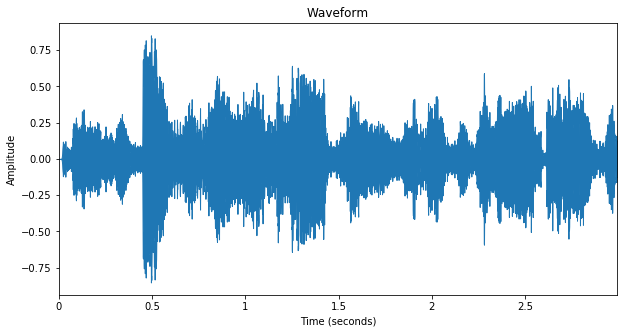

In [23]:
def display_wave(file):
    signal, sr = librosa.load(file)
    plt.figure(figsize = (10,5))
    librosa.display.waveplot(signal[100:66120], sr = sr)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Waveform")
    plt.show
    
display_wave(x[0])

(1025, 130)


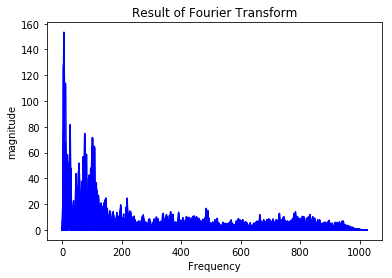

In [37]:
def display_fft(file):
    signal, sr = librosa.load(file)
    stft = np.abs(librosa.stft(signal[:66120], n_fft = 2048, hop_length = 512))
    print(stft.shape)
    plt.plot(stft, color = 'b')
    plt.title("Result of Fourier Transform")
    plt.xlabel('Frequency')
    plt.ylabel("magnitude")
    
display_fft(x[0])

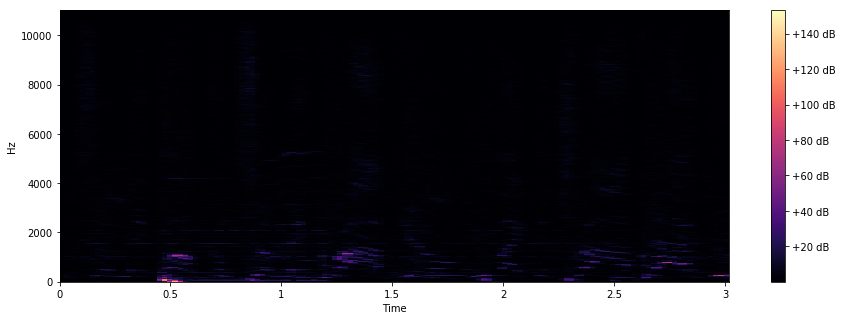

In [42]:
def display_spec(file):
    signal, sr = librosa.load(file)
    stft = np.abs(librosa.stft(signal[:66120], n_fft = 2048, hop_length = 512))
    S = librosa.amplitude_to_db(stft, np.max)
    
    plt.figure(figsize = (15,5))
    librosa.display.specshow(stft, sr = sr, hop_length = 512, x_axis = "time", y_axis = "linear")
    plt.colorbar(format='%+2.0f dB')
    
display_spec(x[0])